In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [77]:
listostocks = (os.listdir("/home/raflicky/Desktop/NYSE_DATA/1_Hour/Nasdaq_stocks"))

In [186]:
def clean_data(files, path = "/home/raflicky/Desktop/NYSE_DATA/1_Day/Stocks"):
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
        df = pd.merge(df,stock_price,how='left',on='Date')
    return df

In [209]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [205]:
my_data_frame = clean_data(listostocks)
my_data_frame = my_data_frame.drop(['Date'], axis=1)
my_data_frame = my_data_frame.fillna(0)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [206]:
working_data = my_data_frame.iloc[0:5000]
working_data_sum = my_data_frame_sum.iloc[0:5000]
validate_data = my_data_frame.iloc[5000:]
validate_data_sum = my_data_frame_sum.iloc[5000:]

In [214]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [215]:
trainingX, trainingY = next_batch(my_x, my_y, 4000, 100)
testingX, testingY = next_batch(my_x, my_y, 1000, 100)

In [216]:
validateX, validateY = next_batch(validate_data.iloc[:,1:], validate_data_sum, 2000, 100)

In [159]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [192]:
# design network
model = Sequential()
model.add(LSTM(200, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(Dense(1))

Train on 3999 samples, validate on 999 samples
Epoch 1/40000
 - 2s - loss: 618.9399 - val_loss: 152.4874
Epoch 2/40000
 - 1s - loss: 604.4579 - val_loss: 139.0070
Epoch 3/40000
 - 1s - loss: 590.5410 - val_loss: 125.0327
Epoch 4/40000
 - 1s - loss: 577.2239 - val_loss: 112.0553
Epoch 5/40000
 - 1s - loss: 565.7254 - val_loss: 100.1282
Epoch 6/40000
 - 1s - loss: 555.1539 - val_loss: 89.0281
Epoch 7/40000
 - 1s - loss: 544.4679 - val_loss: 77.6544
Epoch 8/40000
 - 1s - loss: 536.3317 - val_loss: 69.5858
Epoch 9/40000
 - 1s - loss: 526.4663 - val_loss: 61.9295
Epoch 10/40000
 - 1s - loss: 519.0771 - val_loss: 55.5207
Epoch 11/40000
 - 1s - loss: 511.2248 - val_loss: 50.8635
Epoch 12/40000
 - 1s - loss: 503.2586 - val_loss: 41.5227
Epoch 13/40000
 - 1s - loss: 494.8445 - val_loss: 39.9219
Epoch 14/40000
 - 1s - loss: 487.8728 - val_loss: 33.7558
Epoch 15/40000
 - 1s - loss: 481.6707 - val_loss: 30.4862
Epoch 16/40000
 - 1s - loss: 475.6648 - val_loss: 29.6833
Epoch 17/40000
 - 1s - loss: 

Epoch 142/40000
 - 1s - loss: 297.6233 - val_loss: 10.5808
Epoch 143/40000
 - 1s - loss: 296.0454 - val_loss: 5.0351
Epoch 144/40000
 - 1s - loss: 293.7716 - val_loss: 6.4794
Epoch 145/40000
 - 1s - loss: 292.0590 - val_loss: 6.6994
Epoch 146/40000
 - 1s - loss: 291.6194 - val_loss: 8.5166
Epoch 147/40000
 - 1s - loss: 295.0461 - val_loss: 11.6545
Epoch 148/40000
 - 1s - loss: 291.9340 - val_loss: 8.3407
Epoch 149/40000
 - 1s - loss: 295.5867 - val_loss: 14.1288
Epoch 150/40000
 - 1s - loss: 293.8977 - val_loss: 7.2877
Epoch 151/40000
 - 1s - loss: 288.5501 - val_loss: 8.6739
Epoch 152/40000
 - 1s - loss: 285.6116 - val_loss: 8.9451
Epoch 153/40000
 - 1s - loss: 283.3385 - val_loss: 11.9384
Epoch 154/40000
 - 1s - loss: 282.8105 - val_loss: 12.8821
Epoch 155/40000
 - 1s - loss: 280.9964 - val_loss: 8.1419
Epoch 156/40000
 - 1s - loss: 282.7740 - val_loss: 9.5103
Epoch 157/40000
 - 1s - loss: 279.9610 - val_loss: 13.1571
Epoch 158/40000
 - 1s - loss: 285.6403 - val_loss: 24.7888
Epoch 1

Epoch 283/40000
 - 1s - loss: 161.6139 - val_loss: 8.2374
Epoch 284/40000
 - 1s - loss: 161.0998 - val_loss: 7.1674
Epoch 285/40000
 - 1s - loss: 166.7055 - val_loss: 12.6681
Epoch 286/40000
 - 1s - loss: 162.7481 - val_loss: 7.4142
Epoch 287/40000
 - 1s - loss: 161.1569 - val_loss: 9.4648
Epoch 288/40000
 - 1s - loss: 157.7394 - val_loss: 11.3336
Epoch 289/40000
 - 1s - loss: 159.2296 - val_loss: 14.5475
Epoch 290/40000
 - 1s - loss: 157.5179 - val_loss: 9.8693
Epoch 291/40000
 - 1s - loss: 156.6238 - val_loss: 10.5000
Epoch 292/40000
 - 1s - loss: 155.7068 - val_loss: 9.3224
Epoch 293/40000
 - 1s - loss: 154.3079 - val_loss: 8.2193
Epoch 294/40000
 - 1s - loss: 154.3451 - val_loss: 5.9268
Epoch 295/40000
 - 1s - loss: 152.9295 - val_loss: 10.0162
Epoch 296/40000
 - 1s - loss: 152.5221 - val_loss: 8.6066
Epoch 297/40000
 - 1s - loss: 151.9791 - val_loss: 6.7389
Epoch 298/40000
 - 1s - loss: 151.0551 - val_loss: 17.8604
Epoch 299/40000
 - 1s - loss: 151.2810 - val_loss: 9.1249
Epoch 30

 - 1s - loss: 106.1312 - val_loss: 7.1620
Epoch 424/40000
 - 1s - loss: 106.6712 - val_loss: 7.1423
Epoch 425/40000
 - 1s - loss: 105.6889 - val_loss: 5.6260
Epoch 426/40000
 - 1s - loss: 107.3715 - val_loss: 9.8719
Epoch 427/40000
 - 1s - loss: 108.3113 - val_loss: 7.3403
Epoch 428/40000
 - 1s - loss: 106.4270 - val_loss: 15.6193
Epoch 429/40000
 - 1s - loss: 106.1003 - val_loss: 13.4568
Epoch 430/40000
 - 1s - loss: 106.9500 - val_loss: 7.6089
Epoch 431/40000
 - 1s - loss: 106.9426 - val_loss: 6.8633
Epoch 432/40000
 - 1s - loss: 105.1981 - val_loss: 6.6800
Epoch 433/40000
 - 1s - loss: 106.0177 - val_loss: 7.0600
Epoch 434/40000
 - 1s - loss: 105.3380 - val_loss: 7.3954
Epoch 435/40000
 - 1s - loss: 104.2439 - val_loss: 7.5022
Epoch 436/40000
 - 1s - loss: 104.6545 - val_loss: 10.3297
Epoch 437/40000
 - 1s - loss: 104.3142 - val_loss: 9.5072
Epoch 438/40000
 - 1s - loss: 103.8103 - val_loss: 9.9167
Epoch 439/40000
 - 1s - loss: 105.9198 - val_loss: 9.7737
Epoch 440/40000
 - 1s - los

Epoch 565/40000
 - 1s - loss: 93.4646 - val_loss: 14.2082
Epoch 566/40000
 - 1s - loss: 92.9190 - val_loss: 8.4598
Epoch 567/40000
 - 1s - loss: 92.6341 - val_loss: 13.6267
Epoch 568/40000
 - 1s - loss: 92.1671 - val_loss: 14.8380
Epoch 569/40000
 - 1s - loss: 93.5265 - val_loss: 10.6065
Epoch 570/40000
 - 1s - loss: 92.9196 - val_loss: 12.6788
Epoch 571/40000
 - 1s - loss: 92.9018 - val_loss: 23.6401
Epoch 572/40000
 - 1s - loss: 93.8652 - val_loss: 21.4576
Epoch 573/40000
 - 1s - loss: 95.1593 - val_loss: 17.6511
Epoch 574/40000
 - 1s - loss: 93.4124 - val_loss: 16.9132
Epoch 575/40000
 - 1s - loss: 92.5503 - val_loss: 17.9555
Epoch 576/40000
 - 1s - loss: 93.4629 - val_loss: 14.9058
Epoch 577/40000
 - 1s - loss: 92.9409 - val_loss: 13.4218
Epoch 578/40000
 - 1s - loss: 93.7425 - val_loss: 12.4264
Epoch 579/40000
 - 1s - loss: 93.0003 - val_loss: 12.0231
Epoch 580/40000
 - 1s - loss: 94.1402 - val_loss: 13.9223
Epoch 581/40000
 - 1s - loss: 94.1555 - val_loss: 22.2950
Epoch 582/40000

 - 1s - loss: 86.1767 - val_loss: 10.7072
Epoch 708/40000
 - 1s - loss: 83.6632 - val_loss: 11.6664
Epoch 709/40000
 - 1s - loss: 85.8353 - val_loss: 10.6037
Epoch 710/40000
 - 1s - loss: 85.7011 - val_loss: 8.1633
Epoch 711/40000
 - 1s - loss: 84.7815 - val_loss: 10.6237
Epoch 712/40000
 - 1s - loss: 84.2358 - val_loss: 9.1043
Epoch 713/40000
 - 1s - loss: 85.6023 - val_loss: 12.3059
Epoch 714/40000
 - 1s - loss: 84.0195 - val_loss: 11.2825
Epoch 715/40000
 - 1s - loss: 83.7267 - val_loss: 8.1816
Epoch 716/40000
 - 1s - loss: 84.9694 - val_loss: 6.3426
Epoch 717/40000
 - 1s - loss: 84.4944 - val_loss: 8.4619
Epoch 718/40000
 - 1s - loss: 85.0477 - val_loss: 10.4605
Epoch 719/40000
 - 1s - loss: 85.0699 - val_loss: 12.9466
Epoch 720/40000
 - 1s - loss: 85.1004 - val_loss: 10.6451
Epoch 721/40000
 - 1s - loss: 84.0043 - val_loss: 10.5799
Epoch 722/40000
 - 1s - loss: 85.2850 - val_loss: 9.6943
Epoch 723/40000
 - 1s - loss: 84.3574 - val_loss: 8.8111
Epoch 724/40000
 - 1s - loss: 83.9989

Epoch 850/40000
 - 1s - loss: 80.0383 - val_loss: 13.2561
Epoch 851/40000
 - 1s - loss: 78.9131 - val_loss: 9.4388
Epoch 852/40000
 - 1s - loss: 78.5132 - val_loss: 13.5097
Epoch 853/40000
 - 1s - loss: 76.9759 - val_loss: 12.8019
Epoch 854/40000
 - 1s - loss: 79.0239 - val_loss: 11.0734
Epoch 855/40000
 - 1s - loss: 79.3454 - val_loss: 12.4319
Epoch 856/40000
 - 1s - loss: 78.3759 - val_loss: 12.2813
Epoch 857/40000
 - 1s - loss: 78.2922 - val_loss: 26.9644
Epoch 858/40000
 - 1s - loss: 78.2614 - val_loss: 14.5930
Epoch 859/40000
 - 1s - loss: 78.6601 - val_loss: 11.4790
Epoch 860/40000
 - 1s - loss: 78.0004 - val_loss: 11.1622
Epoch 861/40000
 - 1s - loss: 78.4776 - val_loss: 14.7990
Epoch 862/40000
 - 1s - loss: 79.2946 - val_loss: 9.6874
Epoch 863/40000
 - 1s - loss: 77.8366 - val_loss: 7.6871
Epoch 864/40000
 - 1s - loss: 78.8845 - val_loss: 9.4100
Epoch 865/40000
 - 1s - loss: 79.4792 - val_loss: 8.0231
Epoch 866/40000
 - 1s - loss: 77.7809 - val_loss: 9.6780
Epoch 867/40000
 - 1

 - 1s - loss: 77.4570 - val_loss: 8.9537
Epoch 993/40000
 - 1s - loss: 78.4301 - val_loss: 6.9476
Epoch 994/40000
 - 1s - loss: 76.2571 - val_loss: 10.6345
Epoch 995/40000
 - 1s - loss: 76.0475 - val_loss: 9.4280
Epoch 996/40000
 - 1s - loss: 77.1838 - val_loss: 8.1190
Epoch 997/40000
 - 1s - loss: 75.3524 - val_loss: 9.7648
Epoch 998/40000
 - 1s - loss: 77.7194 - val_loss: 9.5615
Epoch 999/40000
 - 1s - loss: 76.4618 - val_loss: 8.9159
Epoch 1000/40000
 - 1s - loss: 74.9655 - val_loss: 8.9247
Epoch 1001/40000
 - 1s - loss: 76.7853 - val_loss: 10.0912
Epoch 1002/40000
 - 1s - loss: 76.7711 - val_loss: 9.0100
Epoch 1003/40000
 - 1s - loss: 75.7430 - val_loss: 8.2877
Epoch 1004/40000
 - 1s - loss: 75.4797 - val_loss: 10.1993
Epoch 1005/40000
 - 1s - loss: 75.9941 - val_loss: 13.2873
Epoch 1006/40000
 - 1s - loss: 76.5814 - val_loss: 9.8528
Epoch 1007/40000
 - 1s - loss: 75.6842 - val_loss: 11.5324
Epoch 1008/40000
 - 1s - loss: 77.4751 - val_loss: 7.9914
Epoch 1009/40000
 - 1s - loss: 75

Epoch 1133/40000
 - 1s - loss: 74.0374 - val_loss: 18.0881
Epoch 1134/40000
 - 1s - loss: 74.6723 - val_loss: 15.1531
Epoch 1135/40000
 - 1s - loss: 74.5677 - val_loss: 13.8024
Epoch 1136/40000
 - 1s - loss: 72.9436 - val_loss: 8.8852
Epoch 1137/40000
 - 1s - loss: 73.0144 - val_loss: 9.2643
Epoch 1138/40000
 - 1s - loss: 74.0786 - val_loss: 9.0836
Epoch 1139/40000
 - 1s - loss: 72.9581 - val_loss: 21.0985
Epoch 1140/40000
 - 1s - loss: 75.2044 - val_loss: 10.8241
Epoch 1141/40000
 - 1s - loss: 74.0920 - val_loss: 7.6319
Epoch 1142/40000
 - 1s - loss: 73.8871 - val_loss: 13.9414
Epoch 1143/40000
 - 1s - loss: 72.0397 - val_loss: 8.8267
Epoch 1144/40000
 - 1s - loss: 72.6286 - val_loss: 13.1746
Epoch 1145/40000
 - 1s - loss: 72.6135 - val_loss: 15.1717
Epoch 1146/40000
 - 1s - loss: 74.0039 - val_loss: 9.8407
Epoch 1147/40000
 - 1s - loss: 72.1984 - val_loss: 9.6107
Epoch 1148/40000
 - 1s - loss: 72.9244 - val_loss: 6.9574
Epoch 1149/40000
 - 1s - loss: 72.9563 - val_loss: 9.2997
Epoch 

Epoch 1273/40000
 - 1s - loss: 71.4327 - val_loss: 15.2089
Epoch 1274/40000
 - 1s - loss: 70.4172 - val_loss: 12.5663
Epoch 1275/40000
 - 1s - loss: 70.9926 - val_loss: 22.1833
Epoch 1276/40000
 - 1s - loss: 69.6436 - val_loss: 12.4097
Epoch 1277/40000
 - 1s - loss: 71.4664 - val_loss: 16.8573
Epoch 1278/40000
 - 1s - loss: 71.1867 - val_loss: 15.4992
Epoch 1279/40000
 - 1s - loss: 70.8651 - val_loss: 15.6127
Epoch 1280/40000
 - 1s - loss: 70.6073 - val_loss: 10.1500
Epoch 1281/40000
 - 1s - loss: 70.1673 - val_loss: 14.3346
Epoch 1282/40000
 - 1s - loss: 70.3732 - val_loss: 12.6559
Epoch 1283/40000
 - 1s - loss: 69.6942 - val_loss: 9.8953
Epoch 1284/40000
 - 1s - loss: 71.3002 - val_loss: 11.4171
Epoch 1285/40000
 - 1s - loss: 68.9785 - val_loss: 7.9304
Epoch 1286/40000
 - 1s - loss: 69.6843 - val_loss: 7.4970
Epoch 1287/40000
 - 1s - loss: 69.5650 - val_loss: 7.2453
Epoch 1288/40000
 - 1s - loss: 69.7976 - val_loss: 9.3045
Epoch 1289/40000
 - 1s - loss: 70.3013 - val_loss: 15.2712
Ep

Epoch 1413/40000
 - 1s - loss: 67.7507 - val_loss: 9.0006
Epoch 1414/40000
 - 1s - loss: 68.3759 - val_loss: 8.3733
Epoch 1415/40000
 - 1s - loss: 68.1285 - val_loss: 13.2648
Epoch 1416/40000
 - 1s - loss: 68.2770 - val_loss: 11.8214
Epoch 1417/40000
 - 1s - loss: 67.9303 - val_loss: 19.7729
Epoch 1418/40000
 - 1s - loss: 65.3422 - val_loss: 10.0347
Epoch 1419/40000
 - 1s - loss: 68.5642 - val_loss: 13.1498
Epoch 1420/40000
 - 1s - loss: 67.7845 - val_loss: 9.7650
Epoch 1421/40000
 - 1s - loss: 68.1918 - val_loss: 8.5020
Epoch 1422/40000
 - 1s - loss: 68.6874 - val_loss: 23.7009
Epoch 1423/40000
 - 1s - loss: 67.2546 - val_loss: 13.5725
Epoch 1424/40000
 - 1s - loss: 68.0721 - val_loss: 9.0684
Epoch 1425/40000
 - 1s - loss: 68.3757 - val_loss: 8.8080
Epoch 1426/40000
 - 1s - loss: 66.3870 - val_loss: 11.4936
Epoch 1427/40000
 - 1s - loss: 67.4394 - val_loss: 9.3527
Epoch 1428/40000
 - 1s - loss: 66.8839 - val_loss: 16.6904
Epoch 1429/40000
 - 1s - loss: 67.2332 - val_loss: 12.7843
Epoc

Epoch 1553/40000
 - 1s - loss: 67.1642 - val_loss: 8.8856
Epoch 1554/40000
 - 1s - loss: 67.4188 - val_loss: 11.3660
Epoch 1555/40000
 - 1s - loss: 65.6288 - val_loss: 8.6339
Epoch 1556/40000
 - 1s - loss: 66.6626 - val_loss: 8.4077
Epoch 1557/40000
 - 1s - loss: 66.2345 - val_loss: 12.0645
Epoch 1558/40000
 - 1s - loss: 67.2647 - val_loss: 9.0867
Epoch 1559/40000
 - 1s - loss: 68.8442 - val_loss: 8.9029
Epoch 1560/40000
 - 1s - loss: 68.1651 - val_loss: 9.2512
Epoch 1561/40000
 - 1s - loss: 67.8640 - val_loss: 9.0250
Epoch 1562/40000
 - 1s - loss: 66.5819 - val_loss: 8.2144
Epoch 1563/40000
 - 1s - loss: 66.1451 - val_loss: 8.4252
Epoch 1564/40000
 - 1s - loss: 64.9133 - val_loss: 17.0265
Epoch 1565/40000
 - 1s - loss: 66.8653 - val_loss: 8.5138
Epoch 1566/40000
 - 1s - loss: 64.5240 - val_loss: 11.7553
Epoch 1567/40000
 - 1s - loss: 67.4013 - val_loss: 12.2662
Epoch 1568/40000
 - 1s - loss: 65.6807 - val_loss: 16.5748
Epoch 1569/40000
 - 1s - loss: 67.2662 - val_loss: 7.9784
Epoch 15

Epoch 1694/40000
 - 1s - loss: 64.1769 - val_loss: 8.1280
Epoch 1695/40000
 - 1s - loss: 62.5662 - val_loss: 6.7948
Epoch 1696/40000
 - 1s - loss: 63.3625 - val_loss: 9.8868
Epoch 1697/40000
 - 1s - loss: 64.5121 - val_loss: 7.6713
Epoch 1698/40000
 - 1s - loss: 64.6616 - val_loss: 7.3059
Epoch 1699/40000
 - 1s - loss: 63.5610 - val_loss: 9.7336
Epoch 1700/40000
 - 1s - loss: 64.6839 - val_loss: 7.3375
Epoch 1701/40000
 - 1s - loss: 64.6507 - val_loss: 10.8524
Epoch 1702/40000
 - 1s - loss: 62.8472 - val_loss: 6.9460
Epoch 1703/40000
 - 1s - loss: 63.4271 - val_loss: 8.7804
Epoch 1704/40000
 - 1s - loss: 63.0598 - val_loss: 8.5030
Epoch 1705/40000
 - 1s - loss: 62.9931 - val_loss: 8.9611
Epoch 1706/40000
 - 1s - loss: 64.1456 - val_loss: 7.7999
Epoch 1707/40000
 - 1s - loss: 63.9877 - val_loss: 25.5670
Epoch 1708/40000
 - 1s - loss: 64.7428 - val_loss: 9.5925
Epoch 1709/40000
 - 1s - loss: 64.0165 - val_loss: 10.6199
Epoch 1710/40000
 - 1s - loss: 65.3515 - val_loss: 7.9306
Epoch 1711/

 - 1s - loss: 63.7533 - val_loss: 10.3834
Epoch 1835/40000
 - 1s - loss: 63.7700 - val_loss: 8.0559
Epoch 1836/40000
 - 1s - loss: 62.0116 - val_loss: 10.4967
Epoch 1837/40000
 - 1s - loss: 62.1870 - val_loss: 8.9783
Epoch 1838/40000
 - 1s - loss: 61.6009 - val_loss: 12.3439
Epoch 1839/40000
 - 1s - loss: 64.1745 - val_loss: 12.6027
Epoch 1840/40000
 - 1s - loss: 63.7041 - val_loss: 15.4019
Epoch 1841/40000
 - 1s - loss: 63.5508 - val_loss: 9.3893
Epoch 1842/40000
 - 1s - loss: 63.7214 - val_loss: 13.9621
Epoch 1843/40000
 - 1s - loss: 63.7055 - val_loss: 14.3789
Epoch 1844/40000
 - 1s - loss: 63.1755 - val_loss: 17.4123
Epoch 1845/40000
 - 1s - loss: 64.6590 - val_loss: 14.8680
Epoch 1846/40000
 - 1s - loss: 63.8486 - val_loss: 23.7683
Epoch 1847/40000
 - 1s - loss: 63.4642 - val_loss: 30.5472
Epoch 1848/40000
 - 1s - loss: 66.2352 - val_loss: 8.5819
Epoch 1849/40000
 - 1s - loss: 63.5341 - val_loss: 9.1335
Epoch 1850/40000
 - 1s - loss: 64.0286 - val_loss: 8.4943
Epoch 1851/40000
 - 

Epoch 1975/40000
 - 1s - loss: 63.3571 - val_loss: 7.2541
Epoch 1976/40000
 - 1s - loss: 62.8664 - val_loss: 24.0169
Epoch 1977/40000
 - 1s - loss: 64.7715 - val_loss: 8.4180
Epoch 1978/40000
 - 1s - loss: 64.4945 - val_loss: 6.7238
Epoch 1979/40000
 - 1s - loss: 65.1991 - val_loss: 7.5639
Epoch 1980/40000
 - 1s - loss: 64.0118 - val_loss: 6.7335
Epoch 1981/40000
 - 1s - loss: 63.0903 - val_loss: 14.4126
Epoch 1982/40000
 - 1s - loss: 64.2564 - val_loss: 8.3432
Epoch 1983/40000
 - 1s - loss: 64.7946 - val_loss: 6.9011
Epoch 1984/40000
 - 1s - loss: 62.6826 - val_loss: 9.8734
Epoch 1985/40000
 - 1s - loss: 63.5755 - val_loss: 6.2165
Epoch 1986/40000
 - 1s - loss: 65.6151 - val_loss: 5.9955
Epoch 1987/40000
 - 1s - loss: 62.3540 - val_loss: 6.7525
Epoch 1988/40000
 - 1s - loss: 64.2027 - val_loss: 9.6856
Epoch 1989/40000
 - 1s - loss: 63.3710 - val_loss: 13.0167
Epoch 1990/40000
 - 1s - loss: 63.2588 - val_loss: 11.8458
Epoch 1991/40000
 - 1s - loss: 64.5774 - val_loss: 8.4400
Epoch 1992

 - 1s - loss: 61.7582 - val_loss: 10.2781
Epoch 2116/40000
 - 1s - loss: 63.9817 - val_loss: 14.1312
Epoch 2117/40000
 - 1s - loss: 63.5097 - val_loss: 17.4923
Epoch 2118/40000
 - 1s - loss: 62.0555 - val_loss: 10.8864
Epoch 2119/40000
 - 1s - loss: 62.7549 - val_loss: 9.3370
Epoch 2120/40000
 - 1s - loss: 63.5503 - val_loss: 7.9019
Epoch 2121/40000
 - 1s - loss: 64.2091 - val_loss: 7.0114
Epoch 2122/40000
 - 1s - loss: 61.6355 - val_loss: 8.1061
Epoch 2123/40000
 - 1s - loss: 63.6748 - val_loss: 18.1734
Epoch 2124/40000
 - 1s - loss: 63.1527 - val_loss: 9.0753
Epoch 2125/40000
 - 1s - loss: 64.0467 - val_loss: 14.1592
Epoch 2126/40000
 - 1s - loss: 62.8815 - val_loss: 9.9253
Epoch 2127/40000
 - 1s - loss: 62.5898 - val_loss: 7.4006
Epoch 2128/40000
 - 1s - loss: 61.1971 - val_loss: 7.9782
Epoch 2129/40000
 - 1s - loss: 61.5908 - val_loss: 9.2284
Epoch 2130/40000
 - 1s - loss: 62.5847 - val_loss: 7.3245
Epoch 2131/40000
 - 1s - loss: 61.6018 - val_loss: 7.7329
Epoch 2132/40000
 - 1s - 

Epoch 2256/40000
 - 1s - loss: 63.1423 - val_loss: 11.0493
Epoch 2257/40000
 - 1s - loss: 60.9155 - val_loss: 9.5649
Epoch 2258/40000
 - 1s - loss: 60.0021 - val_loss: 10.1281
Epoch 2259/40000
 - 1s - loss: 60.3069 - val_loss: 9.1785
Epoch 2260/40000
 - 1s - loss: 61.0479 - val_loss: 10.8322
Epoch 2261/40000
 - 1s - loss: 59.4118 - val_loss: 8.6838
Epoch 2262/40000
 - 1s - loss: 59.7123 - val_loss: 8.2096
Epoch 2263/40000
 - 1s - loss: 60.4116 - val_loss: 6.3918
Epoch 2264/40000
 - 1s - loss: 59.5988 - val_loss: 9.8204
Epoch 2265/40000
 - 1s - loss: 58.8679 - val_loss: 9.1101
Epoch 2266/40000
 - 1s - loss: 60.3320 - val_loss: 9.1296
Epoch 2267/40000
 - 1s - loss: 60.7665 - val_loss: 8.7234
Epoch 2268/40000
 - 1s - loss: 60.5106 - val_loss: 7.4158
Epoch 2269/40000
 - 1s - loss: 60.6689 - val_loss: 6.2704
Epoch 2270/40000
 - 1s - loss: 60.5287 - val_loss: 6.2510
Epoch 2271/40000
 - 1s - loss: 59.0543 - val_loss: 5.5134
Epoch 2272/40000
 - 1s - loss: 58.7094 - val_loss: 8.8010
Epoch 2273/

Epoch 2397/40000
 - 1s - loss: 59.2048 - val_loss: 7.0235
Epoch 2398/40000
 - 1s - loss: 57.7281 - val_loss: 12.7825
Epoch 2399/40000
 - 1s - loss: 59.4760 - val_loss: 6.7391
Epoch 2400/40000
 - 1s - loss: 59.2188 - val_loss: 6.7507
Epoch 2401/40000
 - 1s - loss: 57.5439 - val_loss: 7.9691
Epoch 2402/40000
 - 1s - loss: 58.8304 - val_loss: 8.8694
Epoch 2403/40000
 - 1s - loss: 59.1986 - val_loss: 21.3427
Epoch 2404/40000
 - 1s - loss: 60.3485 - val_loss: 7.4657
Epoch 2405/40000
 - 1s - loss: 60.8336 - val_loss: 10.2458
Epoch 2406/40000
 - 1s - loss: 59.5329 - val_loss: 9.2599
Epoch 2407/40000
 - 1s - loss: 59.5900 - val_loss: 9.3516
Epoch 2408/40000
 - 1s - loss: 59.7925 - val_loss: 7.6963
Epoch 2409/40000
 - 1s - loss: 60.1457 - val_loss: 13.1893
Epoch 2410/40000
 - 1s - loss: 60.6170 - val_loss: 10.8833
Epoch 2411/40000
 - 1s - loss: 60.2443 - val_loss: 8.6584
Epoch 2412/40000
 - 1s - loss: 59.4143 - val_loss: 7.1738
Epoch 2413/40000
 - 1s - loss: 59.0538 - val_loss: 5.5779
Epoch 241

Epoch 2538/40000
 - 1s - loss: 59.4364 - val_loss: 9.0907
Epoch 2539/40000
 - 1s - loss: 58.8870 - val_loss: 11.8159
Epoch 2540/40000
 - 1s - loss: 57.9951 - val_loss: 9.0169
Epoch 2541/40000
 - 1s - loss: 60.1386 - val_loss: 7.3463
Epoch 2542/40000
 - 1s - loss: 59.7577 - val_loss: 8.8519
Epoch 2543/40000
 - 1s - loss: 59.0543 - val_loss: 8.0637
Epoch 2544/40000
 - 1s - loss: 57.9947 - val_loss: 13.9268
Epoch 2545/40000
 - 1s - loss: 58.1960 - val_loss: 8.1364
Epoch 2546/40000
 - 1s - loss: 58.5715 - val_loss: 5.6392
Epoch 2547/40000
 - 1s - loss: 57.7194 - val_loss: 6.6292
Epoch 2548/40000
 - 1s - loss: 59.3554 - val_loss: 9.3043
Epoch 2549/40000
 - 1s - loss: 57.5248 - val_loss: 10.3097
Epoch 2550/40000
 - 1s - loss: 60.0146 - val_loss: 10.5386
Epoch 2551/40000
 - 1s - loss: 58.8186 - val_loss: 9.8990
Epoch 2552/40000
 - 1s - loss: 59.2991 - val_loss: 8.4844
Epoch 2553/40000
 - 1s - loss: 59.2869 - val_loss: 10.2273
Epoch 2554/40000
 - 1s - loss: 59.5644 - val_loss: 25.4541
Epoch 25

Epoch 2679/40000
 - 1s - loss: 57.8454 - val_loss: 13.0867
Epoch 2680/40000
 - 1s - loss: 57.8718 - val_loss: 8.7512
Epoch 2681/40000
 - 1s - loss: 57.4855 - val_loss: 10.4475
Epoch 2682/40000
 - 1s - loss: 57.5091 - val_loss: 8.6372
Epoch 2683/40000
 - 1s - loss: 58.4024 - val_loss: 9.3666
Epoch 2684/40000
 - 1s - loss: 58.7141 - val_loss: 5.9404
Epoch 2685/40000
 - 1s - loss: 58.6206 - val_loss: 5.3479
Epoch 2686/40000
 - 1s - loss: 58.4396 - val_loss: 7.3612
Epoch 2687/40000
 - 1s - loss: 58.3542 - val_loss: 7.1586
Epoch 2688/40000
 - 1s - loss: 57.5481 - val_loss: 6.9958
Epoch 2689/40000
 - 1s - loss: 58.2576 - val_loss: 11.4725
Epoch 2690/40000
 - 1s - loss: 57.1349 - val_loss: 6.9880
Epoch 2691/40000
 - 1s - loss: 58.5685 - val_loss: 5.2760
Epoch 2692/40000
 - 1s - loss: 57.4270 - val_loss: 6.3860
Epoch 2693/40000
 - 1s - loss: 58.2398 - val_loss: 9.2032
Epoch 2694/40000
 - 1s - loss: 59.3462 - val_loss: 6.6534
Epoch 2695/40000
 - 1s - loss: 58.4231 - val_loss: 8.5930
Epoch 2696/

Epoch 2820/40000
 - 1s - loss: 56.1804 - val_loss: 8.2559
Epoch 2821/40000
 - 1s - loss: 58.8535 - val_loss: 7.6219
Epoch 2822/40000
 - 1s - loss: 59.4624 - val_loss: 11.5289
Epoch 2823/40000
 - 1s - loss: 57.8202 - val_loss: 12.0063
Epoch 2824/40000
 - 1s - loss: 59.3027 - val_loss: 30.1255
Epoch 2825/40000
 - 1s - loss: 58.0403 - val_loss: 10.8982
Epoch 2826/40000
 - 1s - loss: 58.3056 - val_loss: 8.5651
Epoch 2827/40000
 - 1s - loss: 58.5424 - val_loss: 7.6139
Epoch 2828/40000
 - 1s - loss: 59.2789 - val_loss: 7.1958
Epoch 2829/40000
 - 1s - loss: 58.9200 - val_loss: 7.1751
Epoch 2830/40000
 - 1s - loss: 58.3492 - val_loss: 6.6668
Epoch 2831/40000
 - 1s - loss: 58.2785 - val_loss: 6.9031
Epoch 2832/40000
 - 1s - loss: 55.9444 - val_loss: 6.4597
Epoch 2833/40000
 - 1s - loss: 57.8719 - val_loss: 11.8198
Epoch 2834/40000
 - 1s - loss: 58.6145 - val_loss: 11.0270
Epoch 2835/40000
 - 1s - loss: 56.0738 - val_loss: 14.2556
Epoch 2836/40000
 - 1s - loss: 57.7727 - val_loss: 9.0987
Epoch 2

Epoch 2961/40000
 - 1s - loss: 58.6565 - val_loss: 6.9749
Epoch 2962/40000
 - 1s - loss: 58.5091 - val_loss: 9.2115
Epoch 2963/40000
 - 1s - loss: 56.9220 - val_loss: 6.8469
Epoch 2964/40000
 - 1s - loss: 57.2865 - val_loss: 9.1412
Epoch 2965/40000
 - 1s - loss: 56.8650 - val_loss: 6.7357
Epoch 2966/40000
 - 1s - loss: 55.7385 - val_loss: 22.7002
Epoch 2967/40000
 - 1s - loss: 57.0299 - val_loss: 10.5060
Epoch 2968/40000
 - 1s - loss: 57.9937 - val_loss: 6.4218
Epoch 2969/40000
 - 1s - loss: 57.6756 - val_loss: 7.3698
Epoch 2970/40000
 - 1s - loss: 56.8047 - val_loss: 17.7261
Epoch 2971/40000
 - 1s - loss: 56.9796 - val_loss: 6.8953
Epoch 2972/40000
 - 1s - loss: 55.5558 - val_loss: 8.2365
Epoch 2973/40000
 - 1s - loss: 57.7847 - val_loss: 9.1555
Epoch 2974/40000
 - 1s - loss: 56.9743 - val_loss: 9.2121
Epoch 2975/40000
 - 1s - loss: 56.0795 - val_loss: 13.4543
Epoch 2976/40000
 - 1s - loss: 58.4992 - val_loss: 10.3457
Epoch 2977/40000
 - 1s - loss: 56.9234 - val_loss: 9.4781
Epoch 297

Epoch 3102/40000
 - 1s - loss: 55.9295 - val_loss: 6.4927
Epoch 3103/40000
 - 1s - loss: 57.2445 - val_loss: 6.6972
Epoch 3104/40000
 - 1s - loss: 57.4275 - val_loss: 5.8665
Epoch 3105/40000
 - 1s - loss: 56.7948 - val_loss: 5.9281
Epoch 3106/40000
 - 1s - loss: 57.8817 - val_loss: 6.2869
Epoch 3107/40000
 - 1s - loss: 57.4239 - val_loss: 6.9237
Epoch 3108/40000
 - 1s - loss: 58.7671 - val_loss: 21.9990
Epoch 3109/40000
 - 1s - loss: 59.2405 - val_loss: 9.1039
Epoch 3110/40000
 - 1s - loss: 58.3849 - val_loss: 7.4121
Epoch 3111/40000
 - 1s - loss: 58.0612 - val_loss: 9.5308
Epoch 3112/40000
 - 1s - loss: 57.6695 - val_loss: 8.4179
Epoch 3113/40000
 - 1s - loss: 58.1206 - val_loss: 6.8060
Epoch 3114/40000
 - 1s - loss: 58.0235 - val_loss: 7.6197
Epoch 3115/40000
 - 1s - loss: 57.9538 - val_loss: 7.0712
Epoch 3116/40000
 - 1s - loss: 57.9845 - val_loss: 7.4186
Epoch 3117/40000
 - 1s - loss: 58.5940 - val_loss: 6.8530
Epoch 3118/40000
 - 1s - loss: 58.9106 - val_loss: 7.8336
Epoch 3119/40

 - 1s - loss: 57.5142 - val_loss: 9.8553
Epoch 3244/40000
 - 1s - loss: 57.6451 - val_loss: 8.8418
Epoch 3245/40000
 - 1s - loss: 56.2515 - val_loss: 5.9357
Epoch 3246/40000
 - 1s - loss: 58.6009 - val_loss: 6.0507
Epoch 3247/40000
 - 1s - loss: 57.1122 - val_loss: 6.4507
Epoch 3248/40000
 - 1s - loss: 56.9523 - val_loss: 14.5355
Epoch 3249/40000
 - 1s - loss: 57.1112 - val_loss: 11.1142
Epoch 3250/40000
 - 1s - loss: 56.7700 - val_loss: 10.3436
Epoch 3251/40000
 - 1s - loss: 56.7438 - val_loss: 10.3017
Epoch 3252/40000
 - 1s - loss: 56.6586 - val_loss: 12.2002
Epoch 3253/40000
 - 1s - loss: 57.6420 - val_loss: 8.2214
Epoch 3254/40000
 - 1s - loss: 58.1507 - val_loss: 8.9344
Epoch 3255/40000
 - 1s - loss: 56.9529 - val_loss: 10.7936
Epoch 3256/40000
 - 1s - loss: 56.7346 - val_loss: 15.8115
Epoch 3257/40000
 - 1s - loss: 57.4534 - val_loss: 11.0790
Epoch 3258/40000
 - 1s - loss: 56.9610 - val_loss: 10.2918
Epoch 3259/40000
 - 1s - loss: 55.9198 - val_loss: 7.0547
Epoch 3260/40000
 - 1s

Epoch 3384/40000
 - 1s - loss: 57.3317 - val_loss: 7.3529
Epoch 3385/40000
 - 1s - loss: 57.2976 - val_loss: 9.0281
Epoch 3386/40000
 - 1s - loss: 56.2518 - val_loss: 8.1152
Epoch 3387/40000
 - 1s - loss: 56.9116 - val_loss: 7.4516
Epoch 3388/40000
 - 1s - loss: 56.6117 - val_loss: 5.7758
Epoch 3389/40000
 - 1s - loss: 56.1090 - val_loss: 8.0041
Epoch 3390/40000
 - 1s - loss: 56.3698 - val_loss: 14.1281
Epoch 3391/40000
 - 1s - loss: 55.4346 - val_loss: 6.7347
Epoch 3392/40000
 - 1s - loss: 57.0564 - val_loss: 7.7624
Epoch 3393/40000
 - 1s - loss: 56.1306 - val_loss: 10.9532
Epoch 3394/40000
 - 1s - loss: 56.9609 - val_loss: 6.0701
Epoch 3395/40000
 - 1s - loss: 56.9299 - val_loss: 9.3077
Epoch 3396/40000
 - 1s - loss: 56.0293 - val_loss: 9.6496
Epoch 3397/40000
 - 1s - loss: 56.8617 - val_loss: 5.9818
Epoch 3398/40000
 - 1s - loss: 56.1244 - val_loss: 6.8224
Epoch 3399/40000
 - 1s - loss: 55.3752 - val_loss: 7.0807
Epoch 3400/40000
 - 1s - loss: 55.1645 - val_loss: 5.8936
Epoch 3401/4

Epoch 3525/40000
 - 1s - loss: 54.8604 - val_loss: 6.6969
Epoch 3526/40000
 - 1s - loss: 56.0750 - val_loss: 7.6525
Epoch 3527/40000
 - 1s - loss: 55.5289 - val_loss: 6.3951
Epoch 3528/40000
 - 1s - loss: 55.6385 - val_loss: 6.2479
Epoch 3529/40000
 - 1s - loss: 54.5101 - val_loss: 6.8249
Epoch 3530/40000
 - 1s - loss: 55.3710 - val_loss: 10.7403
Epoch 3531/40000
 - 1s - loss: 55.9255 - val_loss: 8.5226
Epoch 3532/40000
 - 1s - loss: 57.1134 - val_loss: 5.3194
Epoch 3533/40000
 - 1s - loss: 53.8121 - val_loss: 4.6626
Epoch 3534/40000
 - 1s - loss: 56.2740 - val_loss: 5.8250
Epoch 3535/40000
 - 1s - loss: 56.5458 - val_loss: 6.1364
Epoch 3536/40000
 - 1s - loss: 55.0193 - val_loss: 5.2139
Epoch 3537/40000
 - 1s - loss: 55.2731 - val_loss: 5.3641
Epoch 3538/40000
 - 1s - loss: 57.0095 - val_loss: 6.3335
Epoch 3539/40000
 - 1s - loss: 53.7861 - val_loss: 10.7419
Epoch 3540/40000
 - 1s - loss: 55.2088 - val_loss: 5.4796
Epoch 3541/40000
 - 1s - loss: 54.9651 - val_loss: 5.4013
Epoch 3542/4

 - 1s - loss: 54.7897 - val_loss: 5.4500
Epoch 3667/40000
 - 1s - loss: 55.7545 - val_loss: 5.3501
Epoch 3668/40000
 - 1s - loss: 55.8658 - val_loss: 5.6153
Epoch 3669/40000
 - 1s - loss: 55.9433 - val_loss: 6.0285
Epoch 3670/40000
 - 1s - loss: 54.9469 - val_loss: 6.7522
Epoch 3671/40000
 - 1s - loss: 56.4155 - val_loss: 13.7495
Epoch 3672/40000
 - 1s - loss: 55.3081 - val_loss: 11.3583
Epoch 3673/40000
 - 1s - loss: 55.1980 - val_loss: 8.1946
Epoch 3674/40000
 - 1s - loss: 54.9630 - val_loss: 5.9948
Epoch 3675/40000
 - 1s - loss: 55.2044 - val_loss: 6.3911
Epoch 3676/40000
 - 1s - loss: 55.7094 - val_loss: 6.4545
Epoch 3677/40000
 - 1s - loss: 54.9455 - val_loss: 8.7457
Epoch 3678/40000
 - 1s - loss: 55.5265 - val_loss: 7.5223
Epoch 3679/40000
 - 1s - loss: 55.6096 - val_loss: 11.1536
Epoch 3680/40000
 - 1s - loss: 54.5343 - val_loss: 7.9389
Epoch 3681/40000
 - 1s - loss: 56.6203 - val_loss: 7.4967
Epoch 3682/40000
 - 1s - loss: 54.6662 - val_loss: 5.7064
Epoch 3683/40000
 - 1s - los

 - 1s - loss: 54.7941 - val_loss: 13.2131
Epoch 3808/40000
 - 1s - loss: 54.0595 - val_loss: 8.5642
Epoch 3809/40000
 - 1s - loss: 56.3187 - val_loss: 9.6330
Epoch 3810/40000
 - 1s - loss: 57.0114 - val_loss: 6.2561
Epoch 3811/40000
 - 1s - loss: 56.4354 - val_loss: 6.4099
Epoch 3812/40000
 - 1s - loss: 54.6690 - val_loss: 5.4055
Epoch 3813/40000
 - 1s - loss: 54.4934 - val_loss: 7.1096
Epoch 3814/40000
 - 1s - loss: 54.0710 - val_loss: 6.3317
Epoch 3815/40000
 - 1s - loss: 55.9140 - val_loss: 5.8625
Epoch 3816/40000
 - 1s - loss: 54.0005 - val_loss: 14.3979
Epoch 3817/40000
 - 1s - loss: 55.5188 - val_loss: 7.8152
Epoch 3818/40000
 - 1s - loss: 55.3784 - val_loss: 7.2221
Epoch 3819/40000
 - 1s - loss: 54.9931 - val_loss: 5.7535
Epoch 3820/40000
 - 1s - loss: 56.3545 - val_loss: 8.8292
Epoch 3821/40000
 - 1s - loss: 54.3906 - val_loss: 10.6835
Epoch 3822/40000
 - 1s - loss: 54.7650 - val_loss: 7.1944
Epoch 3823/40000
 - 1s - loss: 56.0975 - val_loss: 7.3048
Epoch 3824/40000
 - 1s - los

 - 1s - loss: 54.9039 - val_loss: 5.5286
Epoch 3949/40000
 - 1s - loss: 54.4278 - val_loss: 5.2124
Epoch 3950/40000
 - 1s - loss: 55.4724 - val_loss: 5.0669
Epoch 3951/40000
 - 1s - loss: 54.5102 - val_loss: 5.9912
Epoch 3952/40000
 - 1s - loss: 56.0535 - val_loss: 5.6083
Epoch 3953/40000
 - 1s - loss: 55.0157 - val_loss: 5.4842
Epoch 3954/40000
 - 1s - loss: 55.3722 - val_loss: 5.9218
Epoch 3955/40000
 - 1s - loss: 52.9071 - val_loss: 6.4057
Epoch 3956/40000
 - 1s - loss: 54.8804 - val_loss: 9.9461
Epoch 3957/40000
 - 1s - loss: 55.5044 - val_loss: 11.8283
Epoch 3958/40000
 - 1s - loss: 57.0768 - val_loss: 5.0879
Epoch 3959/40000
 - 1s - loss: 56.2793 - val_loss: 7.6289
Epoch 3960/40000
 - 1s - loss: 54.1594 - val_loss: 7.2524
Epoch 3961/40000
 - 1s - loss: 55.5034 - val_loss: 7.1969
Epoch 3962/40000
 - 1s - loss: 56.1074 - val_loss: 11.8619
Epoch 3963/40000
 - 1s - loss: 53.5686 - val_loss: 6.0538
Epoch 3964/40000
 - 1s - loss: 54.4878 - val_loss: 5.0399
Epoch 3965/40000
 - 1s - loss

Epoch 4090/40000
 - 1s - loss: 55.9828 - val_loss: 6.1121
Epoch 4091/40000
 - 1s - loss: 54.9983 - val_loss: 5.3302
Epoch 4092/40000
 - 1s - loss: 54.6878 - val_loss: 7.5833
Epoch 4093/40000
 - 1s - loss: 55.3612 - val_loss: 6.4983
Epoch 4094/40000
 - 1s - loss: 57.2852 - val_loss: 19.8501
Epoch 4095/40000
 - 1s - loss: 55.3286 - val_loss: 9.4303
Epoch 4096/40000
 - 1s - loss: 55.8252 - val_loss: 11.6944
Epoch 4097/40000
 - 1s - loss: 56.0335 - val_loss: 12.9662
Epoch 4098/40000
 - 1s - loss: 55.4798 - val_loss: 9.2397
Epoch 4099/40000
 - 1s - loss: 54.9546 - val_loss: 8.1699
Epoch 4100/40000
 - 1s - loss: 55.2129 - val_loss: 7.8361
Epoch 4101/40000
 - 1s - loss: 54.2608 - val_loss: 7.8658
Epoch 4102/40000
 - 1s - loss: 55.3277 - val_loss: 9.8428
Epoch 4103/40000
 - 1s - loss: 54.4486 - val_loss: 7.7699
Epoch 4104/40000
 - 1s - loss: 55.5001 - val_loss: 9.4542
Epoch 4105/40000
 - 1s - loss: 54.8130 - val_loss: 7.3764
Epoch 4106/40000
 - 1s - loss: 56.1878 - val_loss: 16.2643
Epoch 4107

Epoch 4231/40000
 - 1s - loss: 56.2213 - val_loss: 7.7457
Epoch 4232/40000
 - 1s - loss: 55.2711 - val_loss: 9.0745
Epoch 4233/40000
 - 1s - loss: 55.5989 - val_loss: 10.0367
Epoch 4234/40000
 - 1s - loss: 55.1662 - val_loss: 7.7283
Epoch 4235/40000
 - 1s - loss: 54.4799 - val_loss: 7.0388
Epoch 4236/40000
 - 1s - loss: 55.4456 - val_loss: 6.8194
Epoch 4237/40000
 - 1s - loss: 55.2554 - val_loss: 8.3295
Epoch 4238/40000
 - 1s - loss: 55.6310 - val_loss: 7.9961
Epoch 4239/40000
 - 1s - loss: 54.7548 - val_loss: 7.1214
Epoch 4240/40000
 - 1s - loss: 55.4703 - val_loss: 5.4637
Epoch 4241/40000
 - 1s - loss: 55.9840 - val_loss: 5.8785
Epoch 4242/40000
 - 1s - loss: 55.1624 - val_loss: 5.9205
Epoch 4243/40000
 - 1s - loss: 54.6159 - val_loss: 5.4613
Epoch 4244/40000
 - 1s - loss: 53.5247 - val_loss: 5.8031
Epoch 4245/40000
 - 1s - loss: 54.7669 - val_loss: 5.8774
Epoch 4246/40000
 - 1s - loss: 53.9393 - val_loss: 8.3418
Epoch 4247/40000
 - 1s - loss: 55.0105 - val_loss: 5.8897
Epoch 4248/40

Epoch 4372/40000
 - 1s - loss: 53.8261 - val_loss: 7.5185
Epoch 4373/40000
 - 1s - loss: 55.8600 - val_loss: 6.2374
Epoch 4374/40000
 - 1s - loss: 54.8593 - val_loss: 5.3324
Epoch 4375/40000
 - 1s - loss: 53.3217 - val_loss: 5.5916
Epoch 4376/40000
 - 1s - loss: 54.8263 - val_loss: 10.4346
Epoch 4377/40000
 - 1s - loss: 54.7926 - val_loss: 7.7932
Epoch 4378/40000
 - 1s - loss: 54.5757 - val_loss: 6.5926
Epoch 4379/40000
 - 1s - loss: 53.6215 - val_loss: 14.4002
Epoch 4380/40000
 - 1s - loss: 54.2098 - val_loss: 11.5661
Epoch 4381/40000
 - 1s - loss: 53.9599 - val_loss: 6.0750
Epoch 4382/40000
 - 1s - loss: 54.8356 - val_loss: 10.5640
Epoch 4383/40000
 - 1s - loss: 54.8552 - val_loss: 6.4110
Epoch 4384/40000
 - 1s - loss: 54.8120 - val_loss: 6.4452
Epoch 4385/40000
 - 1s - loss: 52.4736 - val_loss: 8.0408
Epoch 4386/40000
 - 1s - loss: 55.7366 - val_loss: 5.8486
Epoch 4387/40000
 - 1s - loss: 53.4332 - val_loss: 9.6800
Epoch 4388/40000
 - 1s - loss: 54.9915 - val_loss: 7.6966
Epoch 4389

Epoch 4513/40000
 - 1s - loss: 54.9160 - val_loss: 8.5950
Epoch 4514/40000
 - 1s - loss: 53.7484 - val_loss: 5.7932
Epoch 4515/40000
 - 1s - loss: 54.4758 - val_loss: 12.1922
Epoch 4516/40000
 - 1s - loss: 55.3478 - val_loss: 7.1707
Epoch 4517/40000
 - 1s - loss: 55.1555 - val_loss: 6.9776
Epoch 4518/40000
 - 1s - loss: 53.8895 - val_loss: 6.2422
Epoch 4519/40000
 - 1s - loss: 54.2907 - val_loss: 5.4786
Epoch 4520/40000
 - 1s - loss: 54.7322 - val_loss: 10.8762
Epoch 4521/40000
 - 1s - loss: 54.1281 - val_loss: 5.3447
Epoch 4522/40000
 - 1s - loss: 52.9038 - val_loss: 9.6926
Epoch 4523/40000
 - 1s - loss: 53.4833 - val_loss: 4.5679
Epoch 4524/40000
 - 1s - loss: 54.2556 - val_loss: 4.5805
Epoch 4525/40000
 - 1s - loss: 53.5411 - val_loss: 6.0460
Epoch 4526/40000
 - 1s - loss: 53.3049 - val_loss: 6.5310
Epoch 4527/40000
 - 1s - loss: 54.1602 - val_loss: 4.9917
Epoch 4528/40000
 - 1s - loss: 54.3007 - val_loss: 8.7262
Epoch 4529/40000
 - 1s - loss: 54.8609 - val_loss: 9.1329
Epoch 4530/4

 - 1s - loss: 54.6995 - val_loss: 5.2916
Epoch 4655/40000
 - 1s - loss: 54.6613 - val_loss: 7.5371
Epoch 4656/40000
 - 1s - loss: 53.1060 - val_loss: 8.4539
Epoch 4657/40000
 - 1s - loss: 55.7916 - val_loss: 12.0791
Epoch 4658/40000
 - 1s - loss: 54.7957 - val_loss: 9.1746
Epoch 4659/40000
 - 1s - loss: 53.5209 - val_loss: 6.6309
Epoch 4660/40000
 - 1s - loss: 53.4372 - val_loss: 9.3870
Epoch 4661/40000
 - 1s - loss: 54.1610 - val_loss: 12.9350
Epoch 4662/40000
 - 1s - loss: 53.9511 - val_loss: 9.0152
Epoch 4663/40000
 - 1s - loss: 53.8257 - val_loss: 7.8698
Epoch 4664/40000
 - 1s - loss: 52.6060 - val_loss: 7.2950
Epoch 4665/40000
 - 1s - loss: 53.6271 - val_loss: 7.2289
Epoch 4666/40000
 - 1s - loss: 54.6655 - val_loss: 7.6316
Epoch 4667/40000
 - 1s - loss: 53.5398 - val_loss: 7.0845
Epoch 4668/40000
 - 1s - loss: 54.3331 - val_loss: 6.5826
Epoch 4669/40000
 - 1s - loss: 54.1232 - val_loss: 11.3968
Epoch 4670/40000
 - 1s - loss: 53.7638 - val_loss: 7.6120
Epoch 4671/40000
 - 1s - los

 - 1s - loss: 53.3053 - val_loss: 9.2901
Epoch 4796/40000
 - 1s - loss: 53.9710 - val_loss: 17.3792
Epoch 4797/40000
 - 1s - loss: 53.4990 - val_loss: 6.4128
Epoch 4798/40000
 - 1s - loss: 52.7854 - val_loss: 5.0861
Epoch 4799/40000
 - 1s - loss: 52.8952 - val_loss: 4.9600
Epoch 4800/40000
 - 1s - loss: 53.2977 - val_loss: 7.0655
Epoch 4801/40000
 - 1s - loss: 52.5701 - val_loss: 6.1448
Epoch 4802/40000
 - 1s - loss: 54.1022 - val_loss: 6.8651
Epoch 4803/40000
 - 1s - loss: 55.3554 - val_loss: 4.7120
Epoch 4804/40000
 - 1s - loss: 53.8247 - val_loss: 7.0018
Epoch 4805/40000
 - 1s - loss: 53.2195 - val_loss: 7.9082
Epoch 4806/40000
 - 1s - loss: 53.3137 - val_loss: 7.5064
Epoch 4807/40000
 - 1s - loss: 53.9656 - val_loss: 8.9389
Epoch 4808/40000
 - 1s - loss: 53.6388 - val_loss: 5.8718
Epoch 4809/40000
 - 1s - loss: 55.0989 - val_loss: 7.6865
Epoch 4810/40000
 - 1s - loss: 53.2792 - val_loss: 4.8774
Epoch 4811/40000
 - 1s - loss: 53.1665 - val_loss: 6.2676
Epoch 4812/40000
 - 1s - loss:

Epoch 4937/40000
 - 1s - loss: 53.7586 - val_loss: 4.6922
Epoch 4938/40000
 - 1s - loss: 52.7535 - val_loss: 6.5289
Epoch 4939/40000
 - 1s - loss: 53.3674 - val_loss: 4.7434
Epoch 4940/40000
 - 1s - loss: 52.1636 - val_loss: 6.9561
Epoch 4941/40000
 - 1s - loss: 53.4836 - val_loss: 10.2405
Epoch 4942/40000
 - 1s - loss: 52.0698 - val_loss: 8.8880
Epoch 4943/40000
 - 1s - loss: 52.0434 - val_loss: 5.9860
Epoch 4944/40000
 - 1s - loss: 53.6173 - val_loss: 4.7189
Epoch 4945/40000
 - 1s - loss: 54.1711 - val_loss: 5.8224
Epoch 4946/40000
 - 1s - loss: 53.1905 - val_loss: 6.8127
Epoch 4947/40000
 - 1s - loss: 54.4644 - val_loss: 5.1572
Epoch 4948/40000
 - 1s - loss: 53.6133 - val_loss: 5.1096
Epoch 4949/40000
 - 1s - loss: 53.0415 - val_loss: 7.7976
Epoch 4950/40000
 - 1s - loss: 53.5578 - val_loss: 7.3597
Epoch 4951/40000
 - 1s - loss: 54.3650 - val_loss: 6.4231
Epoch 4952/40000
 - 1s - loss: 54.4766 - val_loss: 7.0180
Epoch 4953/40000
 - 1s - loss: 53.3441 - val_loss: 6.2750
Epoch 4954/40

Epoch 5078/40000
 - 1s - loss: 54.2444 - val_loss: 5.1235
Epoch 5079/40000
 - 1s - loss: 52.5738 - val_loss: 10.5736
Epoch 5080/40000
 - 1s - loss: 53.8312 - val_loss: 7.9274
Epoch 5081/40000
 - 1s - loss: 52.2794 - val_loss: 9.2072
Epoch 5082/40000
 - 1s - loss: 53.3201 - val_loss: 6.2074
Epoch 5083/40000
 - 1s - loss: 52.4053 - val_loss: 5.7893
Epoch 5084/40000
 - 1s - loss: 52.9444 - val_loss: 6.2435
Epoch 5085/40000
 - 1s - loss: 53.8333 - val_loss: 8.0757
Epoch 5086/40000
 - 1s - loss: 53.4296 - val_loss: 7.2097
Epoch 5087/40000
 - 1s - loss: 53.7261 - val_loss: 8.4182
Epoch 5088/40000
 - 1s - loss: 52.8368 - val_loss: 8.6855
Epoch 5089/40000
 - 1s - loss: 52.6888 - val_loss: 8.8872
Epoch 5090/40000
 - 1s - loss: 53.5489 - val_loss: 6.0813
Epoch 5091/40000
 - 1s - loss: 53.6031 - val_loss: 5.6475
Epoch 5092/40000
 - 1s - loss: 53.1798 - val_loss: 8.7136
Epoch 5093/40000
 - 1s - loss: 52.8599 - val_loss: 6.7804
Epoch 5094/40000
 - 1s - loss: 53.4863 - val_loss: 6.5899
Epoch 5095/40

Epoch 5219/40000
 - 1s - loss: 50.8082 - val_loss: 6.0292
Epoch 5220/40000
 - 1s - loss: 53.6911 - val_loss: 5.5893
Epoch 5221/40000
 - 1s - loss: 53.2222 - val_loss: 5.0979
Epoch 5222/40000
 - 1s - loss: 53.8536 - val_loss: 6.5195
Epoch 5223/40000
 - 1s - loss: 53.2390 - val_loss: 12.1207
Epoch 5224/40000
 - 1s - loss: 52.8214 - val_loss: 5.6709
Epoch 5225/40000
 - 1s - loss: 52.8146 - val_loss: 4.9270
Epoch 5226/40000
 - 1s - loss: 53.9308 - val_loss: 6.0704
Epoch 5227/40000
 - 1s - loss: 52.6832 - val_loss: 8.7119
Epoch 5228/40000
 - 1s - loss: 54.1767 - val_loss: 4.6173
Epoch 5229/40000
 - 1s - loss: 52.8445 - val_loss: 6.9044
Epoch 5230/40000
 - 1s - loss: 52.2385 - val_loss: 16.9863
Epoch 5231/40000
 - 1s - loss: 54.8641 - val_loss: 4.9887
Epoch 5232/40000
 - 1s - loss: 52.5926 - val_loss: 6.0349
Epoch 5233/40000
 - 1s - loss: 52.0460 - val_loss: 6.9459
Epoch 5234/40000
 - 1s - loss: 53.8111 - val_loss: 6.3058
Epoch 5235/40000
 - 1s - loss: 55.1859 - val_loss: 6.2478
Epoch 5236/4

 - 1s - loss: 52.0271 - val_loss: 7.7146
Epoch 5361/40000
 - 1s - loss: 53.5217 - val_loss: 9.3455
Epoch 5362/40000
 - 1s - loss: 52.0623 - val_loss: 6.3878
Epoch 5363/40000
 - 1s - loss: 51.6032 - val_loss: 4.6905
Epoch 5364/40000
 - 1s - loss: 53.2052 - val_loss: 7.5320
Epoch 5365/40000
 - 1s - loss: 51.9046 - val_loss: 5.5841
Epoch 5366/40000
 - 1s - loss: 51.7117 - val_loss: 5.0797
Epoch 5367/40000
 - 1s - loss: 52.9673 - val_loss: 14.8406
Epoch 5368/40000
 - 1s - loss: 53.4321 - val_loss: 7.0055
Epoch 5369/40000
 - 1s - loss: 53.9960 - val_loss: 6.5737
Epoch 5370/40000
 - 1s - loss: 52.9801 - val_loss: 8.7797
Epoch 5371/40000
 - 1s - loss: 52.2264 - val_loss: 7.5512
Epoch 5372/40000
 - 1s - loss: 51.4648 - val_loss: 11.6813
Epoch 5373/40000
 - 1s - loss: 53.5965 - val_loss: 5.0838
Epoch 5374/40000
 - 1s - loss: 52.7113 - val_loss: 5.5332
Epoch 5375/40000
 - 1s - loss: 56.0735 - val_loss: 6.9920
Epoch 5376/40000
 - 1s - loss: 52.0380 - val_loss: 5.2097
Epoch 5377/40000
 - 1s - loss

Epoch 5502/40000
 - 1s - loss: 52.7278 - val_loss: 6.1843
Epoch 5503/40000
 - 1s - loss: 51.0470 - val_loss: 14.7485
Epoch 5504/40000
 - 1s - loss: 53.1174 - val_loss: 8.0297
Epoch 5505/40000
 - 1s - loss: 54.1900 - val_loss: 5.5885
Epoch 5506/40000
 - 1s - loss: 53.4733 - val_loss: 7.0978
Epoch 5507/40000
 - 1s - loss: 51.7846 - val_loss: 6.8242
Epoch 5508/40000
 - 1s - loss: 51.8628 - val_loss: 12.4987
Epoch 5509/40000
 - 1s - loss: 51.9895 - val_loss: 8.4517
Epoch 5510/40000
 - 1s - loss: 53.4158 - val_loss: 10.8740
Epoch 5511/40000
 - 1s - loss: 53.7615 - val_loss: 7.0114
Epoch 5512/40000
 - 1s - loss: 54.5290 - val_loss: 5.4312
Epoch 5513/40000
 - 1s - loss: 52.9113 - val_loss: 6.0303
Epoch 5514/40000
 - 1s - loss: 52.7800 - val_loss: 7.7024
Epoch 5515/40000
 - 1s - loss: 52.6592 - val_loss: 6.9309
Epoch 5516/40000
 - 1s - loss: 53.5812 - val_loss: 5.7024
Epoch 5517/40000
 - 1s - loss: 51.6891 - val_loss: 6.1340
Epoch 5518/40000
 - 1s - loss: 54.0231 - val_loss: 13.0415
Epoch 5519

 - 1s - loss: 52.9562 - val_loss: 5.5777
Epoch 5644/40000
 - 1s - loss: 53.9740 - val_loss: 7.4399
Epoch 5645/40000
 - 1s - loss: 52.1177 - val_loss: 8.3044
Epoch 5646/40000
 - 1s - loss: 53.4022 - val_loss: 6.1582
Epoch 5647/40000
 - 1s - loss: 53.4175 - val_loss: 9.2980
Epoch 5648/40000
 - 1s - loss: 51.9594 - val_loss: 7.9598
Epoch 5649/40000
 - 1s - loss: 53.5115 - val_loss: 6.0263
Epoch 5650/40000
 - 1s - loss: 53.5276 - val_loss: 5.1461
Epoch 5651/40000
 - 1s - loss: 51.5905 - val_loss: 5.3055
Epoch 5652/40000
 - 1s - loss: 53.5742 - val_loss: 5.3070
Epoch 5653/40000
 - 1s - loss: 54.1440 - val_loss: 6.4097
Epoch 5654/40000
 - 1s - loss: 54.0629 - val_loss: 5.7188
Epoch 5655/40000
 - 1s - loss: 53.3011 - val_loss: 7.1566
Epoch 5656/40000
 - 1s - loss: 53.3106 - val_loss: 6.5166
Epoch 5657/40000
 - 1s - loss: 52.7127 - val_loss: 10.1465
Epoch 5658/40000
 - 1s - loss: 52.2694 - val_loss: 5.9288
Epoch 5659/40000
 - 1s - loss: 52.3445 - val_loss: 6.5680
Epoch 5660/40000
 - 1s - loss:

 - 1s - loss: 52.1930 - val_loss: 5.4278
Epoch 5785/40000
 - 1s - loss: 53.0060 - val_loss: 5.5107
Epoch 5786/40000
 - 1s - loss: 53.1279 - val_loss: 7.5602
Epoch 5787/40000
 - 1s - loss: 51.7258 - val_loss: 8.8661
Epoch 5788/40000
 - 1s - loss: 53.3087 - val_loss: 12.9048
Epoch 5789/40000
 - 1s - loss: 51.9925 - val_loss: 6.1548
Epoch 5790/40000
 - 1s - loss: 52.1418 - val_loss: 6.4775
Epoch 5791/40000
 - 1s - loss: 52.8216 - val_loss: 5.6534
Epoch 5792/40000
 - 1s - loss: 53.4211 - val_loss: 12.6557
Epoch 5793/40000
 - 1s - loss: 52.0818 - val_loss: 10.0270
Epoch 5794/40000
 - 1s - loss: 53.4796 - val_loss: 10.4544
Epoch 5795/40000
 - 1s - loss: 52.4070 - val_loss: 7.1207
Epoch 5796/40000
 - 1s - loss: 52.3423 - val_loss: 5.7091
Epoch 5797/40000
 - 1s - loss: 53.3506 - val_loss: 5.0477
Epoch 5798/40000
 - 1s - loss: 52.5853 - val_loss: 5.7705
Epoch 5799/40000
 - 1s - loss: 53.5592 - val_loss: 8.6805
Epoch 5800/40000
 - 1s - loss: 50.9841 - val_loss: 11.2233
Epoch 5801/40000
 - 1s - l

 - 1s - loss: 51.1343 - val_loss: 10.2221
Epoch 5926/40000
 - 1s - loss: 54.2235 - val_loss: 7.8298
Epoch 5927/40000
 - 1s - loss: 52.0763 - val_loss: 6.4989
Epoch 5928/40000
 - 1s - loss: 53.4174 - val_loss: 6.8676
Epoch 5929/40000
 - 1s - loss: 51.3301 - val_loss: 5.5550
Epoch 5930/40000
 - 1s - loss: 51.9035 - val_loss: 6.3583
Epoch 5931/40000
 - 1s - loss: 51.0100 - val_loss: 7.2484
Epoch 5932/40000
 - 1s - loss: 52.2956 - val_loss: 8.3906
Epoch 5933/40000
 - 1s - loss: 52.9467 - val_loss: 5.6863
Epoch 5934/40000
 - 1s - loss: 53.1425 - val_loss: 9.9502
Epoch 5935/40000
 - 1s - loss: 52.3957 - val_loss: 7.4361
Epoch 5936/40000
 - 1s - loss: 52.3274 - val_loss: 13.5178
Epoch 5937/40000
 - 1s - loss: 53.1046 - val_loss: 7.4861
Epoch 5938/40000
 - 1s - loss: 52.4777 - val_loss: 5.7635
Epoch 5939/40000
 - 1s - loss: 52.9964 - val_loss: 5.4760
Epoch 5940/40000
 - 1s - loss: 51.4473 - val_loss: 5.8468
Epoch 5941/40000
 - 1s - loss: 53.2917 - val_loss: 7.5553
Epoch 5942/40000
 - 1s - loss

Epoch 6067/40000
 - 1s - loss: 54.2166 - val_loss: 6.8967
Epoch 6068/40000
 - 1s - loss: 51.2429 - val_loss: 6.7655
Epoch 6069/40000
 - 1s - loss: 53.2245 - val_loss: 7.4513
Epoch 6070/40000
 - 1s - loss: 52.8977 - val_loss: 6.1327
Epoch 6071/40000
 - 1s - loss: 51.2910 - val_loss: 8.0266
Epoch 6072/40000
 - 1s - loss: 51.9985 - val_loss: 5.4274
Epoch 6073/40000
 - 1s - loss: 52.7275 - val_loss: 6.6642
Epoch 6074/40000
 - 1s - loss: 51.8356 - val_loss: 14.8071
Epoch 6075/40000
 - 1s - loss: 50.4876 - val_loss: 9.2182
Epoch 6076/40000
 - 1s - loss: 52.3435 - val_loss: 6.2564
Epoch 6077/40000
 - 1s - loss: 52.4652 - val_loss: 6.7718
Epoch 6078/40000
 - 1s - loss: 52.6029 - val_loss: 7.3694
Epoch 6079/40000
 - 1s - loss: 51.1686 - val_loss: 6.6362
Epoch 6080/40000
 - 1s - loss: 51.4229 - val_loss: 6.1943
Epoch 6081/40000
 - 1s - loss: 52.2227 - val_loss: 6.8944
Epoch 6082/40000
 - 1s - loss: 51.8382 - val_loss: 5.7495
Epoch 6083/40000
 - 1s - loss: 51.5892 - val_loss: 4.9376
Epoch 6084/40

 - 1s - loss: 50.8973 - val_loss: 6.0644
Epoch 6209/40000
 - 1s - loss: 53.2878 - val_loss: 5.7437
Epoch 6210/40000
 - 1s - loss: 52.3865 - val_loss: 7.8105
Epoch 6211/40000
 - 1s - loss: 53.2647 - val_loss: 4.7875
Epoch 6212/40000
 - 1s - loss: 52.4395 - val_loss: 7.7111
Epoch 6213/40000
 - 1s - loss: 53.6071 - val_loss: 9.6220
Epoch 6214/40000
 - 1s - loss: 53.1750 - val_loss: 6.1922
Epoch 6215/40000
 - 1s - loss: 51.3982 - val_loss: 6.2970
Epoch 6216/40000
 - 1s - loss: 53.2600 - val_loss: 8.7500
Epoch 6217/40000
 - 1s - loss: 52.3409 - val_loss: 6.1057
Epoch 6218/40000
 - 1s - loss: 54.2416 - val_loss: 6.1516
Epoch 6219/40000
 - 1s - loss: 51.0132 - val_loss: 4.5526
Epoch 6220/40000
 - 1s - loss: 51.5897 - val_loss: 5.0495
Epoch 6221/40000
 - 1s - loss: 51.8903 - val_loss: 6.8022
Epoch 6222/40000
 - 1s - loss: 51.5717 - val_loss: 5.1561
Epoch 6223/40000
 - 1s - loss: 51.1416 - val_loss: 5.6337
Epoch 6224/40000
 - 1s - loss: 51.6021 - val_loss: 7.5829
Epoch 6225/40000
 - 1s - loss: 

Epoch 6350/40000
 - 1s - loss: 53.1845 - val_loss: 7.9687
Epoch 6351/40000
 - 1s - loss: 51.6015 - val_loss: 5.3791
Epoch 6352/40000
 - 1s - loss: 52.4051 - val_loss: 5.5925
Epoch 6353/40000
 - 1s - loss: 51.9742 - val_loss: 4.7128
Epoch 6354/40000
 - 1s - loss: 50.5087 - val_loss: 5.3152
Epoch 6355/40000
 - 1s - loss: 52.1957 - val_loss: 5.3110
Epoch 6356/40000
 - 1s - loss: 52.1825 - val_loss: 7.3985
Epoch 6357/40000
 - 1s - loss: 51.3604 - val_loss: 8.3049
Epoch 6358/40000
 - 1s - loss: 51.6508 - val_loss: 6.2736
Epoch 6359/40000
 - 1s - loss: 51.5549 - val_loss: 7.7766
Epoch 6360/40000
 - 1s - loss: 51.5926 - val_loss: 5.9376
Epoch 6361/40000
 - 1s - loss: 51.1337 - val_loss: 6.4391
Epoch 6362/40000
 - 1s - loss: 51.2725 - val_loss: 6.6089
Epoch 6363/40000
 - 1s - loss: 51.3501 - val_loss: 6.1657
Epoch 6364/40000
 - 1s - loss: 52.7867 - val_loss: 9.3110
Epoch 6365/40000
 - 1s - loss: 50.7205 - val_loss: 5.9818
Epoch 6366/40000
 - 1s - loss: 51.9471 - val_loss: 4.9520
Epoch 6367/400

 - 1s - loss: 52.8192 - val_loss: 5.9231
Epoch 6492/40000
 - 1s - loss: 51.0607 - val_loss: 7.3921
Epoch 6493/40000
 - 1s - loss: 52.4898 - val_loss: 6.1352
Epoch 6494/40000
 - 1s - loss: 51.8851 - val_loss: 6.8079
Epoch 6495/40000
 - 1s - loss: 52.1895 - val_loss: 4.5815
Epoch 6496/40000
 - 1s - loss: 51.9410 - val_loss: 8.0530
Epoch 6497/40000
 - 1s - loss: 50.3218 - val_loss: 7.9237
Epoch 6498/40000
 - 1s - loss: 51.7567 - val_loss: 4.8353
Epoch 6499/40000
 - 1s - loss: 50.4331 - val_loss: 8.4773
Epoch 6500/40000
 - 1s - loss: 51.6085 - val_loss: 15.0922
Epoch 6501/40000
 - 1s - loss: 52.1221 - val_loss: 10.8817
Epoch 6502/40000
 - 1s - loss: 51.7295 - val_loss: 6.6255
Epoch 6503/40000
 - 1s - loss: 50.3600 - val_loss: 5.1709
Epoch 6504/40000
 - 1s - loss: 50.8725 - val_loss: 7.4160
Epoch 6505/40000
 - 1s - loss: 52.1173 - val_loss: 6.9806
Epoch 6506/40000
 - 1s - loss: 52.6095 - val_loss: 5.8489
Epoch 6507/40000
 - 1s - loss: 52.0825 - val_loss: 5.9613
Epoch 6508/40000
 - 1s - loss

Epoch 6633/40000
 - 1s - loss: 51.6529 - val_loss: 7.3365
Epoch 6634/40000
 - 1s - loss: 50.0000 - val_loss: 5.2477
Epoch 6635/40000
 - 1s - loss: 50.9328 - val_loss: 7.7372
Epoch 6636/40000
 - 1s - loss: 50.5677 - val_loss: 6.0746
Epoch 6637/40000
 - 1s - loss: 50.8907 - val_loss: 4.8357
Epoch 6638/40000
 - 1s - loss: 50.4305 - val_loss: 9.4009
Epoch 6639/40000
 - 1s - loss: 51.3414 - val_loss: 5.3685
Epoch 6640/40000
 - 1s - loss: 51.5808 - val_loss: 5.3149
Epoch 6641/40000
 - 1s - loss: 50.5933 - val_loss: 7.2733
Epoch 6642/40000
 - 1s - loss: 52.0765 - val_loss: 7.6401
Epoch 6643/40000
 - 1s - loss: 51.7103 - val_loss: 5.9550
Epoch 6644/40000
 - 1s - loss: 49.8454 - val_loss: 6.0984
Epoch 6645/40000
 - 1s - loss: 51.1184 - val_loss: 6.4119
Epoch 6646/40000
 - 1s - loss: 51.2428 - val_loss: 8.5863
Epoch 6647/40000
 - 1s - loss: 50.7458 - val_loss: 8.3460
Epoch 6648/40000
 - 1s - loss: 51.0334 - val_loss: 12.5656
Epoch 6649/40000
 - 1s - loss: 51.4874 - val_loss: 6.7476
Epoch 6650/40

 - 1s - loss: 51.9536 - val_loss: 6.0455
Epoch 6775/40000
 - 1s - loss: 51.5719 - val_loss: 6.1287
Epoch 6776/40000
 - 1s - loss: 51.5373 - val_loss: 6.4832
Epoch 6777/40000
 - 1s - loss: 51.4923 - val_loss: 5.1409
Epoch 6778/40000
 - 1s - loss: 50.2649 - val_loss: 4.7204
Epoch 6779/40000
 - 1s - loss: 52.1284 - val_loss: 6.1528
Epoch 6780/40000
 - 1s - loss: 51.0839 - val_loss: 7.1618
Epoch 6781/40000
 - 1s - loss: 52.9436 - val_loss: 6.7620
Epoch 6782/40000
 - 1s - loss: 50.6114 - val_loss: 4.4346
Epoch 6783/40000
 - 1s - loss: 50.7451 - val_loss: 6.8465
Epoch 6784/40000
 - 1s - loss: 51.9078 - val_loss: 5.3049
Epoch 6785/40000
 - 1s - loss: 52.0843 - val_loss: 4.7188
Epoch 6786/40000
 - 1s - loss: 50.9717 - val_loss: 5.6944
Epoch 6787/40000
 - 1s - loss: 52.1745 - val_loss: 7.4536
Epoch 6788/40000
 - 1s - loss: 51.3054 - val_loss: 6.6675
Epoch 6789/40000
 - 1s - loss: 52.0694 - val_loss: 5.8544
Epoch 6790/40000
 - 1s - loss: 51.2904 - val_loss: 5.0351
Epoch 6791/40000
 - 1s - loss: 

Epoch 6916/40000
 - 1s - loss: 49.9981 - val_loss: 7.6122
Epoch 6917/40000
 - 1s - loss: 51.3740 - val_loss: 5.7852
Epoch 6918/40000
 - 1s - loss: 52.6445 - val_loss: 5.5318
Epoch 6919/40000
 - 1s - loss: 49.7575 - val_loss: 10.4142
Epoch 6920/40000
 - 1s - loss: 51.8601 - val_loss: 5.0730
Epoch 6921/40000
 - 1s - loss: 51.2639 - val_loss: 5.6211
Epoch 6922/40000
 - 1s - loss: 50.0398 - val_loss: 5.0211
Epoch 6923/40000
 - 1s - loss: 49.5464 - val_loss: 5.5865
Epoch 6924/40000
 - 1s - loss: 50.0193 - val_loss: 5.1252
Epoch 6925/40000
 - 1s - loss: 51.3367 - val_loss: 5.1290
Epoch 6926/40000
 - 1s - loss: 51.3272 - val_loss: 5.0870
Epoch 6927/40000
 - 1s - loss: 51.1845 - val_loss: 6.1781
Epoch 6928/40000
 - 1s - loss: 50.2174 - val_loss: 5.8492
Epoch 6929/40000
 - 1s - loss: 52.4405 - val_loss: 6.3595
Epoch 6930/40000
 - 1s - loss: 49.9728 - val_loss: 7.3809
Epoch 6931/40000
 - 1s - loss: 52.4280 - val_loss: 6.6440
Epoch 6932/40000
 - 1s - loss: 49.6699 - val_loss: 15.5021
Epoch 6933/4

 - 1s - loss: 52.1408 - val_loss: 5.7525
Epoch 7058/40000
 - 1s - loss: 50.8927 - val_loss: 7.9706
Epoch 7059/40000
 - 1s - loss: 51.6510 - val_loss: 4.8719
Epoch 7060/40000
 - 1s - loss: 49.4346 - val_loss: 5.2046
Epoch 7061/40000
 - 1s - loss: 51.6132 - val_loss: 7.3738
Epoch 7062/40000
 - 1s - loss: 50.1190 - val_loss: 6.1160
Epoch 7063/40000
 - 1s - loss: 50.5147 - val_loss: 5.7713
Epoch 7064/40000
 - 1s - loss: 50.9289 - val_loss: 5.4946
Epoch 7065/40000
 - 1s - loss: 50.6350 - val_loss: 5.3077
Epoch 7066/40000
 - 1s - loss: 49.9201 - val_loss: 5.6096
Epoch 7067/40000
 - 1s - loss: 51.0065 - val_loss: 5.6147
Epoch 7068/40000
 - 1s - loss: 50.5068 - val_loss: 5.2389
Epoch 7069/40000
 - 1s - loss: 49.7458 - val_loss: 6.8883
Epoch 7070/40000
 - 1s - loss: 52.6384 - val_loss: 8.0000
Epoch 7071/40000
 - 1s - loss: 50.7758 - val_loss: 6.0025
Epoch 7072/40000
 - 1s - loss: 50.7604 - val_loss: 6.4429
Epoch 7073/40000
 - 1s - loss: 51.2381 - val_loss: 4.6627
Epoch 7074/40000
 - 1s - loss: 

Epoch 7199/40000
 - 1s - loss: 50.6867 - val_loss: 6.6938
Epoch 7200/40000
 - 1s - loss: 52.2346 - val_loss: 4.6184
Epoch 7201/40000
 - 1s - loss: 50.5755 - val_loss: 4.5415
Epoch 7202/40000
 - 1s - loss: 51.5173 - val_loss: 4.6007
Epoch 7203/40000
 - 1s - loss: 49.4229 - val_loss: 5.3760
Epoch 7204/40000
 - 1s - loss: 50.3305 - val_loss: 6.3230
Epoch 7205/40000
 - 1s - loss: 51.2827 - val_loss: 4.5027
Epoch 7206/40000
 - 1s - loss: 50.8785 - val_loss: 5.0882
Epoch 7207/40000
 - 1s - loss: 50.5377 - val_loss: 5.7759
Epoch 7208/40000
 - 1s - loss: 50.0106 - val_loss: 6.0558
Epoch 7209/40000
 - 1s - loss: 49.4112 - val_loss: 4.9955
Epoch 7210/40000
 - 1s - loss: 50.5139 - val_loss: 7.8163
Epoch 7211/40000
 - 1s - loss: 51.5766 - val_loss: 5.4552
Epoch 7212/40000
 - 1s - loss: 50.8829 - val_loss: 4.5177
Epoch 7213/40000
 - 1s - loss: 51.3190 - val_loss: 8.3064
Epoch 7214/40000
 - 1s - loss: 50.5702 - val_loss: 7.8872
Epoch 7215/40000
 - 1s - loss: 51.3040 - val_loss: 6.8094
Epoch 7216/400

 - 1s - loss: 50.4997 - val_loss: 7.1552
Epoch 7341/40000
 - 1s - loss: 49.1615 - val_loss: 6.3123
Epoch 7342/40000
 - 1s - loss: 49.3138 - val_loss: 8.9421
Epoch 7343/40000
 - 1s - loss: 51.6543 - val_loss: 5.4153
Epoch 7344/40000
 - 1s - loss: 49.9240 - val_loss: 8.7371
Epoch 7345/40000
 - 1s - loss: 50.8053 - val_loss: 5.8126
Epoch 7346/40000
 - 1s - loss: 49.5091 - val_loss: 6.4257
Epoch 7347/40000
 - 1s - loss: 51.5571 - val_loss: 5.9162
Epoch 7348/40000
 - 1s - loss: 50.5027 - val_loss: 3.9575
Epoch 7349/40000
 - 1s - loss: 50.9131 - val_loss: 7.5668
Epoch 7350/40000
 - 1s - loss: 51.0752 - val_loss: 4.6446
Epoch 7351/40000
 - 1s - loss: 52.0261 - val_loss: 6.7852
Epoch 7352/40000
 - 1s - loss: 51.4502 - val_loss: 4.2574
Epoch 7353/40000
 - 1s - loss: 51.0723 - val_loss: 6.9213
Epoch 7354/40000
 - 1s - loss: 49.7161 - val_loss: 5.0154
Epoch 7355/40000
 - 1s - loss: 50.9840 - val_loss: 4.5682
Epoch 7356/40000
 - 1s - loss: 51.2512 - val_loss: 6.8466
Epoch 7357/40000
 - 1s - loss: 

Epoch 7482/40000
 - 1s - loss: 48.9943 - val_loss: 4.7541
Epoch 7483/40000
 - 1s - loss: 50.3388 - val_loss: 6.1775
Epoch 7484/40000
 - 1s - loss: 50.1370 - val_loss: 7.5242
Epoch 7485/40000
 - 1s - loss: 48.6273 - val_loss: 7.4356
Epoch 7486/40000
 - 1s - loss: 51.6724 - val_loss: 10.5877
Epoch 7487/40000
 - 1s - loss: 50.9349 - val_loss: 6.7404
Epoch 7488/40000
 - 1s - loss: 50.7343 - val_loss: 7.1236
Epoch 7489/40000
 - 1s - loss: 50.1180 - val_loss: 6.2855
Epoch 7490/40000
 - 1s - loss: 49.9168 - val_loss: 6.4737
Epoch 7491/40000
 - 1s - loss: 50.0203 - val_loss: 9.5745
Epoch 7492/40000
 - 1s - loss: 50.6021 - val_loss: 8.0627
Epoch 7493/40000
 - 1s - loss: 51.6252 - val_loss: 8.7716
Epoch 7494/40000
 - 1s - loss: 51.8543 - val_loss: 5.2521
Epoch 7495/40000
 - 1s - loss: 49.5304 - val_loss: 4.3515
Epoch 7496/40000
 - 1s - loss: 50.5064 - val_loss: 5.3271
Epoch 7497/40000
 - 1s - loss: 50.4658 - val_loss: 8.1555
Epoch 7498/40000
 - 1s - loss: 50.5590 - val_loss: 6.6043
Epoch 7499/40

 - 1s - loss: 50.3069 - val_loss: 5.3233
Epoch 7624/40000
 - 1s - loss: 49.3829 - val_loss: 8.7808
Epoch 7625/40000
 - 1s - loss: 50.6647 - val_loss: 6.2193
Epoch 7626/40000
 - 1s - loss: 50.1826 - val_loss: 6.1049
Epoch 7627/40000
 - 1s - loss: 51.1714 - val_loss: 6.2839
Epoch 7628/40000
 - 1s - loss: 50.7853 - val_loss: 5.0461
Epoch 7629/40000
 - 1s - loss: 50.6027 - val_loss: 4.9231
Epoch 7630/40000
 - 1s - loss: 51.0276 - val_loss: 4.8817
Epoch 7631/40000
 - 1s - loss: 50.6355 - val_loss: 4.6052
Epoch 7632/40000
 - 1s - loss: 51.1621 - val_loss: 5.2914
Epoch 7633/40000
 - 1s - loss: 50.1433 - val_loss: 8.7611
Epoch 7634/40000
 - 1s - loss: 50.7422 - val_loss: 7.1164
Epoch 7635/40000
 - 1s - loss: 50.4545 - val_loss: 5.8929
Epoch 7636/40000
 - 1s - loss: 51.7820 - val_loss: 5.5822
Epoch 7637/40000
 - 1s - loss: 51.7247 - val_loss: 5.6638
Epoch 7638/40000
 - 1s - loss: 51.0220 - val_loss: 4.5888
Epoch 7639/40000
 - 1s - loss: 51.0800 - val_loss: 6.0806
Epoch 7640/40000
 - 1s - loss: 

Epoch 7765/40000
 - 1s - loss: 48.6245 - val_loss: 7.3183
Epoch 7766/40000
 - 1s - loss: 49.9833 - val_loss: 5.4166
Epoch 7767/40000
 - 1s - loss: 50.5191 - val_loss: 8.5431
Epoch 7768/40000
 - 1s - loss: 50.0844 - val_loss: 9.2662
Epoch 7769/40000
 - 1s - loss: 49.6107 - val_loss: 4.6022
Epoch 7770/40000
 - 1s - loss: 49.9987 - val_loss: 4.9144
Epoch 7771/40000
 - 1s - loss: 48.8243 - val_loss: 5.8519
Epoch 7772/40000
 - 1s - loss: 50.7928 - val_loss: 8.0654
Epoch 7773/40000
 - 1s - loss: 49.1106 - val_loss: 4.8572
Epoch 7774/40000
 - 1s - loss: 49.2912 - val_loss: 6.7515
Epoch 7775/40000
 - 1s - loss: 50.7081 - val_loss: 6.6260
Epoch 7776/40000
 - 1s - loss: 50.2831 - val_loss: 5.6287
Epoch 7777/40000
 - 1s - loss: 52.0906 - val_loss: 5.2478
Epoch 7778/40000
 - 1s - loss: 49.7821 - val_loss: 6.8926
Epoch 7779/40000
 - 1s - loss: 50.1255 - val_loss: 6.5714
Epoch 7780/40000
 - 1s - loss: 50.6979 - val_loss: 6.2149
Epoch 7781/40000
 - 1s - loss: 49.8361 - val_loss: 4.8508
Epoch 7782/400

 - 1s - loss: 49.8854 - val_loss: 9.4086
Epoch 7907/40000
 - 1s - loss: 50.0085 - val_loss: 9.4218
Epoch 7908/40000
 - 1s - loss: 50.3719 - val_loss: 5.9512
Epoch 7909/40000
 - 1s - loss: 50.0115 - val_loss: 8.3897
Epoch 7910/40000
 - 1s - loss: 49.2683 - val_loss: 9.1149
Epoch 7911/40000
 - 1s - loss: 50.5300 - val_loss: 5.5777
Epoch 7912/40000
 - 1s - loss: 49.8951 - val_loss: 4.9668
Epoch 7913/40000
 - 1s - loss: 49.7113 - val_loss: 5.4791
Epoch 7914/40000
 - 1s - loss: 49.2849 - val_loss: 5.2507
Epoch 7915/40000
 - 1s - loss: 51.6620 - val_loss: 8.9707
Epoch 7916/40000
 - 1s - loss: 50.2086 - val_loss: 4.5666
Epoch 7917/40000
 - 1s - loss: 49.8595 - val_loss: 5.8643
Epoch 7918/40000
 - 1s - loss: 50.1189 - val_loss: 4.3846
Epoch 7919/40000
 - 1s - loss: 50.4610 - val_loss: 5.4504
Epoch 7920/40000
 - 1s - loss: 49.0671 - val_loss: 5.1995
Epoch 7921/40000
 - 1s - loss: 49.1729 - val_loss: 5.9001
Epoch 7922/40000
 - 1s - loss: 49.2123 - val_loss: 5.0705
Epoch 7923/40000
 - 1s - loss: 

Epoch 8048/40000
 - 1s - loss: 50.0745 - val_loss: 5.0975
Epoch 8049/40000
 - 1s - loss: 48.9361 - val_loss: 4.4546
Epoch 8050/40000
 - 1s - loss: 48.8896 - val_loss: 7.7673
Epoch 8051/40000
 - 1s - loss: 50.6659 - val_loss: 5.7158
Epoch 8052/40000
 - 1s - loss: 49.7879 - val_loss: 7.0731
Epoch 8053/40000
 - 1s - loss: 48.3358 - val_loss: 9.0928
Epoch 8054/40000
 - 1s - loss: 49.5654 - val_loss: 7.8445
Epoch 8055/40000
 - 1s - loss: 49.2366 - val_loss: 6.1615
Epoch 8056/40000
 - 1s - loss: 48.6526 - val_loss: 5.2378
Epoch 8057/40000
 - 1s - loss: 48.3475 - val_loss: 4.9868
Epoch 8058/40000
 - 1s - loss: 49.0388 - val_loss: 4.4965
Epoch 8059/40000
 - 1s - loss: 48.9740 - val_loss: 5.4345
Epoch 8060/40000
 - 1s - loss: 48.3127 - val_loss: 5.0351
Epoch 8061/40000
 - 1s - loss: 50.5397 - val_loss: 5.4799
Epoch 8062/40000
 - 1s - loss: 49.2044 - val_loss: 4.8228
Epoch 8063/40000
 - 1s - loss: 49.8800 - val_loss: 7.4243
Epoch 8064/40000
 - 1s - loss: 49.2459 - val_loss: 8.9805
Epoch 8065/400

 - 1s - loss: 51.9410 - val_loss: 13.1958
Epoch 8190/40000
 - 1s - loss: 50.2721 - val_loss: 10.8054
Epoch 8191/40000
 - 1s - loss: 49.3169 - val_loss: 7.0190
Epoch 8192/40000
 - 1s - loss: 49.7534 - val_loss: 7.5658
Epoch 8193/40000
 - 1s - loss: 48.8895 - val_loss: 6.5416
Epoch 8194/40000
 - 1s - loss: 50.0668 - val_loss: 5.4351
Epoch 8195/40000
 - 1s - loss: 50.1589 - val_loss: 5.7814
Epoch 8196/40000
 - 1s - loss: 48.6917 - val_loss: 6.4698
Epoch 8197/40000
 - 1s - loss: 49.9286 - val_loss: 6.7875
Epoch 8198/40000
 - 1s - loss: 48.9523 - val_loss: 6.8825
Epoch 8199/40000
 - 1s - loss: 50.6945 - val_loss: 8.6518
Epoch 8200/40000
 - 1s - loss: 49.2857 - val_loss: 6.0300
Epoch 8201/40000
 - 1s - loss: 50.1509 - val_loss: 5.3534
Epoch 8202/40000
 - 1s - loss: 50.9744 - val_loss: 6.7649
Epoch 8203/40000
 - 1s - loss: 50.4872 - val_loss: 10.3029
Epoch 8204/40000
 - 1s - loss: 49.2571 - val_loss: 7.5935
Epoch 8205/40000
 - 1s - loss: 48.9368 - val_loss: 10.9939
Epoch 8206/40000
 - 1s - lo

Epoch 8331/40000
 - 1s - loss: 49.9614 - val_loss: 4.4727
Epoch 8332/40000
 - 1s - loss: 49.5558 - val_loss: 6.2865
Epoch 8333/40000
 - 1s - loss: 49.0516 - val_loss: 4.4248
Epoch 8334/40000
 - 1s - loss: 49.4660 - val_loss: 6.2638
Epoch 8335/40000
 - 1s - loss: 48.7421 - val_loss: 5.5171
Epoch 8336/40000
 - 1s - loss: 49.6232 - val_loss: 5.6987
Epoch 8337/40000
 - 1s - loss: 47.5003 - val_loss: 5.2436
Epoch 8338/40000
 - 1s - loss: 48.2992 - val_loss: 4.3491
Epoch 8339/40000
 - 1s - loss: 47.7877 - val_loss: 5.1666
Epoch 8340/40000
 - 1s - loss: 48.9614 - val_loss: 4.9467
Epoch 8341/40000
 - 1s - loss: 50.6175 - val_loss: 5.4537
Epoch 8342/40000
 - 1s - loss: 48.3180 - val_loss: 6.3497
Epoch 8343/40000
 - 1s - loss: 49.2949 - val_loss: 5.2716
Epoch 8344/40000
 - 1s - loss: 49.6595 - val_loss: 4.9227
Epoch 8345/40000
 - 1s - loss: 48.7169 - val_loss: 5.7983
Epoch 8346/40000
 - 1s - loss: 49.1710 - val_loss: 5.3468
Epoch 8347/40000
 - 1s - loss: 49.1696 - val_loss: 6.8151
Epoch 8348/400

 - 1s - loss: 50.0151 - val_loss: 5.4560
Epoch 8473/40000
 - 1s - loss: 49.6155 - val_loss: 6.7624
Epoch 8474/40000
 - 1s - loss: 49.7598 - val_loss: 6.0362
Epoch 8475/40000
 - 1s - loss: 50.1772 - val_loss: 6.6076
Epoch 8476/40000
 - 1s - loss: 48.8591 - val_loss: 5.8648
Epoch 8477/40000
 - 1s - loss: 48.5989 - val_loss: 6.6384
Epoch 8478/40000
 - 1s - loss: 50.0443 - val_loss: 6.3038
Epoch 8479/40000
 - 1s - loss: 49.1628 - val_loss: 6.5271
Epoch 8480/40000
 - 1s - loss: 47.6483 - val_loss: 8.8655
Epoch 8481/40000
 - 1s - loss: 49.6084 - val_loss: 6.8336
Epoch 8482/40000
 - 1s - loss: 48.9593 - val_loss: 15.1279
Epoch 8483/40000
 - 1s - loss: 49.0365 - val_loss: 6.2253
Epoch 8484/40000
 - 1s - loss: 49.2299 - val_loss: 4.6483
Epoch 8485/40000
 - 1s - loss: 48.8703 - val_loss: 4.9799
Epoch 8486/40000
 - 1s - loss: 47.9684 - val_loss: 5.0201
Epoch 8487/40000
 - 1s - loss: 48.5990 - val_loss: 6.1414
Epoch 8488/40000
 - 1s - loss: 48.6712 - val_loss: 6.4740
Epoch 8489/40000
 - 1s - loss:

Epoch 8614/40000
 - 1s - loss: 48.6137 - val_loss: 5.5402
Epoch 8615/40000
 - 1s - loss: 49.5078 - val_loss: 8.7261
Epoch 8616/40000
 - 1s - loss: 47.8159 - val_loss: 4.5820
Epoch 8617/40000
 - 1s - loss: 49.2496 - val_loss: 5.1978
Epoch 8618/40000
 - 1s - loss: 48.6058 - val_loss: 4.4387
Epoch 8619/40000
 - 1s - loss: 50.6733 - val_loss: 5.2694
Epoch 8620/40000
 - 1s - loss: 49.6114 - val_loss: 5.9712
Epoch 8621/40000
 - 1s - loss: 50.0220 - val_loss: 5.8396
Epoch 8622/40000
 - 1s - loss: 48.9280 - val_loss: 5.1997
Epoch 8623/40000
 - 1s - loss: 48.6632 - val_loss: 5.0341
Epoch 8624/40000
 - 1s - loss: 48.6599 - val_loss: 5.7071
Epoch 8625/40000
 - 1s - loss: 47.6342 - val_loss: 5.4167
Epoch 8626/40000
 - 1s - loss: 47.9579 - val_loss: 4.5604
Epoch 8627/40000
 - 1s - loss: 49.5132 - val_loss: 7.6962
Epoch 8628/40000
 - 1s - loss: 48.6791 - val_loss: 8.5387
Epoch 8629/40000
 - 1s - loss: 49.4756 - val_loss: 5.1309
Epoch 8630/40000
 - 1s - loss: 49.8493 - val_loss: 8.3592
Epoch 8631/400

 - 1s - loss: 49.8125 - val_loss: 4.5165
Epoch 8756/40000
 - 1s - loss: 49.3081 - val_loss: 4.6245
Epoch 8757/40000
 - 1s - loss: 48.1425 - val_loss: 5.9125
Epoch 8758/40000
 - 1s - loss: 48.7631 - val_loss: 6.7383
Epoch 8759/40000
 - 1s - loss: 48.1553 - val_loss: 6.1281
Epoch 8760/40000
 - 1s - loss: 49.7286 - val_loss: 8.4552
Epoch 8761/40000
 - 1s - loss: 48.5380 - val_loss: 10.3637
Epoch 8762/40000
 - 1s - loss: 49.8385 - val_loss: 11.4332
Epoch 8763/40000
 - 1s - loss: 49.6768 - val_loss: 6.0963
Epoch 8764/40000
 - 1s - loss: 46.9777 - val_loss: 6.6941
Epoch 8765/40000
 - 1s - loss: 48.5936 - val_loss: 5.2925
Epoch 8766/40000
 - 1s - loss: 48.6889 - val_loss: 4.6032
Epoch 8767/40000
 - 1s - loss: 47.7462 - val_loss: 4.5066
Epoch 8768/40000
 - 1s - loss: 48.2022 - val_loss: 4.5415
Epoch 8769/40000
 - 1s - loss: 48.5257 - val_loss: 5.7893
Epoch 8770/40000
 - 1s - loss: 49.1815 - val_loss: 6.0433
Epoch 8771/40000
 - 1s - loss: 47.3240 - val_loss: 4.5477
Epoch 8772/40000
 - 1s - loss

Epoch 8897/40000
 - 1s - loss: 47.7078 - val_loss: 6.3940
Epoch 8898/40000
 - 1s - loss: 48.3015 - val_loss: 5.6142
Epoch 8899/40000
 - 1s - loss: 48.6308 - val_loss: 7.2611
Epoch 8900/40000
 - 1s - loss: 47.7830 - val_loss: 9.3580
Epoch 8901/40000
 - 1s - loss: 48.0809 - val_loss: 6.7198
Epoch 8902/40000
 - 1s - loss: 48.2369 - val_loss: 8.3093
Epoch 8903/40000
 - 1s - loss: 48.3906 - val_loss: 5.2853
Epoch 8904/40000
 - 1s - loss: 48.8167 - val_loss: 7.3926
Epoch 8905/40000
 - 1s - loss: 48.0091 - val_loss: 6.1107
Epoch 8906/40000
 - 1s - loss: 48.4983 - val_loss: 4.9093
Epoch 8907/40000
 - 1s - loss: 49.0455 - val_loss: 4.9274
Epoch 8908/40000
 - 1s - loss: 47.8805 - val_loss: 4.4205
Epoch 8909/40000
 - 1s - loss: 48.5788 - val_loss: 4.3627
Epoch 8910/40000
 - 1s - loss: 46.8289 - val_loss: 4.3214
Epoch 8911/40000
 - 1s - loss: 48.2633 - val_loss: 4.8801
Epoch 8912/40000
 - 1s - loss: 48.7786 - val_loss: 5.2592
Epoch 8913/40000
 - 1s - loss: 48.7837 - val_loss: 5.2726
Epoch 8914/400

 - 1s - loss: 48.3391 - val_loss: 4.5218
Epoch 9039/40000
 - 1s - loss: 47.9548 - val_loss: 6.9330
Epoch 9040/40000
 - 1s - loss: 48.3181 - val_loss: 6.3544
Epoch 9041/40000
 - 1s - loss: 49.2332 - val_loss: 7.3858
Epoch 9042/40000
 - 1s - loss: 48.3897 - val_loss: 5.0115
Epoch 9043/40000
 - 1s - loss: 48.4528 - val_loss: 7.3269
Epoch 9044/40000
 - 1s - loss: 49.0688 - val_loss: 10.1220
Epoch 9045/40000
 - 1s - loss: 48.7381 - val_loss: 5.1466
Epoch 9046/40000
 - 1s - loss: 47.4455 - val_loss: 4.7088
Epoch 9047/40000
 - 1s - loss: 47.9577 - val_loss: 7.5179
Epoch 9048/40000
 - 1s - loss: 48.4486 - val_loss: 4.7684
Epoch 9049/40000
 - 1s - loss: 48.7303 - val_loss: 4.6711
Epoch 9050/40000
 - 1s - loss: 47.8645 - val_loss: 4.1217
Epoch 9051/40000
 - 1s - loss: 47.3700 - val_loss: 5.8223
Epoch 9052/40000
 - 1s - loss: 48.8564 - val_loss: 6.8019
Epoch 9053/40000
 - 1s - loss: 48.9490 - val_loss: 4.1811
Epoch 9054/40000
 - 1s - loss: 48.4519 - val_loss: 5.2098
Epoch 9055/40000
 - 1s - loss:

Epoch 9180/40000
 - 1s - loss: 49.5043 - val_loss: 5.8257
Epoch 9181/40000
 - 1s - loss: 49.5771 - val_loss: 5.3941
Epoch 9182/40000
 - 1s - loss: 48.8983 - val_loss: 8.7983
Epoch 9183/40000
 - 1s - loss: 47.8525 - val_loss: 5.1834
Epoch 9184/40000
 - 1s - loss: 47.2280 - val_loss: 4.4735
Epoch 9185/40000
 - 1s - loss: 48.7006 - val_loss: 5.5818
Epoch 9186/40000
 - 1s - loss: 48.1263 - val_loss: 5.6413
Epoch 9187/40000
 - 1s - loss: 47.7713 - val_loss: 6.3898
Epoch 9188/40000
 - 1s - loss: 48.0814 - val_loss: 6.4762
Epoch 9189/40000
 - 1s - loss: 49.4845 - val_loss: 5.9982
Epoch 9190/40000
 - 1s - loss: 48.3087 - val_loss: 5.3998
Epoch 9191/40000
 - 1s - loss: 49.2681 - val_loss: 5.2109
Epoch 9192/40000
 - 1s - loss: 48.6090 - val_loss: 4.1677
Epoch 9193/40000
 - 1s - loss: 47.9121 - val_loss: 5.8475
Epoch 9194/40000
 - 1s - loss: 48.2166 - val_loss: 4.7057
Epoch 9195/40000
 - 1s - loss: 48.9239 - val_loss: 5.2318
Epoch 9196/40000
 - 1s - loss: 48.3797 - val_loss: 6.5623
Epoch 9197/400

 - 1s - loss: 49.3201 - val_loss: 5.2886
Epoch 9322/40000
 - 1s - loss: 48.9453 - val_loss: 4.7673
Epoch 9323/40000
 - 1s - loss: 47.9946 - val_loss: 4.1612
Epoch 9324/40000
 - 1s - loss: 47.2223 - val_loss: 4.6782
Epoch 9325/40000
 - 1s - loss: 47.5696 - val_loss: 6.0366
Epoch 9326/40000
 - 1s - loss: 47.9090 - val_loss: 4.1164
Epoch 9327/40000
 - 1s - loss: 47.1132 - val_loss: 4.3320
Epoch 9328/40000
 - 1s - loss: 48.1629 - val_loss: 4.4405
Epoch 9329/40000
 - 1s - loss: 47.5051 - val_loss: 5.1920
Epoch 9330/40000
 - 1s - loss: 48.1599 - val_loss: 4.3975
Epoch 9331/40000
 - 1s - loss: 47.9658 - val_loss: 4.2268
Epoch 9332/40000
 - 1s - loss: 48.5388 - val_loss: 6.0050
Epoch 9333/40000
 - 1s - loss: 46.1664 - val_loss: 6.7816
Epoch 9334/40000
 - 1s - loss: 47.4073 - val_loss: 4.5629
Epoch 9335/40000
 - 1s - loss: 49.4739 - val_loss: 4.9687
Epoch 9336/40000
 - 1s - loss: 46.8896 - val_loss: 4.0778
Epoch 9337/40000
 - 1s - loss: 47.4399 - val_loss: 5.3186
Epoch 9338/40000
 - 1s - loss: 

Epoch 9463/40000
 - 1s - loss: 47.4883 - val_loss: 5.5804
Epoch 9464/40000
 - 1s - loss: 48.8751 - val_loss: 5.7028
Epoch 9465/40000
 - 1s - loss: 46.9532 - val_loss: 4.7375
Epoch 9466/40000
 - 1s - loss: 48.6323 - val_loss: 5.4772
Epoch 9467/40000
 - 1s - loss: 49.2496 - val_loss: 6.5627
Epoch 9468/40000
 - 1s - loss: 47.6698 - val_loss: 6.6535
Epoch 9469/40000
 - 1s - loss: 46.9184 - val_loss: 4.9100
Epoch 9470/40000
 - 1s - loss: 47.6040 - val_loss: 5.2760
Epoch 9471/40000
 - 1s - loss: 45.8665 - val_loss: 4.8283
Epoch 9472/40000
 - 1s - loss: 48.9048 - val_loss: 4.4605
Epoch 9473/40000
 - 1s - loss: 47.4102 - val_loss: 6.3359
Epoch 9474/40000
 - 1s - loss: 47.8356 - val_loss: 7.9204
Epoch 9475/40000
 - 1s - loss: 48.5401 - val_loss: 5.2312
Epoch 9476/40000
 - 1s - loss: 48.3545 - val_loss: 4.5823
Epoch 9477/40000
 - 1s - loss: 48.3836 - val_loss: 5.6370
Epoch 9478/40000
 - 1s - loss: 47.4605 - val_loss: 7.4264
Epoch 9479/40000
 - 1s - loss: 47.7130 - val_loss: 6.0385
Epoch 9480/400

 - 1s - loss: 47.1743 - val_loss: 6.7468
Epoch 9605/40000
 - 1s - loss: 48.5310 - val_loss: 5.7754
Epoch 9606/40000
 - 1s - loss: 47.9209 - val_loss: 12.5517
Epoch 9607/40000
 - 1s - loss: 47.5706 - val_loss: 5.6226
Epoch 9608/40000
 - 1s - loss: 47.8644 - val_loss: 3.8100
Epoch 9609/40000
 - 1s - loss: 48.7403 - val_loss: 5.5839
Epoch 9610/40000
 - 1s - loss: 48.0934 - val_loss: 6.2701
Epoch 9611/40000
 - 1s - loss: 47.7977 - val_loss: 6.3843
Epoch 9612/40000
 - 1s - loss: 48.0685 - val_loss: 4.6222
Epoch 9613/40000
 - 1s - loss: 48.0593 - val_loss: 6.8119
Epoch 9614/40000
 - 1s - loss: 48.0007 - val_loss: 6.6444
Epoch 9615/40000
 - 1s - loss: 48.1447 - val_loss: 7.0320
Epoch 9616/40000
 - 1s - loss: 47.8685 - val_loss: 8.8312
Epoch 9617/40000
 - 1s - loss: 47.8402 - val_loss: 10.9182
Epoch 9618/40000
 - 1s - loss: 48.2650 - val_loss: 13.1967
Epoch 9619/40000
 - 1s - loss: 48.8700 - val_loss: 5.8915
Epoch 9620/40000
 - 1s - loss: 48.2632 - val_loss: 4.6341
Epoch 9621/40000
 - 1s - los

Epoch 9746/40000
 - 1s - loss: 48.2407 - val_loss: 6.8565
Epoch 9747/40000
 - 1s - loss: 46.7743 - val_loss: 8.3274
Epoch 9748/40000
 - 1s - loss: 47.4984 - val_loss: 4.9583
Epoch 9749/40000
 - 1s - loss: 47.9695 - val_loss: 5.2395
Epoch 9750/40000
 - 1s - loss: 47.8947 - val_loss: 6.0558
Epoch 9751/40000
 - 1s - loss: 48.1402 - val_loss: 4.6397
Epoch 9752/40000
 - 1s - loss: 47.1205 - val_loss: 7.0796
Epoch 9753/40000
 - 1s - loss: 47.8860 - val_loss: 8.1668
Epoch 9754/40000
 - 1s - loss: 48.9062 - val_loss: 5.9501
Epoch 9755/40000
 - 1s - loss: 48.6244 - val_loss: 5.9058
Epoch 9756/40000
 - 1s - loss: 46.6567 - val_loss: 7.5018
Epoch 9757/40000
 - 1s - loss: 47.4040 - val_loss: 5.9434
Epoch 9758/40000
 - 1s - loss: 47.2202 - val_loss: 4.7229
Epoch 9759/40000
 - 1s - loss: 47.8756 - val_loss: 5.5970
Epoch 9760/40000
 - 1s - loss: 47.3145 - val_loss: 5.5167
Epoch 9761/40000
 - 1s - loss: 47.7242 - val_loss: 3.9657
Epoch 9762/40000
 - 1s - loss: 48.9126 - val_loss: 4.6504
Epoch 9763/400

 - 1s - loss: 47.9658 - val_loss: 4.4421
Epoch 9888/40000
 - 1s - loss: 46.5370 - val_loss: 5.3463
Epoch 9889/40000
 - 1s - loss: 47.7791 - val_loss: 4.1998
Epoch 9890/40000
 - 1s - loss: 48.4974 - val_loss: 8.2262
Epoch 9891/40000
 - 1s - loss: 49.4367 - val_loss: 5.8837
Epoch 9892/40000
 - 1s - loss: 48.7325 - val_loss: 5.1803
Epoch 9893/40000
 - 1s - loss: 47.4973 - val_loss: 7.7658
Epoch 9894/40000
 - 1s - loss: 47.6583 - val_loss: 6.5310
Epoch 9895/40000
 - 1s - loss: 47.2960 - val_loss: 4.7433
Epoch 9896/40000
 - 1s - loss: 47.2843 - val_loss: 5.1321
Epoch 9897/40000
 - 1s - loss: 47.4587 - val_loss: 5.3119
Epoch 9898/40000
 - 1s - loss: 46.7704 - val_loss: 6.9385
Epoch 9899/40000
 - 1s - loss: 46.6964 - val_loss: 7.0670
Epoch 9900/40000
 - 1s - loss: 48.0891 - val_loss: 7.4295
Epoch 9901/40000
 - 1s - loss: 47.0768 - val_loss: 8.8101
Epoch 9902/40000
 - 1s - loss: 48.8935 - val_loss: 8.5577
Epoch 9903/40000
 - 1s - loss: 47.4495 - val_loss: 8.1417
Epoch 9904/40000
 - 1s - loss: 

 - 1s - loss: 47.1901 - val_loss: 8.4084
Epoch 10029/40000
 - 1s - loss: 47.3289 - val_loss: 4.5284
Epoch 10030/40000
 - 1s - loss: 48.8545 - val_loss: 3.8408
Epoch 10031/40000
 - 1s - loss: 47.8415 - val_loss: 7.5495
Epoch 10032/40000
 - 1s - loss: 47.5162 - val_loss: 8.3693
Epoch 10033/40000
 - 1s - loss: 46.2337 - val_loss: 7.3467
Epoch 10034/40000
 - 1s - loss: 47.0965 - val_loss: 5.7025
Epoch 10035/40000
 - 1s - loss: 47.8706 - val_loss: 4.6560
Epoch 10036/40000
 - 1s - loss: 47.7713 - val_loss: 6.1185
Epoch 10037/40000
 - 1s - loss: 47.0760 - val_loss: 4.7329
Epoch 10038/40000
 - 1s - loss: 47.9860 - val_loss: 5.8984
Epoch 10039/40000
 - 1s - loss: 47.4556 - val_loss: 5.2707
Epoch 10040/40000
 - 1s - loss: 48.0042 - val_loss: 6.3588
Epoch 10041/40000
 - 1s - loss: 47.3190 - val_loss: 5.2227
Epoch 10042/40000
 - 1s - loss: 47.2492 - val_loss: 4.4359
Epoch 10043/40000
 - 1s - loss: 47.8240 - val_loss: 4.8448
Epoch 10044/40000
 - 1s - loss: 47.5701 - val_loss: 4.8547
Epoch 10045/400

 - 1s - loss: 47.5563 - val_loss: 4.4952
Epoch 10168/40000
 - 1s - loss: 47.2778 - val_loss: 5.2314
Epoch 10169/40000
 - 1s - loss: 46.6590 - val_loss: 5.7768
Epoch 10170/40000
 - 1s - loss: 47.1908 - val_loss: 6.5391
Epoch 10171/40000
 - 1s - loss: 46.4612 - val_loss: 8.8377
Epoch 10172/40000
 - 1s - loss: 48.1664 - val_loss: 12.1048
Epoch 10173/40000
 - 1s - loss: 47.9275 - val_loss: 6.1265
Epoch 10174/40000
 - 1s - loss: 46.7618 - val_loss: 4.8499
Epoch 10175/40000
 - 1s - loss: 45.5706 - val_loss: 4.6934
Epoch 10176/40000
 - 1s - loss: 46.8806 - val_loss: 5.4884
Epoch 10177/40000
 - 1s - loss: 48.1195 - val_loss: 6.4448
Epoch 10178/40000
 - 1s - loss: 47.0273 - val_loss: 6.4097
Epoch 10179/40000
 - 1s - loss: 47.2968 - val_loss: 9.7568
Epoch 10180/40000
 - 1s - loss: 47.9865 - val_loss: 6.4681
Epoch 10181/40000
 - 1s - loss: 48.1534 - val_loss: 6.4379
Epoch 10182/40000
 - 1s - loss: 47.4910 - val_loss: 8.0570
Epoch 10183/40000
 - 1s - loss: 47.2010 - val_loss: 6.2429
Epoch 10184/40

 - 1s - loss: 48.1897 - val_loss: 5.8575
Epoch 10307/40000
 - 1s - loss: 48.0044 - val_loss: 3.9056
Epoch 10308/40000
 - 1s - loss: 46.9447 - val_loss: 3.8140
Epoch 10309/40000
 - 1s - loss: 47.8871 - val_loss: 4.0666
Epoch 10310/40000
 - 1s - loss: 46.8540 - val_loss: 4.2937
Epoch 10311/40000
 - 1s - loss: 45.9335 - val_loss: 4.6825
Epoch 10312/40000
 - 1s - loss: 48.1393 - val_loss: 4.9852
Epoch 10313/40000
 - 1s - loss: 47.0616 - val_loss: 4.6814
Epoch 10314/40000
 - 1s - loss: 46.1823 - val_loss: 6.5822
Epoch 10315/40000
 - 1s - loss: 47.8460 - val_loss: 5.9283
Epoch 10316/40000
 - 1s - loss: 48.5843 - val_loss: 5.5030
Epoch 10317/40000
 - 1s - loss: 47.6104 - val_loss: 5.0888
Epoch 10318/40000
 - 1s - loss: 46.1108 - val_loss: 4.1698
Epoch 10319/40000
 - 1s - loss: 47.8048 - val_loss: 4.4120
Epoch 10320/40000
 - 1s - loss: 45.8936 - val_loss: 5.0285
Epoch 10321/40000
 - 1s - loss: 48.8083 - val_loss: 4.3206
Epoch 10322/40000
 - 1s - loss: 46.8810 - val_loss: 7.3782
Epoch 10323/400

 - 1s - loss: 48.2737 - val_loss: 5.8575
Epoch 10446/40000
 - 1s - loss: 46.9382 - val_loss: 5.0006
Epoch 10447/40000
 - 1s - loss: 46.4936 - val_loss: 5.2498
Epoch 10448/40000
 - 1s - loss: 48.1142 - val_loss: 6.7114
Epoch 10449/40000
 - 1s - loss: 46.8795 - val_loss: 7.1324
Epoch 10450/40000
 - 1s - loss: 47.3316 - val_loss: 7.8322
Epoch 10451/40000
 - 1s - loss: 46.3574 - val_loss: 4.0805
Epoch 10452/40000
 - 1s - loss: 46.4941 - val_loss: 4.3025
Epoch 10453/40000
 - 1s - loss: 46.6404 - val_loss: 4.2661
Epoch 10454/40000
 - 1s - loss: 47.6071 - val_loss: 4.9811
Epoch 10455/40000
 - 1s - loss: 46.6237 - val_loss: 5.2324
Epoch 10456/40000
 - 1s - loss: 46.7500 - val_loss: 4.5257
Epoch 10457/40000
 - 1s - loss: 47.0484 - val_loss: 4.4800
Epoch 10458/40000
 - 1s - loss: 45.7731 - val_loss: 5.0508
Epoch 10459/40000
 - 1s - loss: 47.7564 - val_loss: 4.3477
Epoch 10460/40000
 - 1s - loss: 46.9453 - val_loss: 8.2306
Epoch 10461/40000
 - 1s - loss: 47.2486 - val_loss: 7.3465
Epoch 10462/400

 - 1s - loss: 46.8356 - val_loss: 5.0144
Epoch 10585/40000
 - 1s - loss: 47.0406 - val_loss: 4.8800
Epoch 10586/40000
 - 1s - loss: 46.0818 - val_loss: 4.3046
Epoch 10587/40000
 - 1s - loss: 45.5357 - val_loss: 5.7746
Epoch 10588/40000
 - 1s - loss: 47.1444 - val_loss: 6.1285
Epoch 10589/40000
 - 1s - loss: 46.9137 - val_loss: 4.8147
Epoch 10590/40000
 - 1s - loss: 45.6896 - val_loss: 4.5914
Epoch 10591/40000
 - 1s - loss: 47.5915 - val_loss: 5.3417
Epoch 10592/40000
 - 1s - loss: 46.5293 - val_loss: 7.1037
Epoch 10593/40000
 - 1s - loss: 47.3393 - val_loss: 5.5862
Epoch 10594/40000
 - 1s - loss: 46.6539 - val_loss: 6.3826
Epoch 10595/40000
 - 1s - loss: 46.7802 - val_loss: 5.1452
Epoch 10596/40000
 - 1s - loss: 46.6186 - val_loss: 5.3644
Epoch 10597/40000
 - 1s - loss: 46.9404 - val_loss: 5.7547
Epoch 10598/40000
 - 1s - loss: 46.8842 - val_loss: 5.3306
Epoch 10599/40000
 - 1s - loss: 45.7098 - val_loss: 4.3145
Epoch 10600/40000
 - 1s - loss: 46.7150 - val_loss: 4.7757
Epoch 10601/400

 - 1s - loss: 47.0055 - val_loss: 4.5037
Epoch 10724/40000
 - 1s - loss: 46.8664 - val_loss: 4.2254
Epoch 10725/40000
 - 1s - loss: 47.2072 - val_loss: 4.4148
Epoch 10726/40000
 - 1s - loss: 46.9390 - val_loss: 5.0207
Epoch 10727/40000
 - 1s - loss: 46.8166 - val_loss: 3.8147
Epoch 10728/40000
 - 1s - loss: 47.1275 - val_loss: 5.4614
Epoch 10729/40000
 - 1s - loss: 44.9576 - val_loss: 5.4497
Epoch 10730/40000
 - 1s - loss: 47.8892 - val_loss: 5.1230
Epoch 10731/40000
 - 1s - loss: 46.9404 - val_loss: 4.8386
Epoch 10732/40000
 - 1s - loss: 45.4202 - val_loss: 3.8601
Epoch 10733/40000
 - 1s - loss: 45.3573 - val_loss: 4.0252
Epoch 10734/40000
 - 1s - loss: 46.8999 - val_loss: 5.0156
Epoch 10735/40000
 - 1s - loss: 46.8815 - val_loss: 4.2561
Epoch 10736/40000
 - 1s - loss: 47.7469 - val_loss: 3.8669
Epoch 10737/40000
 - 1s - loss: 47.1258 - val_loss: 3.9342
Epoch 10738/40000
 - 1s - loss: 46.3900 - val_loss: 4.7952
Epoch 10739/40000
 - 1s - loss: 45.9246 - val_loss: 5.1484
Epoch 10740/400

 - 1s - loss: 46.6783 - val_loss: 6.7945
Epoch 10863/40000
 - 1s - loss: 46.3849 - val_loss: 5.2548
Epoch 10864/40000
 - 1s - loss: 47.5368 - val_loss: 5.2114
Epoch 10865/40000
 - 1s - loss: 47.4508 - val_loss: 4.7692
Epoch 10866/40000
 - 1s - loss: 46.0394 - val_loss: 7.7999
Epoch 10867/40000
 - 1s - loss: 47.7072 - val_loss: 12.3820
Epoch 10868/40000
 - 1s - loss: 47.3928 - val_loss: 10.1488
Epoch 10869/40000
 - 1s - loss: 46.8207 - val_loss: 7.0479
Epoch 10870/40000
 - 1s - loss: 47.9607 - val_loss: 4.4038
Epoch 10871/40000
 - 1s - loss: 47.3641 - val_loss: 3.9638
Epoch 10872/40000
 - 1s - loss: 46.8153 - val_loss: 5.3037
Epoch 10873/40000
 - 1s - loss: 46.3031 - val_loss: 3.4273
Epoch 10874/40000
 - 1s - loss: 46.8032 - val_loss: 5.3945
Epoch 10875/40000
 - 1s - loss: 47.1445 - val_loss: 4.8584
Epoch 10876/40000
 - 1s - loss: 47.0921 - val_loss: 4.2808
Epoch 10877/40000
 - 1s - loss: 46.8960 - val_loss: 4.5562
Epoch 10878/40000
 - 1s - loss: 47.6541 - val_loss: 4.4251
Epoch 10879/4

 - 1s - loss: 45.6063 - val_loss: 5.3935
Epoch 11002/40000
 - 1s - loss: 46.5010 - val_loss: 4.8168
Epoch 11003/40000
 - 1s - loss: 46.3427 - val_loss: 5.2789
Epoch 11004/40000
 - 1s - loss: 46.9804 - val_loss: 4.7406
Epoch 11005/40000
 - 1s - loss: 46.6567 - val_loss: 6.8363
Epoch 11006/40000
 - 1s - loss: 46.1888 - val_loss: 4.9041
Epoch 11007/40000
 - 1s - loss: 46.0213 - val_loss: 5.9418
Epoch 11008/40000
 - 1s - loss: 46.9426 - val_loss: 6.6583
Epoch 11009/40000
 - 1s - loss: 46.5950 - val_loss: 4.6371
Epoch 11010/40000
 - 1s - loss: 46.1404 - val_loss: 4.2051
Epoch 11011/40000
 - 1s - loss: 46.7192 - val_loss: 5.0907
Epoch 11012/40000
 - 1s - loss: 47.1282 - val_loss: 3.8175
Epoch 11013/40000
 - 1s - loss: 45.7604 - val_loss: 4.4334
Epoch 11014/40000
 - 1s - loss: 46.5023 - val_loss: 6.0311
Epoch 11015/40000
 - 1s - loss: 47.2946 - val_loss: 9.5908
Epoch 11016/40000
 - 1s - loss: 47.9510 - val_loss: 9.3060
Epoch 11017/40000
 - 1s - loss: 47.8454 - val_loss: 5.4478
Epoch 11018/400

 - 1s - loss: 47.4675 - val_loss: 4.1086
Epoch 11141/40000
 - 1s - loss: 45.2641 - val_loss: 3.9752
Epoch 11142/40000
 - 1s - loss: 46.6801 - val_loss: 4.2811
Epoch 11143/40000
 - 1s - loss: 47.1967 - val_loss: 3.8916
Epoch 11144/40000
 - 1s - loss: 45.0353 - val_loss: 4.3310
Epoch 11145/40000
 - 1s - loss: 46.6225 - val_loss: 4.9332
Epoch 11146/40000
 - 1s - loss: 47.1955 - val_loss: 4.3477
Epoch 11147/40000
 - 1s - loss: 45.8545 - val_loss: 4.0229
Epoch 11148/40000
 - 1s - loss: 47.0151 - val_loss: 4.1456
Epoch 11149/40000
 - 1s - loss: 46.2370 - val_loss: 5.4306
Epoch 11150/40000
 - 1s - loss: 45.3655 - val_loss: 4.0189
Epoch 11151/40000
 - 1s - loss: 46.8687 - val_loss: 5.0628
Epoch 11152/40000
 - 1s - loss: 45.4257 - val_loss: 5.8576
Epoch 11153/40000
 - 1s - loss: 45.7236 - val_loss: 5.0735
Epoch 11154/40000
 - 1s - loss: 46.2078 - val_loss: 5.7144
Epoch 11155/40000
 - 1s - loss: 45.9059 - val_loss: 4.5280
Epoch 11156/40000
 - 1s - loss: 46.7490 - val_loss: 3.9548
Epoch 11157/400

 - 1s - loss: 46.0465 - val_loss: 4.1482
Epoch 11280/40000
 - 1s - loss: 46.1440 - val_loss: 4.4282
Epoch 11281/40000
 - 1s - loss: 46.7021 - val_loss: 4.0157
Epoch 11282/40000
 - 1s - loss: 46.1132 - val_loss: 5.0864
Epoch 11283/40000
 - 1s - loss: 46.6520 - val_loss: 4.5919
Epoch 11284/40000
 - 1s - loss: 46.4344 - val_loss: 6.1280
Epoch 11285/40000
 - 1s - loss: 45.1452 - val_loss: 7.1453
Epoch 11286/40000
 - 1s - loss: 46.0260 - val_loss: 4.8153
Epoch 11287/40000
 - 1s - loss: 44.6904 - val_loss: 5.2954
Epoch 11288/40000
 - 1s - loss: 46.3355 - val_loss: 5.1221
Epoch 11289/40000
 - 1s - loss: 47.1521 - val_loss: 4.8495
Epoch 11290/40000
 - 1s - loss: 47.0587 - val_loss: 5.1711
Epoch 11291/40000
 - 1s - loss: 46.7855 - val_loss: 5.9801
Epoch 11292/40000
 - 1s - loss: 46.5335 - val_loss: 5.4664
Epoch 11293/40000
 - 1s - loss: 46.2739 - val_loss: 5.2735
Epoch 11294/40000
 - 1s - loss: 46.0804 - val_loss: 5.9272
Epoch 11295/40000
 - 1s - loss: 45.7795 - val_loss: 8.5134
Epoch 11296/400

 - 1s - loss: 45.2461 - val_loss: 4.4078
Epoch 11419/40000
 - 1s - loss: 46.4677 - val_loss: 5.3138
Epoch 11420/40000
 - 1s - loss: 47.5257 - val_loss: 4.1323
Epoch 11421/40000
 - 1s - loss: 46.5027 - val_loss: 3.8649
Epoch 11422/40000
 - 1s - loss: 46.5542 - val_loss: 5.2220
Epoch 11423/40000
 - 1s - loss: 46.4200 - val_loss: 6.3649
Epoch 11424/40000
 - 1s - loss: 47.4279 - val_loss: 4.3971
Epoch 11425/40000
 - 1s - loss: 46.7945 - val_loss: 4.4697
Epoch 11426/40000
 - 1s - loss: 47.6184 - val_loss: 5.6752
Epoch 11427/40000
 - 1s - loss: 47.3367 - val_loss: 5.0953
Epoch 11428/40000
 - 1s - loss: 46.3975 - val_loss: 6.5001
Epoch 11429/40000
 - 1s - loss: 45.6355 - val_loss: 5.7246
Epoch 11430/40000
 - 1s - loss: 46.7516 - val_loss: 6.8254
Epoch 11431/40000
 - 1s - loss: 45.4953 - val_loss: 6.9136
Epoch 11432/40000
 - 1s - loss: 46.3519 - val_loss: 5.9199
Epoch 11433/40000
 - 1s - loss: 45.8932 - val_loss: 4.6138
Epoch 11434/40000
 - 1s - loss: 47.1254 - val_loss: 5.5079
Epoch 11435/400

 - 1s - loss: 46.3288 - val_loss: 4.4292
Epoch 11558/40000
 - 1s - loss: 46.4962 - val_loss: 4.0896
Epoch 11559/40000
 - 1s - loss: 46.5755 - val_loss: 5.3966
Epoch 11560/40000
 - 1s - loss: 44.7226 - val_loss: 5.4053
Epoch 11561/40000
 - 1s - loss: 45.7124 - val_loss: 5.5854
Epoch 11562/40000
 - 1s - loss: 46.1425 - val_loss: 5.2650
Epoch 11563/40000
 - 1s - loss: 46.5421 - val_loss: 4.8478
Epoch 11564/40000
 - 1s - loss: 46.0453 - val_loss: 3.7063
Epoch 11565/40000
 - 1s - loss: 45.8207 - val_loss: 3.9578
Epoch 11566/40000
 - 1s - loss: 46.4392 - val_loss: 4.7102
Epoch 11567/40000
 - 1s - loss: 45.9501 - val_loss: 3.8516
Epoch 11568/40000
 - 1s - loss: 45.8229 - val_loss: 4.2466
Epoch 11569/40000
 - 1s - loss: 45.9285 - val_loss: 3.8772
Epoch 11570/40000
 - 1s - loss: 44.6320 - val_loss: 4.3283
Epoch 11571/40000
 - 1s - loss: 45.5739 - val_loss: 4.4730
Epoch 11572/40000
 - 1s - loss: 46.9074 - val_loss: 4.9020
Epoch 11573/40000
 - 1s - loss: 47.0553 - val_loss: 5.3386
Epoch 11574/400

 - 1s - loss: 45.3416 - val_loss: 5.0831
Epoch 11697/40000
 - 1s - loss: 46.4165 - val_loss: 4.5849
Epoch 11698/40000
 - 1s - loss: 46.9217 - val_loss: 4.1188
Epoch 11699/40000
 - 1s - loss: 45.9338 - val_loss: 4.2007
Epoch 11700/40000
 - 1s - loss: 46.4174 - val_loss: 4.5164
Epoch 11701/40000
 - 1s - loss: 46.8212 - val_loss: 5.0655
Epoch 11702/40000
 - 1s - loss: 46.7993 - val_loss: 4.6703
Epoch 11703/40000
 - 1s - loss: 45.0471 - val_loss: 7.6216
Epoch 11704/40000
 - 1s - loss: 45.7569 - val_loss: 5.1861
Epoch 11705/40000
 - 1s - loss: 46.0952 - val_loss: 4.6680
Epoch 11706/40000
 - 1s - loss: 47.4679 - val_loss: 4.5826
Epoch 11707/40000
 - 1s - loss: 45.9899 - val_loss: 4.7966
Epoch 11708/40000
 - 1s - loss: 46.0027 - val_loss: 5.3455
Epoch 11709/40000
 - 1s - loss: 45.9979 - val_loss: 4.2754
Epoch 11710/40000
 - 1s - loss: 45.4941 - val_loss: 4.9002
Epoch 11711/40000
 - 1s - loss: 47.1226 - val_loss: 4.5358
Epoch 11712/40000
 - 1s - loss: 44.7056 - val_loss: 4.9917
Epoch 11713/400

 - 1s - loss: 45.3763 - val_loss: 4.3196
Epoch 11836/40000
 - 1s - loss: 45.8984 - val_loss: 5.0184
Epoch 11837/40000
 - 1s - loss: 46.1167 - val_loss: 4.4430
Epoch 11838/40000
 - 1s - loss: 45.6934 - val_loss: 13.0109
Epoch 11839/40000
 - 1s - loss: 45.8982 - val_loss: 10.3405
Epoch 11840/40000
 - 1s - loss: 46.3717 - val_loss: 7.5287
Epoch 11841/40000
 - 1s - loss: 46.7940 - val_loss: 5.1961
Epoch 11842/40000
 - 1s - loss: 45.5918 - val_loss: 4.5475
Epoch 11843/40000
 - 1s - loss: 45.7227 - val_loss: 5.2904
Epoch 11844/40000
 - 1s - loss: 45.4490 - val_loss: 4.6449
Epoch 11845/40000
 - 1s - loss: 45.6005 - val_loss: 4.2531
Epoch 11846/40000
 - 1s - loss: 46.4946 - val_loss: 4.2985
Epoch 11847/40000
 - 1s - loss: 47.0003 - val_loss: 4.4008
Epoch 11848/40000
 - 1s - loss: 47.1751 - val_loss: 4.8901
Epoch 11849/40000
 - 1s - loss: 46.8497 - val_loss: 4.6798
Epoch 11850/40000
 - 1s - loss: 47.0552 - val_loss: 5.1959
Epoch 11851/40000
 - 1s - loss: 47.1680 - val_loss: 4.0632
Epoch 11852/4

 - 1s - loss: 46.6655 - val_loss: 4.5760
Epoch 11975/40000
 - 1s - loss: 46.4675 - val_loss: 5.3736
Epoch 11976/40000
 - 1s - loss: 44.9813 - val_loss: 5.0693
Epoch 11977/40000
 - 1s - loss: 45.5788 - val_loss: 5.9544
Epoch 11978/40000
 - 1s - loss: 45.7152 - val_loss: 5.2697
Epoch 11979/40000
 - 1s - loss: 46.3116 - val_loss: 4.6772
Epoch 11980/40000
 - 1s - loss: 46.2804 - val_loss: 3.6993
Epoch 11981/40000
 - 1s - loss: 46.4728 - val_loss: 4.9982
Epoch 11982/40000
 - 1s - loss: 44.1150 - val_loss: 5.0186
Epoch 11983/40000
 - 1s - loss: 44.8312 - val_loss: 4.1395
Epoch 11984/40000
 - 1s - loss: 46.6624 - val_loss: 4.3242
Epoch 11985/40000
 - 1s - loss: 45.4642 - val_loss: 4.3108
Epoch 11986/40000
 - 1s - loss: 46.2768 - val_loss: 4.1752
Epoch 11987/40000
 - 1s - loss: 47.1521 - val_loss: 6.9699
Epoch 11988/40000
 - 1s - loss: 46.2400 - val_loss: 5.0348
Epoch 11989/40000
 - 1s - loss: 45.7820 - val_loss: 4.8233
Epoch 11990/40000
 - 1s - loss: 45.8174 - val_loss: 4.9172
Epoch 11991/400

 - 1s - loss: 45.4421 - val_loss: 5.6480
Epoch 12114/40000
 - 1s - loss: 47.5287 - val_loss: 5.0485
Epoch 12115/40000
 - 1s - loss: 45.6308 - val_loss: 4.7257
Epoch 12116/40000
 - 1s - loss: 46.1566 - val_loss: 5.0615
Epoch 12117/40000
 - 1s - loss: 46.2850 - val_loss: 4.9602
Epoch 12118/40000
 - 1s - loss: 46.6567 - val_loss: 4.7375
Epoch 12119/40000
 - 1s - loss: 46.8165 - val_loss: 4.6949
Epoch 12120/40000
 - 1s - loss: 46.4060 - val_loss: 4.6328
Epoch 12121/40000
 - 1s - loss: 45.0801 - val_loss: 4.9416
Epoch 12122/40000
 - 1s - loss: 45.3592 - val_loss: 6.3436
Epoch 12123/40000
 - 1s - loss: 46.7003 - val_loss: 4.9497
Epoch 12124/40000
 - 1s - loss: 47.5839 - val_loss: 6.0877
Epoch 12125/40000
 - 1s - loss: 46.9886 - val_loss: 5.2294
Epoch 12126/40000
 - 1s - loss: 45.2573 - val_loss: 4.0380
Epoch 12127/40000
 - 1s - loss: 47.0078 - val_loss: 5.1958
Epoch 12128/40000
 - 1s - loss: 45.7499 - val_loss: 4.1507
Epoch 12129/40000
 - 1s - loss: 47.4085 - val_loss: 5.6550
Epoch 12130/400

 - 1s - loss: 46.8893 - val_loss: 6.9944
Epoch 12253/40000
 - 1s - loss: 47.1969 - val_loss: 4.8574
Epoch 12254/40000
 - 1s - loss: 46.6407 - val_loss: 7.7592
Epoch 12255/40000
 - 1s - loss: 47.5386 - val_loss: 6.7017
Epoch 12256/40000
 - 1s - loss: 46.3735 - val_loss: 4.2945
Epoch 12257/40000
 - 1s - loss: 45.7985 - val_loss: 5.0446
Epoch 12258/40000
 - 1s - loss: 45.0666 - val_loss: 5.6293
Epoch 12259/40000
 - 1s - loss: 45.3442 - val_loss: 4.2785
Epoch 12260/40000
 - 1s - loss: 46.0309 - val_loss: 4.8780
Epoch 12261/40000
 - 1s - loss: 47.7405 - val_loss: 6.5644
Epoch 12262/40000
 - 1s - loss: 46.6878 - val_loss: 9.6720
Epoch 12263/40000
 - 1s - loss: 47.0715 - val_loss: 9.2026
Epoch 12264/40000
 - 1s - loss: 45.1240 - val_loss: 5.1332
Epoch 12265/40000
 - 1s - loss: 45.9739 - val_loss: 6.2985
Epoch 12266/40000
 - 1s - loss: 45.9359 - val_loss: 4.6690
Epoch 12267/40000
 - 1s - loss: 45.4201 - val_loss: 4.8125
Epoch 12268/40000
 - 1s - loss: 44.0001 - val_loss: 5.6704
Epoch 12269/400

 - 1s - loss: 47.2652 - val_loss: 4.3788
Epoch 12392/40000
 - 1s - loss: 45.4684 - val_loss: 3.8166
Epoch 12393/40000
 - 1s - loss: 45.0870 - val_loss: 3.7951
Epoch 12394/40000
 - 1s - loss: 45.7683 - val_loss: 7.1589
Epoch 12395/40000
 - 1s - loss: 44.9443 - val_loss: 6.3228
Epoch 12396/40000
 - 1s - loss: 46.4972 - val_loss: 5.6312
Epoch 12397/40000
 - 1s - loss: 46.1969 - val_loss: 4.3717
Epoch 12398/40000
 - 1s - loss: 46.1456 - val_loss: 6.7103
Epoch 12399/40000
 - 1s - loss: 46.0030 - val_loss: 5.0528
Epoch 12400/40000
 - 1s - loss: 45.4779 - val_loss: 5.0384
Epoch 12401/40000
 - 1s - loss: 47.1376 - val_loss: 5.6973
Epoch 12402/40000
 - 1s - loss: 45.0721 - val_loss: 5.2908
Epoch 12403/40000
 - 1s - loss: 45.7623 - val_loss: 5.3909
Epoch 12404/40000
 - 1s - loss: 45.6352 - val_loss: 5.0696
Epoch 12405/40000
 - 1s - loss: 45.9089 - val_loss: 4.5272
Epoch 12406/40000
 - 1s - loss: 45.3738 - val_loss: 4.8077
Epoch 12407/40000
 - 1s - loss: 46.3249 - val_loss: 6.3765
Epoch 12408/400

 - 1s - loss: 45.8215 - val_loss: 4.0871
Epoch 12531/40000
 - 1s - loss: 44.9782 - val_loss: 5.0823
Epoch 12532/40000
 - 1s - loss: 45.8357 - val_loss: 4.5865
Epoch 12533/40000
 - 1s - loss: 46.9740 - val_loss: 4.6839
Epoch 12534/40000
 - 1s - loss: 45.3376 - val_loss: 4.2231
Epoch 12535/40000
 - 1s - loss: 46.2165 - val_loss: 4.6363
Epoch 12536/40000
 - 1s - loss: 46.4030 - val_loss: 7.1559
Epoch 12537/40000
 - 1s - loss: 47.2270 - val_loss: 4.5295
Epoch 12538/40000
 - 1s - loss: 46.5093 - val_loss: 4.2668
Epoch 12539/40000
 - 1s - loss: 45.4325 - val_loss: 3.9529
Epoch 12540/40000
 - 1s - loss: 46.1202 - val_loss: 6.2572
Epoch 12541/40000
 - 1s - loss: 45.8739 - val_loss: 4.0317
Epoch 12542/40000
 - 1s - loss: 45.6783 - val_loss: 5.1414
Epoch 12543/40000
 - 1s - loss: 44.2847 - val_loss: 3.8982
Epoch 12544/40000
 - 1s - loss: 46.0329 - val_loss: 4.1795
Epoch 12545/40000
 - 1s - loss: 46.3444 - val_loss: 3.9506
Epoch 12546/40000
 - 1s - loss: 45.8136 - val_loss: 3.9684
Epoch 12547/400

 - 1s - loss: 45.3072 - val_loss: 6.9509
Epoch 12670/40000
 - 1s - loss: 45.6135 - val_loss: 5.6136
Epoch 12671/40000
 - 1s - loss: 45.6904 - val_loss: 4.2137
Epoch 12672/40000
 - 1s - loss: 45.4446 - val_loss: 5.0541
Epoch 12673/40000
 - 1s - loss: 44.9415 - val_loss: 4.7368
Epoch 12674/40000
 - 1s - loss: 45.0550 - val_loss: 5.8611
Epoch 12675/40000
 - 1s - loss: 44.9122 - val_loss: 5.1674
Epoch 12676/40000
 - 1s - loss: 46.1352 - val_loss: 4.4964
Epoch 12677/40000
 - 1s - loss: 44.9203 - val_loss: 4.7894
Epoch 12678/40000
 - 1s - loss: 46.0224 - val_loss: 5.3938
Epoch 12679/40000
 - 1s - loss: 46.2384 - val_loss: 6.2160
Epoch 12680/40000
 - 1s - loss: 46.0410 - val_loss: 4.5868
Epoch 12681/40000
 - 1s - loss: 44.8594 - val_loss: 3.7695
Epoch 12682/40000
 - 1s - loss: 45.5391 - val_loss: 4.4776
Epoch 12683/40000
 - 1s - loss: 45.3359 - val_loss: 5.5025
Epoch 12684/40000
 - 1s - loss: 44.5568 - val_loss: 4.7077
Epoch 12685/40000
 - 1s - loss: 44.5204 - val_loss: 4.4268
Epoch 12686/400

 - 1s - loss: 45.0751 - val_loss: 3.6857
Epoch 12809/40000
 - 1s - loss: 46.0394 - val_loss: 3.9347
Epoch 12810/40000
 - 1s - loss: 44.9137 - val_loss: 4.7832
Epoch 12811/40000
 - 1s - loss: 44.9403 - val_loss: 4.7545
Epoch 12812/40000
 - 1s - loss: 45.6384 - val_loss: 3.8848
Epoch 12813/40000
 - 1s - loss: 46.4620 - val_loss: 3.8561
Epoch 12814/40000
 - 1s - loss: 45.9144 - val_loss: 4.2395
Epoch 12815/40000
 - 1s - loss: 46.6014 - val_loss: 5.6468
Epoch 12816/40000
 - 1s - loss: 46.4646 - val_loss: 5.1716
Epoch 12817/40000
 - 1s - loss: 45.1292 - val_loss: 4.4122
Epoch 12818/40000
 - 1s - loss: 44.9564 - val_loss: 4.5366
Epoch 12819/40000
 - 1s - loss: 45.3789 - val_loss: 4.7348
Epoch 12820/40000
 - 1s - loss: 44.7578 - val_loss: 5.0745
Epoch 12821/40000
 - 1s - loss: 46.2493 - val_loss: 4.2770
Epoch 12822/40000
 - 1s - loss: 45.0882 - val_loss: 5.4435
Epoch 12823/40000
 - 1s - loss: 45.1643 - val_loss: 10.8961
Epoch 12824/40000
 - 1s - loss: 46.4404 - val_loss: 6.7442
Epoch 12825/40

 - 1s - loss: 46.3574 - val_loss: 4.6921
Epoch 12948/40000
 - 1s - loss: 45.2798 - val_loss: 3.9597
Epoch 12949/40000
 - 1s - loss: 45.2259 - val_loss: 3.7489
Epoch 12950/40000
 - 1s - loss: 46.1568 - val_loss: 4.4930
Epoch 12951/40000
 - 1s - loss: 45.4483 - val_loss: 4.9557
Epoch 12952/40000
 - 1s - loss: 45.5446 - val_loss: 5.4171
Epoch 12953/40000
 - 1s - loss: 45.3007 - val_loss: 4.0314
Epoch 12954/40000
 - 1s - loss: 44.7851 - val_loss: 5.9768
Epoch 12955/40000
 - 1s - loss: 45.5292 - val_loss: 6.0491
Epoch 12956/40000
 - 1s - loss: 46.0756 - val_loss: 4.1075
Epoch 12957/40000
 - 1s - loss: 46.0371 - val_loss: 5.3028
Epoch 12958/40000
 - 1s - loss: 45.0029 - val_loss: 4.9232
Epoch 12959/40000
 - 1s - loss: 45.4786 - val_loss: 3.9807
Epoch 12960/40000
 - 1s - loss: 45.9832 - val_loss: 4.4809
Epoch 12961/40000
 - 1s - loss: 44.5224 - val_loss: 4.7487
Epoch 12962/40000
 - 1s - loss: 45.6341 - val_loss: 4.4905
Epoch 12963/40000
 - 1s - loss: 45.1225 - val_loss: 4.0994
Epoch 12964/400

 - 1s - loss: 45.9162 - val_loss: 4.4854
Epoch 13087/40000
 - 1s - loss: 45.6720 - val_loss: 4.9484
Epoch 13088/40000
 - 1s - loss: 44.5928 - val_loss: 4.4683
Epoch 13089/40000
 - 1s - loss: 45.9193 - val_loss: 4.2739
Epoch 13090/40000
 - 1s - loss: 45.4900 - val_loss: 4.5543
Epoch 13091/40000
 - 1s - loss: 44.5496 - val_loss: 4.4504
Epoch 13092/40000
 - 1s - loss: 44.4367 - val_loss: 5.4622
Epoch 13093/40000
 - 1s - loss: 45.0248 - val_loss: 5.6816
Epoch 13094/40000
 - 1s - loss: 44.6021 - val_loss: 7.5997
Epoch 13095/40000
 - 1s - loss: 45.6595 - val_loss: 5.6182
Epoch 13096/40000
 - 1s - loss: 44.9998 - val_loss: 4.7225
Epoch 13097/40000
 - 1s - loss: 45.3751 - val_loss: 4.1455
Epoch 13098/40000
 - 1s - loss: 45.6872 - val_loss: 4.1955
Epoch 13099/40000
 - 1s - loss: 44.9341 - val_loss: 4.1323
Epoch 13100/40000
 - 1s - loss: 45.4685 - val_loss: 6.0013
Epoch 13101/40000
 - 1s - loss: 45.6031 - val_loss: 4.4826
Epoch 13102/40000
 - 1s - loss: 44.8943 - val_loss: 4.2505
Epoch 13103/400

 - 1s - loss: 44.9508 - val_loss: 3.8553
Epoch 13226/40000
 - 1s - loss: 46.0472 - val_loss: 4.8737
Epoch 13227/40000
 - 1s - loss: 45.3997 - val_loss: 4.7999
Epoch 13228/40000
 - 1s - loss: 45.6975 - val_loss: 4.8207
Epoch 13229/40000
 - 1s - loss: 45.6236 - val_loss: 3.9767
Epoch 13230/40000
 - 1s - loss: 45.1855 - val_loss: 4.4255
Epoch 13231/40000
 - 1s - loss: 46.5509 - val_loss: 4.6777
Epoch 13232/40000
 - 1s - loss: 45.3122 - val_loss: 5.6231
Epoch 13233/40000
 - 1s - loss: 44.9160 - val_loss: 4.1572
Epoch 13234/40000
 - 1s - loss: 46.1022 - val_loss: 4.6819
Epoch 13235/40000
 - 1s - loss: 45.8930 - val_loss: 6.4193
Epoch 13236/40000
 - 1s - loss: 46.2709 - val_loss: 4.7757
Epoch 13237/40000
 - 1s - loss: 45.9049 - val_loss: 6.6139
Epoch 13238/40000
 - 1s - loss: 44.9848 - val_loss: 5.8700
Epoch 13239/40000
 - 1s - loss: 45.3092 - val_loss: 5.9416
Epoch 13240/40000
 - 1s - loss: 45.4332 - val_loss: 4.5508
Epoch 13241/40000
 - 1s - loss: 46.0197 - val_loss: 4.2407
Epoch 13242/400

 - 1s - loss: 44.5993 - val_loss: 6.3286
Epoch 13365/40000
 - 1s - loss: 44.7278 - val_loss: 5.3850
Epoch 13366/40000
 - 1s - loss: 44.8162 - val_loss: 4.6137
Epoch 13367/40000
 - 1s - loss: 45.6268 - val_loss: 4.0006
Epoch 13368/40000
 - 1s - loss: 43.8780 - val_loss: 4.2112
Epoch 13369/40000
 - 1s - loss: 45.7884 - val_loss: 5.2031
Epoch 13370/40000
 - 1s - loss: 47.1890 - val_loss: 4.2884
Epoch 13371/40000
 - 1s - loss: 44.7267 - val_loss: 4.6752
Epoch 13372/40000
 - 1s - loss: 45.0245 - val_loss: 4.2354
Epoch 13373/40000
 - 1s - loss: 44.2242 - val_loss: 3.9960
Epoch 13374/40000
 - 1s - loss: 45.2796 - val_loss: 4.1997
Epoch 13375/40000
 - 1s - loss: 46.3000 - val_loss: 4.3388
Epoch 13376/40000
 - 1s - loss: 45.4570 - val_loss: 4.3936
Epoch 13377/40000
 - 1s - loss: 46.3085 - val_loss: 5.5433
Epoch 13378/40000
 - 1s - loss: 46.1245 - val_loss: 5.2961
Epoch 13379/40000
 - 1s - loss: 45.8734 - val_loss: 4.4877
Epoch 13380/40000
 - 1s - loss: 45.0017 - val_loss: 4.5318
Epoch 13381/400

 - 1s - loss: 46.6828 - val_loss: 5.2355
Epoch 13504/40000
 - 1s - loss: 45.7267 - val_loss: 6.2582
Epoch 13505/40000
 - 1s - loss: 45.3916 - val_loss: 5.1106
Epoch 13506/40000
 - 1s - loss: 45.6089 - val_loss: 4.8356
Epoch 13507/40000
 - 1s - loss: 45.4362 - val_loss: 4.2534
Epoch 13508/40000
 - 1s - loss: 45.7724 - val_loss: 5.2763
Epoch 13509/40000
 - 1s - loss: 45.0679 - val_loss: 6.1028
Epoch 13510/40000
 - 1s - loss: 44.1943 - val_loss: 5.6061
Epoch 13511/40000
 - 1s - loss: 46.8017 - val_loss: 7.1586
Epoch 13512/40000
 - 1s - loss: 44.6337 - val_loss: 4.5395
Epoch 13513/40000
 - 1s - loss: 43.9088 - val_loss: 4.1725
Epoch 13514/40000
 - 1s - loss: 44.9427 - val_loss: 4.5667
Epoch 13515/40000
 - 1s - loss: 44.6270 - val_loss: 4.8830
Epoch 13516/40000
 - 1s - loss: 45.6511 - val_loss: 3.7470
Epoch 13517/40000
 - 1s - loss: 45.5159 - val_loss: 3.7653
Epoch 13518/40000
 - 1s - loss: 45.3871 - val_loss: 3.8489
Epoch 13519/40000
 - 1s - loss: 45.6748 - val_loss: 4.5244
Epoch 13520/400

 - 1s - loss: 45.5369 - val_loss: 4.3217
Epoch 13643/40000
 - 1s - loss: 45.7294 - val_loss: 4.3267
Epoch 13644/40000
 - 1s - loss: 44.9728 - val_loss: 4.8273
Epoch 13645/40000
 - 1s - loss: 45.9883 - val_loss: 3.5288
Epoch 13646/40000
 - 1s - loss: 45.2934 - val_loss: 3.5497
Epoch 13647/40000
 - 1s - loss: 45.0060 - val_loss: 4.2738
Epoch 13648/40000
 - 1s - loss: 45.2986 - val_loss: 4.0780
Epoch 13649/40000
 - 1s - loss: 45.2788 - val_loss: 4.2596
Epoch 13650/40000
 - 1s - loss: 45.5838 - val_loss: 5.3182
Epoch 13651/40000
 - 1s - loss: 44.4259 - val_loss: 4.4050
Epoch 13652/40000
 - 1s - loss: 45.6231 - val_loss: 3.7925
Epoch 13653/40000
 - 1s - loss: 46.1714 - val_loss: 4.4841
Epoch 13654/40000
 - 1s - loss: 45.3738 - val_loss: 4.1701
Epoch 13655/40000
 - 1s - loss: 45.5046 - val_loss: 4.3536
Epoch 13656/40000
 - 1s - loss: 46.3526 - val_loss: 4.2281
Epoch 13657/40000
 - 1s - loss: 45.2456 - val_loss: 4.3935
Epoch 13658/40000
 - 1s - loss: 45.0797 - val_loss: 3.9167
Epoch 13659/400

 - 1s - loss: 45.1166 - val_loss: 4.3053
Epoch 13782/40000
 - 1s - loss: 45.1153 - val_loss: 4.9225
Epoch 13783/40000
 - 1s - loss: 46.1659 - val_loss: 4.4423
Epoch 13784/40000
 - 1s - loss: 45.6680 - val_loss: 4.7830
Epoch 13785/40000
 - 1s - loss: 44.9965 - val_loss: 4.3412
Epoch 13786/40000
 - 1s - loss: 45.0328 - val_loss: 5.6488
Epoch 13787/40000
 - 1s - loss: 46.0562 - val_loss: 4.5335
Epoch 13788/40000
 - 1s - loss: 45.3086 - val_loss: 4.4574
Epoch 13789/40000
 - 1s - loss: 46.2207 - val_loss: 5.3047
Epoch 13790/40000
 - 1s - loss: 46.0535 - val_loss: 6.1854
Epoch 13791/40000
 - 1s - loss: 46.0755 - val_loss: 6.2571
Epoch 13792/40000
 - 1s - loss: 46.2587 - val_loss: 6.4983
Epoch 13793/40000
 - 1s - loss: 44.8042 - val_loss: 5.6654
Epoch 13794/40000
 - 1s - loss: 47.2082 - val_loss: 4.8778
Epoch 13795/40000
 - 1s - loss: 44.5052 - val_loss: 4.6495
Epoch 13796/40000
 - 1s - loss: 44.8310 - val_loss: 4.7741
Epoch 13797/40000
 - 1s - loss: 45.1073 - val_loss: 5.3185
Epoch 13798/400

 - 1s - loss: 45.0446 - val_loss: 5.5316
Epoch 13921/40000
 - 1s - loss: 45.5519 - val_loss: 4.4275
Epoch 13922/40000
 - 1s - loss: 44.8926 - val_loss: 4.8227
Epoch 13923/40000
 - 1s - loss: 46.0266 - val_loss: 5.2612
Epoch 13924/40000
 - 1s - loss: 45.3929 - val_loss: 4.3216
Epoch 13925/40000
 - 1s - loss: 47.4211 - val_loss: 4.2791
Epoch 13926/40000
 - 1s - loss: 44.4611 - val_loss: 4.4115
Epoch 13927/40000
 - 1s - loss: 45.5061 - val_loss: 3.9810
Epoch 13928/40000
 - 1s - loss: 44.3134 - val_loss: 4.8583
Epoch 13929/40000
 - 1s - loss: 44.1821 - val_loss: 4.0747
Epoch 13930/40000
 - 1s - loss: 45.2918 - val_loss: 4.2444
Epoch 13931/40000
 - 1s - loss: 44.8711 - val_loss: 4.3317
Epoch 13932/40000
 - 1s - loss: 44.9640 - val_loss: 5.4161
Epoch 13933/40000
 - 1s - loss: 45.8862 - val_loss: 4.2321
Epoch 13934/40000
 - 1s - loss: 44.0199 - val_loss: 6.5105
Epoch 13935/40000
 - 1s - loss: 46.0722 - val_loss: 5.4349
Epoch 13936/40000
 - 1s - loss: 46.1162 - val_loss: 3.9104
Epoch 13937/400

 - 1s - loss: 45.4116 - val_loss: 6.4265
Epoch 14060/40000
 - 1s - loss: 45.4543 - val_loss: 7.0848
Epoch 14061/40000
 - 1s - loss: 45.2836 - val_loss: 5.0638
Epoch 14062/40000
 - 1s - loss: 44.9104 - val_loss: 4.9294
Epoch 14063/40000
 - 1s - loss: 44.7594 - val_loss: 4.5085
Epoch 14064/40000
 - 1s - loss: 46.1251 - val_loss: 4.6472
Epoch 14065/40000
 - 1s - loss: 45.9736 - val_loss: 6.9270
Epoch 14066/40000
 - 1s - loss: 44.2517 - val_loss: 5.1267
Epoch 14067/40000
 - 1s - loss: 45.0083 - val_loss: 5.2677
Epoch 14068/40000
 - 1s - loss: 45.4007 - val_loss: 4.2917
Epoch 14069/40000
 - 1s - loss: 44.8475 - val_loss: 4.9874
Epoch 14070/40000
 - 1s - loss: 45.5458 - val_loss: 7.6814
Epoch 14071/40000
 - 1s - loss: 46.1659 - val_loss: 9.4274
Epoch 14072/40000
 - 1s - loss: 45.0450 - val_loss: 4.9771
Epoch 14073/40000
 - 1s - loss: 44.4689 - val_loss: 3.6289
Epoch 14074/40000
 - 1s - loss: 44.1559 - val_loss: 5.1610
Epoch 14075/40000
 - 1s - loss: 45.9554 - val_loss: 5.9655
Epoch 14076/400

 - 1s - loss: 45.1912 - val_loss: 4.4455
Epoch 14199/40000
 - 1s - loss: 45.8231 - val_loss: 4.2923
Epoch 14200/40000
 - 1s - loss: 45.2338 - val_loss: 4.4289
Epoch 14201/40000
 - 1s - loss: 45.5217 - val_loss: 4.7382
Epoch 14202/40000
 - 1s - loss: 44.8176 - val_loss: 5.3111
Epoch 14203/40000
 - 1s - loss: 45.8975 - val_loss: 5.7881
Epoch 14204/40000
 - 1s - loss: 46.0065 - val_loss: 5.5983
Epoch 14205/40000
 - 1s - loss: 45.6636 - val_loss: 4.4550
Epoch 14206/40000
 - 1s - loss: 46.8363 - val_loss: 4.1426
Epoch 14207/40000
 - 1s - loss: 45.4215 - val_loss: 4.3392
Epoch 14208/40000
 - 1s - loss: 44.6090 - val_loss: 5.7904
Epoch 14209/40000
 - 1s - loss: 46.6133 - val_loss: 4.9047
Epoch 14210/40000
 - 1s - loss: 45.6795 - val_loss: 4.6004
Epoch 14211/40000
 - 1s - loss: 45.2973 - val_loss: 4.4890
Epoch 14212/40000
 - 1s - loss: 44.5635 - val_loss: 4.2297
Epoch 14213/40000
 - 1s - loss: 46.1998 - val_loss: 4.1297
Epoch 14214/40000
 - 1s - loss: 46.1830 - val_loss: 4.2216
Epoch 14215/400

 - 1s - loss: 44.9073 - val_loss: 4.2009
Epoch 14338/40000
 - 1s - loss: 44.2699 - val_loss: 5.0478
Epoch 14339/40000
 - 1s - loss: 46.0345 - val_loss: 4.4681
Epoch 14340/40000
 - 1s - loss: 45.0744 - val_loss: 5.0194
Epoch 14341/40000
 - 1s - loss: 44.8264 - val_loss: 3.8776
Epoch 14342/40000
 - 1s - loss: 43.7909 - val_loss: 4.1527
Epoch 14343/40000
 - 1s - loss: 44.5444 - val_loss: 4.3628
Epoch 14344/40000
 - 1s - loss: 45.3553 - val_loss: 4.5504
Epoch 14345/40000
 - 1s - loss: 44.5524 - val_loss: 4.3948
Epoch 14346/40000
 - 1s - loss: 44.6978 - val_loss: 4.2692
Epoch 14347/40000
 - 1s - loss: 45.1780 - val_loss: 5.0080
Epoch 14348/40000
 - 1s - loss: 45.6416 - val_loss: 4.7689
Epoch 14349/40000
 - 1s - loss: 44.5210 - val_loss: 5.8049
Epoch 14350/40000
 - 1s - loss: 46.1803 - val_loss: 6.1387
Epoch 14351/40000
 - 1s - loss: 46.4657 - val_loss: 5.6523
Epoch 14352/40000
 - 1s - loss: 45.1434 - val_loss: 5.3824
Epoch 14353/40000
 - 1s - loss: 45.7911 - val_loss: 4.5316
Epoch 14354/400

 - 1s - loss: 45.7383 - val_loss: 6.7423
Epoch 14477/40000
 - 1s - loss: 44.8512 - val_loss: 5.2221
Epoch 14478/40000
 - 1s - loss: 44.8140 - val_loss: 4.1914
Epoch 14479/40000
 - 1s - loss: 44.6935 - val_loss: 5.8263
Epoch 14480/40000
 - 1s - loss: 45.0634 - val_loss: 6.0933
Epoch 14481/40000
 - 1s - loss: 45.2527 - val_loss: 5.4952
Epoch 14482/40000
 - 1s - loss: 45.5371 - val_loss: 4.6691
Epoch 14483/40000
 - 1s - loss: 44.4433 - val_loss: 5.5849
Epoch 14484/40000
 - 1s - loss: 45.3488 - val_loss: 5.6669
Epoch 14485/40000
 - 1s - loss: 45.5221 - val_loss: 4.8905
Epoch 14486/40000
 - 1s - loss: 44.6656 - val_loss: 4.9711
Epoch 14487/40000
 - 1s - loss: 44.9748 - val_loss: 5.1342
Epoch 14488/40000
 - 1s - loss: 43.9710 - val_loss: 4.2460
Epoch 14489/40000
 - 1s - loss: 45.8072 - val_loss: 4.3266
Epoch 14490/40000
 - 1s - loss: 44.6827 - val_loss: 4.7109
Epoch 14491/40000
 - 1s - loss: 45.0012 - val_loss: 4.2346
Epoch 14492/40000
 - 1s - loss: 45.0814 - val_loss: 4.0510
Epoch 14493/400

 - 1s - loss: 44.8761 - val_loss: 5.7172
Epoch 14616/40000
 - 1s - loss: 45.6776 - val_loss: 5.2946
Epoch 14617/40000
 - 1s - loss: 45.5766 - val_loss: 4.6822
Epoch 14618/40000
 - 1s - loss: 45.3426 - val_loss: 5.0665
Epoch 14619/40000
 - 1s - loss: 44.1816 - val_loss: 4.7566
Epoch 14620/40000
 - 1s - loss: 45.0990 - val_loss: 5.3786
Epoch 14621/40000
 - 1s - loss: 43.6566 - val_loss: 4.8400
Epoch 14622/40000
 - 1s - loss: 45.2098 - val_loss: 7.8203
Epoch 14623/40000
 - 1s - loss: 44.6343 - val_loss: 6.0462
Epoch 14624/40000
 - 1s - loss: 43.9181 - val_loss: 5.3243
Epoch 14625/40000
 - 1s - loss: 46.1876 - val_loss: 6.0243
Epoch 14626/40000
 - 1s - loss: 44.2338 - val_loss: 4.5477
Epoch 14627/40000
 - 1s - loss: 44.6732 - val_loss: 5.4503
Epoch 14628/40000
 - 1s - loss: 45.2602 - val_loss: 5.2987
Epoch 14629/40000
 - 1s - loss: 45.2938 - val_loss: 6.5030
Epoch 14630/40000
 - 1s - loss: 45.6076 - val_loss: 5.9055
Epoch 14631/40000
 - 1s - loss: 45.6230 - val_loss: 5.7557
Epoch 14632/400

 - 1s - loss: 46.5536 - val_loss: 5.6555
Epoch 14755/40000
 - 1s - loss: 44.4715 - val_loss: 6.2420
Epoch 14756/40000
 - 1s - loss: 43.6168 - val_loss: 4.1778
Epoch 14757/40000
 - 1s - loss: 45.2017 - val_loss: 5.1287
Epoch 14758/40000
 - 1s - loss: 45.0114 - val_loss: 3.8499
Epoch 14759/40000
 - 1s - loss: 44.6999 - val_loss: 5.1268
Epoch 14760/40000
 - 1s - loss: 44.9191 - val_loss: 5.6753
Epoch 14761/40000
 - 1s - loss: 46.7562 - val_loss: 5.3929
Epoch 14762/40000
 - 1s - loss: 45.2434 - val_loss: 4.5610
Epoch 14763/40000
 - 1s - loss: 45.2363 - val_loss: 5.8575
Epoch 14764/40000
 - 1s - loss: 45.0335 - val_loss: 4.2936
Epoch 14765/40000
 - 1s - loss: 44.8214 - val_loss: 4.9331
Epoch 14766/40000
 - 1s - loss: 43.6678 - val_loss: 4.4866
Epoch 14767/40000
 - 1s - loss: 44.4749 - val_loss: 4.9714
Epoch 14768/40000
 - 1s - loss: 44.6414 - val_loss: 4.7477
Epoch 14769/40000
 - 1s - loss: 44.7990 - val_loss: 4.3820
Epoch 14770/40000
 - 1s - loss: 45.4496 - val_loss: 4.5651
Epoch 14771/400

 - 1s - loss: 44.3019 - val_loss: 4.5532
Epoch 14894/40000
 - 1s - loss: 44.9376 - val_loss: 4.2811
Epoch 14895/40000
 - 1s - loss: 45.0176 - val_loss: 4.5616
Epoch 14896/40000
 - 1s - loss: 43.6686 - val_loss: 4.2445
Epoch 14897/40000
 - 1s - loss: 44.6654 - val_loss: 4.2664
Epoch 14898/40000
 - 1s - loss: 46.0108 - val_loss: 4.8374
Epoch 14899/40000
 - 1s - loss: 44.3446 - val_loss: 6.2203
Epoch 14900/40000
 - 1s - loss: 45.1044 - val_loss: 4.9993
Epoch 14901/40000
 - 1s - loss: 45.1706 - val_loss: 5.2165
Epoch 14902/40000
 - 1s - loss: 46.2207 - val_loss: 5.0195
Epoch 14903/40000
 - 1s - loss: 45.3940 - val_loss: 4.5203
Epoch 14904/40000
 - 1s - loss: 45.5108 - val_loss: 4.1283
Epoch 14905/40000
 - 1s - loss: 46.2957 - val_loss: 4.4007
Epoch 14906/40000
 - 1s - loss: 44.1872 - val_loss: 4.7164
Epoch 14907/40000
 - 1s - loss: 44.2883 - val_loss: 5.9983
Epoch 14908/40000
 - 1s - loss: 45.6765 - val_loss: 6.0143
Epoch 14909/40000
 - 1s - loss: 45.3791 - val_loss: 8.0026
Epoch 14910/400

 - 1s - loss: 44.6266 - val_loss: 5.3312
Epoch 15033/40000
 - 1s - loss: 43.8733 - val_loss: 4.8687
Epoch 15034/40000
 - 1s - loss: 44.2762 - val_loss: 4.8129
Epoch 15035/40000
 - 1s - loss: 44.3955 - val_loss: 5.2708
Epoch 15036/40000
 - 1s - loss: 44.6471 - val_loss: 4.8003
Epoch 15037/40000
 - 1s - loss: 45.2595 - val_loss: 4.9132
Epoch 15038/40000
 - 1s - loss: 45.2346 - val_loss: 4.5046
Epoch 15039/40000
 - 1s - loss: 44.3489 - val_loss: 5.1961
Epoch 15040/40000
 - 1s - loss: 44.5085 - val_loss: 6.5206
Epoch 15041/40000
 - 1s - loss: 44.3444 - val_loss: 4.5396
Epoch 15042/40000
 - 1s - loss: 43.5400 - val_loss: 5.6168
Epoch 15043/40000
 - 1s - loss: 45.3470 - val_loss: 5.4038
Epoch 15044/40000
 - 1s - loss: 45.6915 - val_loss: 5.6262
Epoch 15045/40000
 - 1s - loss: 45.1630 - val_loss: 4.1842
Epoch 15046/40000
 - 1s - loss: 44.3486 - val_loss: 4.2198
Epoch 15047/40000
 - 1s - loss: 45.7999 - val_loss: 4.2638
Epoch 15048/40000
 - 1s - loss: 43.5351 - val_loss: 5.1424
Epoch 15049/400

 - 1s - loss: 44.9306 - val_loss: 4.3777
Epoch 15172/40000
 - 1s - loss: 45.2860 - val_loss: 5.0370
Epoch 15173/40000
 - 1s - loss: 44.0456 - val_loss: 4.2960
Epoch 15174/40000
 - 1s - loss: 44.9082 - val_loss: 4.5171
Epoch 15175/40000
 - 1s - loss: 44.7196 - val_loss: 6.8131
Epoch 15176/40000
 - 1s - loss: 45.1930 - val_loss: 6.5230
Epoch 15177/40000
 - 1s - loss: 44.3176 - val_loss: 5.6671
Epoch 15178/40000
 - 1s - loss: 44.3417 - val_loss: 6.0090
Epoch 15179/40000
 - 1s - loss: 45.1775 - val_loss: 6.5240
Epoch 15180/40000
 - 1s - loss: 45.4972 - val_loss: 6.9467
Epoch 15181/40000
 - 1s - loss: 45.2684 - val_loss: 5.0764
Epoch 15182/40000
 - 1s - loss: 44.4249 - val_loss: 7.1775
Epoch 15183/40000
 - 1s - loss: 44.9837 - val_loss: 5.4890
Epoch 15184/40000
 - 1s - loss: 45.2103 - val_loss: 4.9405
Epoch 15185/40000
 - 1s - loss: 45.9043 - val_loss: 5.9023
Epoch 15186/40000
 - 1s - loss: 44.6885 - val_loss: 5.6968
Epoch 15187/40000
 - 1s - loss: 44.0859 - val_loss: 5.3089
Epoch 15188/400

 - 1s - loss: 45.7430 - val_loss: 6.0481
Epoch 15311/40000
 - 1s - loss: 44.7385 - val_loss: 5.5348
Epoch 15312/40000
 - 1s - loss: 44.6651 - val_loss: 6.3024
Epoch 15313/40000
 - 1s - loss: 44.4666 - val_loss: 6.2795
Epoch 15314/40000
 - 1s - loss: 45.4532 - val_loss: 6.0810
Epoch 15315/40000
 - 1s - loss: 44.9047 - val_loss: 8.4811
Epoch 15316/40000
 - 1s - loss: 44.6985 - val_loss: 6.9991
Epoch 15317/40000
 - 1s - loss: 45.2689 - val_loss: 6.2010
Epoch 15318/40000
 - 1s - loss: 43.7002 - val_loss: 4.3868
Epoch 15319/40000
 - 1s - loss: 45.0041 - val_loss: 4.8204
Epoch 15320/40000
 - 1s - loss: 46.0320 - val_loss: 5.1663
Epoch 15321/40000
 - 1s - loss: 43.8202 - val_loss: 4.0544
Epoch 15322/40000
 - 1s - loss: 44.0795 - val_loss: 5.2550
Epoch 15323/40000
 - 1s - loss: 43.5504 - val_loss: 4.7461
Epoch 15324/40000
 - 1s - loss: 45.5309 - val_loss: 5.2306
Epoch 15325/40000
 - 1s - loss: 45.1372 - val_loss: 5.3947
Epoch 15326/40000
 - 1s - loss: 44.4036 - val_loss: 5.0471
Epoch 15327/400

 - 1s - loss: 44.9053 - val_loss: 4.5445
Epoch 15450/40000
 - 1s - loss: 43.6549 - val_loss: 4.0712
Epoch 15451/40000
 - 1s - loss: 45.4734 - val_loss: 4.6218
Epoch 15452/40000
 - 1s - loss: 44.7594 - val_loss: 5.5496
Epoch 15453/40000
 - 1s - loss: 44.4936 - val_loss: 4.1554
Epoch 15454/40000
 - 1s - loss: 44.8598 - val_loss: 4.7443
Epoch 15455/40000
 - 1s - loss: 45.0926 - val_loss: 4.6225
Epoch 15456/40000
 - 1s - loss: 43.4156 - val_loss: 4.6471
Epoch 15457/40000
 - 1s - loss: 44.7871 - val_loss: 4.6585
Epoch 15458/40000
 - 1s - loss: 44.8348 - val_loss: 4.4775
Epoch 15459/40000
 - 1s - loss: 45.6453 - val_loss: 4.8390
Epoch 15460/40000
 - 1s - loss: 45.3645 - val_loss: 5.2466
Epoch 15461/40000
 - 1s - loss: 43.6979 - val_loss: 6.2263
Epoch 15462/40000
 - 1s - loss: 44.4370 - val_loss: 4.3639
Epoch 15463/40000
 - 1s - loss: 45.0330 - val_loss: 4.3738
Epoch 15464/40000
 - 1s - loss: 43.8278 - val_loss: 4.4804
Epoch 15465/40000
 - 1s - loss: 45.6657 - val_loss: 4.5850
Epoch 15466/400

 - 1s - loss: 43.7571 - val_loss: 4.0564
Epoch 15589/40000
 - 1s - loss: 43.7756 - val_loss: 4.3810
Epoch 15590/40000
 - 1s - loss: 44.6545 - val_loss: 3.8337
Epoch 15591/40000
 - 1s - loss: 43.3421 - val_loss: 4.2862
Epoch 15592/40000
 - 1s - loss: 43.6822 - val_loss: 5.1575
Epoch 15593/40000
 - 1s - loss: 43.9267 - val_loss: 6.4663
Epoch 15594/40000
 - 1s - loss: 45.5420 - val_loss: 3.9205
Epoch 15595/40000
 - 1s - loss: 45.4178 - val_loss: 4.2436
Epoch 15596/40000
 - 1s - loss: 43.4838 - val_loss: 5.0183
Epoch 15597/40000
 - 1s - loss: 44.0562 - val_loss: 6.1398
Epoch 15598/40000
 - 1s - loss: 45.4664 - val_loss: 4.3715
Epoch 15599/40000
 - 1s - loss: 44.2638 - val_loss: 4.5846
Epoch 15600/40000
 - 1s - loss: 44.9146 - val_loss: 5.2014
Epoch 15601/40000
 - 1s - loss: 45.4397 - val_loss: 4.1908
Epoch 15602/40000
 - 1s - loss: 45.1109 - val_loss: 4.2564
Epoch 15603/40000
 - 1s - loss: 44.7897 - val_loss: 5.1818
Epoch 15604/40000
 - 1s - loss: 43.9342 - val_loss: 4.4982
Epoch 15605/400

 - 1s - loss: 45.1810 - val_loss: 4.8381
Epoch 15728/40000
 - 1s - loss: 45.1198 - val_loss: 4.7039
Epoch 15729/40000
 - 1s - loss: 45.5579 - val_loss: 4.4941
Epoch 15730/40000
 - 1s - loss: 44.7983 - val_loss: 5.1795
Epoch 15731/40000
 - 1s - loss: 44.8693 - val_loss: 6.1785
Epoch 15732/40000
 - 1s - loss: 45.1397 - val_loss: 4.0320
Epoch 15733/40000
 - 1s - loss: 45.5453 - val_loss: 5.4477
Epoch 15734/40000
 - 1s - loss: 44.7674 - val_loss: 5.3202
Epoch 15735/40000
 - 1s - loss: 45.0389 - val_loss: 4.9833
Epoch 15736/40000
 - 1s - loss: 45.2062 - val_loss: 4.3224
Epoch 15737/40000
 - 1s - loss: 44.8061 - val_loss: 4.7099
Epoch 15738/40000
 - 1s - loss: 45.2520 - val_loss: 4.8199
Epoch 15739/40000
 - 1s - loss: 44.5926 - val_loss: 4.9202
Epoch 15740/40000
 - 1s - loss: 45.4176 - val_loss: 8.2632
Epoch 15741/40000
 - 1s - loss: 45.2926 - val_loss: 6.1498
Epoch 15742/40000
 - 1s - loss: 45.5666 - val_loss: 4.7507
Epoch 15743/40000
 - 1s - loss: 44.9926 - val_loss: 4.4829
Epoch 15744/400

 - 1s - loss: 44.3440 - val_loss: 5.3278
Epoch 15867/40000
 - 1s - loss: 45.1088 - val_loss: 3.8803
Epoch 15868/40000
 - 1s - loss: 43.0809 - val_loss: 4.5401
Epoch 15869/40000
 - 1s - loss: 44.7502 - val_loss: 5.3526
Epoch 15870/40000
 - 1s - loss: 45.0099 - val_loss: 5.2190
Epoch 15871/40000
 - 1s - loss: 44.3554 - val_loss: 4.7375
Epoch 15872/40000
 - 1s - loss: 43.8638 - val_loss: 3.8504
Epoch 15873/40000
 - 1s - loss: 44.7159 - val_loss: 4.2400
Epoch 15874/40000
 - 1s - loss: 43.5609 - val_loss: 4.0541
Epoch 15875/40000
 - 1s - loss: 44.3360 - val_loss: 5.0119
Epoch 15876/40000
 - 1s - loss: 44.2343 - val_loss: 4.7267
Epoch 15877/40000
 - 1s - loss: 45.7270 - val_loss: 4.2868
Epoch 15878/40000
 - 1s - loss: 45.1776 - val_loss: 4.5733
Epoch 15879/40000
 - 1s - loss: 45.6969 - val_loss: 5.8993
Epoch 15880/40000
 - 1s - loss: 44.1591 - val_loss: 3.9636
Epoch 15881/40000
 - 1s - loss: 45.1808 - val_loss: 4.5616
Epoch 15882/40000
 - 1s - loss: 44.2598 - val_loss: 5.4301
Epoch 15883/400

 - 1s - loss: 44.3797 - val_loss: 4.4890
Epoch 16006/40000
 - 1s - loss: 43.4771 - val_loss: 5.0940
Epoch 16007/40000
 - 1s - loss: 44.6972 - val_loss: 5.1069
Epoch 16008/40000
 - 1s - loss: 43.6171 - val_loss: 4.3781
Epoch 16009/40000
 - 1s - loss: 43.3574 - val_loss: 4.5928
Epoch 16010/40000
 - 1s - loss: 46.5815 - val_loss: 5.9324
Epoch 16011/40000
 - 1s - loss: 44.6468 - val_loss: 5.7156
Epoch 16012/40000
 - 1s - loss: 45.0135 - val_loss: 6.8091
Epoch 16013/40000
 - 1s - loss: 45.2182 - val_loss: 5.7110
Epoch 16014/40000
 - 1s - loss: 44.9840 - val_loss: 5.7731
Epoch 16015/40000
 - 1s - loss: 44.5277 - val_loss: 4.5218
Epoch 16016/40000
 - 1s - loss: 44.4014 - val_loss: 4.1966
Epoch 16017/40000
 - 1s - loss: 44.4803 - val_loss: 5.4463
Epoch 16018/40000
 - 1s - loss: 43.3325 - val_loss: 4.4918
Epoch 16019/40000
 - 1s - loss: 44.4164 - val_loss: 4.7020
Epoch 16020/40000
 - 1s - loss: 44.9957 - val_loss: 5.5031
Epoch 16021/40000
 - 1s - loss: 44.1693 - val_loss: 4.3399
Epoch 16022/400

 - 1s - loss: 45.0305 - val_loss: 4.2879
Epoch 16145/40000
 - 1s - loss: 44.9182 - val_loss: 5.6378
Epoch 16146/40000
 - 1s - loss: 43.5681 - val_loss: 3.9076
Epoch 16147/40000
 - 1s - loss: 43.9012 - val_loss: 4.0101
Epoch 16148/40000
 - 1s - loss: 43.8115 - val_loss: 4.9548
Epoch 16149/40000
 - 1s - loss: 44.3024 - val_loss: 4.2304
Epoch 16150/40000
 - 1s - loss: 44.4524 - val_loss: 3.8502
Epoch 16151/40000
 - 1s - loss: 44.9261 - val_loss: 4.7718
Epoch 16152/40000
 - 1s - loss: 44.4497 - val_loss: 5.0289
Epoch 16153/40000
 - 1s - loss: 43.2845 - val_loss: 5.9166
Epoch 16154/40000
 - 1s - loss: 44.4325 - val_loss: 4.6347
Epoch 16155/40000
 - 1s - loss: 44.8338 - val_loss: 4.6466
Epoch 16156/40000
 - 1s - loss: 44.6029 - val_loss: 6.9859
Epoch 16157/40000
 - 1s - loss: 43.7958 - val_loss: 4.6154
Epoch 16158/40000
 - 1s - loss: 44.1249 - val_loss: 4.3875
Epoch 16159/40000
 - 1s - loss: 43.9550 - val_loss: 4.4089
Epoch 16160/40000
 - 1s - loss: 43.9118 - val_loss: 4.5260
Epoch 16161/400

 - 1s - loss: 45.9142 - val_loss: 4.5573
Epoch 16284/40000
 - 1s - loss: 43.6008 - val_loss: 5.7868
Epoch 16285/40000
 - 1s - loss: 44.2826 - val_loss: 3.6302
Epoch 16286/40000
 - 1s - loss: 44.6200 - val_loss: 3.8078
Epoch 16287/40000
 - 1s - loss: 44.7331 - val_loss: 4.1266
Epoch 16288/40000
 - 1s - loss: 45.3110 - val_loss: 4.0143
Epoch 16289/40000
 - 1s - loss: 43.7315 - val_loss: 4.8072
Epoch 16290/40000
 - 1s - loss: 45.0681 - val_loss: 5.4028
Epoch 16291/40000
 - 1s - loss: 44.7569 - val_loss: 4.3509
Epoch 16292/40000
 - 1s - loss: 45.4517 - val_loss: 4.0679
Epoch 16293/40000
 - 1s - loss: 44.1528 - val_loss: 4.0681
Epoch 16294/40000
 - 1s - loss: 44.8553 - val_loss: 4.3327
Epoch 16295/40000
 - 1s - loss: 44.2713 - val_loss: 4.2781
Epoch 16296/40000
 - 1s - loss: 43.9492 - val_loss: 4.4523
Epoch 16297/40000
 - 1s - loss: 44.4760 - val_loss: 4.3428
Epoch 16298/40000
 - 1s - loss: 44.3333 - val_loss: 3.7948
Epoch 16299/40000
 - 1s - loss: 43.5385 - val_loss: 4.0196
Epoch 16300/400

 - 1s - loss: 44.3025 - val_loss: 3.9840
Epoch 16423/40000
 - 1s - loss: 44.6474 - val_loss: 4.1667
Epoch 16424/40000
 - 1s - loss: 45.1614 - val_loss: 5.4937
Epoch 16425/40000
 - 1s - loss: 46.0197 - val_loss: 4.3761
Epoch 16426/40000
 - 1s - loss: 44.8168 - val_loss: 5.4669
Epoch 16427/40000
 - 1s - loss: 44.9410 - val_loss: 5.7775
Epoch 16428/40000
 - 1s - loss: 43.6829 - val_loss: 4.6773
Epoch 16429/40000
 - 1s - loss: 44.6282 - val_loss: 4.2670
Epoch 16430/40000
 - 1s - loss: 44.1729 - val_loss: 4.5465
Epoch 16431/40000
 - 1s - loss: 44.0445 - val_loss: 5.4751
Epoch 16432/40000
 - 1s - loss: 44.1509 - val_loss: 3.8331
Epoch 16433/40000
 - 1s - loss: 45.0489 - val_loss: 5.1534
Epoch 16434/40000
 - 1s - loss: 44.3618 - val_loss: 4.2212
Epoch 16435/40000
 - 1s - loss: 44.6402 - val_loss: 3.6833
Epoch 16436/40000
 - 1s - loss: 45.1262 - val_loss: 4.0691
Epoch 16437/40000
 - 1s - loss: 43.9902 - val_loss: 3.8612
Epoch 16438/40000
 - 1s - loss: 45.1008 - val_loss: 4.0384
Epoch 16439/400

 - 1s - loss: 44.9588 - val_loss: 4.5681
Epoch 16562/40000
 - 1s - loss: 43.5106 - val_loss: 4.9418
Epoch 16563/40000
 - 1s - loss: 44.1141 - val_loss: 4.1269
Epoch 16564/40000
 - 1s - loss: 45.0116 - val_loss: 4.4256
Epoch 16565/40000
 - 1s - loss: 43.4524 - val_loss: 4.4212
Epoch 16566/40000
 - 1s - loss: 44.0581 - val_loss: 7.0440
Epoch 16567/40000
 - 1s - loss: 45.1925 - val_loss: 5.9256
Epoch 16568/40000
 - 1s - loss: 43.7831 - val_loss: 5.4911
Epoch 16569/40000
 - 1s - loss: 44.6929 - val_loss: 4.2765
Epoch 16570/40000
 - 1s - loss: 44.5015 - val_loss: 3.8449
Epoch 16571/40000
 - 1s - loss: 44.0450 - val_loss: 4.8723
Epoch 16572/40000
 - 1s - loss: 45.2358 - val_loss: 5.0881
Epoch 16573/40000
 - 1s - loss: 43.7886 - val_loss: 3.7357
Epoch 16574/40000
 - 1s - loss: 44.3731 - val_loss: 3.7992
Epoch 16575/40000
 - 1s - loss: 44.3161 - val_loss: 5.5013
Epoch 16576/40000
 - 1s - loss: 43.8836 - val_loss: 4.9560
Epoch 16577/40000
 - 1s - loss: 45.1214 - val_loss: 4.5504
Epoch 16578/400

 - 1s - loss: 43.8686 - val_loss: 6.3540
Epoch 16701/40000
 - 1s - loss: 45.0179 - val_loss: 5.9390
Epoch 16702/40000
 - 1s - loss: 43.0817 - val_loss: 4.2441
Epoch 16703/40000
 - 1s - loss: 43.5615 - val_loss: 4.3040
Epoch 16704/40000
 - 1s - loss: 43.0170 - val_loss: 4.3894
Epoch 16705/40000
 - 1s - loss: 44.4033 - val_loss: 5.6375
Epoch 16706/40000
 - 1s - loss: 43.6275 - val_loss: 5.9347
Epoch 16707/40000
 - 1s - loss: 44.4496 - val_loss: 4.3851
Epoch 16708/40000
 - 1s - loss: 44.3321 - val_loss: 4.2022
Epoch 16709/40000
 - 1s - loss: 42.9180 - val_loss: 4.9382
Epoch 16710/40000
 - 1s - loss: 45.1229 - val_loss: 4.0499
Epoch 16711/40000
 - 1s - loss: 44.7202 - val_loss: 4.2828
Epoch 16712/40000
 - 1s - loss: 44.0392 - val_loss: 5.0013
Epoch 16713/40000
 - 1s - loss: 44.0149 - val_loss: 6.0410
Epoch 16714/40000
 - 1s - loss: 44.7466 - val_loss: 5.3094
Epoch 16715/40000
 - 1s - loss: 44.5458 - val_loss: 5.1102
Epoch 16716/40000
 - 1s - loss: 44.1204 - val_loss: 8.1090
Epoch 16717/400

 - 1s - loss: 43.2739 - val_loss: 4.3028
Epoch 16840/40000
 - 1s - loss: 45.5598 - val_loss: 4.8660
Epoch 16841/40000
 - 1s - loss: 44.3815 - val_loss: 8.2059
Epoch 16842/40000
 - 1s - loss: 43.6947 - val_loss: 4.6587
Epoch 16843/40000
 - 1s - loss: 45.6155 - val_loss: 3.8684
Epoch 16844/40000
 - 1s - loss: 44.6389 - val_loss: 4.3412
Epoch 16845/40000
 - 1s - loss: 44.4819 - val_loss: 4.2769
Epoch 16846/40000
 - 1s - loss: 44.0033 - val_loss: 4.3644
Epoch 16847/40000
 - 1s - loss: 43.2778 - val_loss: 4.9676
Epoch 16848/40000
 - 1s - loss: 44.3045 - val_loss: 4.0341
Epoch 16849/40000
 - 1s - loss: 44.1781 - val_loss: 4.2975
Epoch 16850/40000
 - 1s - loss: 45.4085 - val_loss: 4.4022
Epoch 16851/40000
 - 1s - loss: 44.3486 - val_loss: 4.2509
Epoch 16852/40000
 - 1s - loss: 43.3319 - val_loss: 4.4233
Epoch 16853/40000
 - 1s - loss: 44.6577 - val_loss: 4.8087
Epoch 16854/40000
 - 1s - loss: 44.2060 - val_loss: 4.6842
Epoch 16855/40000
 - 1s - loss: 44.7492 - val_loss: 4.5975
Epoch 16856/400

 - 1s - loss: 44.8961 - val_loss: 4.8035
Epoch 16979/40000
 - 1s - loss: 43.8441 - val_loss: 4.6655
Epoch 16980/40000
 - 1s - loss: 42.6496 - val_loss: 4.7676
Epoch 16981/40000
 - 1s - loss: 44.6467 - val_loss: 4.2103
Epoch 16982/40000
 - 1s - loss: 44.9352 - val_loss: 4.2512
Epoch 16983/40000
 - 1s - loss: 43.9332 - val_loss: 4.6077
Epoch 16984/40000
 - 1s - loss: 45.2595 - val_loss: 6.3822
Epoch 16985/40000
 - 1s - loss: 44.6948 - val_loss: 5.4982
Epoch 16986/40000
 - 1s - loss: 43.7919 - val_loss: 5.4599
Epoch 16987/40000
 - 1s - loss: 44.4025 - val_loss: 5.7645
Epoch 16988/40000
 - 1s - loss: 43.7545 - val_loss: 6.1531
Epoch 16989/40000
 - 1s - loss: 43.9700 - val_loss: 4.7892
Epoch 16990/40000
 - 1s - loss: 44.1180 - val_loss: 3.6836
Epoch 16991/40000
 - 1s - loss: 43.9147 - val_loss: 5.3362
Epoch 16992/40000
 - 1s - loss: 44.2941 - val_loss: 5.4146
Epoch 16993/40000
 - 1s - loss: 44.3817 - val_loss: 5.2028
Epoch 16994/40000
 - 1s - loss: 44.5858 - val_loss: 4.2167
Epoch 16995/400

 - 1s - loss: 44.4488 - val_loss: 4.3977
Epoch 17118/40000
 - 1s - loss: 43.1958 - val_loss: 4.8001
Epoch 17119/40000
 - 1s - loss: 44.9925 - val_loss: 4.7163
Epoch 17120/40000
 - 1s - loss: 44.2304 - val_loss: 3.9217
Epoch 17121/40000
 - 1s - loss: 44.7633 - val_loss: 4.5769
Epoch 17122/40000
 - 1s - loss: 44.5175 - val_loss: 4.4658
Epoch 17123/40000
 - 1s - loss: 45.1062 - val_loss: 4.1014
Epoch 17124/40000
 - 1s - loss: 45.6146 - val_loss: 3.8985
Epoch 17125/40000
 - 1s - loss: 44.3594 - val_loss: 5.3486
Epoch 17126/40000
 - 1s - loss: 43.3886 - val_loss: 8.3451
Epoch 17127/40000
 - 1s - loss: 44.2111 - val_loss: 5.5117
Epoch 17128/40000
 - 1s - loss: 44.6453 - val_loss: 5.3748
Epoch 17129/40000
 - 1s - loss: 43.2119 - val_loss: 3.7138
Epoch 17130/40000
 - 1s - loss: 43.6880 - val_loss: 4.3865
Epoch 17131/40000
 - 1s - loss: 44.2347 - val_loss: 5.4972
Epoch 17132/40000
 - 1s - loss: 44.1737 - val_loss: 5.0565
Epoch 17133/40000
 - 1s - loss: 44.4493 - val_loss: 3.9074
Epoch 17134/400

 - 1s - loss: 43.8728 - val_loss: 5.3393
Epoch 17257/40000
 - 1s - loss: 44.5059 - val_loss: 5.0297
Epoch 17258/40000
 - 1s - loss: 43.6157 - val_loss: 5.8338
Epoch 17259/40000
 - 1s - loss: 43.3839 - val_loss: 3.8780
Epoch 17260/40000
 - 1s - loss: 45.2364 - val_loss: 4.8013
Epoch 17261/40000
 - 1s - loss: 44.2779 - val_loss: 4.5338
Epoch 17262/40000
 - 1s - loss: 43.9796 - val_loss: 4.2023
Epoch 17263/40000
 - 1s - loss: 44.5610 - val_loss: 4.7791
Epoch 17264/40000
 - 1s - loss: 44.4201 - val_loss: 4.4900
Epoch 17265/40000
 - 1s - loss: 44.0932 - val_loss: 6.0786
Epoch 17266/40000
 - 1s - loss: 44.5738 - val_loss: 5.6825
Epoch 17267/40000
 - 1s - loss: 44.4186 - val_loss: 6.0018
Epoch 17268/40000
 - 1s - loss: 45.3895 - val_loss: 4.5971
Epoch 17269/40000
 - 1s - loss: 43.3547 - val_loss: 6.2840
Epoch 17270/40000
 - 1s - loss: 44.3828 - val_loss: 5.6440
Epoch 17271/40000
 - 1s - loss: 43.4676 - val_loss: 5.3977
Epoch 17272/40000
 - 1s - loss: 45.1341 - val_loss: 5.0561
Epoch 17273/400

 - 1s - loss: 44.3151 - val_loss: 3.8826
Epoch 17396/40000
 - 1s - loss: 44.2039 - val_loss: 3.8292
Epoch 17397/40000
 - 1s - loss: 43.2021 - val_loss: 4.6572
Epoch 17398/40000
 - 1s - loss: 43.7747 - val_loss: 6.6670
Epoch 17399/40000
 - 1s - loss: 43.7646 - val_loss: 3.7468
Epoch 17400/40000
 - 1s - loss: 42.9644 - val_loss: 4.9493
Epoch 17401/40000
 - 1s - loss: 44.7350 - val_loss: 4.7910
Epoch 17402/40000
 - 1s - loss: 44.3201 - val_loss: 4.1116
Epoch 17403/40000
 - 1s - loss: 44.1469 - val_loss: 5.4424
Epoch 17404/40000
 - 1s - loss: 42.7835 - val_loss: 4.8416
Epoch 17405/40000
 - 1s - loss: 44.1839 - val_loss: 4.6339
Epoch 17406/40000
 - 1s - loss: 44.0913 - val_loss: 4.2583
Epoch 17407/40000
 - 1s - loss: 44.2686 - val_loss: 4.2992
Epoch 17408/40000
 - 1s - loss: 44.2611 - val_loss: 5.6180
Epoch 17409/40000
 - 1s - loss: 43.8950 - val_loss: 5.5321
Epoch 17410/40000
 - 1s - loss: 43.2053 - val_loss: 5.5523
Epoch 17411/40000
 - 1s - loss: 43.4041 - val_loss: 7.0468
Epoch 17412/400

 - 1s - loss: 44.0312 - val_loss: 4.9678
Epoch 17535/40000
 - 1s - loss: 44.6488 - val_loss: 4.7230
Epoch 17536/40000
 - 1s - loss: 43.9020 - val_loss: 4.3915
Epoch 17537/40000
 - 1s - loss: 44.6597 - val_loss: 5.7084
Epoch 17538/40000
 - 1s - loss: 44.1508 - val_loss: 4.6474
Epoch 17539/40000
 - 1s - loss: 43.8858 - val_loss: 5.3896
Epoch 17540/40000
 - 1s - loss: 43.0004 - val_loss: 4.1169
Epoch 17541/40000
 - 1s - loss: 43.8599 - val_loss: 4.7138
Epoch 17542/40000
 - 1s - loss: 43.8476 - val_loss: 7.4157
Epoch 17543/40000
 - 1s - loss: 44.2811 - val_loss: 4.5432
Epoch 17544/40000
 - 1s - loss: 43.2231 - val_loss: 3.7202
Epoch 17545/40000
 - 1s - loss: 44.4002 - val_loss: 4.5705
Epoch 17546/40000
 - 1s - loss: 43.7592 - val_loss: 4.8962
Epoch 17547/40000
 - 1s - loss: 44.2453 - val_loss: 4.3832
Epoch 17548/40000
 - 1s - loss: 44.2234 - val_loss: 5.5711
Epoch 17549/40000
 - 1s - loss: 44.2356 - val_loss: 4.6152
Epoch 17550/40000
 - 1s - loss: 43.9795 - val_loss: 4.2428
Epoch 17551/400

 - 1s - loss: 43.7303 - val_loss: 7.5548
Epoch 17674/40000
 - 1s - loss: 44.2017 - val_loss: 5.3276
Epoch 17675/40000
 - 1s - loss: 43.8759 - val_loss: 4.8678
Epoch 17676/40000
 - 1s - loss: 43.1934 - val_loss: 5.0747
Epoch 17677/40000
 - 1s - loss: 44.1956 - val_loss: 4.1972
Epoch 17678/40000
 - 1s - loss: 44.7466 - val_loss: 4.7524
Epoch 17679/40000
 - 1s - loss: 43.8247 - val_loss: 4.5130
Epoch 17680/40000
 - 1s - loss: 45.1161 - val_loss: 5.8091
Epoch 17681/40000
 - 1s - loss: 43.6758 - val_loss: 4.3940
Epoch 17682/40000
 - 1s - loss: 44.9556 - val_loss: 6.6301
Epoch 17683/40000
 - 1s - loss: 42.9225 - val_loss: 4.5989
Epoch 17684/40000
 - 1s - loss: 43.8095 - val_loss: 4.2183
Epoch 17685/40000
 - 1s - loss: 43.5967 - val_loss: 4.5862
Epoch 17686/40000
 - 1s - loss: 43.5070 - val_loss: 4.2355
Epoch 17687/40000
 - 1s - loss: 44.1584 - val_loss: 4.9453
Epoch 17688/40000
 - 1s - loss: 44.6704 - val_loss: 5.8898
Epoch 17689/40000
 - 1s - loss: 43.8847 - val_loss: 4.2437
Epoch 17690/400

 - 1s - loss: 44.9014 - val_loss: 4.4942
Epoch 17813/40000
 - 1s - loss: 43.6998 - val_loss: 6.1453
Epoch 17814/40000
 - 1s - loss: 43.9078 - val_loss: 5.7962
Epoch 17815/40000
 - 1s - loss: 43.2170 - val_loss: 5.1942
Epoch 17816/40000
 - 1s - loss: 44.7628 - val_loss: 4.4098
Epoch 17817/40000
 - 1s - loss: 44.1739 - val_loss: 5.0647
Epoch 17818/40000
 - 1s - loss: 44.3556 - val_loss: 5.5750
Epoch 17819/40000
 - 1s - loss: 44.9700 - val_loss: 5.8731
Epoch 17820/40000
 - 1s - loss: 44.1048 - val_loss: 4.9299
Epoch 17821/40000
 - 1s - loss: 43.8913 - val_loss: 4.3356
Epoch 17822/40000
 - 1s - loss: 44.3678 - val_loss: 4.4474
Epoch 17823/40000
 - 1s - loss: 44.4129 - val_loss: 4.5269
Epoch 17824/40000
 - 1s - loss: 44.1341 - val_loss: 5.0728
Epoch 17825/40000
 - 1s - loss: 44.8764 - val_loss: 4.0453
Epoch 17826/40000
 - 1s - loss: 45.3121 - val_loss: 4.5457
Epoch 17827/40000
 - 1s - loss: 44.0893 - val_loss: 6.2349
Epoch 17828/40000
 - 1s - loss: 44.3295 - val_loss: 4.8666
Epoch 17829/400

 - 1s - loss: 44.3933 - val_loss: 6.5867
Epoch 17952/40000
 - 1s - loss: 43.6830 - val_loss: 4.8372
Epoch 17953/40000
 - 1s - loss: 43.2746 - val_loss: 6.3768
Epoch 17954/40000
 - 1s - loss: 44.0947 - val_loss: 4.1360
Epoch 17955/40000
 - 1s - loss: 43.3764 - val_loss: 5.9792
Epoch 17956/40000
 - 1s - loss: 43.0410 - val_loss: 5.9998
Epoch 17957/40000
 - 1s - loss: 43.7586 - val_loss: 3.8425
Epoch 17958/40000
 - 1s - loss: 43.7530 - val_loss: 4.2131
Epoch 17959/40000
 - 1s - loss: 44.0977 - val_loss: 3.5937
Epoch 17960/40000
 - 1s - loss: 43.9055 - val_loss: 4.0090
Epoch 17961/40000
 - 1s - loss: 43.5178 - val_loss: 3.8953
Epoch 17962/40000
 - 1s - loss: 43.5519 - val_loss: 4.3223
Epoch 17963/40000
 - 1s - loss: 45.4447 - val_loss: 4.9561
Epoch 17964/40000
 - 1s - loss: 45.1597 - val_loss: 6.0457
Epoch 17965/40000
 - 1s - loss: 43.9217 - val_loss: 4.9493
Epoch 17966/40000
 - 1s - loss: 43.7254 - val_loss: 5.7827
Epoch 17967/40000
 - 1s - loss: 46.0382 - val_loss: 4.4109
Epoch 17968/400

 - 1s - loss: 43.4069 - val_loss: 5.7539
Epoch 18091/40000
 - 1s - loss: 43.6088 - val_loss: 4.9779
Epoch 18092/40000
 - 1s - loss: 45.5958 - val_loss: 5.2482
Epoch 18093/40000
 - 1s - loss: 44.4180 - val_loss: 4.4848
Epoch 18094/40000
 - 1s - loss: 44.5211 - val_loss: 4.4474
Epoch 18095/40000
 - 1s - loss: 44.2295 - val_loss: 4.5850
Epoch 18096/40000
 - 1s - loss: 43.2960 - val_loss: 4.8974
Epoch 18097/40000
 - 1s - loss: 44.2677 - val_loss: 5.0142
Epoch 18098/40000
 - 1s - loss: 44.7365 - val_loss: 5.5674
Epoch 18099/40000
 - 1s - loss: 44.1605 - val_loss: 6.8421
Epoch 18100/40000
 - 1s - loss: 44.6973 - val_loss: 5.3660
Epoch 18101/40000
 - 1s - loss: 45.2919 - val_loss: 7.6699
Epoch 18102/40000
 - 1s - loss: 45.0093 - val_loss: 5.2068
Epoch 18103/40000
 - 1s - loss: 43.3325 - val_loss: 4.7817
Epoch 18104/40000
 - 1s - loss: 43.8068 - val_loss: 6.3151
Epoch 18105/40000
 - 1s - loss: 42.9485 - val_loss: 5.1916
Epoch 18106/40000
 - 1s - loss: 44.2812 - val_loss: 4.2313
Epoch 18107/400

 - 1s - loss: 42.5249 - val_loss: 4.6039
Epoch 18230/40000
 - 1s - loss: 44.7993 - val_loss: 4.3890
Epoch 18231/40000
 - 1s - loss: 43.5418 - val_loss: 4.6426
Epoch 18232/40000
 - 1s - loss: 43.3557 - val_loss: 4.9547
Epoch 18233/40000
 - 1s - loss: 44.3125 - val_loss: 6.3336
Epoch 18234/40000
 - 1s - loss: 44.1600 - val_loss: 4.1550
Epoch 18235/40000
 - 1s - loss: 43.6073 - val_loss: 4.2157
Epoch 18236/40000
 - 1s - loss: 43.3250 - val_loss: 3.5425
Epoch 18237/40000
 - 1s - loss: 44.2057 - val_loss: 4.5319
Epoch 18238/40000
 - 1s - loss: 43.7445 - val_loss: 7.0198
Epoch 18239/40000
 - 1s - loss: 43.9780 - val_loss: 6.2564
Epoch 18240/40000
 - 1s - loss: 43.3941 - val_loss: 5.4073
Epoch 18241/40000
 - 1s - loss: 43.2641 - val_loss: 6.3756
Epoch 18242/40000
 - 1s - loss: 42.4639 - val_loss: 5.9692
Epoch 18243/40000
 - 1s - loss: 44.7335 - val_loss: 7.3259
Epoch 18244/40000
 - 1s - loss: 43.2948 - val_loss: 10.5285
Epoch 18245/40000
 - 1s - loss: 44.2148 - val_loss: 6.3200
Epoch 18246/40

 - 1s - loss: 43.2549 - val_loss: 7.1183
Epoch 18369/40000
 - 1s - loss: 45.0016 - val_loss: 4.8770
Epoch 18370/40000
 - 1s - loss: 43.1756 - val_loss: 4.4448
Epoch 18371/40000
 - 1s - loss: 42.7853 - val_loss: 4.0231
Epoch 18372/40000
 - 1s - loss: 43.9007 - val_loss: 4.3592
Epoch 18373/40000
 - 1s - loss: 43.6642 - val_loss: 4.2595
Epoch 18374/40000
 - 1s - loss: 44.1083 - val_loss: 4.1855
Epoch 18375/40000
 - 1s - loss: 43.6027 - val_loss: 4.7136
Epoch 18376/40000
 - 1s - loss: 43.1524 - val_loss: 4.2298
Epoch 18377/40000
 - 1s - loss: 43.5598 - val_loss: 4.2419
Epoch 18378/40000
 - 1s - loss: 44.5974 - val_loss: 3.9055
Epoch 18379/40000
 - 1s - loss: 43.5809 - val_loss: 4.0232
Epoch 18380/40000
 - 1s - loss: 43.7698 - val_loss: 4.8182
Epoch 18381/40000
 - 1s - loss: 43.6590 - val_loss: 4.3660
Epoch 18382/40000
 - 1s - loss: 43.9949 - val_loss: 4.5001
Epoch 18383/40000
 - 1s - loss: 43.1332 - val_loss: 4.8706
Epoch 18384/40000
 - 1s - loss: 42.7819 - val_loss: 5.3900
Epoch 18385/400

 - 1s - loss: 44.1892 - val_loss: 4.4627
Epoch 18508/40000
 - 1s - loss: 42.6031 - val_loss: 6.0442
Epoch 18509/40000
 - 1s - loss: 43.9973 - val_loss: 4.9071
Epoch 18510/40000
 - 1s - loss: 43.1282 - val_loss: 4.5755
Epoch 18511/40000
 - 1s - loss: 42.8669 - val_loss: 3.9727
Epoch 18512/40000
 - 1s - loss: 44.1088 - val_loss: 4.3880
Epoch 18513/40000
 - 1s - loss: 43.8981 - val_loss: 4.3656
Epoch 18514/40000
 - 1s - loss: 42.4087 - val_loss: 4.5024
Epoch 18515/40000
 - 1s - loss: 43.0982 - val_loss: 4.0681
Epoch 18516/40000
 - 1s - loss: 44.5303 - val_loss: 3.8455
Epoch 18517/40000
 - 1s - loss: 43.4521 - val_loss: 4.8472
Epoch 18518/40000
 - 1s - loss: 44.5635 - val_loss: 4.6027
Epoch 18519/40000
 - 1s - loss: 44.0364 - val_loss: 4.0220
Epoch 18520/40000
 - 1s - loss: 42.9310 - val_loss: 5.1012
Epoch 18521/40000
 - 1s - loss: 44.5558 - val_loss: 5.1882
Epoch 18522/40000
 - 1s - loss: 43.4188 - val_loss: 4.5802
Epoch 18523/40000
 - 1s - loss: 43.9006 - val_loss: 4.7735
Epoch 18524/400

 - 1s - loss: 44.6557 - val_loss: 5.2109
Epoch 18647/40000
 - 1s - loss: 43.7040 - val_loss: 4.1648
Epoch 18648/40000
 - 1s - loss: 44.8584 - val_loss: 4.3579
Epoch 18649/40000
 - 1s - loss: 42.6032 - val_loss: 4.1933
Epoch 18650/40000
 - 1s - loss: 43.7768 - val_loss: 4.0981
Epoch 18651/40000
 - 1s - loss: 44.9394 - val_loss: 4.3291
Epoch 18652/40000
 - 1s - loss: 43.7218 - val_loss: 4.2583
Epoch 18653/40000
 - 1s - loss: 43.1880 - val_loss: 4.4083
Epoch 18654/40000
 - 1s - loss: 42.7325 - val_loss: 5.2419
Epoch 18655/40000
 - 1s - loss: 44.1124 - val_loss: 4.7266
Epoch 18656/40000
 - 1s - loss: 43.1162 - val_loss: 4.7558
Epoch 18657/40000
 - 1s - loss: 43.1601 - val_loss: 4.8352
Epoch 18658/40000
 - 1s - loss: 44.7585 - val_loss: 4.9734
Epoch 18659/40000
 - 1s - loss: 43.5109 - val_loss: 6.8872
Epoch 18660/40000
 - 1s - loss: 44.2862 - val_loss: 4.0594
Epoch 18661/40000
 - 1s - loss: 43.7081 - val_loss: 3.9422
Epoch 18662/40000
 - 1s - loss: 43.2170 - val_loss: 3.9525
Epoch 18663/400

 - 1s - loss: 44.4083 - val_loss: 4.1325
Epoch 18786/40000
 - 1s - loss: 43.4052 - val_loss: 4.2600
Epoch 18787/40000
 - 1s - loss: 43.0760 - val_loss: 3.8153
Epoch 18788/40000
 - 1s - loss: 43.9513 - val_loss: 5.5652
Epoch 18789/40000
 - 1s - loss: 43.8598 - val_loss: 4.8736
Epoch 18790/40000
 - 1s - loss: 44.7868 - val_loss: 4.1818
Epoch 18791/40000
 - 1s - loss: 44.0684 - val_loss: 4.8980
Epoch 18792/40000
 - 1s - loss: 43.3478 - val_loss: 4.1952
Epoch 18793/40000
 - 1s - loss: 43.1700 - val_loss: 3.5641
Epoch 18794/40000
 - 1s - loss: 42.7484 - val_loss: 5.1173
Epoch 18795/40000
 - 1s - loss: 43.7084 - val_loss: 4.5240
Epoch 18796/40000
 - 1s - loss: 44.6662 - val_loss: 4.9536
Epoch 18797/40000
 - 1s - loss: 44.2064 - val_loss: 4.4297
Epoch 18798/40000
 - 1s - loss: 43.9111 - val_loss: 4.5663
Epoch 18799/40000
 - 1s - loss: 43.1820 - val_loss: 3.6408
Epoch 18800/40000
 - 1s - loss: 44.5177 - val_loss: 4.4049
Epoch 18801/40000
 - 1s - loss: 43.8375 - val_loss: 3.5687
Epoch 18802/400

 - 1s - loss: 44.3713 - val_loss: 4.4119
Epoch 18925/40000
 - 1s - loss: 44.4044 - val_loss: 4.7352
Epoch 18926/40000
 - 1s - loss: 44.5470 - val_loss: 4.4879
Epoch 18927/40000
 - 1s - loss: 44.4811 - val_loss: 4.3155
Epoch 18928/40000
 - 1s - loss: 43.9811 - val_loss: 4.9947
Epoch 18929/40000
 - 1s - loss: 44.2337 - val_loss: 4.3277
Epoch 18930/40000
 - 1s - loss: 43.8221 - val_loss: 4.0948
Epoch 18931/40000
 - 1s - loss: 43.6608 - val_loss: 4.2446
Epoch 18932/40000
 - 1s - loss: 43.1493 - val_loss: 3.7877
Epoch 18933/40000
 - 1s - loss: 43.4301 - val_loss: 5.6635
Epoch 18934/40000
 - 1s - loss: 43.3577 - val_loss: 4.9486
Epoch 18935/40000
 - 1s - loss: 43.0311 - val_loss: 5.7645
Epoch 18936/40000
 - 1s - loss: 41.9943 - val_loss: 4.7245
Epoch 18937/40000
 - 1s - loss: 44.1245 - val_loss: 3.9153
Epoch 18938/40000
 - 1s - loss: 43.7187 - val_loss: 5.0188
Epoch 18939/40000
 - 1s - loss: 43.5879 - val_loss: 4.5892
Epoch 18940/40000
 - 1s - loss: 44.0109 - val_loss: 4.1122
Epoch 18941/400

 - 1s - loss: 43.2626 - val_loss: 3.8661
Epoch 19064/40000
 - 1s - loss: 44.8277 - val_loss: 4.3814
Epoch 19065/40000
 - 1s - loss: 43.3835 - val_loss: 4.0273
Epoch 19066/40000
 - 1s - loss: 43.2269 - val_loss: 4.6218
Epoch 19067/40000
 - 1s - loss: 44.0863 - val_loss: 3.6406
Epoch 19068/40000
 - 1s - loss: 43.3857 - val_loss: 4.3458
Epoch 19069/40000
 - 1s - loss: 43.3211 - val_loss: 5.9590
Epoch 19070/40000
 - 1s - loss: 43.5861 - val_loss: 4.1872
Epoch 19071/40000
 - 1s - loss: 43.9107 - val_loss: 3.9859
Epoch 19072/40000
 - 1s - loss: 43.9882 - val_loss: 4.9162
Epoch 19073/40000
 - 1s - loss: 44.9304 - val_loss: 3.6126
Epoch 19074/40000
 - 1s - loss: 44.9007 - val_loss: 3.5317
Epoch 19075/40000
 - 1s - loss: 43.2274 - val_loss: 4.2606
Epoch 19076/40000
 - 1s - loss: 43.7688 - val_loss: 4.4035
Epoch 19077/40000
 - 1s - loss: 43.9136 - val_loss: 4.5977
Epoch 19078/40000
 - 1s - loss: 43.0534 - val_loss: 3.6024
Epoch 19079/40000
 - 1s - loss: 43.0230 - val_loss: 4.1617
Epoch 19080/400

 - 1s - loss: 44.7189 - val_loss: 4.5848
Epoch 19203/40000
 - 1s - loss: 45.7318 - val_loss: 4.3031
Epoch 19204/40000
 - 1s - loss: 44.0251 - val_loss: 3.8911
Epoch 19205/40000
 - 1s - loss: 43.2749 - val_loss: 4.6658
Epoch 19206/40000
 - 1s - loss: 43.0171 - val_loss: 4.1325
Epoch 19207/40000
 - 1s - loss: 43.2052 - val_loss: 4.1295
Epoch 19208/40000
 - 1s - loss: 43.2917 - val_loss: 4.5765
Epoch 19209/40000
 - 1s - loss: 43.2551 - val_loss: 4.3808
Epoch 19210/40000
 - 1s - loss: 44.2048 - val_loss: 3.7867
Epoch 19211/40000
 - 1s - loss: 41.9084 - val_loss: 4.3457
Epoch 19212/40000
 - 1s - loss: 43.7387 - val_loss: 4.4007
Epoch 19213/40000
 - 1s - loss: 43.7583 - val_loss: 4.1385
Epoch 19214/40000
 - 1s - loss: 43.6717 - val_loss: 4.2307
Epoch 19215/40000
 - 1s - loss: 44.2169 - val_loss: 4.1273
Epoch 19216/40000
 - 1s - loss: 43.1403 - val_loss: 6.3242
Epoch 19217/40000
 - 1s - loss: 44.2118 - val_loss: 4.5432
Epoch 19218/40000
 - 1s - loss: 42.1290 - val_loss: 4.7959
Epoch 19219/400

 - 1s - loss: 44.2246 - val_loss: 5.3796
Epoch 19342/40000
 - 1s - loss: 43.3578 - val_loss: 4.9948
Epoch 19343/40000
 - 1s - loss: 44.2494 - val_loss: 4.2320
Epoch 19344/40000
 - 1s - loss: 44.1453 - val_loss: 4.0888
Epoch 19345/40000
 - 1s - loss: 43.5812 - val_loss: 3.9305
Epoch 19346/40000
 - 1s - loss: 43.3896 - val_loss: 3.6791
Epoch 19347/40000
 - 1s - loss: 43.1992 - val_loss: 5.5842
Epoch 19348/40000
 - 1s - loss: 43.6157 - val_loss: 4.2601
Epoch 19349/40000
 - 1s - loss: 43.9257 - val_loss: 4.2778
Epoch 19350/40000
 - 1s - loss: 42.7035 - val_loss: 3.8848
Epoch 19351/40000
 - 1s - loss: 44.0540 - val_loss: 3.8576
Epoch 19352/40000
 - 1s - loss: 43.7909 - val_loss: 5.0290
Epoch 19353/40000
 - 1s - loss: 43.6934 - val_loss: 4.7665
Epoch 19354/40000
 - 1s - loss: 44.3983 - val_loss: 4.0058
Epoch 19355/40000
 - 1s - loss: 43.9814 - val_loss: 3.6640
Epoch 19356/40000
 - 1s - loss: 44.0700 - val_loss: 3.9055
Epoch 19357/40000
 - 1s - loss: 43.4326 - val_loss: 5.0349
Epoch 19358/400

 - 1s - loss: 43.7194 - val_loss: 3.9604
Epoch 19481/40000
 - 1s - loss: 43.2441 - val_loss: 3.7844
Epoch 19482/40000
 - 1s - loss: 43.6977 - val_loss: 3.6743
Epoch 19483/40000
 - 1s - loss: 42.9980 - val_loss: 3.8469
Epoch 19484/40000
 - 1s - loss: 43.6573 - val_loss: 4.1383
Epoch 19485/40000
 - 1s - loss: 43.5756 - val_loss: 4.0743
Epoch 19486/40000
 - 1s - loss: 43.4564 - val_loss: 3.5564
Epoch 19487/40000
 - 1s - loss: 44.4737 - val_loss: 3.5633
Epoch 19488/40000
 - 1s - loss: 44.1543 - val_loss: 3.9838
Epoch 19489/40000
 - 1s - loss: 44.6418 - val_loss: 4.3034
Epoch 19490/40000
 - 1s - loss: 44.7067 - val_loss: 3.9672
Epoch 19491/40000
 - 1s - loss: 44.3171 - val_loss: 4.4301
Epoch 19492/40000
 - 1s - loss: 45.1257 - val_loss: 7.6339
Epoch 19493/40000
 - 1s - loss: 44.3968 - val_loss: 4.8469
Epoch 19494/40000
 - 1s - loss: 43.2077 - val_loss: 4.3817
Epoch 19495/40000
 - 1s - loss: 42.8837 - val_loss: 4.1935
Epoch 19496/40000
 - 1s - loss: 43.7983 - val_loss: 5.2266
Epoch 19497/400

 - 1s - loss: 44.1883 - val_loss: 4.3326
Epoch 19620/40000
 - 1s - loss: 43.4420 - val_loss: 3.8115
Epoch 19621/40000
 - 1s - loss: 43.9267 - val_loss: 4.8636
Epoch 19622/40000
 - 1s - loss: 42.9699 - val_loss: 4.1531
Epoch 19623/40000
 - 1s - loss: 42.9600 - val_loss: 3.6921
Epoch 19624/40000
 - 1s - loss: 45.0428 - val_loss: 4.0802
Epoch 19625/40000
 - 1s - loss: 42.8222 - val_loss: 4.3603
Epoch 19626/40000
 - 1s - loss: 43.4146 - val_loss: 3.9062
Epoch 19627/40000
 - 1s - loss: 43.4480 - val_loss: 4.8381
Epoch 19628/40000
 - 1s - loss: 44.0256 - val_loss: 5.7258
Epoch 19629/40000
 - 1s - loss: 44.3466 - val_loss: 3.5706
Epoch 19630/40000
 - 1s - loss: 44.7348 - val_loss: 4.3695
Epoch 19631/40000
 - 1s - loss: 44.4111 - val_loss: 4.1116
Epoch 19632/40000
 - 1s - loss: 43.1749 - val_loss: 6.2629
Epoch 19633/40000
 - 1s - loss: 43.0936 - val_loss: 6.0946
Epoch 19634/40000
 - 1s - loss: 44.9543 - val_loss: 4.5392
Epoch 19635/40000
 - 1s - loss: 43.2443 - val_loss: 4.7235
Epoch 19636/400

 - 1s - loss: 44.9625 - val_loss: 5.4010
Epoch 19759/40000
 - 1s - loss: 45.2462 - val_loss: 5.0672
Epoch 19760/40000
 - 1s - loss: 44.7965 - val_loss: 4.1179
Epoch 19761/40000
 - 1s - loss: 45.2027 - val_loss: 4.7494
Epoch 19762/40000
 - 1s - loss: 44.8735 - val_loss: 4.4962
Epoch 19763/40000
 - 1s - loss: 45.2278 - val_loss: 4.3370
Epoch 19764/40000
 - 1s - loss: 44.1802 - val_loss: 4.0392
Epoch 19765/40000
 - 1s - loss: 46.1746 - val_loss: 3.7516
Epoch 19766/40000
 - 1s - loss: 43.5021 - val_loss: 4.5536
Epoch 19767/40000
 - 1s - loss: 44.5483 - val_loss: 4.6808
Epoch 19768/40000
 - 1s - loss: 45.8020 - val_loss: 4.4398
Epoch 19769/40000
 - 1s - loss: 46.1362 - val_loss: 4.4579
Epoch 19770/40000
 - 1s - loss: 44.6987 - val_loss: 3.9258
Epoch 19771/40000
 - 1s - loss: 44.3553 - val_loss: 4.0235
Epoch 19772/40000
 - 1s - loss: 44.6931 - val_loss: 5.1947
Epoch 19773/40000
 - 1s - loss: 44.7047 - val_loss: 4.2336
Epoch 19774/40000
 - 1s - loss: 44.1920 - val_loss: 4.1935
Epoch 19775/400

 - 1s - loss: 44.8725 - val_loss: 4.9518
Epoch 19898/40000
 - 1s - loss: 44.5354 - val_loss: 4.3150
Epoch 19899/40000
 - 1s - loss: 44.4496 - val_loss: 5.1539
Epoch 19900/40000
 - 1s - loss: 44.8813 - val_loss: 3.9105
Epoch 19901/40000
 - 1s - loss: 43.9229 - val_loss: 5.2317
Epoch 19902/40000
 - 1s - loss: 43.9285 - val_loss: 4.5951
Epoch 19903/40000
 - 1s - loss: 45.0290 - val_loss: 4.2499
Epoch 19904/40000
 - 1s - loss: 43.7644 - val_loss: 3.8154
Epoch 19905/40000
 - 1s - loss: 45.1700 - val_loss: 4.6570
Epoch 19906/40000
 - 1s - loss: 45.5185 - val_loss: 4.8826
Epoch 19907/40000
 - 1s - loss: 45.2136 - val_loss: 4.5713
Epoch 19908/40000
 - 1s - loss: 44.4499 - val_loss: 4.1653
Epoch 19909/40000
 - 1s - loss: 43.9080 - val_loss: 4.3352
Epoch 19910/40000
 - 1s - loss: 44.0957 - val_loss: 4.5038
Epoch 19911/40000
 - 1s - loss: 44.3957 - val_loss: 4.8930
Epoch 19912/40000
 - 1s - loss: 45.8072 - val_loss: 4.8349
Epoch 19913/40000
 - 1s - loss: 44.8895 - val_loss: 4.4749
Epoch 19914/400

 - 1s - loss: 44.5546 - val_loss: 4.3516
Epoch 20037/40000
 - 1s - loss: 43.8886 - val_loss: 4.8749
Epoch 20038/40000
 - 1s - loss: 44.5835 - val_loss: 5.3277
Epoch 20039/40000
 - 1s - loss: 45.3377 - val_loss: 5.7880
Epoch 20040/40000
 - 1s - loss: 44.3416 - val_loss: 4.1043
Epoch 20041/40000
 - 1s - loss: 45.5705 - val_loss: 4.3262
Epoch 20042/40000
 - 1s - loss: 44.8106 - val_loss: 4.2669
Epoch 20043/40000
 - 1s - loss: 44.6023 - val_loss: 4.5362
Epoch 20044/40000
 - 1s - loss: 44.0538 - val_loss: 4.8472
Epoch 20045/40000
 - 1s - loss: 44.4793 - val_loss: 4.7493
Epoch 20046/40000
 - 1s - loss: 44.6161 - val_loss: 4.7220
Epoch 20047/40000
 - 1s - loss: 44.3274 - val_loss: 4.6766
Epoch 20048/40000
 - 1s - loss: 45.1419 - val_loss: 5.3237
Epoch 20049/40000
 - 1s - loss: 43.5182 - val_loss: 4.7373
Epoch 20050/40000
 - 1s - loss: 45.0143 - val_loss: 5.0012
Epoch 20051/40000
 - 1s - loss: 46.0015 - val_loss: 4.6344
Epoch 20052/40000
 - 1s - loss: 44.4358 - val_loss: 5.2136
Epoch 20053/400

 - 1s - loss: 45.7672 - val_loss: 4.6598
Epoch 20176/40000
 - 1s - loss: 45.2664 - val_loss: 5.3836
Epoch 20177/40000
 - 1s - loss: 44.7357 - val_loss: 4.8074
Epoch 20178/40000
 - 1s - loss: 45.3678 - val_loss: 4.6856
Epoch 20179/40000
 - 1s - loss: 45.5999 - val_loss: 4.6511
Epoch 20180/40000
 - 1s - loss: 44.5204 - val_loss: 4.9800
Epoch 20181/40000
 - 1s - loss: 45.6414 - val_loss: 4.4474
Epoch 20182/40000
 - 1s - loss: 44.7804 - val_loss: 4.4413
Epoch 20183/40000
 - 1s - loss: 44.8585 - val_loss: 4.0254
Epoch 20184/40000
 - 1s - loss: 44.1481 - val_loss: 4.6821
Epoch 20185/40000
 - 1s - loss: 44.8313 - val_loss: 5.1703
Epoch 20186/40000
 - 1s - loss: 43.7895 - val_loss: 4.5648
Epoch 20187/40000
 - 1s - loss: 44.3272 - val_loss: 4.6477
Epoch 20188/40000
 - 1s - loss: 44.3809 - val_loss: 4.3420
Epoch 20189/40000
 - 1s - loss: 45.2609 - val_loss: 4.3598
Epoch 20190/40000
 - 1s - loss: 43.1614 - val_loss: 5.4897
Epoch 20191/40000
 - 1s - loss: 44.0991 - val_loss: 5.0422
Epoch 20192/400

 - 1s - loss: 44.4771 - val_loss: 4.5967
Epoch 20315/40000
 - 1s - loss: 46.6236 - val_loss: 4.7904
Epoch 20316/40000
 - 1s - loss: 44.0323 - val_loss: 4.4631
Epoch 20317/40000
 - 1s - loss: 43.8507 - val_loss: 4.1197
Epoch 20318/40000
 - 1s - loss: 43.1945 - val_loss: 4.2083
Epoch 20319/40000
 - 1s - loss: 44.1511 - val_loss: 4.1948
Epoch 20320/40000
 - 1s - loss: 44.2352 - val_loss: 4.8507
Epoch 20321/40000
 - 1s - loss: 44.2772 - val_loss: 5.6969
Epoch 20322/40000
 - 1s - loss: 44.0930 - val_loss: 5.0040
Epoch 20323/40000
 - 1s - loss: 44.1678 - val_loss: 4.7021
Epoch 20324/40000
 - 1s - loss: 43.7225 - val_loss: 6.4274
Epoch 20325/40000
 - 1s - loss: 44.1575 - val_loss: 5.6446
Epoch 20326/40000
 - 1s - loss: 45.5978 - val_loss: 5.1988
Epoch 20327/40000
 - 1s - loss: 44.4213 - val_loss: 5.1606
Epoch 20328/40000
 - 1s - loss: 44.6702 - val_loss: 4.3914
Epoch 20329/40000
 - 1s - loss: 44.5741 - val_loss: 5.8884
Epoch 20330/40000
 - 1s - loss: 44.2655 - val_loss: 5.1741
Epoch 20331/400

 - 1s - loss: 43.8633 - val_loss: 4.1777
Epoch 20454/40000
 - 1s - loss: 44.1291 - val_loss: 5.3416
Epoch 20455/40000
 - 1s - loss: 44.3871 - val_loss: 4.0463
Epoch 20456/40000
 - 1s - loss: 43.3189 - val_loss: 4.6481
Epoch 20457/40000
 - 1s - loss: 43.9310 - val_loss: 3.9078
Epoch 20458/40000
 - 1s - loss: 44.6702 - val_loss: 4.1420
Epoch 20459/40000
 - 1s - loss: 45.3938 - val_loss: 5.1205
Epoch 20460/40000
 - 1s - loss: 45.2155 - val_loss: 4.8222
Epoch 20461/40000
 - 1s - loss: 45.0885 - val_loss: 4.7143
Epoch 20462/40000
 - 1s - loss: 43.7265 - val_loss: 5.8768
Epoch 20463/40000
 - 1s - loss: 43.8878 - val_loss: 4.9743
Epoch 20464/40000
 - 1s - loss: 44.5895 - val_loss: 4.8927
Epoch 20465/40000
 - 1s - loss: 44.6154 - val_loss: 4.3702
Epoch 20466/40000
 - 1s - loss: 44.5133 - val_loss: 4.5482
Epoch 20467/40000
 - 1s - loss: 44.3024 - val_loss: 5.3449
Epoch 20468/40000
 - 1s - loss: 44.4492 - val_loss: 4.4569
Epoch 20469/40000
 - 1s - loss: 43.2966 - val_loss: 4.4237
Epoch 20470/400

 - 1s - loss: 45.9710 - val_loss: 4.5106
Epoch 20593/40000
 - 1s - loss: 44.7643 - val_loss: 5.6064
Epoch 20594/40000
 - 1s - loss: 44.4352 - val_loss: 6.3389
Epoch 20595/40000
 - 1s - loss: 44.1610 - val_loss: 6.4980
Epoch 20596/40000
 - 1s - loss: 45.0238 - val_loss: 5.4806
Epoch 20597/40000
 - 1s - loss: 44.9390 - val_loss: 6.0269
Epoch 20598/40000
 - 1s - loss: 42.7998 - val_loss: 4.2813
Epoch 20599/40000
 - 1s - loss: 43.5938 - val_loss: 4.2102
Epoch 20600/40000
 - 1s - loss: 44.8881 - val_loss: 4.9049
Epoch 20601/40000
 - 1s - loss: 44.5082 - val_loss: 4.9903
Epoch 20602/40000
 - 1s - loss: 44.7086 - val_loss: 4.8758
Epoch 20603/40000
 - 1s - loss: 44.9628 - val_loss: 5.1159
Epoch 20604/40000
 - 1s - loss: 43.9421 - val_loss: 4.8485
Epoch 20605/40000
 - 1s - loss: 45.5502 - val_loss: 4.2054
Epoch 20606/40000
 - 1s - loss: 44.1408 - val_loss: 4.2481
Epoch 20607/40000
 - 1s - loss: 43.4367 - val_loss: 5.2469
Epoch 20608/40000
 - 1s - loss: 45.5149 - val_loss: 4.5828
Epoch 20609/400

 - 1s - loss: 44.9958 - val_loss: 5.8002
Epoch 20732/40000
 - 1s - loss: 43.3336 - val_loss: 5.1162
Epoch 20733/40000
 - 1s - loss: 45.0376 - val_loss: 4.0046
Epoch 20734/40000
 - 1s - loss: 44.2356 - val_loss: 4.7494
Epoch 20735/40000
 - 1s - loss: 45.4601 - val_loss: 4.7431
Epoch 20736/40000
 - 1s - loss: 44.1795 - val_loss: 4.8579
Epoch 20737/40000
 - 1s - loss: 42.8895 - val_loss: 4.6544
Epoch 20738/40000
 - 1s - loss: 44.3995 - val_loss: 4.1985
Epoch 20739/40000
 - 1s - loss: 44.3855 - val_loss: 3.5774
Epoch 20740/40000
 - 1s - loss: 44.8756 - val_loss: 3.5316
Epoch 20741/40000
 - 1s - loss: 44.4497 - val_loss: 3.9918
Epoch 20742/40000
 - 1s - loss: 44.2639 - val_loss: 3.8775
Epoch 20743/40000
 - 1s - loss: 43.6797 - val_loss: 4.8183
Epoch 20744/40000
 - 1s - loss: 45.7583 - val_loss: 3.8226
Epoch 20745/40000
 - 1s - loss: 44.8512 - val_loss: 3.7102
Epoch 20746/40000
 - 1s - loss: 44.8008 - val_loss: 4.1059
Epoch 20747/40000
 - 1s - loss: 43.6024 - val_loss: 4.9947
Epoch 20748/400

 - 1s - loss: 43.1911 - val_loss: 4.3402
Epoch 20871/40000
 - 1s - loss: 45.1667 - val_loss: 4.2747
Epoch 20872/40000
 - 1s - loss: 43.7858 - val_loss: 4.6228
Epoch 20873/40000
 - 1s - loss: 44.0960 - val_loss: 4.8827
Epoch 20874/40000
 - 1s - loss: 44.9615 - val_loss: 7.8924
Epoch 20875/40000
 - 1s - loss: 43.9300 - val_loss: 4.8297
Epoch 20876/40000
 - 1s - loss: 44.3909 - val_loss: 4.4255
Epoch 20877/40000
 - 1s - loss: 45.2757 - val_loss: 3.9092
Epoch 20878/40000
 - 1s - loss: 43.8994 - val_loss: 4.9596
Epoch 20879/40000
 - 1s - loss: 44.6308 - val_loss: 4.2401
Epoch 20880/40000
 - 1s - loss: 45.2190 - val_loss: 4.7906
Epoch 20881/40000
 - 1s - loss: 43.4788 - val_loss: 4.4851
Epoch 20882/40000
 - 1s - loss: 43.1183 - val_loss: 4.7258
Epoch 20883/40000
 - 1s - loss: 45.1556 - val_loss: 4.5810
Epoch 20884/40000
 - 1s - loss: 43.9905 - val_loss: 7.2662
Epoch 20885/40000
 - 1s - loss: 42.2875 - val_loss: 3.9486
Epoch 20886/40000
 - 1s - loss: 44.4259 - val_loss: 5.1417
Epoch 20887/400

 - 1s - loss: 44.7029 - val_loss: 4.9350
Epoch 21010/40000
 - 1s - loss: 44.0419 - val_loss: 4.3869
Epoch 21011/40000
 - 1s - loss: 44.2372 - val_loss: 5.7487
Epoch 21012/40000
 - 1s - loss: 43.4223 - val_loss: 4.8290
Epoch 21013/40000
 - 1s - loss: 43.4890 - val_loss: 4.3590
Epoch 21014/40000
 - 1s - loss: 45.0707 - val_loss: 5.1434
Epoch 21015/40000
 - 1s - loss: 44.0291 - val_loss: 4.1441
Epoch 21016/40000
 - 1s - loss: 43.1352 - val_loss: 4.6077
Epoch 21017/40000
 - 1s - loss: 43.7437 - val_loss: 4.3657
Epoch 21018/40000
 - 1s - loss: 43.7892 - val_loss: 5.4499
Epoch 21019/40000
 - 1s - loss: 44.4851 - val_loss: 5.3341
Epoch 21020/40000
 - 1s - loss: 43.3555 - val_loss: 4.0842
Epoch 21021/40000
 - 1s - loss: 43.8815 - val_loss: 4.0505
Epoch 21022/40000
 - 1s - loss: 43.7255 - val_loss: 5.4048
Epoch 21023/40000
 - 1s - loss: 44.4790 - val_loss: 4.3536
Epoch 21024/40000
 - 1s - loss: 44.6216 - val_loss: 4.0904
Epoch 21025/40000
 - 1s - loss: 43.4626 - val_loss: 4.2739
Epoch 21026/400

 - 1s - loss: 45.0149 - val_loss: 5.9405
Epoch 21149/40000
 - 1s - loss: 43.9687 - val_loss: 6.4396
Epoch 21150/40000
 - 1s - loss: 44.7799 - val_loss: 4.4434
Epoch 21151/40000
 - 1s - loss: 44.7721 - val_loss: 4.6483
Epoch 21152/40000
 - 1s - loss: 44.8088 - val_loss: 4.6166
Epoch 21153/40000
 - 1s - loss: 44.7092 - val_loss: 4.5726
Epoch 21154/40000
 - 1s - loss: 43.8139 - val_loss: 4.2412
Epoch 21155/40000
 - 1s - loss: 42.5420 - val_loss: 4.1905
Epoch 21156/40000
 - 1s - loss: 43.6482 - val_loss: 4.5744
Epoch 21157/40000
 - 1s - loss: 43.9096 - val_loss: 4.6313
Epoch 21158/40000
 - 1s - loss: 43.3550 - val_loss: 4.8630
Epoch 21159/40000
 - 1s - loss: 44.1198 - val_loss: 4.5410
Epoch 21160/40000
 - 1s - loss: 44.2816 - val_loss: 4.4835
Epoch 21161/40000
 - 1s - loss: 43.8490 - val_loss: 4.3668
Epoch 21162/40000
 - 1s - loss: 43.2996 - val_loss: 4.6638
Epoch 21163/40000
 - 1s - loss: 43.4280 - val_loss: 4.3353
Epoch 21164/40000
 - 1s - loss: 44.4134 - val_loss: 3.7457
Epoch 21165/400

 - 1s - loss: 44.7101 - val_loss: 4.9282
Epoch 21288/40000
 - 1s - loss: 45.1635 - val_loss: 4.3511
Epoch 21289/40000
 - 1s - loss: 44.5040 - val_loss: 4.7673
Epoch 21290/40000
 - 1s - loss: 44.2618 - val_loss: 5.3346
Epoch 21291/40000
 - 1s - loss: 44.5628 - val_loss: 4.9145
Epoch 21292/40000
 - 1s - loss: 44.2165 - val_loss: 4.5218
Epoch 21293/40000
 - 1s - loss: 44.4933 - val_loss: 4.6777
Epoch 21294/40000
 - 1s - loss: 44.3065 - val_loss: 4.2711
Epoch 21295/40000
 - 1s - loss: 44.2712 - val_loss: 4.4693
Epoch 21296/40000
 - 1s - loss: 43.7767 - val_loss: 4.1542
Epoch 21297/40000
 - 1s - loss: 44.5516 - val_loss: 4.1818
Epoch 21298/40000
 - 1s - loss: 44.4826 - val_loss: 4.0324
Epoch 21299/40000
 - 1s - loss: 44.9972 - val_loss: 5.7677
Epoch 21300/40000
 - 1s - loss: 44.5250 - val_loss: 3.9797
Epoch 21301/40000
 - 1s - loss: 43.9249 - val_loss: 3.8820
Epoch 21302/40000
 - 1s - loss: 44.4093 - val_loss: 3.9756
Epoch 21303/40000
 - 1s - loss: 44.2824 - val_loss: 4.1926
Epoch 21304/400

 - 1s - loss: 44.3424 - val_loss: 4.6536
Epoch 21427/40000
 - 1s - loss: 44.1985 - val_loss: 6.5420
Epoch 21428/40000
 - 1s - loss: 43.5513 - val_loss: 3.9633
Epoch 21429/40000
 - 1s - loss: 43.9398 - val_loss: 4.7648
Epoch 21430/40000
 - 1s - loss: 43.6570 - val_loss: 5.0976
Epoch 21431/40000
 - 1s - loss: 44.2162 - val_loss: 5.2767
Epoch 21432/40000
 - 1s - loss: 44.9633 - val_loss: 5.8545
Epoch 21433/40000
 - 1s - loss: 42.0209 - val_loss: 6.9370
Epoch 21434/40000
 - 1s - loss: 44.8182 - val_loss: 4.6759
Epoch 21435/40000
 - 1s - loss: 42.9600 - val_loss: 4.6184
Epoch 21436/40000
 - 1s - loss: 44.1137 - val_loss: 4.7850
Epoch 21437/40000
 - 1s - loss: 44.9838 - val_loss: 4.5639
Epoch 21438/40000
 - 1s - loss: 44.0321 - val_loss: 4.1057
Epoch 21439/40000
 - 1s - loss: 44.3208 - val_loss: 4.5096
Epoch 21440/40000
 - 1s - loss: 43.2617 - val_loss: 4.7363
Epoch 21441/40000
 - 1s - loss: 44.4386 - val_loss: 5.8417
Epoch 21442/40000
 - 1s - loss: 43.7919 - val_loss: 5.4092
Epoch 21443/400

 - 1s - loss: 44.2459 - val_loss: 4.7255
Epoch 21566/40000
 - 1s - loss: 44.2667 - val_loss: 4.1555
Epoch 21567/40000
 - 1s - loss: 45.0900 - val_loss: 4.5072
Epoch 21568/40000
 - 1s - loss: 44.5061 - val_loss: 3.9673
Epoch 21569/40000
 - 1s - loss: 45.0915 - val_loss: 4.5302
Epoch 21570/40000
 - 1s - loss: 44.6295 - val_loss: 4.2864
Epoch 21571/40000
 - 1s - loss: 44.4490 - val_loss: 4.6809
Epoch 21572/40000
 - 1s - loss: 43.5695 - val_loss: 4.2816
Epoch 21573/40000
 - 1s - loss: 44.1651 - val_loss: 5.2007
Epoch 21574/40000
 - 1s - loss: 44.7922 - val_loss: 5.1159
Epoch 21575/40000
 - 1s - loss: 44.4632 - val_loss: 4.1817
Epoch 21576/40000
 - 1s - loss: 44.6911 - val_loss: 5.0503
Epoch 21577/40000
 - 1s - loss: 45.0224 - val_loss: 4.2378
Epoch 21578/40000
 - 1s - loss: 43.9290 - val_loss: 4.9523
Epoch 21579/40000
 - 1s - loss: 43.1359 - val_loss: 3.9778
Epoch 21580/40000
 - 1s - loss: 44.9919 - val_loss: 3.7528
Epoch 21581/40000
 - 1s - loss: 44.5997 - val_loss: 4.5877
Epoch 21582/400

 - 1s - loss: 44.6374 - val_loss: 5.6021
Epoch 21705/40000
 - 1s - loss: 44.4814 - val_loss: 4.8089
Epoch 21706/40000
 - 1s - loss: 45.3240 - val_loss: 4.7117
Epoch 21707/40000
 - 1s - loss: 43.1802 - val_loss: 4.8030
Epoch 21708/40000
 - 1s - loss: 45.2757 - val_loss: 6.8329
Epoch 21709/40000
 - 1s - loss: 44.9245 - val_loss: 4.4049
Epoch 21710/40000
 - 1s - loss: 43.7965 - val_loss: 5.3606
Epoch 21711/40000
 - 1s - loss: 43.9334 - val_loss: 5.5670
Epoch 21712/40000
 - 1s - loss: 44.8636 - val_loss: 5.0780
Epoch 21713/40000
 - 1s - loss: 44.1254 - val_loss: 5.0514
Epoch 21714/40000
 - 1s - loss: 44.7547 - val_loss: 4.2066
Epoch 21715/40000
 - 1s - loss: 44.5390 - val_loss: 4.3805
Epoch 21716/40000
 - 1s - loss: 44.0611 - val_loss: 4.7080
Epoch 21717/40000
 - 1s - loss: 45.1936 - val_loss: 6.0048
Epoch 21718/40000
 - 1s - loss: 44.8906 - val_loss: 4.7349
Epoch 21719/40000
 - 1s - loss: 44.5953 - val_loss: 4.2445
Epoch 21720/40000
 - 1s - loss: 43.6834 - val_loss: 4.3551
Epoch 21721/400

 - 1s - loss: 43.0904 - val_loss: 4.6255
Epoch 21844/40000
 - 1s - loss: 43.1280 - val_loss: 4.3083
Epoch 21845/40000
 - 1s - loss: 44.2450 - val_loss: 4.7388
Epoch 21846/40000
 - 1s - loss: 43.5960 - val_loss: 3.9497
Epoch 21847/40000
 - 1s - loss: 44.5561 - val_loss: 4.0951
Epoch 21848/40000
 - 1s - loss: 44.4544 - val_loss: 5.6123
Epoch 21849/40000
 - 1s - loss: 44.0540 - val_loss: 4.5027
Epoch 21850/40000
 - 1s - loss: 44.4999 - val_loss: 4.9733
Epoch 21851/40000
 - 1s - loss: 44.5797 - val_loss: 4.6022
Epoch 21852/40000
 - 1s - loss: 44.8888 - val_loss: 4.6235
Epoch 21853/40000
 - 1s - loss: 43.0839 - val_loss: 5.1831
Epoch 21854/40000
 - 1s - loss: 44.5889 - val_loss: 4.9015
Epoch 21855/40000
 - 1s - loss: 44.6526 - val_loss: 4.5862
Epoch 21856/40000
 - 1s - loss: 44.9757 - val_loss: 4.2658
Epoch 21857/40000
 - 1s - loss: 43.2727 - val_loss: 3.9076
Epoch 21858/40000
 - 1s - loss: 43.9999 - val_loss: 4.0085
Epoch 21859/40000
 - 1s - loss: 44.0663 - val_loss: 3.7587
Epoch 21860/400

 - 1s - loss: 44.4945 - val_loss: 5.3454
Epoch 21983/40000
 - 1s - loss: 42.9369 - val_loss: 4.4212
Epoch 21984/40000
 - 1s - loss: 44.0819 - val_loss: 5.4081
Epoch 21985/40000
 - 1s - loss: 42.7451 - val_loss: 6.0717
Epoch 21986/40000
 - 1s - loss: 45.0205 - val_loss: 4.3718
Epoch 21987/40000
 - 1s - loss: 43.8565 - val_loss: 4.8125
Epoch 21988/40000
 - 1s - loss: 42.7138 - val_loss: 4.3339
Epoch 21989/40000
 - 1s - loss: 44.0961 - val_loss: 4.4655
Epoch 21990/40000
 - 1s - loss: 43.6827 - val_loss: 5.4477
Epoch 21991/40000
 - 1s - loss: 43.8003 - val_loss: 4.3700
Epoch 21992/40000
 - 1s - loss: 44.5118 - val_loss: 4.8001
Epoch 21993/40000
 - 1s - loss: 44.1969 - val_loss: 4.5444
Epoch 21994/40000
 - 1s - loss: 44.6022 - val_loss: 4.7886
Epoch 21995/40000
 - 1s - loss: 43.6417 - val_loss: 3.8613
Epoch 21996/40000
 - 1s - loss: 44.0188 - val_loss: 4.5233
Epoch 21997/40000
 - 1s - loss: 44.3301 - val_loss: 4.5206
Epoch 21998/40000
 - 1s - loss: 44.1264 - val_loss: 4.2272
Epoch 21999/400

 - 1s - loss: 44.7458 - val_loss: 4.2200
Epoch 22122/40000
 - 1s - loss: 43.8153 - val_loss: 3.5022
Epoch 22123/40000
 - 1s - loss: 44.1745 - val_loss: 4.8878
Epoch 22124/40000
 - 1s - loss: 45.2996 - val_loss: 4.5959
Epoch 22125/40000
 - 1s - loss: 43.8404 - val_loss: 4.1983
Epoch 22126/40000
 - 1s - loss: 43.6346 - val_loss: 4.3813
Epoch 22127/40000
 - 1s - loss: 44.2594 - val_loss: 4.2050
Epoch 22128/40000
 - 1s - loss: 44.6146 - val_loss: 4.4196
Epoch 22129/40000
 - 1s - loss: 44.8809 - val_loss: 4.3431
Epoch 22130/40000
 - 1s - loss: 43.4128 - val_loss: 4.6535
Epoch 22131/40000
 - 1s - loss: 43.6659 - val_loss: 4.2725
Epoch 22132/40000
 - 1s - loss: 43.7518 - val_loss: 4.6744
Epoch 22133/40000
 - 1s - loss: 44.3543 - val_loss: 5.0288
Epoch 22134/40000
 - 1s - loss: 43.8906 - val_loss: 4.7907
Epoch 22135/40000
 - 1s - loss: 44.3023 - val_loss: 5.7967
Epoch 22136/40000
 - 1s - loss: 44.4943 - val_loss: 4.0967
Epoch 22137/40000
 - 1s - loss: 42.7187 - val_loss: 5.0198
Epoch 22138/400

 - 1s - loss: 44.6947 - val_loss: 5.3355
Epoch 22261/40000
 - 1s - loss: 43.9188 - val_loss: 3.8041
Epoch 22262/40000
 - 1s - loss: 43.8799 - val_loss: 3.7792
Epoch 22263/40000
 - 1s - loss: 44.7176 - val_loss: 4.4186
Epoch 22264/40000
 - 1s - loss: 43.7415 - val_loss: 4.4862
Epoch 22265/40000
 - 1s - loss: 45.7059 - val_loss: 5.3291
Epoch 22266/40000
 - 1s - loss: 44.4657 - val_loss: 4.4954
Epoch 22267/40000
 - 1s - loss: 44.5185 - val_loss: 4.6902
Epoch 22268/40000
 - 1s - loss: 43.7937 - val_loss: 4.3916
Epoch 22269/40000
 - 1s - loss: 42.7863 - val_loss: 4.3871
Epoch 22270/40000
 - 1s - loss: 44.2225 - val_loss: 5.4401
Epoch 22271/40000
 - 1s - loss: 44.1049 - val_loss: 5.2456
Epoch 22272/40000
 - 1s - loss: 43.8940 - val_loss: 4.0340
Epoch 22273/40000
 - 1s - loss: 45.8269 - val_loss: 4.4451
Epoch 22274/40000
 - 1s - loss: 44.4471 - val_loss: 4.4607
Epoch 22275/40000
 - 1s - loss: 43.7264 - val_loss: 5.7334
Epoch 22276/40000
 - 1s - loss: 44.5874 - val_loss: 5.0627
Epoch 22277/400

 - 1s - loss: 43.8309 - val_loss: 4.1646
Epoch 22400/40000
 - 1s - loss: 44.8629 - val_loss: 4.6300
Epoch 22401/40000
 - 1s - loss: 43.9317 - val_loss: 4.9352
Epoch 22402/40000
 - 1s - loss: 45.1655 - val_loss: 4.7356
Epoch 22403/40000
 - 1s - loss: 44.1423 - val_loss: 4.1138
Epoch 22404/40000
 - 1s - loss: 43.9292 - val_loss: 5.1700
Epoch 22405/40000
 - 1s - loss: 44.0756 - val_loss: 3.9555
Epoch 22406/40000
 - 1s - loss: 43.5563 - val_loss: 6.0218
Epoch 22407/40000
 - 1s - loss: 44.3031 - val_loss: 6.0633
Epoch 22408/40000
 - 1s - loss: 44.2694 - val_loss: 4.4843
Epoch 22409/40000
 - 1s - loss: 42.8153 - val_loss: 4.6928
Epoch 22410/40000
 - 1s - loss: 44.0648 - val_loss: 4.0814
Epoch 22411/40000
 - 1s - loss: 43.5920 - val_loss: 4.3288
Epoch 22412/40000
 - 1s - loss: 43.9796 - val_loss: 4.1007
Epoch 22413/40000
 - 1s - loss: 43.6488 - val_loss: 4.5670
Epoch 22414/40000
 - 1s - loss: 43.0251 - val_loss: 4.5668
Epoch 22415/40000
 - 1s - loss: 43.7732 - val_loss: 4.1319
Epoch 22416/400

 - 1s - loss: 45.2605 - val_loss: 4.3466
Epoch 22539/40000
 - 1s - loss: 43.3186 - val_loss: 4.6630
Epoch 22540/40000
 - 1s - loss: 44.1508 - val_loss: 5.7791
Epoch 22541/40000
 - 1s - loss: 44.2044 - val_loss: 6.2545
Epoch 22542/40000
 - 1s - loss: 43.4017 - val_loss: 4.2016
Epoch 22543/40000
 - 1s - loss: 45.0508 - val_loss: 4.8279
Epoch 22544/40000
 - 1s - loss: 43.9556 - val_loss: 4.5244
Epoch 22545/40000
 - 1s - loss: 43.2374 - val_loss: 4.1867
Epoch 22546/40000
 - 1s - loss: 42.8481 - val_loss: 4.7981
Epoch 22547/40000
 - 1s - loss: 44.6463 - val_loss: 4.5250
Epoch 22548/40000
 - 1s - loss: 44.3524 - val_loss: 4.5384
Epoch 22549/40000
 - 1s - loss: 44.3438 - val_loss: 4.6767
Epoch 22550/40000
 - 1s - loss: 45.0671 - val_loss: 4.3301
Epoch 22551/40000
 - 1s - loss: 44.4745 - val_loss: 5.5428
Epoch 22552/40000
 - 1s - loss: 44.9540 - val_loss: 4.6176
Epoch 22553/40000
 - 1s - loss: 43.9697 - val_loss: 4.8749
Epoch 22554/40000
 - 1s - loss: 43.4461 - val_loss: 4.4457
Epoch 22555/400

 - 1s - loss: 44.3586 - val_loss: 4.7793
Epoch 22678/40000
 - 1s - loss: 44.1196 - val_loss: 4.7410
Epoch 22679/40000
 - 1s - loss: 44.4881 - val_loss: 4.4421
Epoch 22680/40000
 - 1s - loss: 43.1622 - val_loss: 6.1379
Epoch 22681/40000
 - 1s - loss: 44.0118 - val_loss: 5.1154
Epoch 22682/40000
 - 1s - loss: 45.2419 - val_loss: 5.0756
Epoch 22683/40000
 - 1s - loss: 43.0931 - val_loss: 4.2581
Epoch 22684/40000
 - 1s - loss: 44.2979 - val_loss: 4.4955
Epoch 22685/40000
 - 1s - loss: 43.7382 - val_loss: 5.0563
Epoch 22686/40000
 - 1s - loss: 44.0282 - val_loss: 4.6671
Epoch 22687/40000
 - 1s - loss: 43.8650 - val_loss: 4.6822
Epoch 22688/40000
 - 1s - loss: 43.4411 - val_loss: 4.9275
Epoch 22689/40000
 - 1s - loss: 43.6160 - val_loss: 5.3519
Epoch 22690/40000
 - 1s - loss: 43.9150 - val_loss: 4.2017
Epoch 22691/40000
 - 1s - loss: 44.4375 - val_loss: 4.6599
Epoch 22692/40000
 - 1s - loss: 45.2514 - val_loss: 5.0103
Epoch 22693/40000
 - 1s - loss: 43.7385 - val_loss: 4.4235
Epoch 22694/400

 - 1s - loss: 44.0447 - val_loss: 4.3781
Epoch 22817/40000
 - 1s - loss: 45.0085 - val_loss: 4.6551
Epoch 22818/40000
 - 1s - loss: 44.8102 - val_loss: 4.4916
Epoch 22819/40000
 - 1s - loss: 44.2100 - val_loss: 4.4069
Epoch 22820/40000
 - 1s - loss: 44.2156 - val_loss: 4.9966
Epoch 22821/40000
 - 1s - loss: 43.2435 - val_loss: 4.5614
Epoch 22822/40000
 - 1s - loss: 44.1519 - val_loss: 3.8807
Epoch 22823/40000
 - 1s - loss: 44.0302 - val_loss: 5.2678
Epoch 22824/40000
 - 1s - loss: 44.3036 - val_loss: 4.8210
Epoch 22825/40000
 - 1s - loss: 43.7480 - val_loss: 5.5746
Epoch 22826/40000
 - 1s - loss: 44.9990 - val_loss: 4.8164
Epoch 22827/40000
 - 1s - loss: 42.9152 - val_loss: 6.5687
Epoch 22828/40000
 - 1s - loss: 44.3164 - val_loss: 4.1265
Epoch 22829/40000
 - 1s - loss: 44.6714 - val_loss: 4.7613
Epoch 22830/40000
 - 1s - loss: 44.1826 - val_loss: 4.0536
Epoch 22831/40000
 - 1s - loss: 43.6737 - val_loss: 3.8594
Epoch 22832/40000
 - 1s - loss: 42.5198 - val_loss: 4.6060
Epoch 22833/400

 - 1s - loss: 43.3291 - val_loss: 4.2641
Epoch 22956/40000
 - 1s - loss: 43.0214 - val_loss: 5.3107
Epoch 22957/40000
 - 1s - loss: 43.7358 - val_loss: 4.1854
Epoch 22958/40000
 - 1s - loss: 44.5706 - val_loss: 4.2109
Epoch 22959/40000
 - 1s - loss: 44.3867 - val_loss: 4.7744
Epoch 22960/40000
 - 1s - loss: 44.1022 - val_loss: 4.0017
Epoch 22961/40000
 - 1s - loss: 43.1281 - val_loss: 3.8776
Epoch 22962/40000
 - 1s - loss: 44.0035 - val_loss: 4.6683
Epoch 22963/40000
 - 1s - loss: 44.1196 - val_loss: 3.9055
Epoch 22964/40000
 - 1s - loss: 43.8174 - val_loss: 4.8092
Epoch 22965/40000
 - 1s - loss: 44.9855 - val_loss: 4.6147
Epoch 22966/40000
 - 1s - loss: 43.9444 - val_loss: 4.7185
Epoch 22967/40000
 - 1s - loss: 43.6646 - val_loss: 4.9337
Epoch 22968/40000
 - 1s - loss: 43.5283 - val_loss: 5.2717
Epoch 22969/40000
 - 1s - loss: 43.7143 - val_loss: 4.1344
Epoch 22970/40000
 - 1s - loss: 43.1663 - val_loss: 4.5732
Epoch 22971/40000
 - 1s - loss: 44.5048 - val_loss: 6.0008
Epoch 22972/400

 - 1s - loss: 43.4704 - val_loss: 5.9375
Epoch 23095/40000
 - 1s - loss: 43.4069 - val_loss: 5.3304
Epoch 23096/40000
 - 1s - loss: 44.5798 - val_loss: 5.2408
Epoch 23097/40000
 - 1s - loss: 44.4345 - val_loss: 4.7260
Epoch 23098/40000
 - 1s - loss: 43.2297 - val_loss: 4.1970
Epoch 23099/40000
 - 1s - loss: 44.0438 - val_loss: 4.4995
Epoch 23100/40000
 - 1s - loss: 44.6115 - val_loss: 4.5321
Epoch 23101/40000
 - 1s - loss: 42.5568 - val_loss: 5.6291
Epoch 23102/40000
 - 1s - loss: 42.8160 - val_loss: 4.8107
Epoch 23103/40000
 - 1s - loss: 43.6154 - val_loss: 5.8228
Epoch 23104/40000
 - 1s - loss: 43.8264 - val_loss: 4.6999
Epoch 23105/40000
 - 1s - loss: 44.1784 - val_loss: 5.0801
Epoch 23106/40000
 - 1s - loss: 44.1958 - val_loss: 4.0653
Epoch 23107/40000
 - 1s - loss: 43.9848 - val_loss: 4.6535
Epoch 23108/40000
 - 1s - loss: 42.7844 - val_loss: 4.5924
Epoch 23109/40000
 - 1s - loss: 43.7852 - val_loss: 4.2945
Epoch 23110/40000
 - 1s - loss: 43.6422 - val_loss: 4.1000
Epoch 23111/400

 - 1s - loss: 44.1528 - val_loss: 5.0772
Epoch 23234/40000
 - 1s - loss: 43.9657 - val_loss: 4.3595
Epoch 23235/40000
 - 1s - loss: 44.1327 - val_loss: 4.5370
Epoch 23236/40000
 - 1s - loss: 43.4562 - val_loss: 4.9125
Epoch 23237/40000
 - 1s - loss: 44.2971 - val_loss: 4.6903
Epoch 23238/40000
 - 1s - loss: 43.7094 - val_loss: 5.0540
Epoch 23239/40000
 - 1s - loss: 43.9610 - val_loss: 5.2374
Epoch 23240/40000
 - 1s - loss: 43.3358 - val_loss: 4.8011
Epoch 23241/40000
 - 1s - loss: 44.6827 - val_loss: 4.8761
Epoch 23242/40000
 - 1s - loss: 43.9055 - val_loss: 4.6218
Epoch 23243/40000
 - 1s - loss: 42.0252 - val_loss: 4.5595
Epoch 23244/40000
 - 1s - loss: 42.7526 - val_loss: 4.2847
Epoch 23245/40000
 - 1s - loss: 43.4846 - val_loss: 4.7074
Epoch 23246/40000
 - 1s - loss: 43.2923 - val_loss: 5.1303
Epoch 23247/40000
 - 1s - loss: 44.6709 - val_loss: 4.3772
Epoch 23248/40000
 - 1s - loss: 43.7021 - val_loss: 4.9646
Epoch 23249/40000
 - 1s - loss: 45.1672 - val_loss: 5.7763
Epoch 23250/400

 - 1s - loss: 43.8531 - val_loss: 6.7999
Epoch 23373/40000
 - 1s - loss: 43.2953 - val_loss: 5.4390
Epoch 23374/40000
 - 1s - loss: 43.8180 - val_loss: 5.9278
Epoch 23375/40000
 - 1s - loss: 43.6958 - val_loss: 5.1957
Epoch 23376/40000
 - 1s - loss: 44.3204 - val_loss: 5.8149
Epoch 23377/40000
 - 1s - loss: 43.5987 - val_loss: 5.0560
Epoch 23378/40000
 - 1s - loss: 42.2959 - val_loss: 4.9667
Epoch 23379/40000
 - 1s - loss: 43.6332 - val_loss: 4.6545
Epoch 23380/40000
 - 1s - loss: 43.8766 - val_loss: 4.9363
Epoch 23381/40000
 - 1s - loss: 43.5016 - val_loss: 5.0990
Epoch 23382/40000
 - 1s - loss: 44.3640 - val_loss: 5.0536
Epoch 23383/40000
 - 1s - loss: 42.7450 - val_loss: 5.1313
Epoch 23384/40000
 - 1s - loss: 43.5597 - val_loss: 4.6726
Epoch 23385/40000
 - 1s - loss: 43.6086 - val_loss: 4.8609
Epoch 23386/40000
 - 1s - loss: 44.2507 - val_loss: 5.0450
Epoch 23387/40000
 - 1s - loss: 43.1309 - val_loss: 4.6365
Epoch 23388/40000
 - 1s - loss: 43.7018 - val_loss: 4.4397
Epoch 23389/400

 - 1s - loss: 43.5999 - val_loss: 4.3859
Epoch 23512/40000
 - 1s - loss: 44.1177 - val_loss: 4.6290
Epoch 23513/40000
 - 1s - loss: 43.4522 - val_loss: 4.8117
Epoch 23514/40000
 - 1s - loss: 43.9650 - val_loss: 4.3078
Epoch 23515/40000
 - 1s - loss: 43.5138 - val_loss: 5.7566
Epoch 23516/40000
 - 1s - loss: 43.3332 - val_loss: 5.0975
Epoch 23517/40000
 - 1s - loss: 43.0821 - val_loss: 5.4059
Epoch 23518/40000
 - 1s - loss: 45.0017 - val_loss: 4.8556
Epoch 23519/40000
 - 1s - loss: 43.7260 - val_loss: 7.2088
Epoch 23520/40000
 - 1s - loss: 43.6159 - val_loss: 4.2975
Epoch 23521/40000
 - 1s - loss: 43.0922 - val_loss: 4.8476
Epoch 23522/40000
 - 1s - loss: 42.7813 - val_loss: 5.6320
Epoch 23523/40000
 - 1s - loss: 43.4768 - val_loss: 5.0513
Epoch 23524/40000
 - 1s - loss: 43.6263 - val_loss: 4.7906
Epoch 23525/40000
 - 1s - loss: 44.5790 - val_loss: 4.3927
Epoch 23526/40000
 - 1s - loss: 43.4364 - val_loss: 4.2492
Epoch 23527/40000
 - 1s - loss: 43.3397 - val_loss: 4.3880
Epoch 23528/400

 - 1s - loss: 45.1611 - val_loss: 4.8950
Epoch 23651/40000
 - 1s - loss: 43.8133 - val_loss: 4.4583
Epoch 23652/40000
 - 1s - loss: 44.7522 - val_loss: 3.8942
Epoch 23653/40000
 - 1s - loss: 43.7576 - val_loss: 4.2239
Epoch 23654/40000
 - 1s - loss: 44.6883 - val_loss: 5.1565
Epoch 23655/40000
 - 1s - loss: 44.0476 - val_loss: 4.8628
Epoch 23656/40000
 - 1s - loss: 43.4449 - val_loss: 4.7197
Epoch 23657/40000
 - 1s - loss: 42.5534 - val_loss: 4.5902
Epoch 23658/40000
 - 1s - loss: 43.1274 - val_loss: 4.6696
Epoch 23659/40000
 - 1s - loss: 44.3993 - val_loss: 5.0160
Epoch 23660/40000
 - 1s - loss: 44.3969 - val_loss: 4.8415
Epoch 23661/40000
 - 1s - loss: 42.3591 - val_loss: 4.8363
Epoch 23662/40000
 - 1s - loss: 44.4271 - val_loss: 6.0921
Epoch 23663/40000
 - 1s - loss: 43.2423 - val_loss: 4.9521
Epoch 23664/40000
 - 1s - loss: 43.6605 - val_loss: 4.7746
Epoch 23665/40000
 - 1s - loss: 43.0028 - val_loss: 5.3084
Epoch 23666/40000
 - 1s - loss: 43.4826 - val_loss: 5.0800
Epoch 23667/400

 - 1s - loss: 43.0473 - val_loss: 4.7656
Epoch 23790/40000
 - 1s - loss: 42.4700 - val_loss: 5.0908
Epoch 23791/40000
 - 1s - loss: 45.0150 - val_loss: 5.0020
Epoch 23792/40000
 - 1s - loss: 44.4638 - val_loss: 4.1158
Epoch 23793/40000
 - 1s - loss: 43.9072 - val_loss: 5.0721
Epoch 23794/40000
 - 1s - loss: 44.0328 - val_loss: 4.5540
Epoch 23795/40000
 - 1s - loss: 43.5619 - val_loss: 5.4629
Epoch 23796/40000
 - 1s - loss: 44.9856 - val_loss: 4.0210
Epoch 23797/40000
 - 1s - loss: 42.5173 - val_loss: 4.6922
Epoch 23798/40000
 - 1s - loss: 44.0371 - val_loss: 4.6705
Epoch 23799/40000
 - 1s - loss: 44.9302 - val_loss: 4.4544
Epoch 23800/40000
 - 1s - loss: 43.3463 - val_loss: 6.4776
Epoch 23801/40000
 - 1s - loss: 44.1170 - val_loss: 5.2737
Epoch 23802/40000
 - 1s - loss: 43.5547 - val_loss: 4.4042
Epoch 23803/40000
 - 1s - loss: 43.3036 - val_loss: 4.7250
Epoch 23804/40000
 - 1s - loss: 43.9691 - val_loss: 4.5628
Epoch 23805/40000
 - 1s - loss: 43.5210 - val_loss: 5.0103
Epoch 23806/400

 - 1s - loss: 43.6728 - val_loss: 4.2040
Epoch 23929/40000
 - 1s - loss: 43.8385 - val_loss: 4.4290
Epoch 23930/40000
 - 1s - loss: 43.7143 - val_loss: 5.2632
Epoch 23931/40000
 - 1s - loss: 43.3841 - val_loss: 5.0945
Epoch 23932/40000
 - 1s - loss: 43.2388 - val_loss: 5.0636
Epoch 23933/40000
 - 1s - loss: 43.7177 - val_loss: 4.6247
Epoch 23934/40000
 - 1s - loss: 44.6561 - val_loss: 4.8577
Epoch 23935/40000
 - 1s - loss: 44.6146 - val_loss: 4.9138
Epoch 23936/40000
 - 1s - loss: 43.7780 - val_loss: 8.6472
Epoch 23937/40000
 - 1s - loss: 44.4574 - val_loss: 4.2571
Epoch 23938/40000
 - 1s - loss: 42.5260 - val_loss: 6.4793
Epoch 23939/40000
 - 1s - loss: 43.7246 - val_loss: 4.7036
Epoch 23940/40000
 - 1s - loss: 43.8379 - val_loss: 4.4186
Epoch 23941/40000
 - 1s - loss: 44.4587 - val_loss: 4.0978
Epoch 23942/40000
 - 1s - loss: 44.2888 - val_loss: 4.6218
Epoch 23943/40000
 - 1s - loss: 44.2051 - val_loss: 4.5060
Epoch 23944/40000
 - 1s - loss: 43.8917 - val_loss: 4.5244
Epoch 23945/400

 - 1s - loss: 44.4315 - val_loss: 4.8713
Epoch 24068/40000
 - 1s - loss: 43.2932 - val_loss: 4.8457
Epoch 24069/40000
 - 1s - loss: 43.1571 - val_loss: 5.3648
Epoch 24070/40000
 - 1s - loss: 43.6863 - val_loss: 5.3708
Epoch 24071/40000
 - 1s - loss: 44.1543 - val_loss: 4.6506
Epoch 24072/40000
 - 1s - loss: 42.9090 - val_loss: 4.7764
Epoch 24073/40000
 - 1s - loss: 44.2127 - val_loss: 4.7253
Epoch 24074/40000
 - 1s - loss: 44.3389 - val_loss: 5.1756
Epoch 24075/40000
 - 1s - loss: 43.5865 - val_loss: 6.5613
Epoch 24076/40000
 - 1s - loss: 45.3469 - val_loss: 4.7506
Epoch 24077/40000
 - 1s - loss: 42.8982 - val_loss: 4.8294
Epoch 24078/40000
 - 1s - loss: 43.8394 - val_loss: 4.1714
Epoch 24079/40000
 - 1s - loss: 43.1969 - val_loss: 5.3289
Epoch 24080/40000
 - 1s - loss: 43.2599 - val_loss: 8.1877
Epoch 24081/40000
 - 1s - loss: 43.7884 - val_loss: 6.0367
Epoch 24082/40000
 - 1s - loss: 44.0417 - val_loss: 4.8837
Epoch 24083/40000
 - 1s - loss: 44.2142 - val_loss: 4.7394
Epoch 24084/400

 - 1s - loss: 43.4246 - val_loss: 4.2874
Epoch 24207/40000
 - 1s - loss: 43.5749 - val_loss: 4.4523
Epoch 24208/40000
 - 1s - loss: 42.7787 - val_loss: 4.7824
Epoch 24209/40000
 - 1s - loss: 43.6158 - val_loss: 4.8576
Epoch 24210/40000
 - 1s - loss: 44.5821 - val_loss: 6.0954
Epoch 24211/40000
 - 1s - loss: 43.7576 - val_loss: 4.5522
Epoch 24212/40000
 - 1s - loss: 42.9691 - val_loss: 6.4169
Epoch 24213/40000
 - 1s - loss: 44.4642 - val_loss: 5.6236
Epoch 24214/40000
 - 1s - loss: 43.8029 - val_loss: 5.8680
Epoch 24215/40000
 - 1s - loss: 43.7359 - val_loss: 4.1832
Epoch 24216/40000
 - 1s - loss: 43.6482 - val_loss: 4.6247
Epoch 24217/40000
 - 1s - loss: 43.8654 - val_loss: 5.0906
Epoch 24218/40000
 - 1s - loss: 43.5068 - val_loss: 4.8587
Epoch 24219/40000
 - 1s - loss: 44.2118 - val_loss: 4.4914
Epoch 24220/40000
 - 1s - loss: 43.9288 - val_loss: 4.2352
Epoch 24221/40000
 - 1s - loss: 43.6224 - val_loss: 4.9669
Epoch 24222/40000
 - 1s - loss: 44.2794 - val_loss: 5.9891
Epoch 24223/400

 - 1s - loss: 42.8489 - val_loss: 4.4630
Epoch 24346/40000
 - 1s - loss: 44.8435 - val_loss: 4.0587
Epoch 24347/40000
 - 1s - loss: 42.4198 - val_loss: 4.6042
Epoch 24348/40000
 - 1s - loss: 44.5216 - val_loss: 5.4009
Epoch 24349/40000
 - 1s - loss: 44.1155 - val_loss: 5.3172
Epoch 24350/40000
 - 1s - loss: 43.7864 - val_loss: 5.4969
Epoch 24351/40000
 - 1s - loss: 44.8803 - val_loss: 4.7646
Epoch 24352/40000
 - 1s - loss: 42.8092 - val_loss: 4.1902
Epoch 24353/40000
 - 1s - loss: 43.8693 - val_loss: 4.0623
Epoch 24354/40000
 - 1s - loss: 44.4743 - val_loss: 4.5710
Epoch 24355/40000
 - 1s - loss: 43.4234 - val_loss: 5.3266
Epoch 24356/40000
 - 1s - loss: 44.0835 - val_loss: 5.3817
Epoch 24357/40000
 - 1s - loss: 44.3504 - val_loss: 3.8936
Epoch 24358/40000
 - 1s - loss: 43.5130 - val_loss: 4.8950
Epoch 24359/40000
 - 1s - loss: 42.0937 - val_loss: 4.4479
Epoch 24360/40000
 - 1s - loss: 42.7071 - val_loss: 5.5904
Epoch 24361/40000
 - 1s - loss: 44.4133 - val_loss: 4.5663
Epoch 24362/400

 - 1s - loss: 44.6192 - val_loss: 4.2560
Epoch 24485/40000
 - 1s - loss: 43.9675 - val_loss: 4.6371
Epoch 24486/40000
 - 1s - loss: 43.0847 - val_loss: 3.8905
Epoch 24487/40000
 - 1s - loss: 44.2081 - val_loss: 4.1946
Epoch 24488/40000
 - 1s - loss: 44.8703 - val_loss: 5.6780
Epoch 24489/40000
 - 1s - loss: 42.5712 - val_loss: 4.9832
Epoch 24490/40000
 - 1s - loss: 43.9621 - val_loss: 4.2847
Epoch 24491/40000
 - 1s - loss: 42.3861 - val_loss: 4.5807
Epoch 24492/40000
 - 1s - loss: 42.3231 - val_loss: 5.1749
Epoch 24493/40000
 - 1s - loss: 43.3181 - val_loss: 5.3843
Epoch 24494/40000
 - 1s - loss: 44.4450 - val_loss: 5.1045
Epoch 24495/40000
 - 1s - loss: 43.5551 - val_loss: 4.6913
Epoch 24496/40000
 - 1s - loss: 42.9871 - val_loss: 5.5173
Epoch 24497/40000
 - 1s - loss: 43.8866 - val_loss: 4.8510
Epoch 24498/40000
 - 1s - loss: 43.5490 - val_loss: 4.8745
Epoch 24499/40000
 - 1s - loss: 43.5460 - val_loss: 6.2465
Epoch 24500/40000
 - 1s - loss: 44.2737 - val_loss: 6.8779
Epoch 24501/400

 - 1s - loss: 43.1419 - val_loss: 5.0911
Epoch 24624/40000
 - 1s - loss: 44.8970 - val_loss: 4.8357
Epoch 24625/40000
 - 1s - loss: 44.4760 - val_loss: 4.7192
Epoch 24626/40000
 - 1s - loss: 43.0702 - val_loss: 4.4049
Epoch 24627/40000
 - 1s - loss: 43.7669 - val_loss: 4.8369
Epoch 24628/40000
 - 1s - loss: 43.7236 - val_loss: 4.9226
Epoch 24629/40000
 - 1s - loss: 44.0931 - val_loss: 4.3917
Epoch 24630/40000
 - 1s - loss: 44.7386 - val_loss: 5.5483
Epoch 24631/40000
 - 1s - loss: 43.6623 - val_loss: 4.3817
Epoch 24632/40000
 - 1s - loss: 43.1361 - val_loss: 4.9903
Epoch 24633/40000
 - 1s - loss: 43.4596 - val_loss: 4.5681
Epoch 24634/40000
 - 1s - loss: 44.1364 - val_loss: 4.5234
Epoch 24635/40000
 - 1s - loss: 43.6314 - val_loss: 4.9069
Epoch 24636/40000
 - 1s - loss: 43.4022 - val_loss: 5.0679
Epoch 24637/40000
 - 1s - loss: 42.9633 - val_loss: 5.4563
Epoch 24638/40000
 - 1s - loss: 44.5418 - val_loss: 5.4885
Epoch 24639/40000
 - 1s - loss: 44.5817 - val_loss: 4.2112
Epoch 24640/400

 - 1s - loss: 45.3374 - val_loss: 5.0307
Epoch 24763/40000
 - 1s - loss: 43.9159 - val_loss: 4.5576
Epoch 24764/40000
 - 1s - loss: 44.2762 - val_loss: 4.5885
Epoch 24765/40000
 - 1s - loss: 44.0987 - val_loss: 4.5736
Epoch 24766/40000
 - 1s - loss: 43.2371 - val_loss: 4.6659
Epoch 24767/40000
 - 1s - loss: 44.0211 - val_loss: 4.1497
Epoch 24768/40000
 - 1s - loss: 43.3956 - val_loss: 5.1900
Epoch 24769/40000
 - 1s - loss: 44.1007 - val_loss: 5.8900
Epoch 24770/40000
 - 1s - loss: 43.0590 - val_loss: 5.8736
Epoch 24771/40000
 - 1s - loss: 45.2353 - val_loss: 3.9838
Epoch 24772/40000
 - 1s - loss: 43.3968 - val_loss: 5.3686
Epoch 24773/40000
 - 1s - loss: 45.0881 - val_loss: 5.1616
Epoch 24774/40000
 - 1s - loss: 44.5337 - val_loss: 3.8300
Epoch 24775/40000
 - 1s - loss: 44.9766 - val_loss: 4.8039
Epoch 24776/40000
 - 1s - loss: 43.0392 - val_loss: 5.2705
Epoch 24777/40000
 - 1s - loss: 43.0066 - val_loss: 4.1660
Epoch 24778/40000
 - 1s - loss: 42.8291 - val_loss: 4.7585
Epoch 24779/400

 - 1s - loss: 43.5770 - val_loss: 5.7330
Epoch 24902/40000
 - 1s - loss: 44.3140 - val_loss: 5.7117
Epoch 24903/40000
 - 1s - loss: 43.5072 - val_loss: 4.6770
Epoch 24904/40000
 - 1s - loss: 44.3972 - val_loss: 4.2312
Epoch 24905/40000
 - 1s - loss: 43.4989 - val_loss: 5.2089
Epoch 24906/40000
 - 1s - loss: 43.8686 - val_loss: 7.0286
Epoch 24907/40000
 - 1s - loss: 44.3321 - val_loss: 4.8976
Epoch 24908/40000
 - 1s - loss: 43.8410 - val_loss: 4.4187
Epoch 24909/40000
 - 1s - loss: 43.7629 - val_loss: 4.4508
Epoch 24910/40000
 - 1s - loss: 43.4337 - val_loss: 4.8019
Epoch 24911/40000
 - 1s - loss: 43.7333 - val_loss: 5.0128
Epoch 24912/40000
 - 1s - loss: 43.7264 - val_loss: 5.1396
Epoch 24913/40000
 - 1s - loss: 43.4236 - val_loss: 4.6254
Epoch 24914/40000
 - 1s - loss: 43.5777 - val_loss: 5.4546
Epoch 24915/40000
 - 1s - loss: 44.8892 - val_loss: 5.7952
Epoch 24916/40000
 - 1s - loss: 43.2723 - val_loss: 6.6024
Epoch 24917/40000
 - 1s - loss: 42.9648 - val_loss: 4.3924
Epoch 24918/400

 - 1s - loss: 43.4666 - val_loss: 5.4881
Epoch 25041/40000
 - 1s - loss: 43.2134 - val_loss: 5.4417
Epoch 25042/40000
 - 1s - loss: 43.2011 - val_loss: 5.1687
Epoch 25043/40000
 - 1s - loss: 42.6128 - val_loss: 7.7315
Epoch 25044/40000
 - 1s - loss: 44.0134 - val_loss: 5.8488
Epoch 25045/40000
 - 1s - loss: 43.5888 - val_loss: 5.8213
Epoch 25046/40000
 - 1s - loss: 44.6522 - val_loss: 5.1302
Epoch 25047/40000
 - 1s - loss: 43.0954 - val_loss: 4.3200
Epoch 25048/40000
 - 1s - loss: 42.7645 - val_loss: 5.5099
Epoch 25049/40000
 - 1s - loss: 43.2378 - val_loss: 4.6083
Epoch 25050/40000
 - 1s - loss: 43.3797 - val_loss: 4.6128
Epoch 25051/40000
 - 1s - loss: 43.5373 - val_loss: 4.7364
Epoch 25052/40000
 - 1s - loss: 44.2176 - val_loss: 4.5616
Epoch 25053/40000
 - 1s - loss: 43.4283 - val_loss: 4.6217
Epoch 25054/40000
 - 1s - loss: 43.0481 - val_loss: 5.2989
Epoch 25055/40000
 - 1s - loss: 43.6151 - val_loss: 4.3953
Epoch 25056/40000
 - 1s - loss: 43.6227 - val_loss: 4.7164
Epoch 25057/400

 - 1s - loss: 42.7547 - val_loss: 4.3518
Epoch 25180/40000
 - 1s - loss: 43.5817 - val_loss: 5.2292
Epoch 25181/40000
 - 1s - loss: 44.1182 - val_loss: 4.4577
Epoch 25182/40000
 - 1s - loss: 43.7390 - val_loss: 5.3761
Epoch 25183/40000
 - 1s - loss: 44.8031 - val_loss: 4.5492
Epoch 25184/40000
 - 1s - loss: 42.6096 - val_loss: 4.3592
Epoch 25185/40000
 - 1s - loss: 45.0616 - val_loss: 4.4669
Epoch 25186/40000
 - 1s - loss: 43.7456 - val_loss: 4.1340
Epoch 25187/40000
 - 1s - loss: 43.8401 - val_loss: 4.5738
Epoch 25188/40000
 - 1s - loss: 44.4403 - val_loss: 4.4680
Epoch 25189/40000
 - 1s - loss: 44.1230 - val_loss: 6.0790
Epoch 25190/40000
 - 1s - loss: 45.2590 - val_loss: 5.5033
Epoch 25191/40000
 - 1s - loss: 43.3532 - val_loss: 4.1524
Epoch 25192/40000
 - 1s - loss: 42.8747 - val_loss: 3.9974
Epoch 25193/40000
 - 1s - loss: 43.6910 - val_loss: 4.2758
Epoch 25194/40000
 - 1s - loss: 42.9975 - val_loss: 4.5949
Epoch 25195/40000
 - 1s - loss: 43.7783 - val_loss: 5.0601
Epoch 25196/400

 - 1s - loss: 43.8995 - val_loss: 3.9414
Epoch 25319/40000
 - 1s - loss: 43.6971 - val_loss: 4.7631
Epoch 25320/40000
 - 1s - loss: 44.0194 - val_loss: 6.6068
Epoch 25321/40000
 - 1s - loss: 44.6167 - val_loss: 6.3220
Epoch 25322/40000
 - 1s - loss: 42.8206 - val_loss: 4.5838
Epoch 25323/40000
 - 1s - loss: 44.2824 - val_loss: 6.1759
Epoch 25324/40000
 - 1s - loss: 44.5759 - val_loss: 5.8606
Epoch 25325/40000
 - 1s - loss: 43.0104 - val_loss: 4.8657
Epoch 25326/40000
 - 1s - loss: 43.2594 - val_loss: 4.9902
Epoch 25327/40000
 - 1s - loss: 43.0807 - val_loss: 5.3538
Epoch 25328/40000
 - 1s - loss: 42.7878 - val_loss: 5.2640
Epoch 25329/40000
 - 1s - loss: 42.9283 - val_loss: 5.6835
Epoch 25330/40000
 - 1s - loss: 43.7690 - val_loss: 7.0378
Epoch 25331/40000
 - 1s - loss: 43.1643 - val_loss: 5.2640
Epoch 25332/40000
 - 1s - loss: 43.3764 - val_loss: 4.8728
Epoch 25333/40000
 - 1s - loss: 42.2705 - val_loss: 5.1357
Epoch 25334/40000
 - 1s - loss: 44.1855 - val_loss: 4.5433
Epoch 25335/400

 - 1s - loss: 43.2463 - val_loss: 6.1455
Epoch 25458/40000
 - 1s - loss: 43.2628 - val_loss: 4.4768
Epoch 25459/40000
 - 1s - loss: 43.9478 - val_loss: 5.7659
Epoch 25460/40000
 - 1s - loss: 44.0893 - val_loss: 5.5943
Epoch 25461/40000
 - 1s - loss: 43.8994 - val_loss: 4.6617
Epoch 25462/40000
 - 1s - loss: 43.1427 - val_loss: 5.4635
Epoch 25463/40000
 - 1s - loss: 43.3694 - val_loss: 5.4224
Epoch 25464/40000
 - 1s - loss: 44.2283 - val_loss: 4.2056
Epoch 25465/40000
 - 1s - loss: 44.9627 - val_loss: 4.4438
Epoch 25466/40000
 - 1s - loss: 43.2067 - val_loss: 5.0518
Epoch 25467/40000
 - 1s - loss: 43.1819 - val_loss: 7.3801
Epoch 25468/40000
 - 1s - loss: 44.2082 - val_loss: 5.7152
Epoch 25469/40000
 - 1s - loss: 43.7864 - val_loss: 5.8247
Epoch 25470/40000
 - 1s - loss: 44.0913 - val_loss: 4.6960
Epoch 25471/40000
 - 1s - loss: 43.5262 - val_loss: 3.9921
Epoch 25472/40000
 - 1s - loss: 43.8201 - val_loss: 4.0844
Epoch 25473/40000
 - 1s - loss: 44.0789 - val_loss: 4.5285
Epoch 25474/400

 - 1s - loss: 44.3626 - val_loss: 4.6019
Epoch 25597/40000
 - 1s - loss: 43.5054 - val_loss: 4.4717
Epoch 25598/40000
 - 1s - loss: 42.7674 - val_loss: 4.5837
Epoch 25599/40000
 - 1s - loss: 42.9805 - val_loss: 6.3279
Epoch 25600/40000
 - 1s - loss: 43.2849 - val_loss: 4.5209
Epoch 25601/40000
 - 1s - loss: 44.1485 - val_loss: 5.2654
Epoch 25602/40000
 - 1s - loss: 43.4908 - val_loss: 3.8265
Epoch 25603/40000
 - 1s - loss: 43.3111 - val_loss: 5.3259
Epoch 25604/40000
 - 1s - loss: 43.1608 - val_loss: 5.4073
Epoch 25605/40000
 - 1s - loss: 44.3920 - val_loss: 5.3802
Epoch 25606/40000
 - 1s - loss: 42.1816 - val_loss: 6.1700
Epoch 25607/40000
 - 1s - loss: 43.2928 - val_loss: 7.1204
Epoch 25608/40000
 - 1s - loss: 43.8900 - val_loss: 6.4914
Epoch 25609/40000
 - 1s - loss: 43.2845 - val_loss: 4.7357
Epoch 25610/40000
 - 1s - loss: 43.6824 - val_loss: 4.1650
Epoch 25611/40000
 - 1s - loss: 44.3393 - val_loss: 3.8391
Epoch 25612/40000
 - 1s - loss: 42.6113 - val_loss: 3.9512
Epoch 25613/400

 - 1s - loss: 43.5790 - val_loss: 5.0025
Epoch 25736/40000
 - 1s - loss: 44.0653 - val_loss: 5.4929
Epoch 25737/40000
 - 1s - loss: 44.4256 - val_loss: 4.6268
Epoch 25738/40000
 - 1s - loss: 42.7754 - val_loss: 4.0225
Epoch 25739/40000
 - 1s - loss: 43.4217 - val_loss: 5.9477
Epoch 25740/40000
 - 1s - loss: 43.9967 - val_loss: 7.2108
Epoch 25741/40000
 - 1s - loss: 43.4227 - val_loss: 4.3737
Epoch 25742/40000
 - 1s - loss: 43.0440 - val_loss: 4.7521
Epoch 25743/40000
 - 1s - loss: 43.2179 - val_loss: 4.1631
Epoch 25744/40000
 - 1s - loss: 44.2074 - val_loss: 4.6933
Epoch 25745/40000
 - 1s - loss: 44.0052 - val_loss: 4.2227
Epoch 25746/40000
 - 1s - loss: 42.8049 - val_loss: 4.7945
Epoch 25747/40000
 - 1s - loss: 43.1337 - val_loss: 6.8253
Epoch 25748/40000
 - 1s - loss: 43.3561 - val_loss: 4.6108
Epoch 25749/40000
 - 1s - loss: 42.5060 - val_loss: 4.9529
Epoch 25750/40000
 - 1s - loss: 43.7315 - val_loss: 4.7745
Epoch 25751/40000
 - 1s - loss: 42.9143 - val_loss: 4.7430
Epoch 25752/400

 - 1s - loss: 43.7539 - val_loss: 5.0713
Epoch 25875/40000
 - 1s - loss: 42.8914 - val_loss: 4.6574
Epoch 25876/40000
 - 1s - loss: 44.3354 - val_loss: 4.3551
Epoch 25877/40000
 - 1s - loss: 42.8614 - val_loss: 6.3733
Epoch 25878/40000
 - 1s - loss: 44.0541 - val_loss: 4.4177
Epoch 25879/40000
 - 1s - loss: 43.3421 - val_loss: 4.7800
Epoch 25880/40000
 - 1s - loss: 42.9923 - val_loss: 4.8899
Epoch 25881/40000
 - 1s - loss: 44.4442 - val_loss: 6.5951
Epoch 25882/40000
 - 1s - loss: 43.6646 - val_loss: 6.8731
Epoch 25883/40000
 - 1s - loss: 43.5505 - val_loss: 5.2196
Epoch 25884/40000
 - 1s - loss: 43.5818 - val_loss: 5.9829
Epoch 25885/40000
 - 1s - loss: 44.8509 - val_loss: 4.4955
Epoch 25886/40000
 - 1s - loss: 43.4113 - val_loss: 4.2472
Epoch 25887/40000
 - 1s - loss: 44.7305 - val_loss: 4.7321
Epoch 25888/40000
 - 1s - loss: 43.0241 - val_loss: 4.9238
Epoch 25889/40000
 - 1s - loss: 44.0940 - val_loss: 4.7600
Epoch 25890/40000
 - 1s - loss: 42.5327 - val_loss: 4.1824
Epoch 25891/400

 - 1s - loss: 42.7029 - val_loss: 4.4298
Epoch 26014/40000
 - 1s - loss: 43.3908 - val_loss: 4.0069
Epoch 26015/40000
 - 1s - loss: 43.5285 - val_loss: 5.3662
Epoch 26016/40000
 - 1s - loss: 44.2903 - val_loss: 5.1942
Epoch 26017/40000
 - 1s - loss: 44.1344 - val_loss: 5.4580
Epoch 26018/40000
 - 1s - loss: 43.1249 - val_loss: 4.7469
Epoch 26019/40000
 - 1s - loss: 44.2008 - val_loss: 3.9940
Epoch 26020/40000
 - 1s - loss: 43.3838 - val_loss: 4.4979
Epoch 26021/40000
 - 1s - loss: 43.5262 - val_loss: 4.5257
Epoch 26022/40000
 - 1s - loss: 42.9698 - val_loss: 4.2501
Epoch 26023/40000
 - 1s - loss: 43.2012 - val_loss: 4.1696
Epoch 26024/40000
 - 1s - loss: 44.1671 - val_loss: 4.4214
Epoch 26025/40000
 - 1s - loss: 43.2028 - val_loss: 4.4672
Epoch 26026/40000
 - 1s - loss: 43.0567 - val_loss: 4.8725
Epoch 26027/40000
 - 1s - loss: 43.9204 - val_loss: 5.4545
Epoch 26028/40000
 - 1s - loss: 44.4842 - val_loss: 4.7940
Epoch 26029/40000
 - 1s - loss: 44.4032 - val_loss: 4.7383
Epoch 26030/400

 - 1s - loss: 43.6264 - val_loss: 4.6284
Epoch 26153/40000
 - 1s - loss: 43.0372 - val_loss: 4.4571
Epoch 26154/40000
 - 1s - loss: 43.0608 - val_loss: 5.8863
Epoch 26155/40000
 - 1s - loss: 43.4319 - val_loss: 5.3395
Epoch 26156/40000
 - 1s - loss: 41.9835 - val_loss: 7.6693
Epoch 26157/40000
 - 1s - loss: 43.3272 - val_loss: 4.6538
Epoch 26158/40000
 - 1s - loss: 43.7119 - val_loss: 4.3867
Epoch 26159/40000
 - 1s - loss: 43.7622 - val_loss: 4.6760
Epoch 26160/40000
 - 1s - loss: 43.7883 - val_loss: 4.4934
Epoch 26161/40000
 - 1s - loss: 43.5556 - val_loss: 5.6049
Epoch 26162/40000
 - 1s - loss: 43.7123 - val_loss: 4.7883
Epoch 26163/40000
 - 1s - loss: 43.2601 - val_loss: 4.5640
Epoch 26164/40000
 - 1s - loss: 43.3742 - val_loss: 4.2931
Epoch 26165/40000
 - 1s - loss: 43.9433 - val_loss: 6.0828
Epoch 26166/40000
 - 1s - loss: 43.4240 - val_loss: 5.5314
Epoch 26167/40000
 - 1s - loss: 43.2282 - val_loss: 4.4795
Epoch 26168/40000
 - 1s - loss: 44.0849 - val_loss: 4.2605
Epoch 26169/400

 - 1s - loss: 44.2275 - val_loss: 5.5415
Epoch 26292/40000
 - 1s - loss: 44.2825 - val_loss: 4.7953
Epoch 26293/40000
 - 1s - loss: 44.1213 - val_loss: 4.6453
Epoch 26294/40000
 - 1s - loss: 43.0522 - val_loss: 5.1767
Epoch 26295/40000
 - 1s - loss: 43.5890 - val_loss: 5.6070
Epoch 26296/40000
 - 1s - loss: 43.0948 - val_loss: 5.9706
Epoch 26297/40000
 - 1s - loss: 43.6966 - val_loss: 4.6675
Epoch 26298/40000
 - 1s - loss: 42.7606 - val_loss: 6.7552
Epoch 26299/40000
 - 1s - loss: 44.4059 - val_loss: 4.9387
Epoch 26300/40000
 - 1s - loss: 43.1828 - val_loss: 6.4434
Epoch 26301/40000
 - 1s - loss: 43.6191 - val_loss: 4.1222
Epoch 26302/40000
 - 1s - loss: 43.3973 - val_loss: 5.6479
Epoch 26303/40000
 - 1s - loss: 43.8105 - val_loss: 5.1300
Epoch 26304/40000
 - 1s - loss: 43.4638 - val_loss: 4.8764
Epoch 26305/40000
 - 1s - loss: 43.2938 - val_loss: 4.3156
Epoch 26306/40000
 - 1s - loss: 42.6740 - val_loss: 5.4377
Epoch 26307/40000
 - 1s - loss: 44.3736 - val_loss: 4.5381
Epoch 26308/400

 - 1s - loss: 43.3717 - val_loss: 4.1779
Epoch 26431/40000
 - 1s - loss: 43.5089 - val_loss: 4.7063
Epoch 26432/40000
 - 1s - loss: 42.8542 - val_loss: 4.3200
Epoch 26433/40000
 - 1s - loss: 44.3830 - val_loss: 4.8373
Epoch 26434/40000
 - 1s - loss: 42.6043 - val_loss: 4.5763
Epoch 26435/40000
 - 1s - loss: 44.2871 - val_loss: 4.8664
Epoch 26436/40000
 - 1s - loss: 43.8269 - val_loss: 4.3823
Epoch 26437/40000
 - 1s - loss: 44.4304 - val_loss: 4.1121
Epoch 26438/40000
 - 1s - loss: 43.5873 - val_loss: 4.2740
Epoch 26439/40000
 - 1s - loss: 42.5449 - val_loss: 4.5469
Epoch 26440/40000
 - 1s - loss: 43.6141 - val_loss: 4.0049
Epoch 26441/40000
 - 1s - loss: 43.5390 - val_loss: 5.4063
Epoch 26442/40000
 - 1s - loss: 43.6106 - val_loss: 4.0166
Epoch 26443/40000
 - 1s - loss: 43.5550 - val_loss: 3.5712
Epoch 26444/40000
 - 1s - loss: 43.4342 - val_loss: 5.0832
Epoch 26445/40000
 - 1s - loss: 44.1686 - val_loss: 3.7381
Epoch 26446/40000
 - 1s - loss: 43.5060 - val_loss: 4.6682
Epoch 26447/400

 - 1s - loss: 43.8705 - val_loss: 4.5527
Epoch 26570/40000
 - 1s - loss: 42.9134 - val_loss: 4.0509
Epoch 26571/40000
 - 1s - loss: 43.0791 - val_loss: 4.9702
Epoch 26572/40000
 - 1s - loss: 44.0627 - val_loss: 4.6417
Epoch 26573/40000
 - 1s - loss: 42.7382 - val_loss: 5.4658
Epoch 26574/40000
 - 1s - loss: 43.0851 - val_loss: 4.9242
Epoch 26575/40000
 - 1s - loss: 42.9626 - val_loss: 4.8263
Epoch 26576/40000
 - 1s - loss: 44.1147 - val_loss: 4.2237
Epoch 26577/40000
 - 1s - loss: 43.0031 - val_loss: 4.8574
Epoch 26578/40000
 - 1s - loss: 43.1704 - val_loss: 4.5334
Epoch 26579/40000
 - 1s - loss: 43.4389 - val_loss: 5.0441
Epoch 26580/40000
 - 1s - loss: 43.6832 - val_loss: 4.3053
Epoch 26581/40000
 - 1s - loss: 44.0374 - val_loss: 4.3806
Epoch 26582/40000
 - 1s - loss: 42.4097 - val_loss: 4.7201
Epoch 26583/40000
 - 1s - loss: 42.5074 - val_loss: 4.0428
Epoch 26584/40000
 - 1s - loss: 44.0933 - val_loss: 4.3992
Epoch 26585/40000
 - 1s - loss: 42.8114 - val_loss: 4.5010
Epoch 26586/400

 - 1s - loss: 44.0512 - val_loss: 4.2312
Epoch 26709/40000
 - 1s - loss: 41.9371 - val_loss: 4.4578
Epoch 26710/40000
 - 1s - loss: 43.7873 - val_loss: 4.5072
Epoch 26711/40000
 - 1s - loss: 43.7581 - val_loss: 5.4970
Epoch 26712/40000
 - 1s - loss: 43.1710 - val_loss: 4.5035
Epoch 26713/40000
 - 1s - loss: 42.3163 - val_loss: 4.7292
Epoch 26714/40000
 - 1s - loss: 44.0288 - val_loss: 4.8467
Epoch 26715/40000
 - 1s - loss: 43.2912 - val_loss: 4.4272
Epoch 26716/40000
 - 1s - loss: 43.8171 - val_loss: 5.1989
Epoch 26717/40000
 - 1s - loss: 43.0822 - val_loss: 4.6898
Epoch 26718/40000
 - 1s - loss: 44.3574 - val_loss: 4.5165
Epoch 26719/40000
 - 1s - loss: 43.2309 - val_loss: 4.0034
Epoch 26720/40000
 - 1s - loss: 44.0435 - val_loss: 3.7486
Epoch 26721/40000
 - 1s - loss: 42.0447 - val_loss: 4.1216
Epoch 26722/40000
 - 1s - loss: 43.6056 - val_loss: 5.0102
Epoch 26723/40000
 - 1s - loss: 43.3851 - val_loss: 4.3935
Epoch 26724/40000
 - 1s - loss: 43.0975 - val_loss: 4.1544
Epoch 26725/400

 - 1s - loss: 44.4358 - val_loss: 4.1600
Epoch 26848/40000
 - 1s - loss: 43.1359 - val_loss: 4.4383
Epoch 26849/40000
 - 1s - loss: 42.3356 - val_loss: 5.9476
Epoch 26850/40000
 - 1s - loss: 43.7315 - val_loss: 4.3594
Epoch 26851/40000
 - 1s - loss: 43.1788 - val_loss: 4.3138
Epoch 26852/40000
 - 1s - loss: 44.1570 - val_loss: 3.9630
Epoch 26853/40000
 - 1s - loss: 43.1239 - val_loss: 4.3512
Epoch 26854/40000
 - 1s - loss: 43.4674 - val_loss: 4.1831
Epoch 26855/40000
 - 1s - loss: 43.2660 - val_loss: 3.8100
Epoch 26856/40000
 - 1s - loss: 43.3663 - val_loss: 4.6641
Epoch 26857/40000
 - 1s - loss: 43.0544 - val_loss: 4.8443
Epoch 26858/40000
 - 1s - loss: 44.9559 - val_loss: 5.0019
Epoch 26859/40000
 - 1s - loss: 42.0718 - val_loss: 4.5073
Epoch 26860/40000
 - 1s - loss: 44.5970 - val_loss: 4.2006
Epoch 26861/40000
 - 1s - loss: 43.2063 - val_loss: 7.3713
Epoch 26862/40000
 - 1s - loss: 44.1823 - val_loss: 5.3398
Epoch 26863/40000
 - 1s - loss: 43.2324 - val_loss: 4.4220
Epoch 26864/400

 - 1s - loss: 43.5757 - val_loss: 4.7964
Epoch 26987/40000
 - 1s - loss: 44.1859 - val_loss: 4.8939
Epoch 26988/40000
 - 1s - loss: 43.8812 - val_loss: 5.8910
Epoch 26989/40000
 - 1s - loss: 43.4733 - val_loss: 5.0879
Epoch 26990/40000
 - 1s - loss: 43.9390 - val_loss: 4.8853
Epoch 26991/40000
 - 1s - loss: 43.6141 - val_loss: 5.9779
Epoch 26992/40000
 - 1s - loss: 44.7100 - val_loss: 4.6933
Epoch 26993/40000
 - 1s - loss: 43.1938 - val_loss: 5.0910
Epoch 26994/40000
 - 1s - loss: 43.0122 - val_loss: 5.9070
Epoch 26995/40000
 - 1s - loss: 42.8094 - val_loss: 6.8285
Epoch 26996/40000
 - 1s - loss: 44.1138 - val_loss: 4.9896
Epoch 26997/40000
 - 1s - loss: 42.2637 - val_loss: 4.7886
Epoch 26998/40000
 - 1s - loss: 43.5630 - val_loss: 5.6245
Epoch 26999/40000
 - 1s - loss: 43.1168 - val_loss: 4.1679
Epoch 27000/40000
 - 1s - loss: 43.8871 - val_loss: 4.9601
Epoch 27001/40000
 - 1s - loss: 43.1200 - val_loss: 4.8841
Epoch 27002/40000
 - 1s - loss: 43.4301 - val_loss: 5.0981
Epoch 27003/400

 - 1s - loss: 43.5144 - val_loss: 5.7388
Epoch 27126/40000
 - 1s - loss: 43.4502 - val_loss: 4.5414
Epoch 27127/40000
 - 1s - loss: 42.6124 - val_loss: 4.6015
Epoch 27128/40000
 - 1s - loss: 42.6970 - val_loss: 4.0332
Epoch 27129/40000
 - 1s - loss: 42.3942 - val_loss: 4.3602
Epoch 27130/40000
 - 1s - loss: 42.2588 - val_loss: 4.3324
Epoch 27131/40000
 - 1s - loss: 43.8804 - val_loss: 5.5676
Epoch 27132/40000
 - 1s - loss: 44.4005 - val_loss: 5.3156
Epoch 27133/40000
 - 1s - loss: 43.4243 - val_loss: 5.1245
Epoch 27134/40000
 - 1s - loss: 43.3712 - val_loss: 6.5824
Epoch 27135/40000
 - 1s - loss: 43.6295 - val_loss: 4.4429
Epoch 27136/40000
 - 1s - loss: 43.2850 - val_loss: 4.5516
Epoch 27137/40000
 - 1s - loss: 42.7988 - val_loss: 4.0756
Epoch 27138/40000
 - 1s - loss: 44.1303 - val_loss: 4.4013
Epoch 27139/40000
 - 1s - loss: 42.6771 - val_loss: 4.4512
Epoch 27140/40000
 - 1s - loss: 43.4843 - val_loss: 4.2780
Epoch 27141/40000
 - 1s - loss: 43.3317 - val_loss: 4.6028
Epoch 27142/400

 - 1s - loss: 43.9419 - val_loss: 5.8298
Epoch 27265/40000
 - 1s - loss: 43.1585 - val_loss: 5.7088
Epoch 27266/40000
 - 1s - loss: 43.7812 - val_loss: 5.3934
Epoch 27267/40000
 - 1s - loss: 43.6230 - val_loss: 5.8512
Epoch 27268/40000
 - 1s - loss: 43.2792 - val_loss: 5.7611
Epoch 27269/40000
 - 1s - loss: 43.3330 - val_loss: 4.9696
Epoch 27270/40000
 - 1s - loss: 43.6838 - val_loss: 5.1065
Epoch 27271/40000
 - 1s - loss: 43.9677 - val_loss: 5.1653
Epoch 27272/40000
 - 1s - loss: 43.6120 - val_loss: 5.3943
Epoch 27273/40000
 - 1s - loss: 42.9763 - val_loss: 8.3143
Epoch 27274/40000
 - 1s - loss: 43.7281 - val_loss: 5.1871
Epoch 27275/40000
 - 1s - loss: 42.8404 - val_loss: 5.3657
Epoch 27276/40000
 - 1s - loss: 43.8119 - val_loss: 5.7095
Epoch 27277/40000
 - 1s - loss: 44.0652 - val_loss: 5.6716
Epoch 27278/40000
 - 1s - loss: 43.1376 - val_loss: 4.7914
Epoch 27279/40000
 - 1s - loss: 42.8565 - val_loss: 4.3283
Epoch 27280/40000
 - 1s - loss: 44.6494 - val_loss: 6.0866
Epoch 27281/400

 - 1s - loss: 43.8381 - val_loss: 4.8213
Epoch 27404/40000
 - 1s - loss: 43.0382 - val_loss: 4.7161
Epoch 27405/40000
 - 1s - loss: 44.4216 - val_loss: 5.4021
Epoch 27406/40000
 - 1s - loss: 43.4481 - val_loss: 4.8666
Epoch 27407/40000
 - 1s - loss: 43.8275 - val_loss: 4.7610
Epoch 27408/40000
 - 1s - loss: 42.7032 - val_loss: 4.6802
Epoch 27409/40000
 - 1s - loss: 43.6182 - val_loss: 4.5030
Epoch 27410/40000
 - 1s - loss: 44.0437 - val_loss: 4.5047
Epoch 27411/40000
 - 1s - loss: 43.6571 - val_loss: 4.2163
Epoch 27412/40000
 - 1s - loss: 44.7080 - val_loss: 4.2462
Epoch 27413/40000
 - 1s - loss: 44.3608 - val_loss: 5.0172
Epoch 27414/40000
 - 1s - loss: 44.4926 - val_loss: 5.2235
Epoch 27415/40000
 - 1s - loss: 44.6764 - val_loss: 4.8717
Epoch 27416/40000
 - 1s - loss: 43.9319 - val_loss: 5.8439
Epoch 27417/40000
 - 1s - loss: 42.5387 - val_loss: 5.4094
Epoch 27418/40000
 - 1s - loss: 43.3575 - val_loss: 5.3400
Epoch 27419/40000
 - 1s - loss: 42.8714 - val_loss: 5.0341
Epoch 27420/400

 - 1s - loss: 43.4954 - val_loss: 5.1347
Epoch 27543/40000
 - 1s - loss: 43.4513 - val_loss: 4.8331
Epoch 27544/40000
 - 1s - loss: 43.2944 - val_loss: 5.5723
Epoch 27545/40000
 - 1s - loss: 43.3567 - val_loss: 5.2948
Epoch 27546/40000
 - 1s - loss: 43.5502 - val_loss: 4.3756
Epoch 27547/40000
 - 1s - loss: 43.4946 - val_loss: 4.1447
Epoch 27548/40000
 - 1s - loss: 43.7954 - val_loss: 4.4645
Epoch 27549/40000
 - 1s - loss: 42.9727 - val_loss: 4.7309
Epoch 27550/40000
 - 1s - loss: 42.5815 - val_loss: 4.3929
Epoch 27551/40000
 - 1s - loss: 43.2756 - val_loss: 4.2827
Epoch 27552/40000
 - 1s - loss: 44.5748 - val_loss: 4.4248
Epoch 27553/40000
 - 1s - loss: 44.3284 - val_loss: 4.9354
Epoch 27554/40000
 - 1s - loss: 44.5394 - val_loss: 4.9182
Epoch 27555/40000
 - 1s - loss: 43.9256 - val_loss: 4.8213
Epoch 27556/40000
 - 1s - loss: 42.3210 - val_loss: 4.4864
Epoch 27557/40000
 - 1s - loss: 43.8743 - val_loss: 4.3658
Epoch 27558/40000
 - 1s - loss: 42.6316 - val_loss: 4.6750
Epoch 27559/400

 - 1s - loss: 42.9534 - val_loss: 4.1866
Epoch 27682/40000
 - 1s - loss: 43.1795 - val_loss: 4.5740
Epoch 27683/40000
 - 1s - loss: 41.9220 - val_loss: 4.9285
Epoch 27684/40000
 - 1s - loss: 42.9828 - val_loss: 4.9424
Epoch 27685/40000
 - 1s - loss: 42.7809 - val_loss: 6.5724
Epoch 27686/40000
 - 1s - loss: 43.0519 - val_loss: 5.2485
Epoch 27687/40000
 - 1s - loss: 42.5602 - val_loss: 5.3793
Epoch 27688/40000
 - 1s - loss: 43.7993 - val_loss: 4.8985
Epoch 27689/40000
 - 1s - loss: 43.4759 - val_loss: 4.2466
Epoch 27690/40000
 - 1s - loss: 43.0236 - val_loss: 5.1562
Epoch 27691/40000
 - 1s - loss: 43.5091 - val_loss: 5.3252
Epoch 27692/40000
 - 1s - loss: 42.2305 - val_loss: 4.8691
Epoch 27693/40000
 - 1s - loss: 43.5967 - val_loss: 5.0470
Epoch 27694/40000
 - 1s - loss: 42.8392 - val_loss: 4.5610
Epoch 27695/40000
 - 1s - loss: 43.5904 - val_loss: 5.3576
Epoch 27696/40000
 - 1s - loss: 41.7613 - val_loss: 5.2702
Epoch 27697/40000
 - 1s - loss: 43.4886 - val_loss: 4.8650
Epoch 27698/400

 - 1s - loss: 43.2076 - val_loss: 4.9623
Epoch 27821/40000
 - 1s - loss: 43.9762 - val_loss: 4.9975
Epoch 27822/40000
 - 1s - loss: 44.4239 - val_loss: 3.9140
Epoch 27823/40000
 - 1s - loss: 43.2271 - val_loss: 4.3291
Epoch 27824/40000
 - 1s - loss: 42.6865 - val_loss: 4.3515
Epoch 27825/40000
 - 1s - loss: 43.3302 - val_loss: 4.1388
Epoch 27826/40000
 - 1s - loss: 43.9051 - val_loss: 4.5417
Epoch 27827/40000
 - 1s - loss: 42.2559 - val_loss: 5.0630
Epoch 27828/40000
 - 1s - loss: 43.1181 - val_loss: 6.1469
Epoch 27829/40000
 - 1s - loss: 43.1043 - val_loss: 5.0483
Epoch 27830/40000
 - 1s - loss: 43.1244 - val_loss: 4.4764
Epoch 27831/40000
 - 1s - loss: 42.0442 - val_loss: 4.2057
Epoch 27832/40000
 - 1s - loss: 43.1877 - val_loss: 4.8055
Epoch 27833/40000
 - 1s - loss: 43.0920 - val_loss: 5.3812
Epoch 27834/40000
 - 1s - loss: 42.2543 - val_loss: 7.5515
Epoch 27835/40000
 - 1s - loss: 43.9168 - val_loss: 4.9213
Epoch 27836/40000
 - 1s - loss: 43.8087 - val_loss: 4.9979
Epoch 27837/400

 - 1s - loss: 43.1713 - val_loss: 5.2569
Epoch 27960/40000
 - 1s - loss: 43.2828 - val_loss: 8.2168
Epoch 27961/40000
 - 1s - loss: 42.5613 - val_loss: 5.9511
Epoch 27962/40000
 - 1s - loss: 42.9596 - val_loss: 5.5097
Epoch 27963/40000
 - 1s - loss: 42.6483 - val_loss: 5.2577
Epoch 27964/40000
 - 1s - loss: 42.8672 - val_loss: 6.2283
Epoch 27965/40000
 - 1s - loss: 43.8472 - val_loss: 6.3064
Epoch 27966/40000
 - 1s - loss: 43.0650 - val_loss: 5.4972
Epoch 27967/40000
 - 1s - loss: 42.6063 - val_loss: 5.7177
Epoch 27968/40000
 - 1s - loss: 43.8936 - val_loss: 4.7787
Epoch 27969/40000
 - 1s - loss: 43.4029 - val_loss: 4.8353
Epoch 27970/40000
 - 1s - loss: 42.7054 - val_loss: 5.4168
Epoch 27971/40000
 - 1s - loss: 43.8986 - val_loss: 5.2843
Epoch 27972/40000
 - 1s - loss: 43.9328 - val_loss: 5.2624
Epoch 27973/40000
 - 1s - loss: 43.8822 - val_loss: 5.4222
Epoch 27974/40000
 - 1s - loss: 43.3574 - val_loss: 4.8662
Epoch 27975/40000
 - 1s - loss: 43.4248 - val_loss: 4.4829
Epoch 27976/400

 - 1s - loss: 43.6355 - val_loss: 4.8933
Epoch 28099/40000
 - 1s - loss: 43.0188 - val_loss: 4.1435
Epoch 28100/40000
 - 1s - loss: 43.2940 - val_loss: 5.7325
Epoch 28101/40000
 - 1s - loss: 41.7252 - val_loss: 5.2032
Epoch 28102/40000
 - 1s - loss: 43.2333 - val_loss: 4.8458
Epoch 28103/40000
 - 1s - loss: 43.0651 - val_loss: 4.3913
Epoch 28104/40000
 - 1s - loss: 42.9835 - val_loss: 5.5834
Epoch 28105/40000
 - 1s - loss: 43.5072 - val_loss: 4.4694
Epoch 28106/40000
 - 1s - loss: 43.2132 - val_loss: 5.7369
Epoch 28107/40000
 - 1s - loss: 43.4089 - val_loss: 4.2978
Epoch 28108/40000
 - 1s - loss: 43.9240 - val_loss: 5.7006
Epoch 28109/40000
 - 1s - loss: 43.1466 - val_loss: 7.2900
Epoch 28110/40000
 - 1s - loss: 43.6378 - val_loss: 5.2349
Epoch 28111/40000
 - 1s - loss: 42.9033 - val_loss: 6.2263
Epoch 28112/40000
 - 1s - loss: 43.6712 - val_loss: 5.8549
Epoch 28113/40000
 - 1s - loss: 43.3101 - val_loss: 4.7733
Epoch 28114/40000
 - 1s - loss: 42.0118 - val_loss: 4.8254
Epoch 28115/400

 - 1s - loss: 43.3007 - val_loss: 5.5493
Epoch 28238/40000
 - 1s - loss: 42.9637 - val_loss: 4.4681
Epoch 28239/40000
 - 1s - loss: 43.9463 - val_loss: 5.8724
Epoch 28240/40000
 - 1s - loss: 41.4656 - val_loss: 5.1788
Epoch 28241/40000
 - 1s - loss: 43.2652 - val_loss: 4.8492
Epoch 28242/40000
 - 1s - loss: 42.6943 - val_loss: 5.6736
Epoch 28243/40000
 - 1s - loss: 43.5774 - val_loss: 4.8436
Epoch 28244/40000
 - 1s - loss: 43.7752 - val_loss: 5.2265
Epoch 28245/40000
 - 1s - loss: 43.1151 - val_loss: 4.3041
Epoch 28246/40000
 - 1s - loss: 43.1386 - val_loss: 5.2055
Epoch 28247/40000
 - 1s - loss: 43.0815 - val_loss: 4.5033
Epoch 28248/40000
 - 1s - loss: 43.1683 - val_loss: 4.7481
Epoch 28249/40000
 - 1s - loss: 43.9024 - val_loss: 4.1908
Epoch 28250/40000
 - 1s - loss: 42.0382 - val_loss: 4.8312
Epoch 28251/40000
 - 1s - loss: 42.5661 - val_loss: 5.2748
Epoch 28252/40000
 - 1s - loss: 42.7244 - val_loss: 4.8906
Epoch 28253/40000
 - 1s - loss: 43.5419 - val_loss: 4.8821
Epoch 28254/400

 - 1s - loss: 43.6750 - val_loss: 4.4917
Epoch 28377/40000
 - 1s - loss: 43.9522 - val_loss: 4.7153
Epoch 28378/40000
 - 1s - loss: 42.4441 - val_loss: 5.0515
Epoch 28379/40000
 - 1s - loss: 43.4329 - val_loss: 4.6760
Epoch 28380/40000
 - 1s - loss: 42.9636 - val_loss: 4.7876
Epoch 28381/40000
 - 1s - loss: 43.2444 - val_loss: 4.6158
Epoch 28382/40000
 - 1s - loss: 42.8925 - val_loss: 4.3915
Epoch 28383/40000
 - 1s - loss: 43.4433 - val_loss: 4.6682
Epoch 28384/40000
 - 1s - loss: 42.3585 - val_loss: 4.5291
Epoch 28385/40000
 - 1s - loss: 43.0823 - val_loss: 6.5236
Epoch 28386/40000
 - 1s - loss: 42.9390 - val_loss: 4.3193
Epoch 28387/40000
 - 1s - loss: 43.5630 - val_loss: 4.7713
Epoch 28388/40000
 - 1s - loss: 42.8103 - val_loss: 4.8231
Epoch 28389/40000
 - 1s - loss: 43.8059 - val_loss: 4.5889
Epoch 28390/40000
 - 1s - loss: 42.3844 - val_loss: 4.1003
Epoch 28391/40000
 - 1s - loss: 44.2120 - val_loss: 4.6817
Epoch 28392/40000
 - 1s - loss: 43.4585 - val_loss: 4.4394
Epoch 28393/400

 - 1s - loss: 42.4399 - val_loss: 4.8478
Epoch 28516/40000
 - 1s - loss: 43.9073 - val_loss: 4.8480
Epoch 28517/40000
 - 1s - loss: 42.9155 - val_loss: 4.6360
Epoch 28518/40000
 - 1s - loss: 44.1076 - val_loss: 4.9722
Epoch 28519/40000
 - 1s - loss: 44.2507 - val_loss: 5.9174
Epoch 28520/40000
 - 1s - loss: 45.2800 - val_loss: 4.9832
Epoch 28521/40000
 - 1s - loss: 43.4910 - val_loss: 5.4388
Epoch 28522/40000
 - 1s - loss: 44.0478 - val_loss: 4.8208
Epoch 28523/40000
 - 1s - loss: 42.9772 - val_loss: 4.4358
Epoch 28524/40000
 - 1s - loss: 43.1968 - val_loss: 4.7763
Epoch 28525/40000
 - 1s - loss: 44.9885 - val_loss: 4.7570
Epoch 28526/40000
 - 1s - loss: 43.1439 - val_loss: 4.5309
Epoch 28527/40000
 - 1s - loss: 44.2456 - val_loss: 4.6932
Epoch 28528/40000
 - 1s - loss: 43.4137 - val_loss: 4.8693
Epoch 28529/40000
 - 1s - loss: 43.3915 - val_loss: 4.7003
Epoch 28530/40000
 - 1s - loss: 43.7326 - val_loss: 4.6137
Epoch 28531/40000
 - 1s - loss: 44.6091 - val_loss: 4.7565
Epoch 28532/400

 - 1s - loss: 44.0308 - val_loss: 5.0411
Epoch 28655/40000
 - 1s - loss: 43.6894 - val_loss: 5.2021
Epoch 28656/40000
 - 1s - loss: 42.2942 - val_loss: 4.0597
Epoch 28657/40000
 - 1s - loss: 42.9841 - val_loss: 4.6605
Epoch 28658/40000
 - 1s - loss: 42.8394 - val_loss: 5.1680
Epoch 28659/40000
 - 1s - loss: 43.9447 - val_loss: 4.7770
Epoch 28660/40000
 - 1s - loss: 43.7331 - val_loss: 5.7971
Epoch 28661/40000
 - 1s - loss: 43.8405 - val_loss: 7.7710
Epoch 28662/40000
 - 1s - loss: 43.6213 - val_loss: 5.0668
Epoch 28663/40000
 - 1s - loss: 45.5220 - val_loss: 4.4992
Epoch 28664/40000
 - 1s - loss: 42.7944 - val_loss: 4.9105
Epoch 28665/40000
 - 1s - loss: 43.8575 - val_loss: 5.5978
Epoch 28666/40000
 - 1s - loss: 43.9460 - val_loss: 4.9839
Epoch 28667/40000
 - 1s - loss: 43.2605 - val_loss: 4.4422
Epoch 28668/40000
 - 1s - loss: 42.6281 - val_loss: 4.7134
Epoch 28669/40000
 - 1s - loss: 43.4501 - val_loss: 4.6227
Epoch 28670/40000
 - 1s - loss: 43.7691 - val_loss: 6.5494
Epoch 28671/400

 - 1s - loss: 43.2200 - val_loss: 4.9965
Epoch 28794/40000
 - 1s - loss: 43.7211 - val_loss: 5.2389
Epoch 28795/40000
 - 1s - loss: 43.3259 - val_loss: 5.3551
Epoch 28796/40000
 - 1s - loss: 43.3793 - val_loss: 4.9243
Epoch 28797/40000
 - 1s - loss: 43.1296 - val_loss: 6.0840
Epoch 28798/40000
 - 1s - loss: 42.8582 - val_loss: 5.3737
Epoch 28799/40000
 - 1s - loss: 42.3040 - val_loss: 6.2896
Epoch 28800/40000
 - 1s - loss: 43.3013 - val_loss: 5.9326
Epoch 28801/40000
 - 1s - loss: 42.0865 - val_loss: 5.1613
Epoch 28802/40000
 - 1s - loss: 43.4536 - val_loss: 6.4424
Epoch 28803/40000
 - 1s - loss: 43.4301 - val_loss: 6.0007
Epoch 28804/40000
 - 1s - loss: 42.7673 - val_loss: 5.0188
Epoch 28805/40000
 - 1s - loss: 41.6621 - val_loss: 4.2010
Epoch 28806/40000
 - 1s - loss: 44.2395 - val_loss: 4.2189
Epoch 28807/40000
 - 1s - loss: 42.5633 - val_loss: 4.9150
Epoch 28808/40000
 - 1s - loss: 42.4387 - val_loss: 4.1271
Epoch 28809/40000
 - 1s - loss: 43.1456 - val_loss: 4.9820
Epoch 28810/400

 - 1s - loss: 42.7562 - val_loss: 6.0814
Epoch 28933/40000
 - 1s - loss: 44.0231 - val_loss: 4.5798
Epoch 28934/40000
 - 1s - loss: 42.9536 - val_loss: 4.7537
Epoch 28935/40000
 - 1s - loss: 43.9472 - val_loss: 5.8971
Epoch 28936/40000
 - 1s - loss: 43.2194 - val_loss: 6.1329
Epoch 28937/40000
 - 1s - loss: 42.9389 - val_loss: 5.7095
Epoch 28938/40000
 - 1s - loss: 43.2061 - val_loss: 5.5999
Epoch 28939/40000
 - 1s - loss: 43.2689 - val_loss: 5.5834
Epoch 28940/40000
 - 1s - loss: 43.8813 - val_loss: 5.3812
Epoch 28941/40000
 - 1s - loss: 43.1302 - val_loss: 4.1341
Epoch 28942/40000
 - 1s - loss: 42.6357 - val_loss: 4.9054
Epoch 28943/40000
 - 1s - loss: 43.4176 - val_loss: 5.7300
Epoch 28944/40000
 - 1s - loss: 43.5705 - val_loss: 5.6766
Epoch 28945/40000
 - 1s - loss: 41.9326 - val_loss: 4.4363
Epoch 28946/40000
 - 1s - loss: 44.5453 - val_loss: 4.6879
Epoch 28947/40000
 - 1s - loss: 42.9680 - val_loss: 5.7832
Epoch 28948/40000
 - 1s - loss: 43.8108 - val_loss: 5.7485
Epoch 28949/400

 - 1s - loss: 44.2004 - val_loss: 4.7334
Epoch 29072/40000
 - 1s - loss: 43.3371 - val_loss: 5.3425
Epoch 29073/40000
 - 1s - loss: 43.9193 - val_loss: 4.5778
Epoch 29074/40000
 - 1s - loss: 43.6351 - val_loss: 4.4591
Epoch 29075/40000
 - 1s - loss: 43.3293 - val_loss: 4.6239
Epoch 29076/40000
 - 1s - loss: 42.9817 - val_loss: 4.2937
Epoch 29077/40000
 - 1s - loss: 43.6166 - val_loss: 4.4546
Epoch 29078/40000
 - 1s - loss: 44.2871 - val_loss: 4.4452
Epoch 29079/40000
 - 1s - loss: 43.5739 - val_loss: 4.9981
Epoch 29080/40000
 - 1s - loss: 43.0735 - val_loss: 4.1762
Epoch 29081/40000
 - 1s - loss: 42.1129 - val_loss: 5.0437
Epoch 29082/40000
 - 1s - loss: 42.8551 - val_loss: 4.9535
Epoch 29083/40000
 - 1s - loss: 43.1889 - val_loss: 5.0154
Epoch 29084/40000
 - 1s - loss: 43.4374 - val_loss: 5.1315
Epoch 29085/40000
 - 1s - loss: 43.4170 - val_loss: 5.0588
Epoch 29086/40000
 - 1s - loss: 42.4990 - val_loss: 4.9580
Epoch 29087/40000
 - 1s - loss: 42.1123 - val_loss: 5.3997
Epoch 29088/400

 - 1s - loss: 43.4060 - val_loss: 4.5424
Epoch 29211/40000
 - 1s - loss: 44.1459 - val_loss: 4.2758
Epoch 29212/40000
 - 1s - loss: 43.1722 - val_loss: 4.6656
Epoch 29213/40000
 - 1s - loss: 43.6614 - val_loss: 4.5687
Epoch 29214/40000
 - 1s - loss: 43.8653 - val_loss: 5.2125
Epoch 29215/40000
 - 1s - loss: 42.7433 - val_loss: 4.7862
Epoch 29216/40000
 - 1s - loss: 44.0195 - val_loss: 4.2373
Epoch 29217/40000
 - 1s - loss: 42.3955 - val_loss: 5.0461
Epoch 29218/40000
 - 1s - loss: 43.2085 - val_loss: 4.8409
Epoch 29219/40000
 - 1s - loss: 44.1217 - val_loss: 4.3465
Epoch 29220/40000
 - 1s - loss: 43.1313 - val_loss: 3.9636
Epoch 29221/40000
 - 1s - loss: 43.1360 - val_loss: 4.4312
Epoch 29222/40000
 - 1s - loss: 43.1147 - val_loss: 5.5855
Epoch 29223/40000
 - 1s - loss: 43.5477 - val_loss: 5.2773
Epoch 29224/40000
 - 1s - loss: 43.1047 - val_loss: 5.1788
Epoch 29225/40000
 - 1s - loss: 44.3760 - val_loss: 5.5129
Epoch 29226/40000
 - 1s - loss: 43.4967 - val_loss: 5.2111
Epoch 29227/400

 - 1s - loss: 43.7413 - val_loss: 5.1237
Epoch 29350/40000
 - 1s - loss: 43.1204 - val_loss: 6.7862
Epoch 29351/40000
 - 1s - loss: 42.9935 - val_loss: 4.2209
Epoch 29352/40000
 - 1s - loss: 42.8203 - val_loss: 4.6257
Epoch 29353/40000
 - 1s - loss: 44.0103 - val_loss: 3.8562
Epoch 29354/40000
 - 1s - loss: 42.8149 - val_loss: 4.3989
Epoch 29355/40000
 - 1s - loss: 44.0355 - val_loss: 4.0356
Epoch 29356/40000
 - 1s - loss: 42.4580 - val_loss: 4.4413
Epoch 29357/40000
 - 1s - loss: 43.4381 - val_loss: 5.4326
Epoch 29358/40000
 - 1s - loss: 42.3599 - val_loss: 4.7644
Epoch 29359/40000
 - 1s - loss: 43.0597 - val_loss: 4.8271
Epoch 29360/40000
 - 1s - loss: 43.5580 - val_loss: 5.0012
Epoch 29361/40000
 - 1s - loss: 43.8535 - val_loss: 5.1678
Epoch 29362/40000
 - 1s - loss: 44.1799 - val_loss: 4.9544
Epoch 29363/40000
 - 1s - loss: 42.8357 - val_loss: 8.2251
Epoch 29364/40000
 - 1s - loss: 43.6633 - val_loss: 5.6605
Epoch 29365/40000
 - 1s - loss: 43.4477 - val_loss: 4.8777
Epoch 29366/400

 - 1s - loss: 43.7059 - val_loss: 4.2478
Epoch 29489/40000
 - 1s - loss: 43.7622 - val_loss: 5.4802
Epoch 29490/40000
 - 1s - loss: 43.5930 - val_loss: 5.3903
Epoch 29491/40000
 - 1s - loss: 42.9763 - val_loss: 5.0583
Epoch 29492/40000
 - 1s - loss: 43.1262 - val_loss: 4.7430
Epoch 29493/40000
 - 1s - loss: 42.8863 - val_loss: 4.6897
Epoch 29494/40000
 - 1s - loss: 42.3780 - val_loss: 5.2391
Epoch 29495/40000
 - 1s - loss: 43.1461 - val_loss: 4.0909
Epoch 29496/40000
 - 1s - loss: 42.2082 - val_loss: 4.5406
Epoch 29497/40000
 - 1s - loss: 43.9044 - val_loss: 4.8953
Epoch 29498/40000
 - 1s - loss: 43.2385 - val_loss: 4.7106
Epoch 29499/40000
 - 1s - loss: 42.9450 - val_loss: 4.2835
Epoch 29500/40000
 - 1s - loss: 44.0436 - val_loss: 4.7563
Epoch 29501/40000
 - 1s - loss: 42.3322 - val_loss: 3.8213
Epoch 29502/40000
 - 1s - loss: 43.2823 - val_loss: 5.0974
Epoch 29503/40000
 - 1s - loss: 43.8918 - val_loss: 4.4501
Epoch 29504/40000
 - 1s - loss: 43.2503 - val_loss: 4.9587
Epoch 29505/400

 - 1s - loss: 43.0448 - val_loss: 4.7242
Epoch 29628/40000
 - 1s - loss: 42.2998 - val_loss: 5.0906
Epoch 29629/40000
 - 1s - loss: 42.7067 - val_loss: 5.4105
Epoch 29630/40000
 - 1s - loss: 43.2434 - val_loss: 4.8569
Epoch 29631/40000
 - 1s - loss: 43.5268 - val_loss: 5.9818
Epoch 29632/40000
 - 1s - loss: 43.4436 - val_loss: 5.3554
Epoch 29633/40000
 - 1s - loss: 43.8554 - val_loss: 5.9099
Epoch 29634/40000
 - 1s - loss: 44.8511 - val_loss: 5.7428
Epoch 29635/40000
 - 1s - loss: 43.3039 - val_loss: 4.6286
Epoch 29636/40000
 - 1s - loss: 44.8982 - val_loss: 5.5479
Epoch 29637/40000
 - 1s - loss: 44.9089 - val_loss: 5.4581
Epoch 29638/40000
 - 1s - loss: 44.0851 - val_loss: 5.2179
Epoch 29639/40000
 - 1s - loss: 43.8928 - val_loss: 6.1681
Epoch 29640/40000
 - 1s - loss: 43.1132 - val_loss: 5.0019
Epoch 29641/40000
 - 1s - loss: 43.7042 - val_loss: 4.8480
Epoch 29642/40000
 - 1s - loss: 44.6124 - val_loss: 4.5961
Epoch 29643/40000
 - 1s - loss: 43.3903 - val_loss: 4.9436
Epoch 29644/400

 - 1s - loss: 43.7758 - val_loss: 4.1075
Epoch 29767/40000
 - 1s - loss: 42.9359 - val_loss: 4.6205
Epoch 29768/40000
 - 1s - loss: 44.1456 - val_loss: 4.9808
Epoch 29769/40000
 - 1s - loss: 43.5430 - val_loss: 4.7758
Epoch 29770/40000
 - 1s - loss: 43.3492 - val_loss: 5.3788
Epoch 29771/40000
 - 1s - loss: 43.5573 - val_loss: 4.6430
Epoch 29772/40000
 - 1s - loss: 44.1952 - val_loss: 4.6414
Epoch 29773/40000
 - 1s - loss: 43.2614 - val_loss: 5.6825
Epoch 29774/40000
 - 1s - loss: 43.0719 - val_loss: 4.9529
Epoch 29775/40000
 - 1s - loss: 43.7316 - val_loss: 5.3503
Epoch 29776/40000
 - 1s - loss: 43.5878 - val_loss: 5.0127
Epoch 29777/40000
 - 1s - loss: 44.2181 - val_loss: 4.3478
Epoch 29778/40000
 - 1s - loss: 43.6673 - val_loss: 6.5065
Epoch 29779/40000
 - 1s - loss: 43.7292 - val_loss: 6.2762
Epoch 29780/40000
 - 1s - loss: 42.9424 - val_loss: 6.1523
Epoch 29781/40000
 - 1s - loss: 44.2271 - val_loss: 4.3733
Epoch 29782/40000
 - 1s - loss: 43.1340 - val_loss: 4.5048
Epoch 29783/400

 - 1s - loss: 43.2096 - val_loss: 5.1404
Epoch 29906/40000
 - 1s - loss: 43.2329 - val_loss: 5.2263
Epoch 29907/40000
 - 1s - loss: 43.7433 - val_loss: 5.9965
Epoch 29908/40000
 - 1s - loss: 42.9491 - val_loss: 4.1265
Epoch 29909/40000
 - 1s - loss: 43.9535 - val_loss: 5.5125
Epoch 29910/40000
 - 1s - loss: 43.5732 - val_loss: 5.0924
Epoch 29911/40000
 - 1s - loss: 42.9967 - val_loss: 6.4931
Epoch 29912/40000
 - 1s - loss: 43.2290 - val_loss: 3.9248
Epoch 29913/40000
 - 1s - loss: 43.1230 - val_loss: 5.1050
Epoch 29914/40000
 - 1s - loss: 43.5105 - val_loss: 4.1965
Epoch 29915/40000
 - 1s - loss: 43.0148 - val_loss: 4.3661
Epoch 29916/40000
 - 1s - loss: 43.5922 - val_loss: 4.0118
Epoch 29917/40000
 - 1s - loss: 42.9498 - val_loss: 4.4365
Epoch 29918/40000
 - 1s - loss: 43.2480 - val_loss: 4.3357
Epoch 29919/40000
 - 1s - loss: 43.2747 - val_loss: 3.8840
Epoch 29920/40000
 - 1s - loss: 44.3665 - val_loss: 4.6979
Epoch 29921/40000
 - 1s - loss: 43.4642 - val_loss: 4.8955
Epoch 29922/400

 - 1s - loss: 43.1917 - val_loss: 4.8986
Epoch 30045/40000
 - 1s - loss: 42.6788 - val_loss: 4.5873
Epoch 30046/40000
 - 1s - loss: 43.2874 - val_loss: 4.8747
Epoch 30047/40000
 - 1s - loss: 43.7788 - val_loss: 4.4765
Epoch 30048/40000
 - 1s - loss: 43.2247 - val_loss: 4.2203
Epoch 30049/40000
 - 1s - loss: 43.0430 - val_loss: 4.6735
Epoch 30050/40000
 - 1s - loss: 44.0925 - val_loss: 5.0600
Epoch 30051/40000
 - 1s - loss: 43.5849 - val_loss: 5.3813
Epoch 30052/40000
 - 1s - loss: 42.9677 - val_loss: 4.6231
Epoch 30053/40000
 - 1s - loss: 43.7828 - val_loss: 5.5462
Epoch 30054/40000
 - 1s - loss: 43.6581 - val_loss: 5.5450
Epoch 30055/40000
 - 1s - loss: 44.5234 - val_loss: 5.1677
Epoch 30056/40000
 - 1s - loss: 43.7206 - val_loss: 4.5072
Epoch 30057/40000
 - 1s - loss: 43.0540 - val_loss: 5.2467
Epoch 30058/40000
 - 1s - loss: 42.8385 - val_loss: 5.4113
Epoch 30059/40000
 - 1s - loss: 43.2284 - val_loss: 4.9052
Epoch 30060/40000
 - 1s - loss: 44.0637 - val_loss: 5.3019
Epoch 30061/400

 - 1s - loss: 42.7173 - val_loss: 4.9968
Epoch 30184/40000
 - 1s - loss: 43.3851 - val_loss: 4.0455
Epoch 30185/40000
 - 1s - loss: 42.8084 - val_loss: 4.5644
Epoch 30186/40000
 - 1s - loss: 42.9039 - val_loss: 4.5416
Epoch 30187/40000
 - 1s - loss: 42.9311 - val_loss: 4.6000
Epoch 30188/40000
 - 1s - loss: 42.6789 - val_loss: 4.8504
Epoch 30189/40000
 - 1s - loss: 43.3775 - val_loss: 4.5568
Epoch 30190/40000
 - 1s - loss: 42.9540 - val_loss: 4.7277
Epoch 30191/40000
 - 1s - loss: 43.0493 - val_loss: 4.8211
Epoch 30192/40000
 - 1s - loss: 42.6810 - val_loss: 5.0019
Epoch 30193/40000
 - 1s - loss: 43.7256 - val_loss: 4.4325
Epoch 30194/40000
 - 1s - loss: 43.7656 - val_loss: 5.2394
Epoch 30195/40000
 - 1s - loss: 42.9154 - val_loss: 4.3492
Epoch 30196/40000
 - 1s - loss: 43.4882 - val_loss: 4.4427
Epoch 30197/40000
 - 1s - loss: 43.5686 - val_loss: 6.2420
Epoch 30198/40000
 - 1s - loss: 41.8828 - val_loss: 6.1152
Epoch 30199/40000
 - 1s - loss: 43.7177 - val_loss: 5.4178
Epoch 30200/400

 - 1s - loss: 43.0234 - val_loss: 5.3761
Epoch 30323/40000
 - 1s - loss: 42.9200 - val_loss: 5.9273
Epoch 30324/40000
 - 1s - loss: 42.6305 - val_loss: 6.3526
Epoch 30325/40000
 - 1s - loss: 41.8488 - val_loss: 4.6222
Epoch 30326/40000
 - 1s - loss: 43.0527 - val_loss: 4.6903
Epoch 30327/40000
 - 1s - loss: 42.7813 - val_loss: 7.0764
Epoch 30328/40000
 - 1s - loss: 41.9474 - val_loss: 5.2719
Epoch 30329/40000
 - 1s - loss: 43.7247 - val_loss: 6.1252
Epoch 30330/40000
 - 1s - loss: 42.5045 - val_loss: 4.8649
Epoch 30331/40000
 - 1s - loss: 44.3871 - val_loss: 4.4585
Epoch 30332/40000
 - 1s - loss: 41.6207 - val_loss: 5.0286
Epoch 30333/40000
 - 1s - loss: 43.1707 - val_loss: 5.2636
Epoch 30334/40000
 - 1s - loss: 43.6216 - val_loss: 5.2275
Epoch 30335/40000
 - 1s - loss: 44.0841 - val_loss: 5.0753
Epoch 30336/40000
 - 1s - loss: 43.1809 - val_loss: 4.8804
Epoch 30337/40000
 - 1s - loss: 42.8086 - val_loss: 5.2975
Epoch 30338/40000
 - 1s - loss: 43.2009 - val_loss: 5.2454
Epoch 30339/400

 - 1s - loss: 43.5094 - val_loss: 4.9977
Epoch 30462/40000
 - 1s - loss: 44.1015 - val_loss: 4.0855
Epoch 30463/40000
 - 1s - loss: 43.5766 - val_loss: 4.1588
Epoch 30464/40000
 - 1s - loss: 42.7304 - val_loss: 4.8403
Epoch 30465/40000
 - 1s - loss: 44.1498 - val_loss: 4.3318
Epoch 30466/40000
 - 1s - loss: 44.2948 - val_loss: 4.9413
Epoch 30467/40000
 - 1s - loss: 43.2444 - val_loss: 5.5441
Epoch 30468/40000
 - 1s - loss: 42.5101 - val_loss: 4.9291
Epoch 30469/40000
 - 1s - loss: 43.5998 - val_loss: 5.8919
Epoch 30470/40000
 - 1s - loss: 43.1364 - val_loss: 5.3791
Epoch 30471/40000
 - 1s - loss: 42.8074 - val_loss: 5.5511
Epoch 30472/40000
 - 1s - loss: 42.9791 - val_loss: 5.8016
Epoch 30473/40000
 - 1s - loss: 42.8053 - val_loss: 4.8308
Epoch 30474/40000
 - 1s - loss: 44.3768 - val_loss: 5.6098
Epoch 30475/40000
 - 1s - loss: 43.5709 - val_loss: 5.9453
Epoch 30476/40000
 - 1s - loss: 44.0169 - val_loss: 4.9818
Epoch 30477/40000
 - 1s - loss: 43.6704 - val_loss: 5.2001
Epoch 30478/400

 - 1s - loss: 43.0837 - val_loss: 6.1119
Epoch 30601/40000
 - 1s - loss: 41.6749 - val_loss: 5.0714
Epoch 30602/40000
 - 1s - loss: 43.8843 - val_loss: 7.5115
Epoch 30603/40000
 - 1s - loss: 43.4219 - val_loss: 6.4633
Epoch 30604/40000
 - 1s - loss: 43.5354 - val_loss: 5.5904
Epoch 30605/40000
 - 1s - loss: 42.4731 - val_loss: 5.2477
Epoch 30606/40000
 - 1s - loss: 43.5758 - val_loss: 4.7183
Epoch 30607/40000
 - 1s - loss: 43.1424 - val_loss: 5.9066
Epoch 30608/40000
 - 1s - loss: 42.7484 - val_loss: 4.7176
Epoch 30609/40000
 - 1s - loss: 44.2654 - val_loss: 5.1018
Epoch 30610/40000
 - 1s - loss: 43.6751 - val_loss: 5.7692
Epoch 30611/40000
 - 1s - loss: 43.1648 - val_loss: 5.5304
Epoch 30612/40000
 - 1s - loss: 42.9429 - val_loss: 5.1053
Epoch 30613/40000
 - 1s - loss: 42.8626 - val_loss: 4.6309
Epoch 30614/40000
 - 1s - loss: 42.6199 - val_loss: 4.5180
Epoch 30615/40000
 - 1s - loss: 44.1197 - val_loss: 5.3483
Epoch 30616/40000
 - 1s - loss: 43.1346 - val_loss: 5.0389
Epoch 30617/400

 - 1s - loss: 42.9939 - val_loss: 5.1015
Epoch 30740/40000
 - 1s - loss: 42.3278 - val_loss: 5.6920
Epoch 30741/40000
 - 1s - loss: 43.8453 - val_loss: 6.6009
Epoch 30742/40000
 - 1s - loss: 42.4045 - val_loss: 5.2161
Epoch 30743/40000
 - 1s - loss: 42.7708 - val_loss: 5.8060
Epoch 30744/40000
 - 1s - loss: 43.4509 - val_loss: 5.5179
Epoch 30745/40000
 - 1s - loss: 42.7382 - val_loss: 6.8219
Epoch 30746/40000
 - 1s - loss: 43.4814 - val_loss: 5.1301
Epoch 30747/40000
 - 1s - loss: 43.3768 - val_loss: 4.8533
Epoch 30748/40000
 - 1s - loss: 43.9156 - val_loss: 4.9380
Epoch 30749/40000
 - 1s - loss: 43.8971 - val_loss: 5.6023
Epoch 30750/40000
 - 1s - loss: 43.7203 - val_loss: 5.7078
Epoch 30751/40000
 - 1s - loss: 44.0056 - val_loss: 4.1702
Epoch 30752/40000
 - 1s - loss: 43.5155 - val_loss: 4.6180
Epoch 30753/40000
 - 1s - loss: 43.9174 - val_loss: 6.3040
Epoch 30754/40000
 - 1s - loss: 43.8276 - val_loss: 4.2542
Epoch 30755/40000
 - 1s - loss: 43.3075 - val_loss: 4.7596
Epoch 30756/400

 - 1s - loss: 43.6479 - val_loss: 5.0587
Epoch 30879/40000
 - 1s - loss: 42.5708 - val_loss: 6.6841
Epoch 30880/40000
 - 1s - loss: 43.2858 - val_loss: 6.2416
Epoch 30881/40000
 - 1s - loss: 42.6158 - val_loss: 5.2963
Epoch 30882/40000
 - 1s - loss: 43.3339 - val_loss: 4.7902
Epoch 30883/40000
 - 1s - loss: 42.4669 - val_loss: 5.2691
Epoch 30884/40000
 - 1s - loss: 43.4839 - val_loss: 4.4224
Epoch 30885/40000
 - 1s - loss: 43.5963 - val_loss: 4.0510
Epoch 30886/40000
 - 1s - loss: 42.3614 - val_loss: 4.4306
Epoch 30887/40000
 - 1s - loss: 43.1687 - val_loss: 4.4847
Epoch 30888/40000
 - 1s - loss: 42.9036 - val_loss: 4.6778
Epoch 30889/40000
 - 1s - loss: 43.6496 - val_loss: 5.4905
Epoch 30890/40000
 - 1s - loss: 43.5790 - val_loss: 4.6336
Epoch 30891/40000
 - 1s - loss: 43.8403 - val_loss: 4.2249
Epoch 30892/40000
 - 1s - loss: 42.6549 - val_loss: 5.1776
Epoch 30893/40000
 - 1s - loss: 43.6289 - val_loss: 4.8259
Epoch 30894/40000
 - 1s - loss: 43.4677 - val_loss: 5.2538
Epoch 30895/400

 - 1s - loss: 43.5020 - val_loss: 4.4293
Epoch 31018/40000
 - 1s - loss: 43.3655 - val_loss: 4.0374
Epoch 31019/40000
 - 1s - loss: 43.4231 - val_loss: 4.7585
Epoch 31020/40000
 - 1s - loss: 43.9371 - val_loss: 4.3772
Epoch 31021/40000
 - 1s - loss: 43.6255 - val_loss: 4.9894
Epoch 31022/40000
 - 1s - loss: 42.2532 - val_loss: 5.6096
Epoch 31023/40000
 - 1s - loss: 43.8641 - val_loss: 4.6198
Epoch 31024/40000
 - 1s - loss: 43.8155 - val_loss: 5.7547
Epoch 31025/40000
 - 1s - loss: 43.0534 - val_loss: 5.3292
Epoch 31026/40000
 - 1s - loss: 44.4859 - val_loss: 5.4844
Epoch 31027/40000
 - 1s - loss: 43.2090 - val_loss: 5.4373
Epoch 31028/40000
 - 1s - loss: 42.9371 - val_loss: 5.1582
Epoch 31029/40000
 - 1s - loss: 43.2433 - val_loss: 4.8720
Epoch 31030/40000
 - 1s - loss: 43.5798 - val_loss: 4.7775
Epoch 31031/40000
 - 1s - loss: 43.2954 - val_loss: 5.2376
Epoch 31032/40000
 - 1s - loss: 43.0069 - val_loss: 5.7002
Epoch 31033/40000
 - 1s - loss: 43.3042 - val_loss: 4.9128
Epoch 31034/400

 - 1s - loss: 43.9414 - val_loss: 4.8375
Epoch 31157/40000
 - 1s - loss: 43.1186 - val_loss: 4.7951
Epoch 31158/40000
 - 1s - loss: 42.6911 - val_loss: 4.6851
Epoch 31159/40000
 - 1s - loss: 42.9168 - val_loss: 4.5620
Epoch 31160/40000
 - 1s - loss: 43.6413 - val_loss: 4.4661
Epoch 31161/40000
 - 1s - loss: 43.0929 - val_loss: 5.0170
Epoch 31162/40000
 - 1s - loss: 43.6156 - val_loss: 5.0535
Epoch 31163/40000
 - 1s - loss: 42.6088 - val_loss: 4.9499
Epoch 31164/40000
 - 1s - loss: 43.4007 - val_loss: 5.0385
Epoch 31165/40000
 - 1s - loss: 44.0855 - val_loss: 4.5706
Epoch 31166/40000
 - 1s - loss: 43.6887 - val_loss: 4.6944
Epoch 31167/40000
 - 1s - loss: 44.5130 - val_loss: 4.6370
Epoch 31168/40000
 - 1s - loss: 43.8693 - val_loss: 6.3790
Epoch 31169/40000
 - 1s - loss: 43.1905 - val_loss: 6.0016
Epoch 31170/40000
 - 1s - loss: 42.9867 - val_loss: 5.0947
Epoch 31171/40000
 - 1s - loss: 43.9877 - val_loss: 4.9695
Epoch 31172/40000
 - 1s - loss: 43.9191 - val_loss: 4.5921
Epoch 31173/400

 - 1s - loss: 43.0432 - val_loss: 5.4205
Epoch 31296/40000
 - 1s - loss: 43.0066 - val_loss: 4.5251
Epoch 31297/40000
 - 1s - loss: 43.0273 - val_loss: 4.5550
Epoch 31298/40000
 - 1s - loss: 42.8954 - val_loss: 5.1252
Epoch 31299/40000
 - 1s - loss: 43.3688 - val_loss: 4.3957
Epoch 31300/40000
 - 1s - loss: 43.6828 - val_loss: 4.8273
Epoch 31301/40000
 - 1s - loss: 42.4799 - val_loss: 4.6372
Epoch 31302/40000
 - 1s - loss: 43.0439 - val_loss: 5.0658
Epoch 31303/40000
 - 1s - loss: 42.3353 - val_loss: 5.6794
Epoch 31304/40000
 - 1s - loss: 44.0245 - val_loss: 4.8185
Epoch 31305/40000
 - 1s - loss: 43.3012 - val_loss: 4.5304
Epoch 31306/40000
 - 1s - loss: 43.1346 - val_loss: 4.9769
Epoch 31307/40000
 - 1s - loss: 44.1248 - val_loss: 4.7231
Epoch 31308/40000
 - 1s - loss: 44.5036 - val_loss: 4.2456
Epoch 31309/40000
 - 1s - loss: 43.3214 - val_loss: 7.8922
Epoch 31310/40000
 - 1s - loss: 44.0700 - val_loss: 5.2644
Epoch 31311/40000
 - 1s - loss: 43.8318 - val_loss: 5.9410
Epoch 31312/400

 - 1s - loss: 43.6817 - val_loss: 6.0605
Epoch 31435/40000
 - 1s - loss: 42.2611 - val_loss: 5.3364
Epoch 31436/40000
 - 1s - loss: 43.1611 - val_loss: 5.3860
Epoch 31437/40000
 - 1s - loss: 43.6485 - val_loss: 5.2401
Epoch 31438/40000
 - 1s - loss: 43.1021 - val_loss: 5.3276
Epoch 31439/40000
 - 1s - loss: 44.0031 - val_loss: 5.4119
Epoch 31440/40000
 - 1s - loss: 43.8719 - val_loss: 5.1779
Epoch 31441/40000
 - 1s - loss: 44.6166 - val_loss: 5.3653
Epoch 31442/40000
 - 1s - loss: 42.2815 - val_loss: 5.1427
Epoch 31443/40000
 - 1s - loss: 44.8775 - val_loss: 4.9104
Epoch 31444/40000
 - 1s - loss: 43.3688 - val_loss: 5.0269
Epoch 31445/40000
 - 1s - loss: 43.3733 - val_loss: 5.6831
Epoch 31446/40000
 - 1s - loss: 43.6279 - val_loss: 5.2273
Epoch 31447/40000
 - 1s - loss: 44.2912 - val_loss: 4.8057
Epoch 31448/40000
 - 1s - loss: 42.6818 - val_loss: 4.5648
Epoch 31449/40000
 - 1s - loss: 43.4914 - val_loss: 5.0133
Epoch 31450/40000
 - 1s - loss: 42.8109 - val_loss: 5.4571
Epoch 31451/400

 - 1s - loss: 42.6204 - val_loss: 4.7009
Epoch 31574/40000
 - 1s - loss: 43.2780 - val_loss: 5.2537
Epoch 31575/40000
 - 1s - loss: 43.6678 - val_loss: 5.3947
Epoch 31576/40000
 - 1s - loss: 42.9574 - val_loss: 5.6956
Epoch 31577/40000
 - 1s - loss: 42.9605 - val_loss: 4.9422
Epoch 31578/40000
 - 1s - loss: 43.8273 - val_loss: 4.6486
Epoch 31579/40000
 - 1s - loss: 43.8703 - val_loss: 5.0582
Epoch 31580/40000
 - 1s - loss: 43.6368 - val_loss: 5.4848
Epoch 31581/40000
 - 1s - loss: 44.2419 - val_loss: 4.4722
Epoch 31582/40000
 - 1s - loss: 43.7468 - val_loss: 4.7981
Epoch 31583/40000
 - 1s - loss: 42.5155 - val_loss: 5.5367
Epoch 31584/40000
 - 1s - loss: 43.6764 - val_loss: 5.8237
Epoch 31585/40000
 - 1s - loss: 43.2127 - val_loss: 6.9785
Epoch 31586/40000
 - 1s - loss: 43.0031 - val_loss: 5.7978
Epoch 31587/40000
 - 1s - loss: 43.0414 - val_loss: 4.8301
Epoch 31588/40000
 - 1s - loss: 42.9926 - val_loss: 5.5475
Epoch 31589/40000
 - 1s - loss: 43.7341 - val_loss: 4.7439
Epoch 31590/400

 - 1s - loss: 42.0786 - val_loss: 4.9677
Epoch 31713/40000
 - 1s - loss: 43.5545 - val_loss: 4.1138
Epoch 31714/40000
 - 1s - loss: 42.8782 - val_loss: 5.1622
Epoch 31715/40000
 - 1s - loss: 43.1122 - val_loss: 6.2256
Epoch 31716/40000
 - 1s - loss: 43.5260 - val_loss: 5.0117
Epoch 31717/40000
 - 1s - loss: 42.9795 - val_loss: 6.3152
Epoch 31718/40000
 - 1s - loss: 42.5348 - val_loss: 4.7897
Epoch 31719/40000
 - 1s - loss: 42.7839 - val_loss: 5.4789
Epoch 31720/40000
 - 1s - loss: 43.9421 - val_loss: 5.5729
Epoch 31721/40000
 - 1s - loss: 42.8260 - val_loss: 4.7587
Epoch 31722/40000
 - 1s - loss: 43.3209 - val_loss: 4.5815
Epoch 31723/40000
 - 1s - loss: 42.8786 - val_loss: 4.9754
Epoch 31724/40000
 - 1s - loss: 45.2230 - val_loss: 5.9617
Epoch 31725/40000
 - 1s - loss: 43.2606 - val_loss: 4.4666
Epoch 31726/40000
 - 1s - loss: 43.7000 - val_loss: 5.7601
Epoch 31727/40000
 - 1s - loss: 44.1271 - val_loss: 4.3032
Epoch 31728/40000
 - 1s - loss: 43.2798 - val_loss: 5.4454
Epoch 31729/400

 - 1s - loss: 43.3826 - val_loss: 4.8655
Epoch 31852/40000
 - 1s - loss: 43.5539 - val_loss: 5.2636
Epoch 31853/40000
 - 1s - loss: 43.3794 - val_loss: 7.2162
Epoch 31854/40000
 - 1s - loss: 43.7705 - val_loss: 5.2845
Epoch 31855/40000
 - 1s - loss: 43.7247 - val_loss: 5.3041
Epoch 31856/40000
 - 1s - loss: 43.1552 - val_loss: 5.7710
Epoch 31857/40000
 - 1s - loss: 43.3922 - val_loss: 5.3220
Epoch 31858/40000
 - 1s - loss: 43.3421 - val_loss: 7.0420
Epoch 31859/40000
 - 1s - loss: 43.2404 - val_loss: 5.1234
Epoch 31860/40000
 - 1s - loss: 44.4073 - val_loss: 5.2725
Epoch 31861/40000
 - 1s - loss: 42.5874 - val_loss: 5.0291
Epoch 31862/40000
 - 1s - loss: 42.6036 - val_loss: 5.1600
Epoch 31863/40000
 - 1s - loss: 42.6738 - val_loss: 5.2746
Epoch 31864/40000
 - 1s - loss: 44.3174 - val_loss: 6.3100
Epoch 31865/40000
 - 1s - loss: 43.0872 - val_loss: 5.6224
Epoch 31866/40000
 - 1s - loss: 43.7838 - val_loss: 4.5118
Epoch 31867/40000
 - 1s - loss: 43.6908 - val_loss: 4.4741
Epoch 31868/400

 - 1s - loss: 42.7570 - val_loss: 5.1617
Epoch 31991/40000
 - 1s - loss: 43.9018 - val_loss: 4.2473
Epoch 31992/40000
 - 1s - loss: 44.8083 - val_loss: 5.5636
Epoch 31993/40000
 - 1s - loss: 43.9250 - val_loss: 4.7560
Epoch 31994/40000
 - 1s - loss: 42.8622 - val_loss: 4.3103
Epoch 31995/40000
 - 1s - loss: 43.3555 - val_loss: 4.8154
Epoch 31996/40000
 - 1s - loss: 42.5996 - val_loss: 5.3922
Epoch 31997/40000
 - 1s - loss: 42.4320 - val_loss: 4.8019
Epoch 31998/40000
 - 1s - loss: 43.7259 - val_loss: 4.4818
Epoch 31999/40000
 - 1s - loss: 42.1424 - val_loss: 4.4100
Epoch 32000/40000
 - 1s - loss: 42.8504 - val_loss: 4.5311
Epoch 32001/40000
 - 1s - loss: 42.4464 - val_loss: 5.2532
Epoch 32002/40000
 - 1s - loss: 42.6412 - val_loss: 4.6230
Epoch 32003/40000
 - 1s - loss: 43.2226 - val_loss: 4.8289
Epoch 32004/40000
 - 1s - loss: 42.2252 - val_loss: 4.4139
Epoch 32005/40000
 - 1s - loss: 43.0421 - val_loss: 4.7574
Epoch 32006/40000
 - 1s - loss: 42.4645 - val_loss: 4.7433
Epoch 32007/400

 - 1s - loss: 43.2117 - val_loss: 5.9319
Epoch 32130/40000
 - 1s - loss: 42.7474 - val_loss: 5.2566
Epoch 32131/40000
 - 1s - loss: 43.1582 - val_loss: 4.7345
Epoch 32132/40000
 - 1s - loss: 43.5051 - val_loss: 4.5532
Epoch 32133/40000
 - 1s - loss: 42.7914 - val_loss: 4.8647
Epoch 32134/40000
 - 1s - loss: 43.6366 - val_loss: 6.1432
Epoch 32135/40000
 - 1s - loss: 43.7164 - val_loss: 4.4835
Epoch 32136/40000
 - 1s - loss: 43.5964 - val_loss: 5.7480
Epoch 32137/40000
 - 1s - loss: 43.2155 - val_loss: 4.6251
Epoch 32138/40000
 - 1s - loss: 43.5516 - val_loss: 4.8313
Epoch 32139/40000
 - 1s - loss: 43.8872 - val_loss: 4.9085
Epoch 32140/40000
 - 1s - loss: 43.3120 - val_loss: 4.6427
Epoch 32141/40000
 - 1s - loss: 43.5143 - val_loss: 5.2140
Epoch 32142/40000
 - 1s - loss: 44.0038 - val_loss: 4.9488
Epoch 32143/40000
 - 1s - loss: 45.1016 - val_loss: 5.0949
Epoch 32144/40000
 - 1s - loss: 43.2554 - val_loss: 4.9383
Epoch 32145/40000
 - 1s - loss: 43.5895 - val_loss: 4.8972
Epoch 32146/400

 - 1s - loss: 42.5399 - val_loss: 5.7124
Epoch 32269/40000
 - 1s - loss: 43.5832 - val_loss: 6.6639
Epoch 32270/40000
 - 1s - loss: 43.7200 - val_loss: 6.3869
Epoch 32271/40000
 - 1s - loss: 42.7723 - val_loss: 4.8893
Epoch 32272/40000
 - 1s - loss: 42.8166 - val_loss: 5.6298
Epoch 32273/40000
 - 1s - loss: 43.0366 - val_loss: 5.5757
Epoch 32274/40000
 - 1s - loss: 43.2543 - val_loss: 5.0789
Epoch 32275/40000
 - 1s - loss: 43.5106 - val_loss: 5.1309
Epoch 32276/40000
 - 1s - loss: 43.0209 - val_loss: 5.2122
Epoch 32277/40000
 - 1s - loss: 42.4172 - val_loss: 6.1042
Epoch 32278/40000
 - 1s - loss: 42.6534 - val_loss: 5.8225
Epoch 32279/40000
 - 1s - loss: 42.8026 - val_loss: 6.1568
Epoch 32280/40000
 - 1s - loss: 42.9753 - val_loss: 5.0827
Epoch 32281/40000
 - 1s - loss: 43.4435 - val_loss: 5.2667
Epoch 32282/40000
 - 1s - loss: 44.4324 - val_loss: 5.5232
Epoch 32283/40000
 - 1s - loss: 42.4346 - val_loss: 5.2050
Epoch 32284/40000
 - 1s - loss: 43.0218 - val_loss: 4.9602
Epoch 32285/400

 - 1s - loss: 42.5117 - val_loss: 4.7194
Epoch 32408/40000
 - 1s - loss: 44.8698 - val_loss: 4.2689
Epoch 32409/40000
 - 1s - loss: 43.6200 - val_loss: 4.1810
Epoch 32410/40000
 - 1s - loss: 42.5674 - val_loss: 4.7743
Epoch 32411/40000
 - 1s - loss: 43.9133 - val_loss: 4.5696
Epoch 32412/40000
 - 1s - loss: 43.4928 - val_loss: 5.2459
Epoch 32413/40000
 - 1s - loss: 43.4645 - val_loss: 4.5206
Epoch 32414/40000
 - 1s - loss: 43.6772 - val_loss: 6.0771
Epoch 32415/40000
 - 1s - loss: 43.7883 - val_loss: 3.9545
Epoch 32416/40000
 - 1s - loss: 43.1781 - val_loss: 4.4888
Epoch 32417/40000
 - 1s - loss: 43.1240 - val_loss: 4.4490
Epoch 32418/40000
 - 1s - loss: 42.7213 - val_loss: 4.5575
Epoch 32419/40000
 - 1s - loss: 43.7690 - val_loss: 5.3784
Epoch 32420/40000
 - 1s - loss: 43.7617 - val_loss: 4.4814
Epoch 32421/40000
 - 1s - loss: 43.6969 - val_loss: 4.7969
Epoch 32422/40000
 - 1s - loss: 43.7765 - val_loss: 4.7654
Epoch 32423/40000
 - 1s - loss: 44.4265 - val_loss: 6.4628
Epoch 32424/400

 - 1s - loss: 43.3789 - val_loss: 5.7702
Epoch 32547/40000
 - 1s - loss: 42.9564 - val_loss: 5.1346
Epoch 32548/40000
 - 1s - loss: 43.0867 - val_loss: 5.6636
Epoch 32549/40000
 - 1s - loss: 43.2686 - val_loss: 5.8260
Epoch 32550/40000
 - 1s - loss: 43.0210 - val_loss: 6.1658
Epoch 32551/40000
 - 1s - loss: 43.3410 - val_loss: 6.3559
Epoch 32552/40000
 - 1s - loss: 42.8716 - val_loss: 5.9620
Epoch 32553/40000
 - 1s - loss: 43.0149 - val_loss: 6.0650
Epoch 32554/40000
 - 1s - loss: 43.3556 - val_loss: 6.1429
Epoch 32555/40000
 - 1s - loss: 43.8902 - val_loss: 5.7040
Epoch 32556/40000
 - 1s - loss: 43.9237 - val_loss: 5.8719
Epoch 32557/40000
 - 1s - loss: 43.3184 - val_loss: 5.5635
Epoch 32558/40000
 - 1s - loss: 43.8146 - val_loss: 5.9005
Epoch 32559/40000
 - 1s - loss: 43.4901 - val_loss: 7.1539
Epoch 32560/40000
 - 1s - loss: 43.6915 - val_loss: 6.5412
Epoch 32561/40000
 - 1s - loss: 42.3890 - val_loss: 5.9269
Epoch 32562/40000
 - 1s - loss: 42.8822 - val_loss: 5.7448
Epoch 32563/400

 - 1s - loss: 43.8621 - val_loss: 4.9458
Epoch 32686/40000
 - 1s - loss: 42.5887 - val_loss: 4.7070
Epoch 32687/40000
 - 1s - loss: 43.1318 - val_loss: 5.6839
Epoch 32688/40000
 - 1s - loss: 43.7550 - val_loss: 5.8931
Epoch 32689/40000
 - 1s - loss: 43.0116 - val_loss: 6.8292
Epoch 32690/40000
 - 1s - loss: 43.3640 - val_loss: 5.1163
Epoch 32691/40000
 - 1s - loss: 43.7057 - val_loss: 5.5850
Epoch 32692/40000
 - 1s - loss: 43.0233 - val_loss: 5.1778
Epoch 32693/40000
 - 1s - loss: 43.2614 - val_loss: 5.2263
Epoch 32694/40000
 - 1s - loss: 43.3441 - val_loss: 6.1595
Epoch 32695/40000
 - 1s - loss: 43.9762 - val_loss: 5.8379
Epoch 32696/40000
 - 1s - loss: 42.7933 - val_loss: 4.5701
Epoch 32697/40000
 - 1s - loss: 43.3862 - val_loss: 4.9805
Epoch 32698/40000
 - 1s - loss: 42.1691 - val_loss: 5.2824
Epoch 32699/40000
 - 1s - loss: 43.5304 - val_loss: 6.8637
Epoch 32700/40000
 - 1s - loss: 43.1673 - val_loss: 4.8059
Epoch 32701/40000
 - 1s - loss: 42.5792 - val_loss: 5.4047
Epoch 32702/400

 - 1s - loss: 43.1063 - val_loss: 5.0455
Epoch 32825/40000
 - 1s - loss: 43.0194 - val_loss: 4.6685
Epoch 32826/40000
 - 1s - loss: 42.9609 - val_loss: 7.0628
Epoch 32827/40000
 - 1s - loss: 43.5828 - val_loss: 5.1332
Epoch 32828/40000
 - 1s - loss: 42.9203 - val_loss: 4.9679
Epoch 32829/40000
 - 1s - loss: 42.8181 - val_loss: 5.2826
Epoch 32830/40000
 - 1s - loss: 42.8728 - val_loss: 5.2048
Epoch 32831/40000
 - 1s - loss: 43.5199 - val_loss: 5.5564
Epoch 32832/40000
 - 1s - loss: 43.5238 - val_loss: 5.0341
Epoch 32833/40000
 - 1s - loss: 43.1170 - val_loss: 5.2153
Epoch 32834/40000
 - 1s - loss: 42.7174 - val_loss: 5.9869
Epoch 32835/40000
 - 1s - loss: 44.0909 - val_loss: 6.4122
Epoch 32836/40000
 - 1s - loss: 43.6695 - val_loss: 6.4274
Epoch 32837/40000
 - 1s - loss: 43.1640 - val_loss: 5.8337
Epoch 32838/40000
 - 1s - loss: 43.2659 - val_loss: 5.5413
Epoch 32839/40000
 - 1s - loss: 44.0120 - val_loss: 5.3396
Epoch 32840/40000
 - 1s - loss: 43.5494 - val_loss: 6.1536
Epoch 32841/400

 - 1s - loss: 43.0822 - val_loss: 4.5496
Epoch 32964/40000
 - 1s - loss: 42.8100 - val_loss: 5.7288
Epoch 32965/40000
 - 1s - loss: 43.6708 - val_loss: 5.2766
Epoch 32966/40000
 - 1s - loss: 43.2108 - val_loss: 4.8543
Epoch 32967/40000
 - 1s - loss: 43.5534 - val_loss: 4.8996
Epoch 32968/40000
 - 1s - loss: 41.7932 - val_loss: 5.6603
Epoch 32969/40000
 - 1s - loss: 42.5220 - val_loss: 5.7394
Epoch 32970/40000
 - 1s - loss: 42.5122 - val_loss: 5.4070
Epoch 32971/40000
 - 1s - loss: 42.5173 - val_loss: 4.5824
Epoch 32972/40000
 - 1s - loss: 43.4735 - val_loss: 4.3649
Epoch 32973/40000
 - 1s - loss: 43.2620 - val_loss: 4.8297
Epoch 32974/40000
 - 1s - loss: 42.4505 - val_loss: 5.2741
Epoch 32975/40000
 - 1s - loss: 42.0075 - val_loss: 4.9457
Epoch 32976/40000
 - 1s - loss: 43.2938 - val_loss: 4.7881
Epoch 32977/40000
 - 1s - loss: 42.0016 - val_loss: 5.4060
Epoch 32978/40000
 - 1s - loss: 43.2805 - val_loss: 4.7712
Epoch 32979/40000
 - 1s - loss: 43.0517 - val_loss: 4.6591
Epoch 32980/400

 - 1s - loss: 42.8265 - val_loss: 4.5998
Epoch 33103/40000
 - 1s - loss: 42.4323 - val_loss: 5.5947
Epoch 33104/40000
 - 1s - loss: 43.7124 - val_loss: 4.6920
Epoch 33105/40000
 - 1s - loss: 42.7537 - val_loss: 6.3502
Epoch 33106/40000
 - 1s - loss: 42.8379 - val_loss: 4.8717
Epoch 33107/40000
 - 1s - loss: 43.1786 - val_loss: 5.8295
Epoch 33108/40000
 - 1s - loss: 43.6764 - val_loss: 4.1138
Epoch 33109/40000
 - 1s - loss: 42.3860 - val_loss: 4.6179
Epoch 33110/40000
 - 1s - loss: 43.8366 - val_loss: 6.5570
Epoch 33111/40000
 - 1s - loss: 42.9832 - val_loss: 4.5808
Epoch 33112/40000
 - 1s - loss: 43.4861 - val_loss: 4.5259
Epoch 33113/40000
 - 1s - loss: 43.5068 - val_loss: 4.6817
Epoch 33114/40000
 - 1s - loss: 42.3542 - val_loss: 4.8124
Epoch 33115/40000
 - 1s - loss: 43.1449 - val_loss: 4.9400
Epoch 33116/40000
 - 1s - loss: 43.2025 - val_loss: 5.7108
Epoch 33117/40000
 - 1s - loss: 43.2229 - val_loss: 5.0394
Epoch 33118/40000
 - 1s - loss: 43.2444 - val_loss: 5.3923
Epoch 33119/400

 - 1s - loss: 42.7770 - val_loss: 5.3149
Epoch 33242/40000
 - 1s - loss: 43.9027 - val_loss: 5.6235
Epoch 33243/40000
 - 1s - loss: 43.2723 - val_loss: 4.4072
Epoch 33244/40000
 - 1s - loss: 42.9484 - val_loss: 4.3272
Epoch 33245/40000
 - 1s - loss: 43.3571 - val_loss: 4.7727
Epoch 33246/40000
 - 1s - loss: 42.3878 - val_loss: 6.1391
Epoch 33247/40000
 - 1s - loss: 42.6389 - val_loss: 5.7494
Epoch 33248/40000
 - 1s - loss: 42.7977 - val_loss: 5.4935
Epoch 33249/40000
 - 1s - loss: 42.4677 - val_loss: 5.6075
Epoch 33250/40000
 - 1s - loss: 41.8403 - val_loss: 5.4809
Epoch 33251/40000
 - 1s - loss: 43.2586 - val_loss: 4.6160
Epoch 33252/40000
 - 1s - loss: 42.7932 - val_loss: 4.8949
Epoch 33253/40000
 - 1s - loss: 42.3402 - val_loss: 4.5147
Epoch 33254/40000
 - 1s - loss: 42.8980 - val_loss: 5.7655
Epoch 33255/40000
 - 1s - loss: 42.8735 - val_loss: 4.4612
Epoch 33256/40000
 - 1s - loss: 42.3435 - val_loss: 7.6711
Epoch 33257/40000
 - 1s - loss: 43.4361 - val_loss: 6.9632
Epoch 33258/400

 - 1s - loss: 42.8374 - val_loss: 4.5410
Epoch 33381/40000
 - 1s - loss: 43.1011 - val_loss: 5.1540
Epoch 33382/40000
 - 1s - loss: 42.4451 - val_loss: 5.0158
Epoch 33383/40000
 - 1s - loss: 43.4697 - val_loss: 5.7300
Epoch 33384/40000
 - 1s - loss: 42.5446 - val_loss: 5.1231
Epoch 33385/40000
 - 1s - loss: 44.1191 - val_loss: 6.4348
Epoch 33386/40000
 - 1s - loss: 43.4428 - val_loss: 5.3970
Epoch 33387/40000
 - 1s - loss: 44.6597 - val_loss: 4.6097
Epoch 33388/40000
 - 1s - loss: 43.6062 - val_loss: 4.4464
Epoch 33389/40000
 - 1s - loss: 43.0554 - val_loss: 6.9581
Epoch 33390/40000
 - 1s - loss: 43.6048 - val_loss: 5.6173
Epoch 33391/40000
 - 1s - loss: 43.6406 - val_loss: 5.4198
Epoch 33392/40000
 - 1s - loss: 41.9952 - val_loss: 4.6377
Epoch 33393/40000
 - 1s - loss: 44.1119 - val_loss: 4.3201
Epoch 33394/40000
 - 1s - loss: 42.0425 - val_loss: 4.7729
Epoch 33395/40000
 - 1s - loss: 42.9050 - val_loss: 5.2275
Epoch 33396/40000
 - 1s - loss: 44.1029 - val_loss: 4.5600
Epoch 33397/400

 - 1s - loss: 43.1709 - val_loss: 4.6765
Epoch 33520/40000
 - 1s - loss: 43.2444 - val_loss: 4.4398
Epoch 33521/40000
 - 1s - loss: 43.6646 - val_loss: 4.6752
Epoch 33522/40000
 - 1s - loss: 42.6730 - val_loss: 4.6703
Epoch 33523/40000
 - 1s - loss: 43.3060 - val_loss: 4.4286
Epoch 33524/40000
 - 1s - loss: 43.1755 - val_loss: 4.1528
Epoch 33525/40000
 - 1s - loss: 43.3227 - val_loss: 6.8070
Epoch 33526/40000
 - 1s - loss: 44.8187 - val_loss: 4.0687
Epoch 33527/40000
 - 1s - loss: 42.9626 - val_loss: 6.4777
Epoch 33528/40000
 - 1s - loss: 43.1887 - val_loss: 4.4653
Epoch 33529/40000
 - 1s - loss: 43.0132 - val_loss: 4.6327
Epoch 33530/40000
 - 1s - loss: 42.4741 - val_loss: 6.0857
Epoch 33531/40000
 - 1s - loss: 43.1272 - val_loss: 4.5009
Epoch 33532/40000
 - 1s - loss: 42.6967 - val_loss: 4.5589
Epoch 33533/40000
 - 1s - loss: 42.7411 - val_loss: 4.6704
Epoch 33534/40000
 - 1s - loss: 43.5883 - val_loss: 4.0147
Epoch 33535/40000
 - 1s - loss: 43.3960 - val_loss: 4.2747
Epoch 33536/400

 - 1s - loss: 42.5935 - val_loss: 4.6164
Epoch 33659/40000
 - 1s - loss: 44.3489 - val_loss: 4.3822
Epoch 33660/40000
 - 1s - loss: 43.5264 - val_loss: 7.1067
Epoch 33661/40000
 - 1s - loss: 44.3450 - val_loss: 4.5453
Epoch 33662/40000
 - 1s - loss: 42.6584 - val_loss: 5.1240
Epoch 33663/40000
 - 1s - loss: 43.1412 - val_loss: 5.1916
Epoch 33664/40000
 - 1s - loss: 43.4382 - val_loss: 6.4663
Epoch 33665/40000
 - 1s - loss: 42.4543 - val_loss: 5.6790
Epoch 33666/40000
 - 1s - loss: 43.9201 - val_loss: 5.1269
Epoch 33667/40000
 - 1s - loss: 43.0383 - val_loss: 6.2210
Epoch 33668/40000
 - 1s - loss: 41.9063 - val_loss: 5.7618
Epoch 33669/40000
 - 1s - loss: 43.0356 - val_loss: 5.3655
Epoch 33670/40000
 - 1s - loss: 43.1072 - val_loss: 4.5226
Epoch 33671/40000
 - 1s - loss: 43.4150 - val_loss: 5.4940
Epoch 33672/40000
 - 1s - loss: 43.9257 - val_loss: 6.3534
Epoch 33673/40000
 - 1s - loss: 42.8687 - val_loss: 6.7675
Epoch 33674/40000
 - 1s - loss: 43.7055 - val_loss: 4.8704
Epoch 33675/400

 - 1s - loss: 42.1856 - val_loss: 5.1848
Epoch 33798/40000
 - 1s - loss: 43.7537 - val_loss: 4.8649
Epoch 33799/40000
 - 1s - loss: 43.2729 - val_loss: 5.6535
Epoch 33800/40000
 - 1s - loss: 43.7445 - val_loss: 4.8915
Epoch 33801/40000
 - 1s - loss: 42.9506 - val_loss: 4.8653
Epoch 33802/40000
 - 1s - loss: 42.3171 - val_loss: 4.4841
Epoch 33803/40000
 - 1s - loss: 43.1382 - val_loss: 5.1588
Epoch 33804/40000
 - 1s - loss: 43.0949 - val_loss: 4.5848
Epoch 33805/40000
 - 1s - loss: 43.0187 - val_loss: 4.3023
Epoch 33806/40000
 - 1s - loss: 43.2592 - val_loss: 4.8493
Epoch 33807/40000
 - 1s - loss: 43.0236 - val_loss: 4.6698
Epoch 33808/40000
 - 1s - loss: 42.4428 - val_loss: 5.3639
Epoch 33809/40000
 - 1s - loss: 43.0350 - val_loss: 4.4956
Epoch 33810/40000
 - 1s - loss: 42.2902 - val_loss: 5.0510
Epoch 33811/40000
 - 1s - loss: 43.9448 - val_loss: 4.7428
Epoch 33812/40000
 - 1s - loss: 42.6334 - val_loss: 4.3202
Epoch 33813/40000
 - 1s - loss: 42.9543 - val_loss: 4.3739
Epoch 33814/400

 - 1s - loss: 43.8971 - val_loss: 4.3869
Epoch 33937/40000
 - 1s - loss: 42.6368 - val_loss: 5.0545
Epoch 33938/40000
 - 1s - loss: 43.3487 - val_loss: 4.6566
Epoch 33939/40000
 - 1s - loss: 42.9029 - val_loss: 4.4326
Epoch 33940/40000
 - 1s - loss: 44.3050 - val_loss: 5.3159
Epoch 33941/40000
 - 1s - loss: 42.3773 - val_loss: 4.2974
Epoch 33942/40000
 - 1s - loss: 43.5076 - val_loss: 5.2527
Epoch 33943/40000
 - 1s - loss: 42.8741 - val_loss: 4.6418
Epoch 33944/40000
 - 1s - loss: 44.1698 - val_loss: 4.0529
Epoch 33945/40000
 - 1s - loss: 43.3162 - val_loss: 4.1707
Epoch 33946/40000
 - 1s - loss: 43.6199 - val_loss: 5.0716
Epoch 33947/40000
 - 1s - loss: 42.4271 - val_loss: 4.1230
Epoch 33948/40000
 - 1s - loss: 42.4137 - val_loss: 4.4341
Epoch 33949/40000
 - 1s - loss: 42.8161 - val_loss: 4.3018
Epoch 33950/40000
 - 1s - loss: 42.8148 - val_loss: 3.8547
Epoch 33951/40000
 - 1s - loss: 43.8475 - val_loss: 4.5005
Epoch 33952/40000
 - 1s - loss: 42.0609 - val_loss: 4.2588
Epoch 33953/400

 - 1s - loss: 42.7256 - val_loss: 4.1703
Epoch 34076/40000
 - 1s - loss: 43.9196 - val_loss: 4.7250
Epoch 34077/40000
 - 1s - loss: 42.8398 - val_loss: 4.3914
Epoch 34078/40000
 - 1s - loss: 43.0445 - val_loss: 4.4778
Epoch 34079/40000
 - 1s - loss: 43.7968 - val_loss: 4.7327
Epoch 34080/40000
 - 1s - loss: 42.7737 - val_loss: 4.0605
Epoch 34081/40000
 - 1s - loss: 43.5770 - val_loss: 4.1662
Epoch 34082/40000
 - 1s - loss: 42.3143 - val_loss: 3.9819
Epoch 34083/40000
 - 1s - loss: 42.9829 - val_loss: 4.5247
Epoch 34084/40000
 - 1s - loss: 43.0243 - val_loss: 4.3326
Epoch 34085/40000
 - 1s - loss: 41.6578 - val_loss: 4.3461
Epoch 34086/40000
 - 1s - loss: 41.7916 - val_loss: 3.8575
Epoch 34087/40000
 - 1s - loss: 42.7739 - val_loss: 3.9329
Epoch 34088/40000
 - 1s - loss: 42.9518 - val_loss: 4.3987
Epoch 34089/40000
 - 1s - loss: 43.6582 - val_loss: 4.4661
Epoch 34090/40000
 - 1s - loss: 42.9753 - val_loss: 4.5253
Epoch 34091/40000
 - 1s - loss: 42.3801 - val_loss: 4.5263
Epoch 34092/400

 - 1s - loss: 44.3603 - val_loss: 4.6407
Epoch 34215/40000
 - 1s - loss: 43.3002 - val_loss: 5.0580
Epoch 34216/40000
 - 1s - loss: 43.1590 - val_loss: 4.8390
Epoch 34217/40000
 - 1s - loss: 43.2450 - val_loss: 4.3588
Epoch 34218/40000
 - 1s - loss: 42.3541 - val_loss: 4.6201
Epoch 34219/40000
 - 1s - loss: 42.9210 - val_loss: 5.0303
Epoch 34220/40000
 - 1s - loss: 44.2904 - val_loss: 5.3259
Epoch 34221/40000
 - 1s - loss: 43.1011 - val_loss: 5.0396
Epoch 34222/40000
 - 1s - loss: 43.3859 - val_loss: 4.9489
Epoch 34223/40000
 - 1s - loss: 43.1757 - val_loss: 4.6417
Epoch 34224/40000
 - 1s - loss: 41.7903 - val_loss: 5.6164
Epoch 34225/40000
 - 1s - loss: 43.1154 - val_loss: 5.9834
Epoch 34226/40000
 - 1s - loss: 42.9886 - val_loss: 5.6195
Epoch 34227/40000
 - 1s - loss: 42.9848 - val_loss: 4.3957
Epoch 34228/40000
 - 1s - loss: 43.7958 - val_loss: 4.0880
Epoch 34229/40000
 - 1s - loss: 44.0245 - val_loss: 4.3223
Epoch 34230/40000
 - 1s - loss: 42.0385 - val_loss: 4.6707
Epoch 34231/400

 - 1s - loss: 42.4703 - val_loss: 4.7422
Epoch 34354/40000
 - 1s - loss: 43.0065 - val_loss: 4.8039
Epoch 34355/40000
 - 1s - loss: 42.6731 - val_loss: 5.5131
Epoch 34356/40000
 - 1s - loss: 43.8153 - val_loss: 5.1030
Epoch 34357/40000
 - 1s - loss: 44.4397 - val_loss: 5.1130
Epoch 34358/40000
 - 1s - loss: 42.9551 - val_loss: 6.2494
Epoch 34359/40000
 - 1s - loss: 44.3861 - val_loss: 4.9686
Epoch 34360/40000
 - 1s - loss: 43.6557 - val_loss: 5.6661
Epoch 34361/40000
 - 1s - loss: 42.9091 - val_loss: 5.4742
Epoch 34362/40000
 - 1s - loss: 42.9452 - val_loss: 5.1978
Epoch 34363/40000
 - 1s - loss: 42.7387 - val_loss: 5.4371
Epoch 34364/40000
 - 1s - loss: 44.6945 - val_loss: 5.0669
Epoch 34365/40000
 - 1s - loss: 42.8329 - val_loss: 4.7682
Epoch 34366/40000
 - 1s - loss: 42.7876 - val_loss: 4.4344
Epoch 34367/40000
 - 1s - loss: 42.8786 - val_loss: 4.8603
Epoch 34368/40000
 - 1s - loss: 42.4307 - val_loss: 4.8599
Epoch 34369/40000
 - 1s - loss: 43.9227 - val_loss: 5.3164
Epoch 34370/400

 - 1s - loss: 43.7399 - val_loss: 4.0094
Epoch 34493/40000
 - 1s - loss: 43.4641 - val_loss: 4.0881
Epoch 34494/40000
 - 1s - loss: 41.8066 - val_loss: 4.5291
Epoch 34495/40000
 - 1s - loss: 43.9313 - val_loss: 5.5569
Epoch 34496/40000
 - 1s - loss: 43.2935 - val_loss: 4.6524
Epoch 34497/40000
 - 1s - loss: 43.5027 - val_loss: 4.6290
Epoch 34498/40000
 - 1s - loss: 43.5031 - val_loss: 4.4540
Epoch 34499/40000
 - 1s - loss: 42.4129 - val_loss: 4.3778
Epoch 34500/40000
 - 1s - loss: 44.0703 - val_loss: 5.5152
Epoch 34501/40000
 - 1s - loss: 43.0168 - val_loss: 5.4422
Epoch 34502/40000
 - 1s - loss: 42.5128 - val_loss: 7.0747
Epoch 34503/40000
 - 1s - loss: 42.8097 - val_loss: 5.7869
Epoch 34504/40000
 - 1s - loss: 42.8334 - val_loss: 5.2489
Epoch 34505/40000
 - 1s - loss: 43.8189 - val_loss: 4.3740
Epoch 34506/40000
 - 1s - loss: 42.6926 - val_loss: 4.6076
Epoch 34507/40000
 - 1s - loss: 44.1940 - val_loss: 4.5218
Epoch 34508/40000
 - 1s - loss: 43.4797 - val_loss: 4.0746
Epoch 34509/400

 - 1s - loss: 44.0633 - val_loss: 5.2107
Epoch 34632/40000
 - 1s - loss: 43.8849 - val_loss: 4.9799
Epoch 34633/40000
 - 1s - loss: 43.1024 - val_loss: 5.7546
Epoch 34634/40000
 - 1s - loss: 43.6482 - val_loss: 4.5839
Epoch 34635/40000
 - 1s - loss: 43.3682 - val_loss: 4.5030
Epoch 34636/40000
 - 1s - loss: 42.8346 - val_loss: 4.5398
Epoch 34637/40000
 - 1s - loss: 43.0381 - val_loss: 4.1683
Epoch 34638/40000
 - 1s - loss: 43.3791 - val_loss: 4.7438
Epoch 34639/40000
 - 1s - loss: 43.6827 - val_loss: 4.5715
Epoch 34640/40000
 - 1s - loss: 43.8012 - val_loss: 5.1697
Epoch 34641/40000
 - 1s - loss: 43.8466 - val_loss: 5.3140
Epoch 34642/40000
 - 1s - loss: 43.9691 - val_loss: 4.7964
Epoch 34643/40000
 - 1s - loss: 44.2829 - val_loss: 4.1933
Epoch 34644/40000
 - 1s - loss: 43.9968 - val_loss: 4.5712
Epoch 34645/40000
 - 1s - loss: 43.7410 - val_loss: 4.4967
Epoch 34646/40000
 - 1s - loss: 42.8685 - val_loss: 4.4786
Epoch 34647/40000
 - 1s - loss: 43.1214 - val_loss: 4.4492
Epoch 34648/400

 - 1s - loss: 42.8947 - val_loss: 4.9333
Epoch 34771/40000
 - 1s - loss: 44.1688 - val_loss: 5.7006
Epoch 34772/40000
 - 1s - loss: 43.9678 - val_loss: 5.3168
Epoch 34773/40000
 - 1s - loss: 43.6027 - val_loss: 5.0483
Epoch 34774/40000
 - 1s - loss: 42.9342 - val_loss: 4.9058
Epoch 34775/40000
 - 1s - loss: 44.3852 - val_loss: 4.8964
Epoch 34776/40000
 - 1s - loss: 44.0047 - val_loss: 5.1216
Epoch 34777/40000
 - 1s - loss: 43.1742 - val_loss: 5.0324
Epoch 34778/40000
 - 1s - loss: 43.3113 - val_loss: 5.1240
Epoch 34779/40000
 - 1s - loss: 42.5631 - val_loss: 4.9844
Epoch 34780/40000
 - 1s - loss: 43.4930 - val_loss: 4.8241
Epoch 34781/40000
 - 1s - loss: 43.8542 - val_loss: 5.4023
Epoch 34782/40000
 - 1s - loss: 43.3360 - val_loss: 4.6156
Epoch 34783/40000
 - 1s - loss: 43.9727 - val_loss: 4.7732
Epoch 34784/40000
 - 1s - loss: 43.5381 - val_loss: 4.8292
Epoch 34785/40000
 - 1s - loss: 42.5698 - val_loss: 4.5866
Epoch 34786/40000
 - 1s - loss: 43.9211 - val_loss: 5.0275
Epoch 34787/400

 - 1s - loss: 43.3233 - val_loss: 4.6764
Epoch 34910/40000
 - 1s - loss: 43.2669 - val_loss: 4.9470
Epoch 34911/40000
 - 1s - loss: 42.3798 - val_loss: 4.8326
Epoch 34912/40000
 - 1s - loss: 43.0511 - val_loss: 3.9389
Epoch 34913/40000
 - 1s - loss: 42.0879 - val_loss: 4.8576
Epoch 34914/40000
 - 1s - loss: 42.8676 - val_loss: 4.7122
Epoch 34915/40000
 - 1s - loss: 42.8698 - val_loss: 4.6140
Epoch 34916/40000
 - 1s - loss: 42.0376 - val_loss: 6.0821
Epoch 34917/40000
 - 1s - loss: 43.1076 - val_loss: 5.5708
Epoch 34918/40000
 - 1s - loss: 42.7166 - val_loss: 5.1014
Epoch 34919/40000
 - 1s - loss: 42.9875 - val_loss: 4.7671
Epoch 34920/40000
 - 1s - loss: 43.1055 - val_loss: 4.4168
Epoch 34921/40000
 - 1s - loss: 43.0686 - val_loss: 4.4439
Epoch 34922/40000
 - 1s - loss: 43.3068 - val_loss: 6.9929
Epoch 34923/40000
 - 1s - loss: 44.4189 - val_loss: 5.2602
Epoch 34924/40000
 - 1s - loss: 43.0230 - val_loss: 5.4712
Epoch 34925/40000
 - 1s - loss: 43.0121 - val_loss: 5.5818
Epoch 34926/400

 - 1s - loss: 43.5389 - val_loss: 4.6283
Epoch 35049/40000
 - 1s - loss: 41.8615 - val_loss: 4.4396
Epoch 35050/40000
 - 1s - loss: 44.0555 - val_loss: 4.9646
Epoch 35051/40000
 - 1s - loss: 42.3963 - val_loss: 4.5991
Epoch 35052/40000
 - 1s - loss: 43.0881 - val_loss: 4.4541
Epoch 35053/40000
 - 1s - loss: 43.5595 - val_loss: 4.4280
Epoch 35054/40000
 - 1s - loss: 42.8491 - val_loss: 7.1870
Epoch 35055/40000
 - 1s - loss: 42.5226 - val_loss: 5.3824
Epoch 35056/40000
 - 1s - loss: 43.5498 - val_loss: 3.9529
Epoch 35057/40000
 - 1s - loss: 42.1576 - val_loss: 4.2728
Epoch 35058/40000
 - 1s - loss: 43.1571 - val_loss: 4.7728
Epoch 35059/40000
 - 1s - loss: 42.3419 - val_loss: 6.7232
Epoch 35060/40000
 - 1s - loss: 44.3376 - val_loss: 4.4815
Epoch 35061/40000
 - 1s - loss: 42.6357 - val_loss: 4.6635
Epoch 35062/40000
 - 1s - loss: 42.2936 - val_loss: 4.4313
Epoch 35063/40000
 - 1s - loss: 42.5959 - val_loss: 4.2875
Epoch 35064/40000
 - 1s - loss: 42.4384 - val_loss: 4.8780
Epoch 35065/400

 - 1s - loss: 43.0653 - val_loss: 5.5490
Epoch 35188/40000
 - 1s - loss: 42.4907 - val_loss: 3.9987
Epoch 35189/40000
 - 1s - loss: 42.9690 - val_loss: 4.2691
Epoch 35190/40000
 - 1s - loss: 42.8844 - val_loss: 3.9634
Epoch 35191/40000
 - 1s - loss: 41.7858 - val_loss: 4.7141
Epoch 35192/40000
 - 1s - loss: 43.0625 - val_loss: 4.5874
Epoch 35193/40000
 - 1s - loss: 43.4369 - val_loss: 5.4674
Epoch 35194/40000
 - 1s - loss: 43.1831 - val_loss: 5.2338
Epoch 35195/40000
 - 1s - loss: 42.8209 - val_loss: 6.1001
Epoch 35196/40000
 - 1s - loss: 41.9135 - val_loss: 4.9967
Epoch 35197/40000
 - 1s - loss: 42.8193 - val_loss: 5.7970
Epoch 35198/40000
 - 1s - loss: 43.0870 - val_loss: 4.8468
Epoch 35199/40000
 - 1s - loss: 42.4545 - val_loss: 5.2763
Epoch 35200/40000
 - 1s - loss: 42.3653 - val_loss: 4.4610
Epoch 35201/40000
 - 1s - loss: 43.0594 - val_loss: 4.4184
Epoch 35202/40000
 - 1s - loss: 43.2196 - val_loss: 4.6852
Epoch 35203/40000
 - 1s - loss: 42.7516 - val_loss: 5.0194
Epoch 35204/400

 - 1s - loss: 42.5900 - val_loss: 4.5821
Epoch 35327/40000
 - 1s - loss: 42.2511 - val_loss: 4.4709
Epoch 35328/40000
 - 1s - loss: 42.9635 - val_loss: 5.3840
Epoch 35329/40000
 - 1s - loss: 44.0641 - val_loss: 4.5629
Epoch 35330/40000
 - 1s - loss: 42.8835 - val_loss: 4.4947
Epoch 35331/40000
 - 1s - loss: 43.3628 - val_loss: 4.8893
Epoch 35332/40000
 - 1s - loss: 43.7132 - val_loss: 4.8898
Epoch 35333/40000
 - 1s - loss: 43.4877 - val_loss: 5.5258
Epoch 35334/40000
 - 1s - loss: 43.3441 - val_loss: 4.7585
Epoch 35335/40000
 - 1s - loss: 43.4100 - val_loss: 5.4462
Epoch 35336/40000
 - 1s - loss: 43.1892 - val_loss: 4.5409
Epoch 35337/40000
 - 1s - loss: 42.5439 - val_loss: 4.7577
Epoch 35338/40000
 - 1s - loss: 43.2855 - val_loss: 5.1341
Epoch 35339/40000
 - 1s - loss: 43.0405 - val_loss: 4.4386
Epoch 35340/40000
 - 1s - loss: 42.9475 - val_loss: 4.5097
Epoch 35341/40000
 - 1s - loss: 42.7957 - val_loss: 5.5294
Epoch 35342/40000
 - 1s - loss: 43.6019 - val_loss: 5.3295
Epoch 35343/400

 - 1s - loss: 41.9917 - val_loss: 5.6371
Epoch 35466/40000
 - 1s - loss: 43.6571 - val_loss: 4.9643
Epoch 35467/40000
 - 1s - loss: 43.5449 - val_loss: 5.7162
Epoch 35468/40000
 - 1s - loss: 44.5703 - val_loss: 4.3718
Epoch 35469/40000
 - 1s - loss: 43.9275 - val_loss: 3.9312
Epoch 35470/40000
 - 1s - loss: 43.3919 - val_loss: 4.6032
Epoch 35471/40000
 - 1s - loss: 43.2538 - val_loss: 4.3905
Epoch 35472/40000
 - 1s - loss: 41.9836 - val_loss: 4.4466
Epoch 35473/40000
 - 1s - loss: 43.5006 - val_loss: 4.0041
Epoch 35474/40000
 - 1s - loss: 43.5424 - val_loss: 4.6849
Epoch 35475/40000
 - 1s - loss: 42.6380 - val_loss: 4.9648
Epoch 35476/40000
 - 1s - loss: 42.0720 - val_loss: 4.9076
Epoch 35477/40000
 - 1s - loss: 42.7320 - val_loss: 4.7098
Epoch 35478/40000
 - 1s - loss: 41.7037 - val_loss: 4.9964
Epoch 35479/40000
 - 1s - loss: 42.9651 - val_loss: 6.1616
Epoch 35480/40000
 - 1s - loss: 42.0076 - val_loss: 4.8124
Epoch 35481/40000
 - 1s - loss: 42.7010 - val_loss: 4.3317
Epoch 35482/400

 - 1s - loss: 43.8401 - val_loss: 4.7899
Epoch 35605/40000
 - 1s - loss: 42.2851 - val_loss: 4.6067
Epoch 35606/40000
 - 1s - loss: 43.5002 - val_loss: 4.8014
Epoch 35607/40000
 - 1s - loss: 43.1626 - val_loss: 4.9259
Epoch 35608/40000
 - 1s - loss: 44.2276 - val_loss: 4.8045
Epoch 35609/40000
 - 1s - loss: 42.2867 - val_loss: 4.7038
Epoch 35610/40000
 - 1s - loss: 42.5889 - val_loss: 4.8080
Epoch 35611/40000
 - 1s - loss: 41.9645 - val_loss: 4.1002
Epoch 35612/40000
 - 1s - loss: 43.6218 - val_loss: 4.3322
Epoch 35613/40000
 - 1s - loss: 42.8295 - val_loss: 4.6773
Epoch 35614/40000
 - 1s - loss: 42.6615 - val_loss: 4.0338
Epoch 35615/40000
 - 1s - loss: 43.4920 - val_loss: 4.0364
Epoch 35616/40000
 - 1s - loss: 43.8879 - val_loss: 4.2303
Epoch 35617/40000
 - 1s - loss: 43.5992 - val_loss: 4.5274
Epoch 35618/40000
 - 1s - loss: 42.4799 - val_loss: 4.4031
Epoch 35619/40000
 - 1s - loss: 44.3462 - val_loss: 4.3068
Epoch 35620/40000
 - 1s - loss: 42.7416 - val_loss: 4.4562
Epoch 35621/400

 - 1s - loss: 42.3919 - val_loss: 5.4018
Epoch 35744/40000
 - 1s - loss: 42.5734 - val_loss: 4.9342
Epoch 35745/40000
 - 1s - loss: 42.2302 - val_loss: 5.0417
Epoch 35746/40000
 - 1s - loss: 43.9423 - val_loss: 4.7095
Epoch 35747/40000
 - 1s - loss: 42.4438 - val_loss: 5.0324
Epoch 35748/40000
 - 1s - loss: 43.5540 - val_loss: 4.8243
Epoch 35749/40000
 - 1s - loss: 43.4824 - val_loss: 4.7245
Epoch 35750/40000
 - 1s - loss: 44.1342 - val_loss: 5.1663
Epoch 35751/40000
 - 1s - loss: 43.8301 - val_loss: 5.0294
Epoch 35752/40000
 - 1s - loss: 43.7560 - val_loss: 4.8646
Epoch 35753/40000
 - 1s - loss: 43.5048 - val_loss: 5.4135
Epoch 35754/40000
 - 1s - loss: 42.6089 - val_loss: 4.6669
Epoch 35755/40000
 - 1s - loss: 42.9570 - val_loss: 4.4120
Epoch 35756/40000
 - 1s - loss: 43.2516 - val_loss: 5.0795
Epoch 35757/40000
 - 1s - loss: 42.3004 - val_loss: 5.2000
Epoch 35758/40000
 - 1s - loss: 42.8675 - val_loss: 5.1262
Epoch 35759/40000
 - 1s - loss: 42.9554 - val_loss: 5.1685
Epoch 35760/400

 - 1s - loss: 43.0672 - val_loss: 5.3804
Epoch 35883/40000
 - 1s - loss: 44.2377 - val_loss: 4.6014
Epoch 35884/40000
 - 1s - loss: 43.5210 - val_loss: 4.8023
Epoch 35885/40000
 - 1s - loss: 43.3137 - val_loss: 6.1664
Epoch 35886/40000
 - 1s - loss: 43.1257 - val_loss: 5.9036
Epoch 35887/40000
 - 1s - loss: 43.4990 - val_loss: 4.3483
Epoch 35888/40000
 - 1s - loss: 42.7606 - val_loss: 4.9339
Epoch 35889/40000
 - 1s - loss: 42.6127 - val_loss: 5.2965
Epoch 35890/40000
 - 1s - loss: 42.6527 - val_loss: 4.4215
Epoch 35891/40000
 - 1s - loss: 42.7958 - val_loss: 4.4720
Epoch 35892/40000
 - 1s - loss: 42.0558 - val_loss: 4.4743
Epoch 35893/40000
 - 1s - loss: 42.9921 - val_loss: 4.1665
Epoch 35894/40000
 - 1s - loss: 42.7630 - val_loss: 4.5241
Epoch 35895/40000
 - 1s - loss: 43.5092 - val_loss: 5.1313
Epoch 35896/40000
 - 1s - loss: 43.8217 - val_loss: 4.9544
Epoch 35897/40000
 - 1s - loss: 43.7028 - val_loss: 4.0532
Epoch 35898/40000
 - 1s - loss: 44.0536 - val_loss: 4.6158
Epoch 35899/400

 - 1s - loss: 43.6908 - val_loss: 4.1658
Epoch 36022/40000
 - 1s - loss: 41.7979 - val_loss: 4.8439
Epoch 36023/40000
 - 1s - loss: 44.0260 - val_loss: 4.7858
Epoch 36024/40000
 - 1s - loss: 43.1494 - val_loss: 4.2973
Epoch 36025/40000
 - 1s - loss: 43.0432 - val_loss: 5.0901
Epoch 36026/40000
 - 1s - loss: 42.6773 - val_loss: 5.2209
Epoch 36027/40000
 - 1s - loss: 43.7105 - val_loss: 5.2777
Epoch 36028/40000
 - 1s - loss: 41.7447 - val_loss: 4.6267
Epoch 36029/40000
 - 1s - loss: 43.5087 - val_loss: 6.4271
Epoch 36030/40000
 - 1s - loss: 43.5890 - val_loss: 4.7269
Epoch 36031/40000
 - 1s - loss: 43.3805 - val_loss: 4.6506
Epoch 36032/40000
 - 1s - loss: 44.8141 - val_loss: 5.1730
Epoch 36033/40000
 - 1s - loss: 43.7786 - val_loss: 5.5000
Epoch 36034/40000
 - 1s - loss: 42.6044 - val_loss: 5.4748
Epoch 36035/40000
 - 1s - loss: 44.3464 - val_loss: 5.4405
Epoch 36036/40000
 - 1s - loss: 44.0233 - val_loss: 4.3600
Epoch 36037/40000
 - 1s - loss: 42.6432 - val_loss: 4.0744
Epoch 36038/400

 - 1s - loss: 41.9788 - val_loss: 4.4073
Epoch 36161/40000
 - 1s - loss: 43.5065 - val_loss: 4.0928
Epoch 36162/40000
 - 1s - loss: 43.7184 - val_loss: 4.4463
Epoch 36163/40000
 - 1s - loss: 42.7828 - val_loss: 4.3241
Epoch 36164/40000
 - 1s - loss: 42.6762 - val_loss: 4.4764
Epoch 36165/40000
 - 1s - loss: 42.4885 - val_loss: 4.5670
Epoch 36166/40000
 - 1s - loss: 42.7229 - val_loss: 6.0465
Epoch 36167/40000
 - 1s - loss: 43.8022 - val_loss: 5.6811
Epoch 36168/40000
 - 1s - loss: 43.0537 - val_loss: 5.8396
Epoch 36169/40000
 - 1s - loss: 43.6014 - val_loss: 4.4009
Epoch 36170/40000
 - 1s - loss: 43.0642 - val_loss: 4.0477
Epoch 36171/40000
 - 1s - loss: 43.6533 - val_loss: 4.7757
Epoch 36172/40000
 - 1s - loss: 43.9567 - val_loss: 5.4671
Epoch 36173/40000
 - 1s - loss: 44.1650 - val_loss: 5.0369
Epoch 36174/40000
 - 1s - loss: 44.4252 - val_loss: 4.4601
Epoch 36175/40000
 - 1s - loss: 42.1014 - val_loss: 4.4107
Epoch 36176/40000
 - 1s - loss: 43.6645 - val_loss: 4.8492
Epoch 36177/400

 - 1s - loss: 43.2296 - val_loss: 6.1334
Epoch 36300/40000
 - 1s - loss: 43.1279 - val_loss: 7.0337
Epoch 36301/40000
 - 1s - loss: 43.2584 - val_loss: 5.0640
Epoch 36302/40000
 - 1s - loss: 43.7918 - val_loss: 5.2304
Epoch 36303/40000
 - 1s - loss: 43.3686 - val_loss: 6.0265
Epoch 36304/40000
 - 1s - loss: 43.7505 - val_loss: 5.0624
Epoch 36305/40000
 - 1s - loss: 42.9642 - val_loss: 6.2842
Epoch 36306/40000
 - 1s - loss: 43.9563 - val_loss: 4.3474
Epoch 36307/40000
 - 1s - loss: 43.5937 - val_loss: 4.6978
Epoch 36308/40000
 - 1s - loss: 42.9157 - val_loss: 4.7840
Epoch 36309/40000
 - 1s - loss: 43.8615 - val_loss: 4.5349
Epoch 36310/40000
 - 1s - loss: 43.4021 - val_loss: 4.6579
Epoch 36311/40000
 - 1s - loss: 41.9733 - val_loss: 5.4191
Epoch 36312/40000
 - 1s - loss: 42.4016 - val_loss: 4.7439
Epoch 36313/40000
 - 1s - loss: 42.8258 - val_loss: 3.9573
Epoch 36314/40000
 - 1s - loss: 43.1337 - val_loss: 4.2379
Epoch 36315/40000
 - 1s - loss: 43.8205 - val_loss: 4.9998
Epoch 36316/400

 - 1s - loss: 42.9467 - val_loss: 4.1336
Epoch 36439/40000
 - 1s - loss: 43.0642 - val_loss: 5.3028
Epoch 36440/40000
 - 1s - loss: 42.9669 - val_loss: 4.1743
Epoch 36441/40000
 - 1s - loss: 43.3595 - val_loss: 6.0501
Epoch 36442/40000
 - 1s - loss: 43.5888 - val_loss: 5.0273
Epoch 36443/40000
 - 1s - loss: 43.3076 - val_loss: 4.5798
Epoch 36444/40000
 - 1s - loss: 42.7866 - val_loss: 5.3307
Epoch 36445/40000
 - 1s - loss: 43.5562 - val_loss: 4.3046
Epoch 36446/40000
 - 1s - loss: 43.1617 - val_loss: 4.7119
Epoch 36447/40000
 - 1s - loss: 43.5920 - val_loss: 4.8640
Epoch 36448/40000
 - 1s - loss: 43.4273 - val_loss: 4.1519
Epoch 36449/40000
 - 1s - loss: 43.5188 - val_loss: 4.7316
Epoch 36450/40000
 - 1s - loss: 42.1614 - val_loss: 4.7705
Epoch 36451/40000
 - 1s - loss: 42.3168 - val_loss: 4.4683
Epoch 36452/40000
 - 1s - loss: 43.0836 - val_loss: 3.8858
Epoch 36453/40000
 - 1s - loss: 42.0049 - val_loss: 3.9531
Epoch 36454/40000
 - 1s - loss: 42.5822 - val_loss: 4.6477
Epoch 36455/400

 - 1s - loss: 42.8748 - val_loss: 4.4019
Epoch 36578/40000
 - 1s - loss: 42.7496 - val_loss: 4.7873
Epoch 36579/40000
 - 1s - loss: 44.5418 - val_loss: 4.6784
Epoch 36580/40000
 - 1s - loss: 43.3458 - val_loss: 4.0630
Epoch 36581/40000
 - 1s - loss: 43.0168 - val_loss: 4.3236
Epoch 36582/40000
 - 1s - loss: 43.0086 - val_loss: 4.1895
Epoch 36583/40000
 - 1s - loss: 42.9693 - val_loss: 4.3659
Epoch 36584/40000
 - 1s - loss: 42.3119 - val_loss: 4.5943
Epoch 36585/40000
 - 1s - loss: 42.2482 - val_loss: 5.8757
Epoch 36586/40000
 - 1s - loss: 43.0552 - val_loss: 4.7808
Epoch 36587/40000
 - 1s - loss: 42.8896 - val_loss: 4.9280
Epoch 36588/40000
 - 1s - loss: 43.3285 - val_loss: 5.0715
Epoch 36589/40000
 - 1s - loss: 41.9253 - val_loss: 4.2955
Epoch 36590/40000
 - 1s - loss: 43.7674 - val_loss: 4.5135
Epoch 36591/40000
 - 1s - loss: 43.0253 - val_loss: 4.4381
Epoch 36592/40000
 - 1s - loss: 42.8895 - val_loss: 4.1515
Epoch 36593/40000
 - 1s - loss: 42.6982 - val_loss: 4.0485
Epoch 36594/400

 - 1s - loss: 43.3453 - val_loss: 5.4017
Epoch 36717/40000
 - 1s - loss: 44.5122 - val_loss: 3.9078
Epoch 36718/40000
 - 1s - loss: 43.4299 - val_loss: 4.4878
Epoch 36719/40000
 - 1s - loss: 42.3770 - val_loss: 4.9006
Epoch 36720/40000
 - 1s - loss: 42.2237 - val_loss: 4.6671
Epoch 36721/40000
 - 1s - loss: 41.6220 - val_loss: 4.9818
Epoch 36722/40000
 - 1s - loss: 44.6098 - val_loss: 3.8910
Epoch 36723/40000
 - 1s - loss: 42.2513 - val_loss: 4.2286
Epoch 36724/40000
 - 1s - loss: 43.2887 - val_loss: 4.2717
Epoch 36725/40000
 - 1s - loss: 43.4035 - val_loss: 4.7483
Epoch 36726/40000
 - 1s - loss: 43.6581 - val_loss: 4.2213
Epoch 36727/40000
 - 1s - loss: 42.7803 - val_loss: 7.5063
Epoch 36728/40000
 - 1s - loss: 43.9070 - val_loss: 4.3568
Epoch 36729/40000
 - 1s - loss: 42.9587 - val_loss: 5.4371
Epoch 36730/40000
 - 1s - loss: 43.5798 - val_loss: 5.1691
Epoch 36731/40000
 - 1s - loss: 43.1811 - val_loss: 4.3766
Epoch 36732/40000
 - 1s - loss: 43.0375 - val_loss: 5.0505
Epoch 36733/400

 - 1s - loss: 43.5991 - val_loss: 4.3346
Epoch 36856/40000
 - 1s - loss: 43.8035 - val_loss: 4.1531
Epoch 36857/40000
 - 1s - loss: 43.6622 - val_loss: 5.2675
Epoch 36858/40000
 - 1s - loss: 44.0476 - val_loss: 4.5215
Epoch 36859/40000
 - 1s - loss: 43.3191 - val_loss: 5.2416
Epoch 36860/40000
 - 1s - loss: 43.4102 - val_loss: 4.5994
Epoch 36861/40000
 - 1s - loss: 42.9888 - val_loss: 4.0506
Epoch 36862/40000
 - 1s - loss: 43.6361 - val_loss: 4.4305
Epoch 36863/40000
 - 1s - loss: 44.0795 - val_loss: 4.2705
Epoch 36864/40000
 - 1s - loss: 43.1316 - val_loss: 4.3415
Epoch 36865/40000
 - 1s - loss: 42.5838 - val_loss: 4.4210
Epoch 36866/40000
 - 1s - loss: 42.3504 - val_loss: 4.5307
Epoch 36867/40000
 - 1s - loss: 41.5068 - val_loss: 4.5469
Epoch 36868/40000
 - 1s - loss: 43.4795 - val_loss: 4.6650
Epoch 36869/40000
 - 1s - loss: 42.7162 - val_loss: 4.0894
Epoch 36870/40000
 - 1s - loss: 43.2993 - val_loss: 6.6230
Epoch 36871/40000
 - 1s - loss: 43.1567 - val_loss: 5.5953
Epoch 36872/400

 - 1s - loss: 42.3725 - val_loss: 4.5171
Epoch 36995/40000
 - 1s - loss: 42.5858 - val_loss: 5.1560
Epoch 36996/40000
 - 1s - loss: 42.6307 - val_loss: 5.3370
Epoch 36997/40000
 - 1s - loss: 42.4146 - val_loss: 5.0597
Epoch 36998/40000
 - 1s - loss: 43.5812 - val_loss: 5.0047
Epoch 36999/40000
 - 1s - loss: 42.5486 - val_loss: 4.7961
Epoch 37000/40000
 - 1s - loss: 43.2402 - val_loss: 4.4980
Epoch 37001/40000
 - 1s - loss: 43.5496 - val_loss: 4.6923
Epoch 37002/40000
 - 1s - loss: 43.8552 - val_loss: 5.0000
Epoch 37003/40000
 - 1s - loss: 42.8892 - val_loss: 4.7653
Epoch 37004/40000
 - 1s - loss: 44.0089 - val_loss: 3.9782
Epoch 37005/40000
 - 1s - loss: 43.5196 - val_loss: 4.1968
Epoch 37006/40000
 - 1s - loss: 43.5210 - val_loss: 4.8714
Epoch 37007/40000
 - 1s - loss: 42.6888 - val_loss: 4.5540
Epoch 37008/40000
 - 1s - loss: 43.5782 - val_loss: 3.9526
Epoch 37009/40000
 - 1s - loss: 42.8774 - val_loss: 3.8702
Epoch 37010/40000
 - 1s - loss: 43.1597 - val_loss: 4.5562
Epoch 37011/400

 - 1s - loss: 42.9772 - val_loss: 5.1072
Epoch 37134/40000
 - 1s - loss: 43.1401 - val_loss: 4.3301
Epoch 37135/40000
 - 1s - loss: 43.7377 - val_loss: 4.1161
Epoch 37136/40000
 - 1s - loss: 41.8369 - val_loss: 4.8370
Epoch 37137/40000
 - 1s - loss: 43.5059 - val_loss: 4.7508
Epoch 37138/40000
 - 1s - loss: 42.4775 - val_loss: 4.5340
Epoch 37139/40000
 - 1s - loss: 43.5181 - val_loss: 4.6073
Epoch 37140/40000
 - 1s - loss: 43.3557 - val_loss: 4.9898
Epoch 37141/40000
 - 1s - loss: 43.8168 - val_loss: 4.1991
Epoch 37142/40000
 - 1s - loss: 43.8785 - val_loss: 4.6796
Epoch 37143/40000
 - 1s - loss: 43.5417 - val_loss: 4.4917
Epoch 37144/40000
 - 1s - loss: 43.3030 - val_loss: 6.2197
Epoch 37145/40000
 - 1s - loss: 43.0611 - val_loss: 4.3506
Epoch 37146/40000
 - 1s - loss: 43.0859 - val_loss: 4.0900
Epoch 37147/40000
 - 1s - loss: 43.9513 - val_loss: 4.2538
Epoch 37148/40000
 - 1s - loss: 42.6453 - val_loss: 5.1078
Epoch 37149/40000
 - 1s - loss: 44.1140 - val_loss: 4.6547
Epoch 37150/400

 - 1s - loss: 43.2213 - val_loss: 4.9778
Epoch 37273/40000
 - 1s - loss: 43.2934 - val_loss: 5.7995
Epoch 37274/40000
 - 1s - loss: 43.4367 - val_loss: 5.7790
Epoch 37275/40000
 - 1s - loss: 42.5510 - val_loss: 4.6897
Epoch 37276/40000
 - 1s - loss: 43.1367 - val_loss: 4.2182
Epoch 37277/40000
 - 1s - loss: 42.6618 - val_loss: 4.8586
Epoch 37278/40000
 - 1s - loss: 43.1356 - val_loss: 4.1819
Epoch 37279/40000
 - 1s - loss: 42.2737 - val_loss: 6.0070
Epoch 37280/40000
 - 1s - loss: 43.5842 - val_loss: 4.1684
Epoch 37281/40000
 - 1s - loss: 41.4810 - val_loss: 4.7852
Epoch 37282/40000
 - 1s - loss: 43.1762 - val_loss: 4.4040
Epoch 37283/40000
 - 1s - loss: 43.9057 - val_loss: 5.3853
Epoch 37284/40000
 - 1s - loss: 42.6240 - val_loss: 4.3663
Epoch 37285/40000
 - 1s - loss: 43.7605 - val_loss: 5.1230
Epoch 37286/40000
 - 1s - loss: 43.2856 - val_loss: 4.5802
Epoch 37287/40000
 - 1s - loss: 43.9996 - val_loss: 5.3086
Epoch 37288/40000
 - 1s - loss: 42.9520 - val_loss: 4.7480
Epoch 37289/400

 - 1s - loss: 43.3732 - val_loss: 5.5112
Epoch 37412/40000
 - 1s - loss: 43.0501 - val_loss: 4.6128
Epoch 37413/40000
 - 1s - loss: 42.5397 - val_loss: 4.5143
Epoch 37414/40000
 - 1s - loss: 42.3401 - val_loss: 4.1424
Epoch 37415/40000
 - 1s - loss: 43.7001 - val_loss: 3.8080
Epoch 37416/40000
 - 1s - loss: 43.2715 - val_loss: 4.3407
Epoch 37417/40000
 - 1s - loss: 42.8759 - val_loss: 4.1469
Epoch 37418/40000
 - 1s - loss: 43.2705 - val_loss: 4.9105
Epoch 37419/40000
 - 1s - loss: 43.4276 - val_loss: 7.8246
Epoch 37420/40000
 - 1s - loss: 42.8000 - val_loss: 6.1267
Epoch 37421/40000
 - 1s - loss: 43.5294 - val_loss: 5.1865
Epoch 37422/40000
 - 1s - loss: 43.5788 - val_loss: 4.0829
Epoch 37423/40000
 - 1s - loss: 42.9677 - val_loss: 4.1173
Epoch 37424/40000
 - 1s - loss: 43.2742 - val_loss: 4.0379
Epoch 37425/40000
 - 1s - loss: 40.9032 - val_loss: 4.6185
Epoch 37426/40000
 - 1s - loss: 44.0007 - val_loss: 5.7397
Epoch 37427/40000
 - 1s - loss: 42.2302 - val_loss: 4.1448
Epoch 37428/400

 - 1s - loss: 43.9821 - val_loss: 4.6037
Epoch 37551/40000
 - 1s - loss: 42.3975 - val_loss: 3.7921
Epoch 37552/40000
 - 1s - loss: 42.3922 - val_loss: 4.4199
Epoch 37553/40000
 - 1s - loss: 44.1885 - val_loss: 4.0480
Epoch 37554/40000
 - 1s - loss: 42.8043 - val_loss: 4.2851
Epoch 37555/40000
 - 1s - loss: 42.1850 - val_loss: 4.7121
Epoch 37556/40000
 - 1s - loss: 44.4126 - val_loss: 6.2762
Epoch 37557/40000
 - 1s - loss: 43.5337 - val_loss: 4.5001
Epoch 37558/40000
 - 1s - loss: 44.0560 - val_loss: 4.5920
Epoch 37559/40000
 - 1s - loss: 42.4883 - val_loss: 4.9155
Epoch 37560/40000
 - 1s - loss: 42.6337 - val_loss: 5.5845
Epoch 37561/40000
 - 1s - loss: 43.0846 - val_loss: 5.3689
Epoch 37562/40000
 - 1s - loss: 42.2158 - val_loss: 5.8546
Epoch 37563/40000
 - 1s - loss: 42.9350 - val_loss: 4.4709
Epoch 37564/40000
 - 1s - loss: 42.7158 - val_loss: 4.8462
Epoch 37565/40000
 - 1s - loss: 43.7994 - val_loss: 4.7466
Epoch 37566/40000
 - 1s - loss: 43.2034 - val_loss: 4.7100
Epoch 37567/400

 - 1s - loss: 42.6918 - val_loss: 4.8266
Epoch 37690/40000
 - 1s - loss: 42.7625 - val_loss: 5.3470
Epoch 37691/40000
 - 1s - loss: 43.5133 - val_loss: 5.0500
Epoch 37692/40000
 - 1s - loss: 42.9736 - val_loss: 4.6539
Epoch 37693/40000
 - 1s - loss: 43.7434 - val_loss: 5.7872
Epoch 37694/40000
 - 1s - loss: 43.4160 - val_loss: 5.1401
Epoch 37695/40000
 - 1s - loss: 43.5555 - val_loss: 5.3555
Epoch 37696/40000
 - 1s - loss: 42.6076 - val_loss: 4.5673
Epoch 37697/40000
 - 1s - loss: 41.8608 - val_loss: 4.8984
Epoch 37698/40000
 - 1s - loss: 42.7803 - val_loss: 4.3261
Epoch 37699/40000
 - 1s - loss: 43.2132 - val_loss: 4.7400
Epoch 37700/40000
 - 1s - loss: 43.0012 - val_loss: 4.7565
Epoch 37701/40000
 - 1s - loss: 42.5568 - val_loss: 4.6465
Epoch 37702/40000
 - 1s - loss: 43.2519 - val_loss: 4.8905
Epoch 37703/40000
 - 1s - loss: 42.9491 - val_loss: 6.1114
Epoch 37704/40000
 - 1s - loss: 43.0341 - val_loss: 4.5777
Epoch 37705/40000
 - 1s - loss: 42.6731 - val_loss: 4.3768
Epoch 37706/400

 - 1s - loss: 44.3198 - val_loss: 5.1072
Epoch 37829/40000
 - 1s - loss: 43.0640 - val_loss: 5.0721
Epoch 37830/40000
 - 1s - loss: 42.7444 - val_loss: 6.1829
Epoch 37831/40000
 - 1s - loss: 44.2524 - val_loss: 5.0289
Epoch 37832/40000
 - 1s - loss: 42.7384 - val_loss: 7.3193
Epoch 37833/40000
 - 1s - loss: 43.3658 - val_loss: 5.4371
Epoch 37834/40000
 - 1s - loss: 42.9721 - val_loss: 5.6075
Epoch 37835/40000
 - 1s - loss: 42.7966 - val_loss: 5.3916
Epoch 37836/40000
 - 1s - loss: 43.0698 - val_loss: 6.8903
Epoch 37837/40000
 - 1s - loss: 44.1469 - val_loss: 5.5750
Epoch 37838/40000
 - 1s - loss: 42.4157 - val_loss: 5.1779
Epoch 37839/40000
 - 1s - loss: 43.4953 - val_loss: 5.0377
Epoch 37840/40000
 - 1s - loss: 43.7717 - val_loss: 4.6308
Epoch 37841/40000
 - 1s - loss: 42.9722 - val_loss: 4.7876
Epoch 37842/40000
 - 1s - loss: 43.6397 - val_loss: 5.7532
Epoch 37843/40000
 - 1s - loss: 42.9796 - val_loss: 5.5484
Epoch 37844/40000
 - 1s - loss: 43.2199 - val_loss: 5.7002
Epoch 37845/400

 - 1s - loss: 43.2265 - val_loss: 5.4080
Epoch 37968/40000
 - 1s - loss: 44.2041 - val_loss: 4.9362
Epoch 37969/40000
 - 1s - loss: 42.3885 - val_loss: 5.7689
Epoch 37970/40000
 - 1s - loss: 42.7251 - val_loss: 4.6019
Epoch 37971/40000
 - 1s - loss: 42.4016 - val_loss: 4.7151
Epoch 37972/40000
 - 1s - loss: 43.0485 - val_loss: 7.5908
Epoch 37973/40000
 - 1s - loss: 43.9126 - val_loss: 5.2471
Epoch 37974/40000
 - 1s - loss: 43.3132 - val_loss: 4.4751
Epoch 37975/40000
 - 1s - loss: 43.0811 - val_loss: 6.6152
Epoch 37976/40000
 - 1s - loss: 42.6734 - val_loss: 4.4052
Epoch 37977/40000
 - 1s - loss: 42.5527 - val_loss: 4.5178
Epoch 37978/40000
 - 1s - loss: 43.2615 - val_loss: 5.9615
Epoch 37979/40000
 - 1s - loss: 42.3050 - val_loss: 4.6205
Epoch 37980/40000
 - 1s - loss: 43.3693 - val_loss: 4.1393
Epoch 37981/40000
 - 1s - loss: 42.2663 - val_loss: 5.1434
Epoch 37982/40000
 - 1s - loss: 43.5299 - val_loss: 4.4561
Epoch 37983/40000
 - 1s - loss: 42.6422 - val_loss: 4.0547
Epoch 37984/400

 - 1s - loss: 43.5247 - val_loss: 5.6079
Epoch 38107/40000
 - 1s - loss: 42.6750 - val_loss: 6.0313
Epoch 38108/40000
 - 1s - loss: 43.6762 - val_loss: 4.3721
Epoch 38109/40000
 - 1s - loss: 42.7026 - val_loss: 5.4644
Epoch 38110/40000
 - 1s - loss: 42.4890 - val_loss: 5.5084
Epoch 38111/40000
 - 1s - loss: 41.9332 - val_loss: 4.5022
Epoch 38112/40000
 - 1s - loss: 42.5368 - val_loss: 4.5440
Epoch 38113/40000
 - 1s - loss: 42.6664 - val_loss: 4.2734
Epoch 38114/40000
 - 1s - loss: 43.4515 - val_loss: 4.7061
Epoch 38115/40000
 - 1s - loss: 43.0587 - val_loss: 4.7886
Epoch 38116/40000
 - 1s - loss: 43.0435 - val_loss: 8.1101
Epoch 38117/40000
 - 1s - loss: 43.5891 - val_loss: 4.2499
Epoch 38118/40000
 - 1s - loss: 44.0495 - val_loss: 4.4176
Epoch 38119/40000
 - 1s - loss: 43.2184 - val_loss: 4.4368
Epoch 38120/40000
 - 1s - loss: 43.9542 - val_loss: 4.7234
Epoch 38121/40000
 - 1s - loss: 42.5267 - val_loss: 4.5967
Epoch 38122/40000
 - 1s - loss: 42.7235 - val_loss: 4.1566
Epoch 38123/400

 - 1s - loss: 43.2686 - val_loss: 5.1076
Epoch 38246/40000
 - 1s - loss: 43.5505 - val_loss: 5.7022
Epoch 38247/40000
 - 1s - loss: 43.1630 - val_loss: 4.2602
Epoch 38248/40000
 - 1s - loss: 43.0703 - val_loss: 4.2831
Epoch 38249/40000
 - 1s - loss: 43.0112 - val_loss: 4.8858
Epoch 38250/40000
 - 1s - loss: 42.4025 - val_loss: 4.1596
Epoch 38251/40000
 - 1s - loss: 43.8254 - val_loss: 4.1202
Epoch 38252/40000
 - 1s - loss: 42.4098 - val_loss: 4.5869
Epoch 38253/40000
 - 1s - loss: 43.5229 - val_loss: 4.5960
Epoch 38254/40000
 - 1s - loss: 43.4829 - val_loss: 4.9338
Epoch 38255/40000
 - 1s - loss: 42.9377 - val_loss: 6.2733
Epoch 38256/40000
 - 1s - loss: 43.4561 - val_loss: 4.4883
Epoch 38257/40000
 - 1s - loss: 42.7717 - val_loss: 4.4403
Epoch 38258/40000
 - 1s - loss: 42.5207 - val_loss: 5.1498
Epoch 38259/40000
 - 1s - loss: 42.9232 - val_loss: 5.0746
Epoch 38260/40000
 - 1s - loss: 43.6174 - val_loss: 5.4595
Epoch 38261/40000
 - 1s - loss: 43.0949 - val_loss: 5.5364
Epoch 38262/400

 - 1s - loss: 43.2040 - val_loss: 4.4296
Epoch 38385/40000
 - 1s - loss: 43.4705 - val_loss: 5.2965
Epoch 38386/40000
 - 1s - loss: 43.7365 - val_loss: 5.0411
Epoch 38387/40000
 - 1s - loss: 44.2142 - val_loss: 5.1740
Epoch 38388/40000
 - 1s - loss: 42.7984 - val_loss: 5.1318
Epoch 38389/40000
 - 1s - loss: 44.7690 - val_loss: 5.3453
Epoch 38390/40000
 - 1s - loss: 42.9133 - val_loss: 4.4787
Epoch 38391/40000
 - 1s - loss: 42.9288 - val_loss: 4.3787
Epoch 38392/40000
 - 1s - loss: 42.6854 - val_loss: 4.2495
Epoch 38393/40000
 - 1s - loss: 44.2929 - val_loss: 5.7974
Epoch 38394/40000
 - 1s - loss: 43.6983 - val_loss: 5.4289
Epoch 38395/40000
 - 1s - loss: 43.8285 - val_loss: 5.3072
Epoch 38396/40000
 - 1s - loss: 43.4278 - val_loss: 4.4219
Epoch 38397/40000
 - 1s - loss: 43.6606 - val_loss: 4.7228
Epoch 38398/40000
 - 1s - loss: 42.9603 - val_loss: 4.9329
Epoch 38399/40000
 - 1s - loss: 42.7995 - val_loss: 3.8895
Epoch 38400/40000
 - 1s - loss: 42.5877 - val_loss: 5.1130
Epoch 38401/400

 - 1s - loss: 43.2073 - val_loss: 6.4538
Epoch 38524/40000
 - 1s - loss: 42.8535 - val_loss: 6.0115
Epoch 38525/40000
 - 1s - loss: 43.1001 - val_loss: 5.4030
Epoch 38526/40000
 - 1s - loss: 44.1011 - val_loss: 5.5700
Epoch 38527/40000
 - 1s - loss: 42.2497 - val_loss: 5.7225
Epoch 38528/40000
 - 1s - loss: 42.7017 - val_loss: 6.7423
Epoch 38529/40000
 - 1s - loss: 41.9021 - val_loss: 5.3211
Epoch 38530/40000
 - 1s - loss: 43.9067 - val_loss: 5.6347
Epoch 38531/40000
 - 1s - loss: 44.4017 - val_loss: 5.6408
Epoch 38532/40000
 - 1s - loss: 43.1586 - val_loss: 6.8548
Epoch 38533/40000
 - 1s - loss: 42.6138 - val_loss: 5.5439
Epoch 38534/40000
 - 1s - loss: 43.0736 - val_loss: 5.7931
Epoch 38535/40000
 - 1s - loss: 43.8976 - val_loss: 4.7560
Epoch 38536/40000
 - 1s - loss: 43.2171 - val_loss: 5.4169
Epoch 38537/40000
 - 1s - loss: 42.5431 - val_loss: 5.2446
Epoch 38538/40000
 - 1s - loss: 42.8549 - val_loss: 5.3579
Epoch 38539/40000
 - 1s - loss: 43.1748 - val_loss: 5.0285
Epoch 38540/400

 - 1s - loss: 42.7591 - val_loss: 4.4332
Epoch 38663/40000
 - 1s - loss: 43.4283 - val_loss: 5.3291
Epoch 38664/40000
 - 1s - loss: 43.0232 - val_loss: 4.9761
Epoch 38665/40000
 - 1s - loss: 42.5749 - val_loss: 4.6048
Epoch 38666/40000
 - 1s - loss: 42.7996 - val_loss: 4.9856
Epoch 38667/40000
 - 1s - loss: 43.3734 - val_loss: 4.3314
Epoch 38668/40000
 - 1s - loss: 43.3361 - val_loss: 5.0707
Epoch 38669/40000
 - 1s - loss: 43.0124 - val_loss: 5.0969
Epoch 38670/40000
 - 1s - loss: 43.5063 - val_loss: 5.6480
Epoch 38671/40000
 - 1s - loss: 43.3150 - val_loss: 6.2493
Epoch 38672/40000
 - 1s - loss: 42.6178 - val_loss: 4.7871
Epoch 38673/40000
 - 1s - loss: 42.9670 - val_loss: 5.0103
Epoch 38674/40000
 - 1s - loss: 43.4011 - val_loss: 4.6607
Epoch 38675/40000
 - 1s - loss: 44.4852 - val_loss: 5.5213
Epoch 38676/40000
 - 1s - loss: 42.9216 - val_loss: 5.6326
Epoch 38677/40000
 - 1s - loss: 43.5868 - val_loss: 6.1849
Epoch 38678/40000
 - 1s - loss: 43.2436 - val_loss: 5.2741
Epoch 38679/400

 - 1s - loss: 43.9528 - val_loss: 4.9492
Epoch 38802/40000
 - 1s - loss: 42.9231 - val_loss: 5.2222
Epoch 38803/40000
 - 1s - loss: 41.6162 - val_loss: 5.0852
Epoch 38804/40000
 - 1s - loss: 42.3167 - val_loss: 5.1654
Epoch 38805/40000
 - 1s - loss: 42.5881 - val_loss: 4.9131
Epoch 38806/40000
 - 1s - loss: 42.2362 - val_loss: 4.2818
Epoch 38807/40000
 - 1s - loss: 42.8977 - val_loss: 7.6203
Epoch 38808/40000
 - 1s - loss: 43.7132 - val_loss: 5.5246
Epoch 38809/40000
 - 1s - loss: 43.6730 - val_loss: 5.0118
Epoch 38810/40000
 - 1s - loss: 43.0393 - val_loss: 6.8417
Epoch 38811/40000
 - 1s - loss: 43.1784 - val_loss: 5.0028
Epoch 38812/40000
 - 1s - loss: 42.9499 - val_loss: 6.4962
Epoch 38813/40000
 - 1s - loss: 42.9758 - val_loss: 4.5946
Epoch 38814/40000
 - 1s - loss: 42.6909 - val_loss: 4.8733
Epoch 38815/40000
 - 1s - loss: 42.9746 - val_loss: 5.1082
Epoch 38816/40000
 - 1s - loss: 43.9016 - val_loss: 4.4673
Epoch 38817/40000
 - 1s - loss: 42.5507 - val_loss: 5.8928
Epoch 38818/400

 - 1s - loss: 42.4424 - val_loss: 4.7317
Epoch 38941/40000
 - 1s - loss: 43.7610 - val_loss: 5.7878
Epoch 38942/40000
 - 1s - loss: 42.2504 - val_loss: 4.5084
Epoch 38943/40000
 - 1s - loss: 43.1108 - val_loss: 5.5768
Epoch 38944/40000
 - 1s - loss: 42.8700 - val_loss: 4.6873
Epoch 38945/40000
 - 1s - loss: 43.1948 - val_loss: 4.2902
Epoch 38946/40000
 - 1s - loss: 42.9083 - val_loss: 4.3868
Epoch 38947/40000
 - 1s - loss: 42.6900 - val_loss: 4.7210
Epoch 38948/40000
 - 1s - loss: 43.4730 - val_loss: 6.6375
Epoch 38949/40000
 - 1s - loss: 43.9263 - val_loss: 4.3712
Epoch 38950/40000
 - 1s - loss: 43.6958 - val_loss: 4.5800
Epoch 38951/40000
 - 1s - loss: 43.6252 - val_loss: 4.9469
Epoch 38952/40000
 - 1s - loss: 43.4212 - val_loss: 4.8087
Epoch 38953/40000
 - 1s - loss: 43.4117 - val_loss: 4.4960
Epoch 38954/40000
 - 1s - loss: 42.9399 - val_loss: 5.7442
Epoch 38955/40000
 - 1s - loss: 43.8269 - val_loss: 4.9788
Epoch 38956/40000
 - 1s - loss: 43.0823 - val_loss: 5.8371
Epoch 38957/400

 - 1s - loss: 43.6732 - val_loss: 4.8047
Epoch 39080/40000
 - 1s - loss: 41.7267 - val_loss: 7.0948
Epoch 39081/40000
 - 1s - loss: 42.7957 - val_loss: 4.6279
Epoch 39082/40000
 - 1s - loss: 43.1201 - val_loss: 4.1519
Epoch 39083/40000
 - 1s - loss: 43.3076 - val_loss: 5.3293
Epoch 39084/40000
 - 1s - loss: 42.9147 - val_loss: 5.5960
Epoch 39085/40000
 - 1s - loss: 41.5029 - val_loss: 5.5891
Epoch 39086/40000
 - 1s - loss: 42.4872 - val_loss: 4.1377
Epoch 39087/40000
 - 1s - loss: 42.4352 - val_loss: 4.5368
Epoch 39088/40000
 - 1s - loss: 43.0681 - val_loss: 4.7794
Epoch 39089/40000
 - 1s - loss: 43.1777 - val_loss: 4.8220
Epoch 39090/40000
 - 1s - loss: 43.7532 - val_loss: 5.1613
Epoch 39091/40000
 - 1s - loss: 43.7181 - val_loss: 5.2910
Epoch 39092/40000
 - 1s - loss: 42.1636 - val_loss: 4.1868
Epoch 39093/40000
 - 1s - loss: 43.6359 - val_loss: 4.3732
Epoch 39094/40000
 - 1s - loss: 42.8286 - val_loss: 5.7360
Epoch 39095/40000
 - 1s - loss: 42.7278 - val_loss: 5.0892
Epoch 39096/400

 - 1s - loss: 43.1787 - val_loss: 4.5555
Epoch 39219/40000
 - 1s - loss: 43.4499 - val_loss: 4.4667
Epoch 39220/40000
 - 1s - loss: 43.0480 - val_loss: 4.2715
Epoch 39221/40000
 - 1s - loss: 43.9978 - val_loss: 5.8676
Epoch 39222/40000
 - 1s - loss: 44.0115 - val_loss: 4.5757
Epoch 39223/40000
 - 1s - loss: 41.6301 - val_loss: 4.5182
Epoch 39224/40000
 - 1s - loss: 42.1338 - val_loss: 4.4418
Epoch 39225/40000
 - 1s - loss: 42.4122 - val_loss: 4.6142
Epoch 39226/40000
 - 1s - loss: 43.4707 - val_loss: 5.0698
Epoch 39227/40000
 - 1s - loss: 42.1936 - val_loss: 4.3717
Epoch 39228/40000
 - 1s - loss: 43.4538 - val_loss: 5.0885
Epoch 39229/40000
 - 1s - loss: 42.9378 - val_loss: 4.2655
Epoch 39230/40000
 - 1s - loss: 42.4374 - val_loss: 5.6933
Epoch 39231/40000
 - 1s - loss: 42.1533 - val_loss: 5.1997
Epoch 39232/40000
 - 1s - loss: 42.9580 - val_loss: 6.4146
Epoch 39233/40000
 - 1s - loss: 42.6644 - val_loss: 5.4558
Epoch 39234/40000
 - 1s - loss: 43.5195 - val_loss: 6.5459
Epoch 39235/400

 - 1s - loss: 43.1935 - val_loss: 5.2671
Epoch 39358/40000
 - 1s - loss: 42.5934 - val_loss: 5.6316
Epoch 39359/40000
 - 1s - loss: 43.3766 - val_loss: 5.2100
Epoch 39360/40000
 - 1s - loss: 43.1502 - val_loss: 4.5507
Epoch 39361/40000
 - 1s - loss: 43.6032 - val_loss: 5.2368
Epoch 39362/40000
 - 1s - loss: 42.8720 - val_loss: 5.9998
Epoch 39363/40000
 - 1s - loss: 43.9973 - val_loss: 5.3976
Epoch 39364/40000
 - 1s - loss: 43.0438 - val_loss: 5.5036
Epoch 39365/40000
 - 1s - loss: 42.5202 - val_loss: 5.5969
Epoch 39366/40000
 - 1s - loss: 43.4361 - val_loss: 5.2169
Epoch 39367/40000
 - 1s - loss: 43.2539 - val_loss: 4.6988
Epoch 39368/40000
 - 1s - loss: 42.2260 - val_loss: 4.7824
Epoch 39369/40000
 - 1s - loss: 43.3307 - val_loss: 4.2624
Epoch 39370/40000
 - 1s - loss: 42.7832 - val_loss: 4.1206
Epoch 39371/40000
 - 1s - loss: 42.4994 - val_loss: 4.6319
Epoch 39372/40000
 - 1s - loss: 43.8899 - val_loss: 4.7819
Epoch 39373/40000
 - 1s - loss: 43.4439 - val_loss: 4.8351
Epoch 39374/400

 - 1s - loss: 44.8607 - val_loss: 5.2694
Epoch 39497/40000
 - 1s - loss: 43.9231 - val_loss: 4.7397
Epoch 39498/40000
 - 1s - loss: 43.3013 - val_loss: 5.6239
Epoch 39499/40000
 - 1s - loss: 41.8204 - val_loss: 5.8576
Epoch 39500/40000
 - 1s - loss: 42.4465 - val_loss: 4.1884
Epoch 39501/40000
 - 1s - loss: 41.8716 - val_loss: 4.3534
Epoch 39502/40000
 - 1s - loss: 43.2599 - val_loss: 4.7164
Epoch 39503/40000
 - 1s - loss: 43.9515 - val_loss: 4.2811
Epoch 39504/40000
 - 1s - loss: 42.2506 - val_loss: 6.0941
Epoch 39505/40000
 - 1s - loss: 42.2520 - val_loss: 4.1458
Epoch 39506/40000
 - 1s - loss: 42.7405 - val_loss: 4.5796
Epoch 39507/40000
 - 1s - loss: 43.0808 - val_loss: 4.0498
Epoch 39508/40000
 - 1s - loss: 43.8116 - val_loss: 3.9934
Epoch 39509/40000
 - 1s - loss: 42.7144 - val_loss: 7.5268
Epoch 39510/40000
 - 1s - loss: 41.5920 - val_loss: 5.1695
Epoch 39511/40000
 - 1s - loss: 43.8767 - val_loss: 4.9748
Epoch 39512/40000
 - 1s - loss: 42.1001 - val_loss: 5.5609
Epoch 39513/400

 - 1s - loss: 42.8792 - val_loss: 6.8724
Epoch 39636/40000
 - 1s - loss: 43.3427 - val_loss: 5.4881
Epoch 39637/40000
 - 1s - loss: 43.3999 - val_loss: 4.7585
Epoch 39638/40000
 - 1s - loss: 43.1606 - val_loss: 4.9907
Epoch 39639/40000
 - 1s - loss: 42.9255 - val_loss: 7.4282
Epoch 39640/40000
 - 1s - loss: 42.8157 - val_loss: 4.6665
Epoch 39641/40000
 - 1s - loss: 43.9892 - val_loss: 6.0609
Epoch 39642/40000
 - 1s - loss: 43.8941 - val_loss: 5.1690
Epoch 39643/40000
 - 1s - loss: 42.3148 - val_loss: 5.0734
Epoch 39644/40000
 - 1s - loss: 42.3819 - val_loss: 5.7860
Epoch 39645/40000
 - 1s - loss: 43.2573 - val_loss: 4.2915
Epoch 39646/40000
 - 1s - loss: 42.8678 - val_loss: 5.0953
Epoch 39647/40000
 - 1s - loss: 42.1444 - val_loss: 4.8191
Epoch 39648/40000
 - 1s - loss: 43.3623 - val_loss: 4.8976
Epoch 39649/40000
 - 1s - loss: 42.5295 - val_loss: 4.7752
Epoch 39650/40000
 - 1s - loss: 42.4891 - val_loss: 4.7686
Epoch 39651/40000
 - 1s - loss: 43.0937 - val_loss: 6.8685
Epoch 39652/400

 - 1s - loss: 43.2491 - val_loss: 4.4471
Epoch 39775/40000
 - 1s - loss: 42.7277 - val_loss: 4.5384
Epoch 39776/40000
 - 1s - loss: 43.5606 - val_loss: 4.6795
Epoch 39777/40000
 - 1s - loss: 41.6114 - val_loss: 5.6048
Epoch 39778/40000
 - 1s - loss: 42.2295 - val_loss: 5.2279
Epoch 39779/40000
 - 1s - loss: 42.8881 - val_loss: 5.2735
Epoch 39780/40000
 - 1s - loss: 43.5809 - val_loss: 4.7586
Epoch 39781/40000
 - 1s - loss: 44.1452 - val_loss: 4.3701
Epoch 39782/40000
 - 1s - loss: 42.2174 - val_loss: 4.6429
Epoch 39783/40000
 - 1s - loss: 42.6700 - val_loss: 5.7976
Epoch 39784/40000
 - 1s - loss: 44.3144 - val_loss: 4.5363
Epoch 39785/40000
 - 1s - loss: 42.5201 - val_loss: 4.7060
Epoch 39786/40000
 - 1s - loss: 43.2220 - val_loss: 5.1920
Epoch 39787/40000
 - 1s - loss: 43.6870 - val_loss: 4.5546
Epoch 39788/40000
 - 1s - loss: 43.0755 - val_loss: 4.5238
Epoch 39789/40000
 - 1s - loss: 43.7866 - val_loss: 5.2636
Epoch 39790/40000
 - 1s - loss: 44.0547 - val_loss: 5.1233
Epoch 39791/400

 - 1s - loss: 41.8754 - val_loss: 6.2607
Epoch 39914/40000
 - 1s - loss: 43.2005 - val_loss: 7.0849
Epoch 39915/40000
 - 1s - loss: 43.0310 - val_loss: 5.1094
Epoch 39916/40000
 - 1s - loss: 43.2096 - val_loss: 5.2425
Epoch 39917/40000
 - 1s - loss: 43.1269 - val_loss: 4.9964
Epoch 39918/40000
 - 1s - loss: 43.2233 - val_loss: 4.9937
Epoch 39919/40000
 - 1s - loss: 43.3158 - val_loss: 4.8070
Epoch 39920/40000
 - 1s - loss: 43.3097 - val_loss: 4.6021
Epoch 39921/40000
 - 1s - loss: 43.3895 - val_loss: 4.8969
Epoch 39922/40000
 - 1s - loss: 43.2354 - val_loss: 4.6222
Epoch 39923/40000
 - 1s - loss: 42.3503 - val_loss: 6.6129
Epoch 39924/40000
 - 1s - loss: 43.1287 - val_loss: 3.8087
Epoch 39925/40000
 - 1s - loss: 43.0251 - val_loss: 5.2061
Epoch 39926/40000
 - 1s - loss: 42.9292 - val_loss: 5.2513
Epoch 39927/40000
 - 1s - loss: 42.3814 - val_loss: 5.0416
Epoch 39928/40000
 - 1s - loss: 42.5213 - val_loss: 5.3430
Epoch 39929/40000
 - 1s - loss: 43.3888 - val_loss: 4.4852
Epoch 39930/400

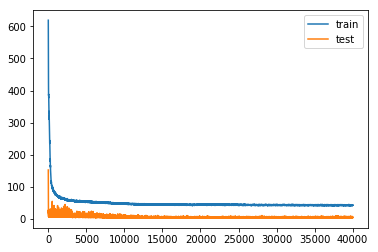

In [193]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=13000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [217]:
yhat = model.predict(validateX)

In [218]:
np.savetxt("yhat.csv", yhat.flatten(), delimiter=",")
np.savetxt("testingX.csv", validateX.flatten(), delimiter=",")
np.savetxt("testingY.csv", validateY.flatten(), delimiter=",")

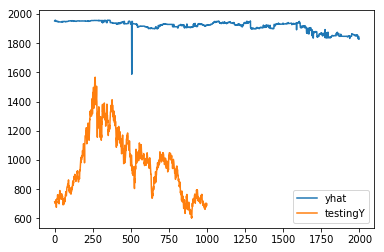

In [219]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(testingY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()